In [39]:
# necessray imports
import pandas as pd
from pprint import pprint
import json
from typing import Union
from pathlib import Path
import glob
from scipy import stats
import os

import tensorflow as tf 
from keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, accuracy_score

import random 
import numpy as np 


from sklearn.utils import shuffle
from imblearn.under_sampling import RandomUnderSampler


from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, BatchNormalization, Activation, Add, GlobalAveragePooling1D, Dense
from tensorflow.keras import layers

from sklearn.model_selection import KFold

# Try with 9 classes

In [40]:
def create_dataset(X, y, time_steps=1, step=1):
    Xx, Yy = [], []
    if (len(X) < time_steps):
        print('too short')
    else:
        for i in range(0, len(X) - time_steps, step):
            label = y.iloc[i+time_steps-1]
            data = X.iloc[i:(i + time_steps)].values.astype(float)
            if ((y.iloc[i+time_steps-1] != 10) & (y.iloc[i+time_steps-1] != 9)):
                Yy.append(label)
                Xx.append(data)

    return np.array(Xx).reshape(-1, 4), np.array(Yy).reshape(-1, 1)

In [41]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

X, Y = [], []
X_val, Y_val = [], [] 
subject_IDs = ['540', '544', '552',  '559', '563', '567', '570', '575', '584', '588', '591','596']
path = 'GAPS_DATA/TRAIN/'

## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
for subject_ID in subject_IDs:
    frames  = []
    X_subject, y_subject = [], []
# store all paths of csv files in one folder
    csv_files = glob.glob(path + subject_ID + "/*.csv")

# create list of the csv files
    for file in csv_files:
        df = pd.read_csv(file)
        frames.append(df)
        df = pd.read_csv(file)
        df['glucose'] = df['glucose'].astype(int)
        Xdata, Ydata = create_dataset(df[['glucose', 'basal', 'bolus', 'macc']], df['Class'], time_steps=72, step=1)
        Xdata = Xdata.reshape(-1, 72, 4)
        Ydata = Ydata.reshape(-1, 1)
        X_subject.append(Xdata)
        y_subject.append(Ydata)
    X_subject = np.vstack(X_subject)
    y_subject = np.vstack(y_subject)
    labels_dftest1 = pd.DataFrame(y_subject, columns = ['label'])
    class_occurencestest1 = np.bincount(labels_dftest1['label'])
    print(class_occurencestest1)

    X_s_train,  X_s_val, y_s_train, y_s_val = train_test_split(X_subject , y_subject, test_size=0.20, shuffle = False)
    X.append(X_s_train)
    Y.append(y_s_train)

    X_val.append(X_s_val)
    Y_val.append(y_s_val)


[ 911  294  280  531  965 1564 2504 1640 3111]
[ 184   78   69  110  192  398  842  864 2142]
[ 428  133  128  243  474  911 1565 1200 2202]
[ 475  164  150  288  539 1037 1958 1633 3106]
[ 327  124  118  217  415  685 1283 1138 2577]
[ 943  140  125  238  442  834 1567 1255 2837]
[ 227   87   77  137  250  406  720  710 1828]
[1208  270  242  449  842 1498 2553 1807 3164]
[ 130   70   64  126  236  404  589  528 1394]
[ 138   77   68  132  241  453  757  645 1472]
[ 615  217  200  383  731 1282 2141 1838 3436]
[ 270  139  125  224  433  832 1445 1314 2949]


## ResNet

[ 1  2  3  4  5  6  7  8  9 10 11]
[0]
Epoch 1/50
496/496 [==============================] - ETA: 0s - loss: 1.6668 - sparse_categorical_accuracy: 0.2507
Epoch 1: val_loss improved from inf to 3.11193, saving model to CustomModel_Res.weights.hdf5
496/496 [==============================] - 120s 241ms/step - loss: 1.6668 - sparse_categorical_accuracy: 0.2507 - val_loss: 3.1119 - val_sparse_categorical_accuracy: 0.0955 - lr: 0.0010
Epoch 2/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


496/496 [==============================] - ETA: 0s - loss: 1.5583 - sparse_categorical_accuracy: 0.2650
Epoch 2: val_loss improved from 3.11193 to 1.77705, saving model to CustomModel_Res.weights.hdf5
496/496 [==============================] - 119s 241ms/step - loss: 1.5583 - sparse_categorical_accuracy: 0.2650 - val_loss: 1.7770 - val_sparse_categorical_accuracy: 0.2526 - lr: 0.0010
Epoch 3/50
496/496 [==============================] - ETA: 0s - loss: 1.5234 - sparse_categorical_accuracy: 0.2791
Epoch 3: val_loss improved from 1.77705 to 1.73432, saving model to CustomModel_Res.weights.hdf5
496/496 [==============================] - 121s 243ms/step - loss: 1.5234 - sparse_categorical_accuracy: 0.2791 - val_loss: 1.7343 - val_sparse_categorical_accuracy: 0.2326 - lr: 0.0010
Epoch 4/50
496/496 [==============================] - ETA: 0s - loss: 1.5084 - sparse_categorical_accuracy: 0.2851
Epoch 4: val_loss did not improve from 1.73432
496/496 [==============================] - 119s 241ms

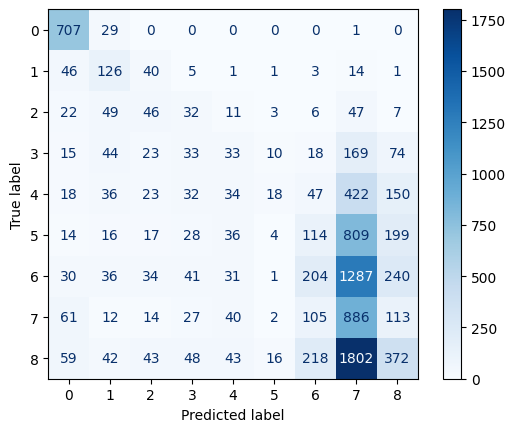

              precision    recall  f1-score   support

           0       0.73      0.96      0.83       737
           1       0.32      0.53      0.40       237
           2       0.19      0.21      0.20       223
           3       0.13      0.08      0.10       419
           4       0.15      0.04      0.07       780
           5       0.07      0.00      0.01      1237
           6       0.29      0.11      0.16      1904
           7       0.16      0.70      0.26      1260
           8       0.32      0.14      0.20      2643

    accuracy                           0.26      9440
   macro avg       0.26      0.31      0.25      9440
weighted avg       0.27      0.26      0.21      9440

Epoch 1/100
329/331 [============================>.] - ETA: 0s - loss: 1.7450 - sparse_categorical_accuracy: 0.2491
Epoch 1: val_loss improved from inf to 1.55530, saving model to CustomModel_indi_Res.weights.hdf5
331/331 [==============================] - 11s 32ms/step - loss: 1.7438 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


329/331 [============================>.] - ETA: 0s - loss: 1.6982 - sparse_categorical_accuracy: 0.2601
Epoch 2: val_loss did not improve from 1.55530
331/331 [==============================] - 10s 31ms/step - loss: 1.6994 - sparse_categorical_accuracy: 0.2605 - val_loss: 1.5838 - val_sparse_categorical_accuracy: 0.3631 - lr: 8.0000e-06
Epoch 3/100
329/331 [============================>.] - ETA: 0s - loss: 1.6692 - sparse_categorical_accuracy: 0.2709
Epoch 3: val_loss did not improve from 1.55530
331/331 [==============================] - 10s 31ms/step - loss: 1.6700 - sparse_categorical_accuracy: 0.2709 - val_loss: 1.5992 - val_sparse_categorical_accuracy: 0.3510 - lr: 8.0000e-06
Epoch 4/100
329/331 [============================>.] - ETA: 0s - loss: 1.6484 - sparse_categorical_accuracy: 0.2903
Epoch 4: val_loss did not improve from 1.55530

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
331/331 [==============================] - 10s 32ms/step - loss: 1.64

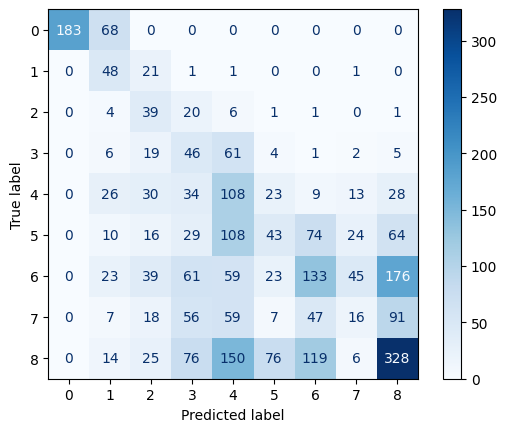

              precision    recall  f1-score   support

           0       1.00      0.73      0.84       251
           1       0.23      0.67      0.35        72
           2       0.19      0.54      0.28        72
           3       0.14      0.32      0.20       144
           4       0.20      0.40      0.26       271
           5       0.24      0.12      0.16       368
           6       0.35      0.24      0.28       559
           7       0.15      0.05      0.08       301
           8       0.47      0.41      0.44       794

    accuracy                           0.33      2832
   macro avg       0.33      0.39      0.32      2832
weighted avg       0.37      0.33      0.33      2832

[ 0  2  3  4  5  6  7  8  9 10 11]
[1]
Epoch 1/50
539/540 [============================>.] - ETA: 0s - loss: 1.6689 - sparse_categorical_accuracy: 0.2592
Epoch 1: val_loss improved from inf to 1.96562, saving model to CustomModel_Res.weights.hdf5
540/540 [==============================] - 134s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


539/540 [============================>.] - ETA: 0s - loss: 1.5596 - sparse_categorical_accuracy: 0.2736
Epoch 2: val_loss did not improve from 1.96562
540/540 [==============================] - 133s 247ms/step - loss: 1.5596 - sparse_categorical_accuracy: 0.2736 - val_loss: 2.2102 - val_sparse_categorical_accuracy: 0.1316 - lr: 0.0010
Epoch 3/50
539/540 [============================>.] - ETA: 0s - loss: 1.5415 - sparse_categorical_accuracy: 0.2776
Epoch 3: val_loss improved from 1.96562 to 1.68828, saving model to CustomModel_Res.weights.hdf5
540/540 [==============================] - 134s 247ms/step - loss: 1.5415 - sparse_categorical_accuracy: 0.2776 - val_loss: 1.6883 - val_sparse_categorical_accuracy: 0.2837 - lr: 0.0010
Epoch 4/50
539/540 [============================>.] - ETA: 0s - loss: 1.5151 - sparse_categorical_accuracy: 0.2838
Epoch 4: val_loss improved from 1.68828 to 1.64290, saving model to CustomModel_Res.weights.hdf5
540/540 [==============================] - 134s 248ms

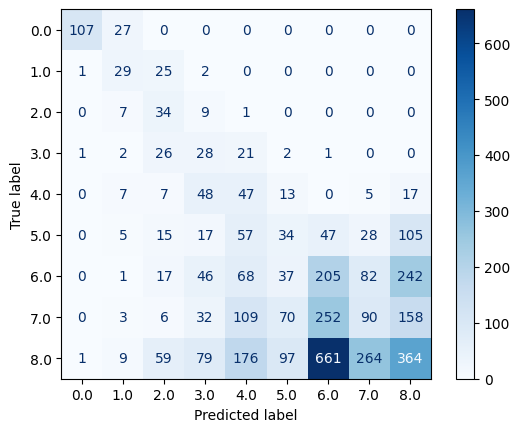

              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88       134
         1.0       0.32      0.51      0.39        57
         2.0       0.18      0.67      0.28        51
         3.0       0.11      0.35      0.16        81
         4.0       0.10      0.33      0.15       144
         5.0       0.13      0.11      0.12       308
         6.0       0.18      0.29      0.22       698
         7.0       0.19      0.12      0.15       720
         8.0       0.41      0.21      0.28      1710

    accuracy                           0.24      3903
   macro avg       0.29      0.38      0.29      3903
weighted avg       0.30      0.24      0.25      3903

Epoch 1/100
135/137 [============================>.] - ETA: 0s - loss: 1.9026 - sparse_categorical_accuracy: 0.2097
Epoch 1: val_loss improved from inf to 1.57169, saving model to CustomModel_indi_Res.weights.hdf5
137/137 [==============================] - 4s 32ms/step - loss: 1.8981 - sparse_c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


135/137 [============================>.] - ETA: 0s - loss: 1.7507 - sparse_categorical_accuracy: 0.2019
Epoch 2: val_loss did not improve from 1.57169
137/137 [==============================] - 4s 32ms/step - loss: 1.7559 - sparse_categorical_accuracy: 0.2018 - val_loss: 1.6420 - val_sparse_categorical_accuracy: 0.2870 - lr: 8.0000e-06
Epoch 3/100
135/137 [============================>.] - ETA: 0s - loss: 1.6379 - sparse_categorical_accuracy: 0.2306
Epoch 3: val_loss did not improve from 1.57169
137/137 [==============================] - 4s 32ms/step - loss: 1.6411 - sparse_categorical_accuracy: 0.2297 - val_loss: 1.6609 - val_sparse_categorical_accuracy: 0.3108 - lr: 8.0000e-06
Epoch 4/100
135/137 [============================>.] - ETA: 0s - loss: 1.6125 - sparse_categorical_accuracy: 0.2528
Epoch 4: val_loss did not improve from 1.57169

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
137/137 [==============================] - 4s 32ms/step - loss: 1.6044 

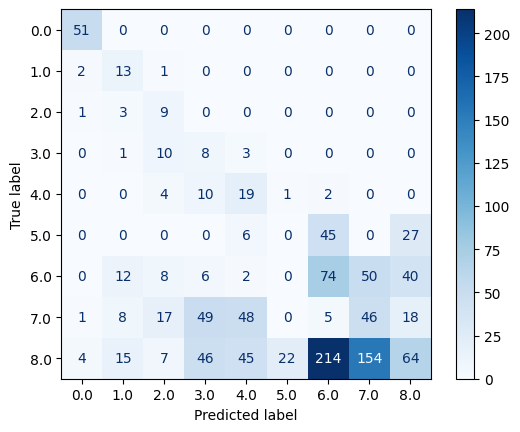

              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        51
         1.0       0.25      0.81      0.38        16
         2.0       0.16      0.69      0.26        13
         3.0       0.07      0.36      0.11        22
         4.0       0.15      0.53      0.24        36
         5.0       0.00      0.00      0.00        78
         6.0       0.22      0.39      0.28       192
         7.0       0.18      0.24      0.21       192
         8.0       0.43      0.11      0.18       571

    accuracy                           0.24      1171
   macro avg       0.26      0.46      0.29      1171
weighted avg       0.32      0.24      0.22      1171

[ 0  1  3  4  5  6  7  8  9 10 11]
[2]
Epoch 1/50
524/525 [============================>.] - ETA: 0s - loss: 1.6547 - sparse_categorical_accuracy: 0.2552
Epoch 1: val_loss improved from inf to 1.68354, saving model to CustomModel_Res.weights.hdf5
525/525 [==============================] - 131s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


524/525 [============================>.] - ETA: 0s - loss: 1.5581 - sparse_categorical_accuracy: 0.2694
Epoch 2: val_loss did not improve from 1.68354
525/525 [==============================] - 130s 248ms/step - loss: 1.5581 - sparse_categorical_accuracy: 0.2694 - val_loss: 2.2615 - val_sparse_categorical_accuracy: 0.1287 - lr: 0.0010
Epoch 3/50
524/525 [============================>.] - ETA: 0s - loss: 1.5350 - sparse_categorical_accuracy: 0.2827
Epoch 3: val_loss did not improve from 1.68354
525/525 [==============================] - 130s 248ms/step - loss: 1.5353 - sparse_categorical_accuracy: 0.2827 - val_loss: 1.8334 - val_sparse_categorical_accuracy: 0.2029 - lr: 0.0010
Epoch 4/50
524/525 [============================>.] - ETA: 0s - loss: 1.5164 - sparse_categorical_accuracy: 0.2856
Epoch 4: val_loss did not improve from 1.68354

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
525/525 [==============================] - 130s 248ms/step - loss: 1.5165 -

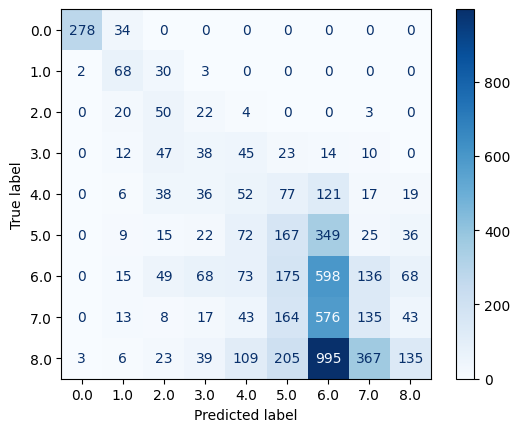

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.93       312
         1.0       0.37      0.66      0.48       103
         2.0       0.19      0.51      0.28        99
         3.0       0.16      0.20      0.18       189
         4.0       0.13      0.14      0.14       366
         5.0       0.21      0.24      0.22       695
         6.0       0.23      0.51      0.31      1182
         7.0       0.19      0.14      0.16       999
         8.0       0.45      0.07      0.12      1882

    accuracy                           0.26      5827
   macro avg       0.32      0.37      0.31      5827
weighted avg       0.32      0.26      0.23      5827

Epoch 1/100
203/204 [============================>.] - ETA: 0s - loss: 1.5735 - sparse_categorical_accuracy: 0.2694
Epoch 1: val_loss improved from inf to 1.69309, saving model to CustomModel_indi_Res.weights.hdf5
204/204 [==============================] - 7s 32ms/step - loss: 1.5720 - sparse_c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


203/204 [============================>.] - ETA: 0s - loss: 1.5991 - sparse_categorical_accuracy: 0.2746
Epoch 2: val_loss did not improve from 1.69309
204/204 [==============================] - 7s 32ms/step - loss: 1.5969 - sparse_categorical_accuracy: 0.2744 - val_loss: 1.7204 - val_sparse_categorical_accuracy: 0.2402 - lr: 1.6000e-06
Epoch 3/100
203/204 [============================>.] - ETA: 0s - loss: 1.5646 - sparse_categorical_accuracy: 0.2752
Epoch 3: val_loss did not improve from 1.69309
204/204 [==============================] - 7s 32ms/step - loss: 1.5620 - sparse_categorical_accuracy: 0.2756 - val_loss: 1.7287 - val_sparse_categorical_accuracy: 0.2463 - lr: 1.6000e-06
Epoch 4/100
203/204 [============================>.] - ETA: 0s - loss: 1.5968 - sparse_categorical_accuracy: 0.2799
Epoch 4: val_loss did not improve from 1.69309

Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-06.
204/204 [==============================] - 7s 32ms/step - loss: 1.5945 - sparse_categori

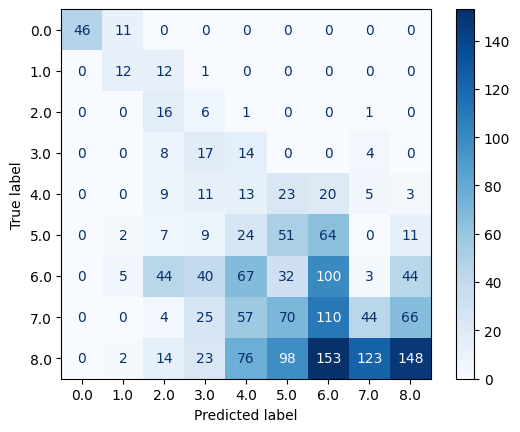

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89        57
         1.0       0.38      0.48      0.42        25
         2.0       0.14      0.67      0.23        24
         3.0       0.13      0.40      0.19        43
         4.0       0.05      0.15      0.08        84
         5.0       0.19      0.30      0.23       168
         6.0       0.22      0.30      0.26       335
         7.0       0.24      0.12      0.16       376
         8.0       0.54      0.23      0.33       637

    accuracy                           0.26      1749
   macro avg       0.32      0.38      0.31      1749
weighted avg       0.36      0.26      0.27      1749

[ 0  1  2  4  5  6  7  8  9 10 11]
[3]
Epoch 1/50
512/512 [==============================] - ETA: 0s - loss: 1.6612 - sparse_categorical_accuracy: 0.2509
Epoch 1: val_loss improved from inf to 1.72501, saving model to CustomModel_Res.weights.hdf5
512/512 [==============================] - 128s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


512/512 [==============================] - ETA: 0s - loss: 1.5632 - sparse_categorical_accuracy: 0.2596
Epoch 2: val_loss did not improve from 1.72501
512/512 [==============================] - 127s 249ms/step - loss: 1.5632 - sparse_categorical_accuracy: 0.2596 - val_loss: 1.7962 - val_sparse_categorical_accuracy: 0.1928 - lr: 0.0010
Epoch 3/50
511/512 [============================>.] - ETA: 0s - loss: 1.5364 - sparse_categorical_accuracy: 0.2679
Epoch 3: val_loss did not improve from 1.72501
512/512 [==============================] - 125s 244ms/step - loss: 1.5363 - sparse_categorical_accuracy: 0.2679 - val_loss: 1.7298 - val_sparse_categorical_accuracy: 0.2353 - lr: 0.0010
Epoch 4/50
511/512 [============================>.] - ETA: 0s - loss: 1.5197 - sparse_categorical_accuracy: 0.2788
Epoch 4: val_loss did not improve from 1.72501

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
512/512 [==============================] - 126s 246ms/step - loss: 1.5200 -

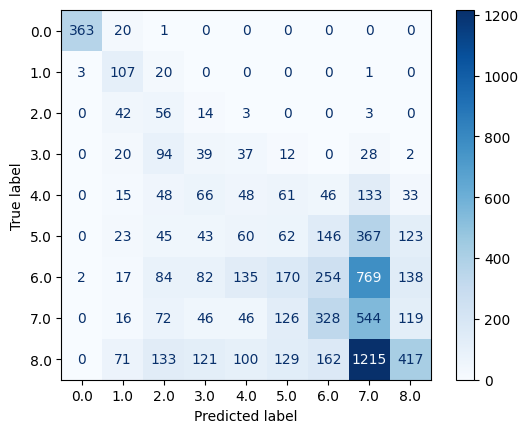

              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97       384
         1.0       0.32      0.82      0.46       131
         2.0       0.10      0.47      0.17       118
         3.0       0.09      0.17      0.12       232
         4.0       0.11      0.11      0.11       450
         5.0       0.11      0.07      0.09       869
         6.0       0.27      0.15      0.20      1651
         7.0       0.18      0.42      0.25      1297
         8.0       0.50      0.18      0.26      2348

    accuracy                           0.25      7480
   macro avg       0.30      0.37      0.29      7480
weighted avg       0.33      0.25      0.25      7480

Epoch 1/100
261/262 [============================>.] - ETA: 0s - loss: 1.6832 - sparse_categorical_accuracy: 0.2438
Epoch 1: val_loss improved from inf to 1.61479, saving model to CustomModel_indi_Res.weights.hdf5
262/262 [==============================] - 8s 32ms/step - loss: 1.6815 - sparse_c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


261/262 [============================>.] - ETA: 0s - loss: 1.6775 - sparse_categorical_accuracy: 0.2512
Epoch 2: val_loss improved from 1.61479 to 1.60667, saving model to CustomModel_indi_Res.weights.hdf5
262/262 [==============================] - 8s 31ms/step - loss: 1.6768 - sparse_categorical_accuracy: 0.2517 - val_loss: 1.6067 - val_sparse_categorical_accuracy: 0.2977 - lr: 1.6000e-06
Epoch 3/100
261/262 [============================>.] - ETA: 0s - loss: 1.6506 - sparse_categorical_accuracy: 0.2548
Epoch 3: val_loss improved from 1.60667 to 1.58130, saving model to CustomModel_indi_Res.weights.hdf5
262/262 [==============================] - 8s 32ms/step - loss: 1.6551 - sparse_categorical_accuracy: 0.2550 - val_loss: 1.5813 - val_sparse_categorical_accuracy: 0.3053 - lr: 1.6000e-06
Epoch 4/100
261/262 [============================>.] - ETA: 0s - loss: 1.6461 - sparse_categorical_accuracy: 0.2524
Epoch 4: val_loss did not improve from 1.58130
262/262 [==============================

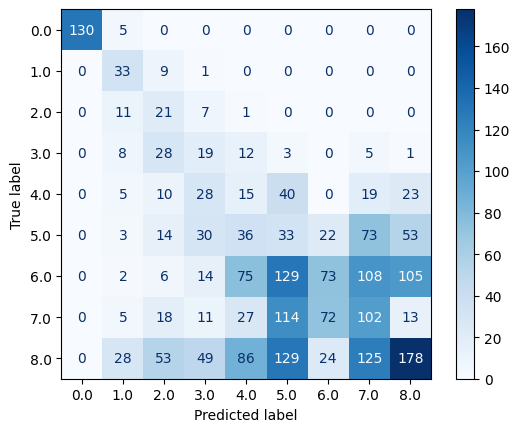

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98       135
         1.0       0.33      0.77      0.46        43
         2.0       0.13      0.53      0.21        40
         3.0       0.12      0.25      0.16        76
         4.0       0.06      0.11      0.08       140
         5.0       0.07      0.12      0.09       264
         6.0       0.38      0.14      0.21       512
         7.0       0.24      0.28      0.26       362
         8.0       0.48      0.26      0.34       672

    accuracy                           0.27      2244
   macro avg       0.31      0.38      0.31      2244
weighted avg       0.35      0.27      0.28      2244

[ 0  1  2  3  5  6  7  8  9 10 11]
[4]
Epoch 1/50
527/527 [==============================] - ETA: 0s - loss: 1.6594 - sparse_categorical_accuracy: 0.2516
Epoch 1: val_loss improved from inf to 2.56573, saving model to CustomModel_Res.weights.hdf5
527/527 [==============================] - 132s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


527/527 [==============================] - ETA: 0s - loss: 1.5488 - sparse_categorical_accuracy: 0.2669
Epoch 2: val_loss improved from 2.56573 to 2.05765, saving model to CustomModel_Res.weights.hdf5
527/527 [==============================] - 130s 247ms/step - loss: 1.5488 - sparse_categorical_accuracy: 0.2669 - val_loss: 2.0576 - val_sparse_categorical_accuracy: 0.2108 - lr: 0.0010
Epoch 3/50
527/527 [==============================] - ETA: 0s - loss: 1.5254 - sparse_categorical_accuracy: 0.2744
Epoch 3: val_loss improved from 2.05765 to 1.78748, saving model to CustomModel_Res.weights.hdf5
527/527 [==============================] - 131s 248ms/step - loss: 1.5254 - sparse_categorical_accuracy: 0.2744 - val_loss: 1.7875 - val_sparse_categorical_accuracy: 0.2316 - lr: 0.0010
Epoch 4/50
527/527 [==============================] - ETA: 0s - loss: 1.5184 - sparse_categorical_accuracy: 0.2824
Epoch 4: val_loss did not improve from 1.78748
527/527 [==============================] - 130s 248ms

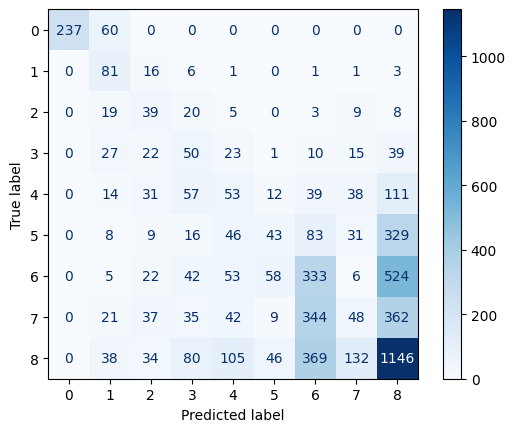

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       297
           1       0.30      0.74      0.42       109
           2       0.19      0.38      0.25       103
           3       0.16      0.27      0.20       187
           4       0.16      0.15      0.16       355
           5       0.25      0.08      0.12       565
           6       0.28      0.32      0.30      1043
           7       0.17      0.05      0.08       898
           8       0.45      0.59      0.51      1950

    accuracy                           0.37      5507
   macro avg       0.33      0.37      0.33      5507
weighted avg       0.35      0.37      0.34      5507

Epoch 1/100
193/193 [==============================] - ETA: 0s - loss: 1.7486 - sparse_categorical_accuracy: 0.2991
Epoch 1: val_loss improved from inf to 1.68991, saving model to CustomModel_indi_Res.weights.hdf5
193/193 [==============================] - 7s 33ms/step - loss: 1.7486 - sparse_c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


191/193 [============================>.] - ETA: 0s - loss: 1.6178 - sparse_categorical_accuracy: 0.2932
Epoch 2: val_loss did not improve from 1.68991
193/193 [==============================] - 6s 33ms/step - loss: 1.6193 - sparse_categorical_accuracy: 0.2935 - val_loss: 1.7199 - val_sparse_categorical_accuracy: 0.2983 - lr: 8.0000e-06
Epoch 3/100
193/193 [==============================] - ETA: 0s - loss: 1.5517 - sparse_categorical_accuracy: 0.3039
Epoch 3: val_loss did not improve from 1.68991
193/193 [==============================] - 6s 33ms/step - loss: 1.5517 - sparse_categorical_accuracy: 0.3039 - val_loss: 1.7284 - val_sparse_categorical_accuracy: 0.2399 - lr: 8.0000e-06
Epoch 4/100
193/193 [==============================] - ETA: 0s - loss: 1.5475 - sparse_categorical_accuracy: 0.3004
Epoch 4: val_loss did not improve from 1.68991

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
193/193 [==============================] - 6s 33ms/step - loss: 1.5475 

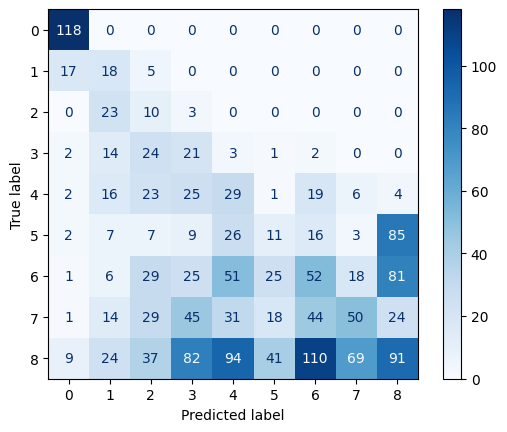

              precision    recall  f1-score   support

           0       0.78      1.00      0.87       118
           1       0.15      0.45      0.22        40
           2       0.06      0.28      0.10        36
           3       0.10      0.31      0.15        67
           4       0.12      0.23      0.16       125
           5       0.11      0.07      0.08       166
           6       0.21      0.18      0.20       288
           7       0.34      0.20      0.25       256
           8       0.32      0.16      0.22       557

    accuracy                           0.24      1653
   macro avg       0.24      0.32      0.25      1653
weighted avg       0.28      0.24      0.24      1653

[ 0  1  2  3  4  6  7  8  9 10 11]
[5]
Epoch 1/50
518/518 [==============================] - ETA: 0s - loss: 1.6891 - sparse_categorical_accuracy: 0.2423
Epoch 1: val_loss improved from inf to 1.63450, saving model to CustomModel_Res.weights.hdf5
518/518 [==============================] - 130s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


518/518 [==============================] - ETA: 0s - loss: 1.5925 - sparse_categorical_accuracy: 0.2593
Epoch 2: val_loss did not improve from 1.63450
518/518 [==============================] - 128s 248ms/step - loss: 1.5925 - sparse_categorical_accuracy: 0.2593 - val_loss: 1.6478 - val_sparse_categorical_accuracy: 0.2459 - lr: 0.0010
Epoch 3/50
518/518 [==============================] - ETA: 0s - loss: 1.5441 - sparse_categorical_accuracy: 0.2761
Epoch 3: val_loss did not improve from 1.63450
518/518 [==============================] - 128s 247ms/step - loss: 1.5441 - sparse_categorical_accuracy: 0.2761 - val_loss: 1.9688 - val_sparse_categorical_accuracy: 0.1867 - lr: 0.0010
Epoch 4/50
518/518 [==============================] - ETA: 0s - loss: 1.5248 - sparse_categorical_accuracy: 0.2792
Epoch 4: val_loss did not improve from 1.63450

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
518/518 [==============================] - 128s 248ms/step - loss: 1.5248 -

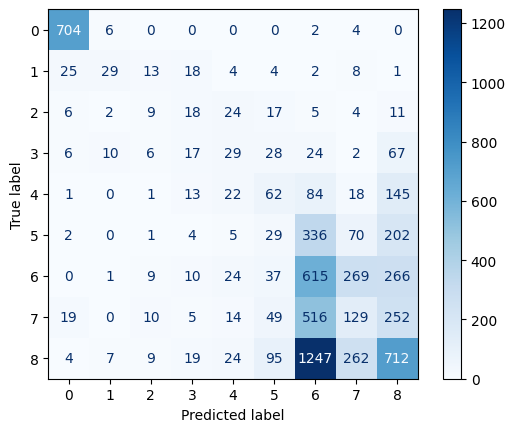

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       716
           1       0.53      0.28      0.36       104
           2       0.16      0.09      0.12        96
           3       0.16      0.09      0.12       189
           4       0.15      0.06      0.09       346
           5       0.09      0.04      0.06       649
           6       0.22      0.50      0.30      1231
           7       0.17      0.13      0.15       994
           8       0.43      0.30      0.35      2379

    accuracy                           0.34      6704
   macro avg       0.31      0.28      0.28      6704
weighted avg       0.35      0.34      0.32      6704

Epoch 1/100
233/235 [============================>.] - ETA: 0s - loss: 1.5823 - sparse_categorical_accuracy: 0.3476
Epoch 1: val_loss improved from inf to 1.54020, saving model to CustomModel_indi_Res.weights.hdf5
235/235 [==============================] - 8s 31ms/step - loss: 1.5801 - sparse_c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


233/235 [============================>.] - ETA: 0s - loss: 1.5384 - sparse_categorical_accuracy: 0.3342
Epoch 2: val_loss did not improve from 1.54020
235/235 [==============================] - 7s 30ms/step - loss: 1.5390 - sparse_categorical_accuracy: 0.3344 - val_loss: 1.6299 - val_sparse_categorical_accuracy: 0.2886 - lr: 8.0000e-06
Epoch 3/100
233/235 [============================>.] - ETA: 0s - loss: 1.5334 - sparse_categorical_accuracy: 0.3281
Epoch 3: val_loss did not improve from 1.54020
235/235 [==============================] - 7s 30ms/step - loss: 1.5387 - sparse_categorical_accuracy: 0.3277 - val_loss: 1.5987 - val_sparse_categorical_accuracy: 0.2258 - lr: 8.0000e-06
Epoch 4/100
233/235 [============================>.] - ETA: 0s - loss: 1.5071 - sparse_categorical_accuracy: 0.3240
Epoch 4: val_loss did not improve from 1.54020

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
235/235 [==============================] - 7s 30ms/step - loss: 1.5050 

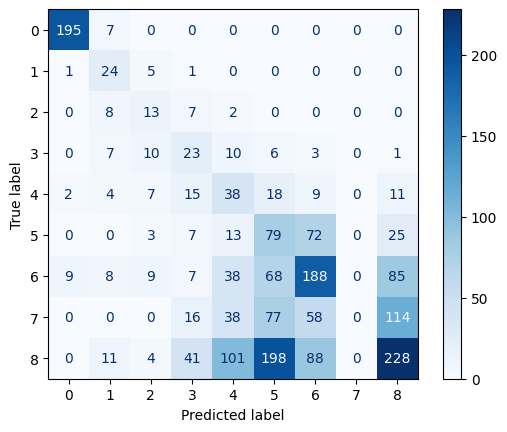

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       202
           1       0.35      0.77      0.48        31
           2       0.25      0.43      0.32        30
           3       0.20      0.38      0.26        60
           4       0.16      0.37      0.22       104
           5       0.18      0.40      0.24       199
           6       0.45      0.46      0.45       412
           7       0.00      0.00      0.00       303
           8       0.49      0.34      0.40       671

    accuracy                           0.39      2012
   macro avg       0.34      0.46      0.37      2012
weighted avg       0.39      0.39      0.38      2012

[ 0  1  2  3  4  5  7  8  9 10 11]
[6]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Epoch 1/50
542/542 [==============================] - ETA: 0s - loss: 1.6785 - sparse_categorical_accuracy: 0.2556
Epoch 1: val_loss improved from inf to 1.80076, saving model to CustomModel_Res.weights.hdf5
542/542 [==============================] - 134s 245ms/step - loss: 1.6785 - sparse_categorical_accuracy: 0.2556 - val_loss: 1.8008 - val_sparse_categorical_accuracy: 0.2262 - lr: 0.0010
Epoch 2/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


542/542 [==============================] - ETA: 0s - loss: 1.5617 - sparse_categorical_accuracy: 0.2711
Epoch 2: val_loss did not improve from 1.80076
542/542 [==============================] - 132s 243ms/step - loss: 1.5617 - sparse_categorical_accuracy: 0.2711 - val_loss: 1.9610 - val_sparse_categorical_accuracy: 0.2617 - lr: 0.0010
Epoch 3/50
542/542 [==============================] - ETA: 0s - loss: 1.5256 - sparse_categorical_accuracy: 0.2777
Epoch 3: val_loss did not improve from 1.80076
542/542 [==============================] - 132s 244ms/step - loss: 1.5256 - sparse_categorical_accuracy: 0.2777 - val_loss: 5.6946 - val_sparse_categorical_accuracy: 0.1023 - lr: 0.0010
Epoch 4/50
542/542 [==============================] - ETA: 0s - loss: 1.5059 - sparse_categorical_accuracy: 0.2850
Epoch 4: val_loss improved from 1.80076 to 1.68804, saving model to CustomModel_Res.weights.hdf5
542/542 [==============================] - 133s 245ms/step - loss: 1.5059 - sparse_categorical_accuracy

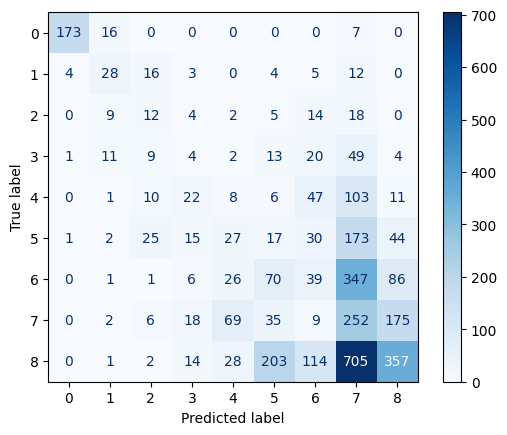

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       196
           1       0.39      0.39      0.39        72
           2       0.15      0.19      0.17        64
           3       0.05      0.04      0.04       113
           4       0.05      0.04      0.04       208
           5       0.05      0.05      0.05       334
           6       0.14      0.07      0.09       576
           7       0.15      0.45      0.23       566
           8       0.53      0.25      0.34      1424

    accuracy                           0.25      3553
   macro avg       0.27      0.26      0.25      3553
weighted avg       0.33      0.25      0.26      3553

Epoch 1/100
123/125 [============================>.] - ETA: 0s - loss: 2.1871 - sparse_categorical_accuracy: 0.2505
Epoch 1: val_loss improved from inf to 1.71213, saving model to CustomModel_indi_Res.weights.hdf5
125/125 [==============================] - 5s 33ms/step - loss: 2.1791 - sparse_c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


123/125 [============================>.] - ETA: 0s - loss: 2.0759 - sparse_categorical_accuracy: 0.2703
Epoch 2: val_loss did not improve from 1.71213
125/125 [==============================] - 4s 31ms/step - loss: 2.0665 - sparse_categorical_accuracy: 0.2700 - val_loss: 1.7983 - val_sparse_categorical_accuracy: 0.1506 - lr: 8.0000e-06
Epoch 3/100
123/125 [============================>.] - ETA: 0s - loss: 1.8285 - sparse_categorical_accuracy: 0.2861
Epoch 3: val_loss did not improve from 1.71213
125/125 [==============================] - 4s 31ms/step - loss: 1.8248 - sparse_categorical_accuracy: 0.2851 - val_loss: 1.7873 - val_sparse_categorical_accuracy: 0.1466 - lr: 8.0000e-06
Epoch 4/100
123/125 [============================>.] - ETA: 0s - loss: 1.6781 - sparse_categorical_accuracy: 0.3095
Epoch 4: val_loss did not improve from 1.71213

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
125/125 [==============================] - 4s 31ms/step - loss: 1.6721 

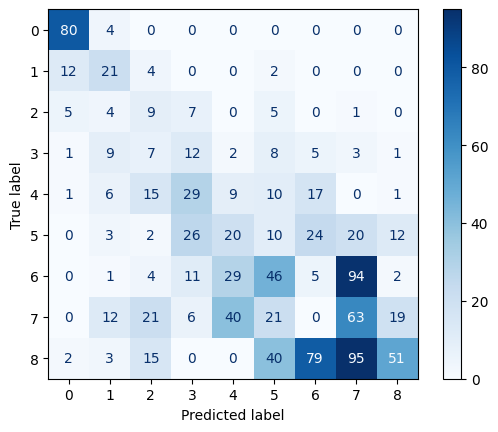

              precision    recall  f1-score   support

           0       0.79      0.95      0.86        84
           1       0.33      0.54      0.41        39
           2       0.12      0.29      0.17        31
           3       0.13      0.25      0.17        48
           4       0.09      0.10      0.10        88
           5       0.07      0.09      0.08       117
           6       0.04      0.03      0.03       192
           7       0.23      0.35      0.28       182
           8       0.59      0.18      0.27       285

    accuracy                           0.24      1066
   macro avg       0.27      0.31      0.26      1066
weighted avg       0.30      0.24      0.24      1066

[ 0  1  2  3  4  5  6  8  9 10 11]
[7]
Epoch 1/50
495/495 [==============================] - ETA: 0s - loss: 1.6809 - sparse_categorical_accuracy: 0.2611
Epoch 1: val_loss improved from inf to 1.70101, saving model to CustomModel_Res.weights.hdf5
495/495 [==============================] - 122s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


495/495 [==============================] - ETA: 0s - loss: 1.5760 - sparse_categorical_accuracy: 0.2682
Epoch 2: val_loss did not improve from 1.70101
495/495 [==============================] - 121s 244ms/step - loss: 1.5760 - sparse_categorical_accuracy: 0.2682 - val_loss: 2.4074 - val_sparse_categorical_accuracy: 0.1225 - lr: 0.0010
Epoch 3/50
495/495 [==============================] - ETA: 0s - loss: 1.5370 - sparse_categorical_accuracy: 0.2804
Epoch 3: val_loss did not improve from 1.70101
495/495 [==============================] - 121s 245ms/step - loss: 1.5370 - sparse_categorical_accuracy: 0.2804 - val_loss: 2.0619 - val_sparse_categorical_accuracy: 0.2005 - lr: 0.0010
Epoch 4/50
495/495 [==============================] - ETA: 0s - loss: 1.5181 - sparse_categorical_accuracy: 0.2793
Epoch 4: val_loss did not improve from 1.70101

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
495/495 [==============================] - 122s 246ms/step - loss: 1.5181 -

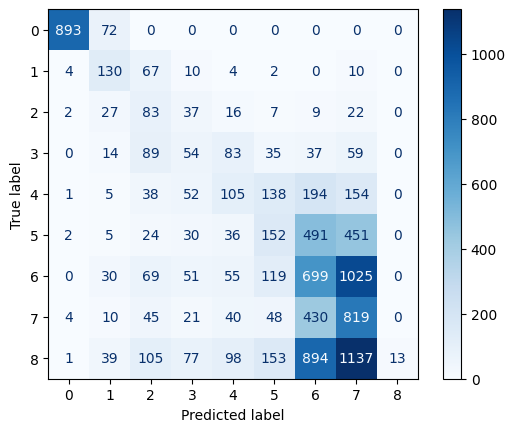

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       965
           1       0.39      0.57      0.47       227
           2       0.16      0.41      0.23       203
           3       0.16      0.15      0.15       371
           4       0.24      0.15      0.19       687
           5       0.23      0.13      0.16      1191
           6       0.25      0.34      0.29      2048
           7       0.22      0.58      0.32      1417
           8       1.00      0.01      0.01      2517

    accuracy                           0.31      9626
   macro avg       0.41      0.36      0.31      9626
weighted avg       0.51      0.31      0.26      9626

Epoch 1/100
337/337 [==============================] - ETA: 0s - loss: 2.0420 - sparse_categorical_accuracy: 0.2501
Epoch 1: val_loss improved from inf to 1.64532, saving model to CustomModel_indi_Res.weights.hdf5
337/337 [==============================] - 12s 33ms/step - loss: 2.0420 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


337/337 [==============================] - ETA: 0s - loss: 1.8798 - sparse_categorical_accuracy: 0.2783
Epoch 2: val_loss improved from 1.64532 to 1.54783, saving model to CustomModel_indi_Res.weights.hdf5
337/337 [==============================] - 11s 32ms/step - loss: 1.8798 - sparse_categorical_accuracy: 0.2783 - val_loss: 1.5478 - val_sparse_categorical_accuracy: 0.3739 - lr: 1.6000e-06
Epoch 3/100
337/337 [==============================] - ETA: 0s - loss: 1.7902 - sparse_categorical_accuracy: 0.2824
Epoch 3: val_loss improved from 1.54783 to 1.48978, saving model to CustomModel_indi_Res.weights.hdf5
337/337 [==============================] - 11s 32ms/step - loss: 1.7902 - sparse_categorical_accuracy: 0.2824 - val_loss: 1.4898 - val_sparse_categorical_accuracy: 0.3984 - lr: 1.6000e-06
Epoch 4/100
337/337 [==============================] - ETA: 0s - loss: 1.7737 - sparse_categorical_accuracy: 0.2905
Epoch 4: val_loss improved from 1.48978 to 1.47612, saving model to CustomModel_indi

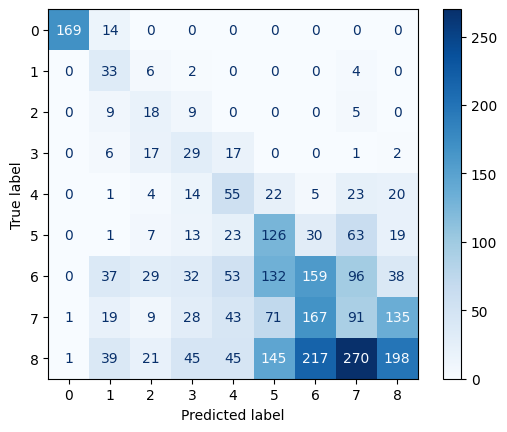

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       183
           1       0.21      0.73      0.32        45
           2       0.16      0.44      0.24        41
           3       0.17      0.40      0.24        72
           4       0.23      0.38      0.29       144
           5       0.25      0.45      0.32       282
           6       0.28      0.28      0.28       576
           7       0.16      0.16      0.16       564
           8       0.48      0.20      0.28       981

    accuracy                           0.30      2888
   macro avg       0.33      0.44      0.34      2888
weighted avg       0.36      0.30      0.30      2888

[ 0  1  2  3  4  5  6  7  9 10 11]
[8]
Epoch 1/50
548/548 [==============================] - ETA: 0s - loss: 1.6502 - sparse_categorical_accuracy: 0.2572
Epoch 1: val_loss improved from inf to 1.73564, saving model to CustomModel_Res.weights.hdf5
548/548 [==============================] - 136s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


548/548 [==============================] - ETA: 0s - loss: 1.5438 - sparse_categorical_accuracy: 0.2772
Epoch 2: val_loss improved from 1.73564 to 1.64603, saving model to CustomModel_Res.weights.hdf5
548/548 [==============================] - 135s 247ms/step - loss: 1.5438 - sparse_categorical_accuracy: 0.2772 - val_loss: 1.6460 - val_sparse_categorical_accuracy: 0.2658 - lr: 0.0010
Epoch 3/50
548/548 [==============================] - ETA: 0s - loss: 1.5246 - sparse_categorical_accuracy: 0.2804
Epoch 3: val_loss did not improve from 1.64603
548/548 [==============================] - 135s 246ms/step - loss: 1.5246 - sparse_categorical_accuracy: 0.2804 - val_loss: 8.2802 - val_sparse_categorical_accuracy: 0.0786 - lr: 0.0010
Epoch 4/50
548/548 [==============================] - ETA: 0s - loss: 1.5061 - sparse_categorical_accuracy: 0.2847
Epoch 4: val_loss did not improve from 1.64603
548/548 [==============================] - 135s 246ms/step - loss: 1.5061 - sparse_categorical_accuracy

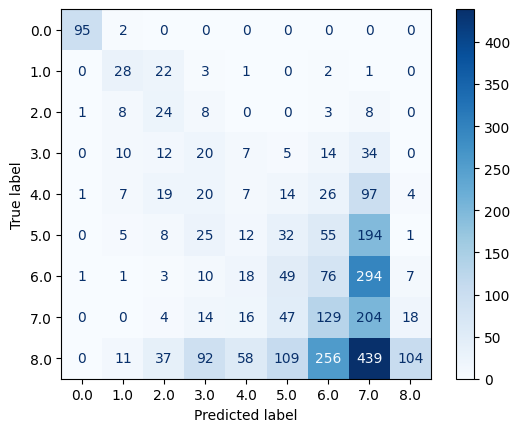

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        97
         1.0       0.39      0.49      0.43        57
         2.0       0.19      0.46      0.27        52
         3.0       0.10      0.20      0.14       102
         4.0       0.06      0.04      0.04       195
         5.0       0.12      0.10      0.11       332
         6.0       0.14      0.17      0.15       459
         7.0       0.16      0.47      0.24       432
         8.0       0.78      0.09      0.17      1106

    accuracy                           0.21      2832
   macro avg       0.32      0.33      0.28      2832
weighted avg       0.42      0.21      0.19      2832

Epoch 1/100
 99/100 [============================>.] - ETA: 0s - loss: 2.0691 - sparse_categorical_accuracy: 0.2027
Epoch 1: val_loss improved from inf to 1.81828, saving model to CustomModel_indi_Res.weights.hdf5
100/100 [==============================] - 3s 32ms/step - loss: 2.0899 - sparse_c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 99/100 [============================>.] - ETA: 0s - loss: 2.0076 - sparse_categorical_accuracy: 0.2121
Epoch 2: val_loss did not improve from 1.81828
100/100 [==============================] - 3s 32ms/step - loss: 2.0284 - sparse_categorical_accuracy: 0.2120 - val_loss: 1.8605 - val_sparse_categorical_accuracy: 0.1461 - lr: 1.6000e-06
Epoch 3/100
 99/100 [============================>.] - ETA: 0s - loss: 1.9660 - sparse_categorical_accuracy: 0.2109
Epoch 3: val_loss did not improve from 1.81828
100/100 [==============================] - 3s 32ms/step - loss: 1.9651 - sparse_categorical_accuracy: 0.2107 - val_loss: 1.8640 - val_sparse_categorical_accuracy: 0.1612 - lr: 1.6000e-06
Epoch 4/100
 99/100 [============================>.] - ETA: 0s - loss: 1.9721 - sparse_categorical_accuracy: 0.2096
Epoch 4: val_loss did not improve from 1.81828

Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-06.
100/100 [==============================] - 3s 32ms/step - loss: 1.9715 - sparse_categori

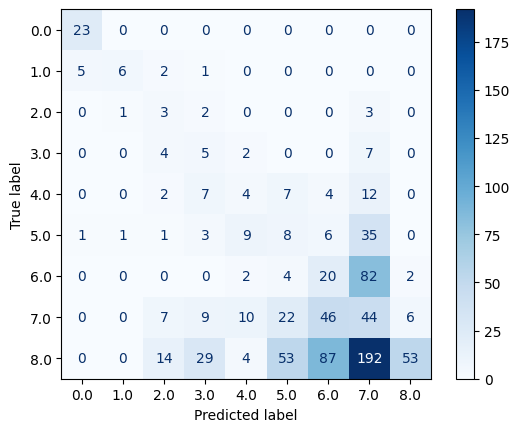

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.88        23
         1.0       0.75      0.43      0.55        14
         2.0       0.09      0.33      0.14         9
         3.0       0.09      0.28      0.14        18
         4.0       0.13      0.11      0.12        36
         5.0       0.09      0.12      0.10        64
         6.0       0.12      0.18      0.15       110
         7.0       0.12      0.31      0.17       144
         8.0       0.87      0.12      0.22       432

    accuracy                           0.20       850
   macro avg       0.34      0.32      0.27       850
weighted avg       0.53      0.20      0.21       850

[ 0  1  2  3  4  5  6  7  8 10 11]
[9]
Epoch 1/50
545/545 [==============================] - ETA: 0s - loss: 1.6545 - sparse_categorical_accuracy: 0.2468
Epoch 1: val_loss improved from inf to 1.82794, saving model to CustomModel_Res.weights.hdf5
545/545 [==============================] - 135s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


545/545 [==============================] - ETA: 0s - loss: 1.5481 - sparse_categorical_accuracy: 0.2689
Epoch 2: val_loss did not improve from 1.82794
545/545 [==============================] - 134s 246ms/step - loss: 1.5481 - sparse_categorical_accuracy: 0.2689 - val_loss: 1.9983 - val_sparse_categorical_accuracy: 0.2368 - lr: 0.0010
Epoch 3/50
545/545 [==============================] - ETA: 0s - loss: 1.5351 - sparse_categorical_accuracy: 0.2749
Epoch 3: val_loss improved from 1.82794 to 1.70642, saving model to CustomModel_Res.weights.hdf5
545/545 [==============================] - 133s 244ms/step - loss: 1.5351 - sparse_categorical_accuracy: 0.2749 - val_loss: 1.7064 - val_sparse_categorical_accuracy: 0.2195 - lr: 0.0010
Epoch 4/50
545/545 [==============================] - ETA: 0s - loss: 1.5031 - sparse_categorical_accuracy: 0.2847
Epoch 4: val_loss improved from 1.70642 to 1.65677, saving model to CustomModel_Res.weights.hdf5
545/545 [==============================] - 133s 245ms

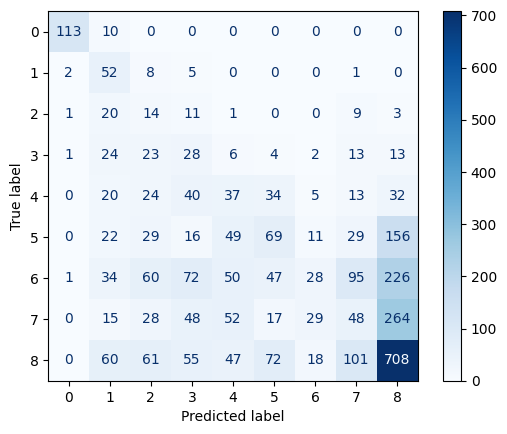

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       123
           1       0.20      0.76      0.32        68
           2       0.06      0.24      0.09        59
           3       0.10      0.25      0.14       114
           4       0.15      0.18      0.17       205
           5       0.28      0.18      0.22       381
           6       0.30      0.05      0.08       613
           7       0.16      0.10      0.12       501
           8       0.50      0.63      0.56      1122

    accuracy                           0.34      3186
   macro avg       0.30      0.37      0.29      3186
weighted avg       0.35      0.34      0.32      3186

Epoch 1/100
111/112 [============================>.] - ETA: 0s - loss: 1.6465 - sparse_categorical_accuracy: 0.2889
Epoch 1: val_loss improved from inf to 2.03874, saving model to CustomModel_indi_Res.weights.hdf5
112/112 [==============================] - 4s 33ms/step - loss: 1.6425 - sparse_c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


111/112 [============================>.] - ETA: 0s - loss: 1.6283 - sparse_categorical_accuracy: 0.3283
Epoch 2: val_loss did not improve from 2.03874
112/112 [==============================] - 4s 32ms/step - loss: 1.6263 - sparse_categorical_accuracy: 0.3290 - val_loss: 2.0977 - val_sparse_categorical_accuracy: 0.2175 - lr: 8.0000e-06
Epoch 3/100
111/112 [============================>.] - ETA: 0s - loss: 1.5920 - sparse_categorical_accuracy: 0.3322
Epoch 3: val_loss did not improve from 2.03874
112/112 [==============================] - 4s 31ms/step - loss: 1.5933 - sparse_categorical_accuracy: 0.3324 - val_loss: 2.1084 - val_sparse_categorical_accuracy: 0.1996 - lr: 8.0000e-06
Epoch 4/100
111/112 [============================>.] - ETA: 0s - loss: 1.5085 - sparse_categorical_accuracy: 0.3514
Epoch 4: val_loss did not improve from 2.03874

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
112/112 [==============================] - 4s 31ms/step - loss: 1.5074 

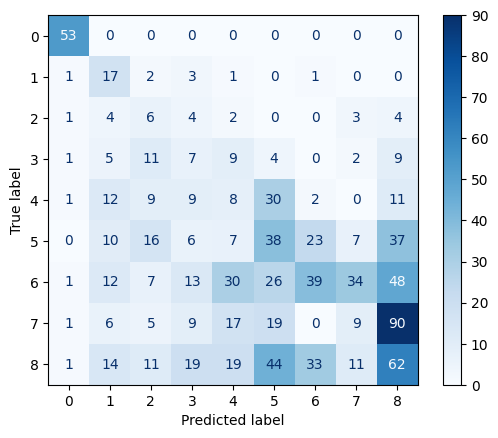

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        53
           1       0.21      0.68      0.32        25
           2       0.09      0.25      0.13        24
           3       0.10      0.15      0.12        48
           4       0.09      0.10      0.09        82
           5       0.24      0.26      0.25       144
           6       0.40      0.19      0.25       210
           7       0.14      0.06      0.08       156
           8       0.24      0.29      0.26       214

    accuracy                           0.25       956
   macro avg       0.26      0.33      0.27       956
weighted avg       0.27      0.25      0.24       956

[ 0  1  2  3  4  5  6  7  8  9 11]
[10]
Epoch 1/50
502/502 [==============================] - ETA: 0s - loss: 1.6575 - sparse_categorical_accuracy: 0.2589
Epoch 1: val_loss improved from inf to 1.77831, saving model to CustomModel_Res.weights.hdf5
502/502 [==============================] - 124s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


502/502 [==============================] - ETA: 0s - loss: 1.5417 - sparse_categorical_accuracy: 0.2798
Epoch 2: val_loss did not improve from 1.77831
502/502 [==============================] - 124s 247ms/step - loss: 1.5417 - sparse_categorical_accuracy: 0.2798 - val_loss: 3.4434 - val_sparse_categorical_accuracy: 0.2165 - lr: 0.0010
Epoch 3/50
502/502 [==============================] - ETA: 0s - loss: 1.5281 - sparse_categorical_accuracy: 0.2815
Epoch 3: val_loss did not improve from 1.77831
502/502 [==============================] - 124s 247ms/step - loss: 1.5281 - sparse_categorical_accuracy: 0.2815 - val_loss: 2.1642 - val_sparse_categorical_accuracy: 0.1747 - lr: 0.0010
Epoch 4/50
502/502 [==============================] - ETA: 0s - loss: 1.4971 - sparse_categorical_accuracy: 0.2926
Epoch 4: val_loss did not improve from 1.77831

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
502/502 [==============================] - 124s 247ms/step - loss: 1.4971 -

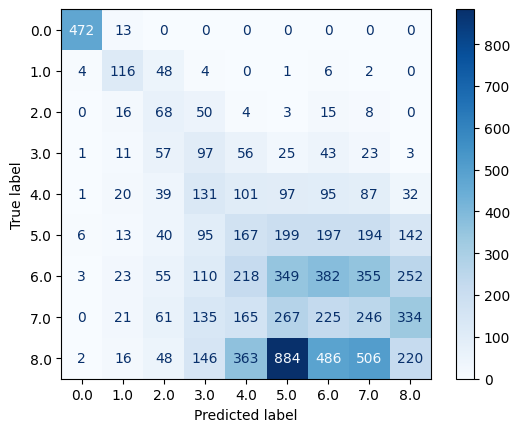

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97       485
         1.0       0.47      0.64      0.54       181
         2.0       0.16      0.41      0.23       164
         3.0       0.13      0.31      0.18       316
         4.0       0.09      0.17      0.12       603
         5.0       0.11      0.19      0.14      1053
         6.0       0.26      0.22      0.24      1747
         7.0       0.17      0.17      0.17      1454
         8.0       0.22      0.08      0.12      2671

    accuracy                           0.22      8674
   macro avg       0.29      0.35      0.30      8674
weighted avg       0.24      0.22      0.22      8674

Epoch 1/100
303/304 [============================>.] - ETA: 0s - loss: 1.8406 - sparse_categorical_accuracy: 0.2554
Epoch 1: val_loss improved from inf to 1.62740, saving model to CustomModel_indi_Res.weights.hdf5
304/304 [==============================] - 10s 32ms/step - loss: 1.8398 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


303/304 [============================>.] - ETA: 0s - loss: 1.8050 - sparse_categorical_accuracy: 0.2642
Epoch 2: val_loss did not improve from 1.62740
304/304 [==============================] - 10s 32ms/step - loss: 1.8044 - sparse_categorical_accuracy: 0.2640 - val_loss: 1.6310 - val_sparse_categorical_accuracy: 0.2395 - lr: 1.6000e-06
Epoch 3/100
303/304 [============================>.] - ETA: 0s - loss: 1.7353 - sparse_categorical_accuracy: 0.2754
Epoch 3: val_loss did not improve from 1.62740
304/304 [==============================] - 10s 32ms/step - loss: 1.7355 - sparse_categorical_accuracy: 0.2751 - val_loss: 1.6335 - val_sparse_categorical_accuracy: 0.2354 - lr: 1.6000e-06
Epoch 4/100
303/304 [============================>.] - ETA: 0s - loss: 1.7197 - sparse_categorical_accuracy: 0.2805
Epoch 4: val_loss did not improve from 1.62740

Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-06.
304/304 [==============================] - 10s 32ms/step - loss: 1.7245 - sparse_categ

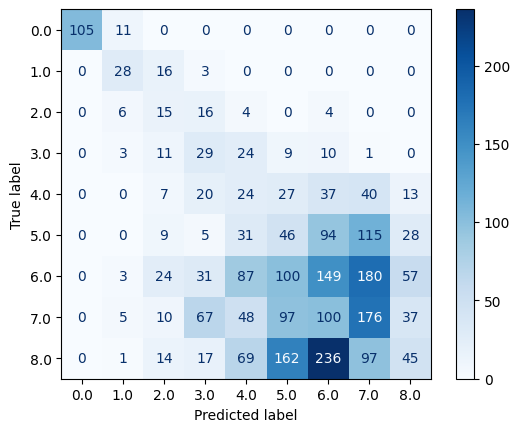

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95       116
         1.0       0.49      0.60      0.54        47
         2.0       0.14      0.33      0.20        45
         3.0       0.15      0.33      0.21        87
         4.0       0.08      0.14      0.11       168
         5.0       0.10      0.14      0.12       328
         6.0       0.24      0.24      0.24       631
         7.0       0.29      0.33      0.31       540
         8.0       0.25      0.07      0.11       641

    accuracy                           0.24      2603
   macro avg       0.31      0.34      0.31      2603
weighted avg       0.26      0.24      0.23      2603

[ 0  1  2  3  4  5  6  7  8  9 10]
[11]
Epoch 1/50
522/522 [==============================] - ETA: 0s - loss: 1.6703 - sparse_categorical_accuracy: 0.2571
Epoch 1: val_loss improved from inf to 1.69612, saving model to CustomModel_Res.weights.hdf5
522/522 [==============================] - 130s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


522/522 [==============================] - ETA: 0s - loss: 1.5644 - sparse_categorical_accuracy: 0.2778
Epoch 2: val_loss did not improve from 1.69612
522/522 [==============================] - 129s 246ms/step - loss: 1.5644 - sparse_categorical_accuracy: 0.2778 - val_loss: 1.9624 - val_sparse_categorical_accuracy: 0.1877 - lr: 0.0010
Epoch 3/50
522/522 [==============================] - ETA: 0s - loss: 1.5353 - sparse_categorical_accuracy: 0.2812
Epoch 3: val_loss did not improve from 1.69612
522/522 [==============================] - 129s 247ms/step - loss: 1.5353 - sparse_categorical_accuracy: 0.2812 - val_loss: 1.7333 - val_sparse_categorical_accuracy: 0.2935 - lr: 0.0010
Epoch 4/50
522/522 [==============================] - ETA: 0s - loss: 1.5184 - sparse_categorical_accuracy: 0.2849
Epoch 4: val_loss did not improve from 1.69612

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
522/522 [==============================] - 129s 248ms/step - loss: 1.5184 -

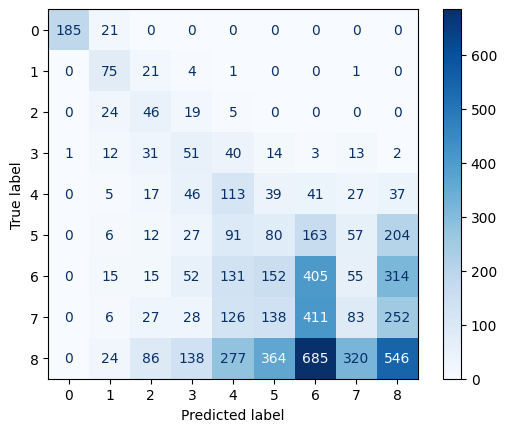

              precision    recall  f1-score   support

           0       0.99      0.90      0.94       206
           1       0.40      0.74      0.52       102
           2       0.18      0.49      0.26        94
           3       0.14      0.31      0.19       167
           4       0.14      0.35      0.20       325
           5       0.10      0.12      0.11       640
           6       0.24      0.36      0.28      1139
           7       0.15      0.08      0.10      1071
           8       0.40      0.22      0.29      2440

    accuracy                           0.26      6184
   macro avg       0.31      0.40      0.32      6184
weighted avg       0.29      0.26      0.26      6184

Epoch 1/100
215/217 [============================>.] - ETA: 0s - loss: 1.6969 - sparse_categorical_accuracy: 0.2477
Epoch 1: val_loss improved from inf to 2.14837, saving model to CustomModel_indi_Res.weights.hdf5
217/217 [==============================] - 8s 33ms/step - loss: 1.6925 - sparse_c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


215/217 [============================>.] - ETA: 0s - loss: 1.6366 - sparse_categorical_accuracy: 0.2465
Epoch 2: val_loss did not improve from 2.14837
217/217 [==============================] - 7s 32ms/step - loss: 1.6340 - sparse_categorical_accuracy: 0.2461 - val_loss: 2.1809 - val_sparse_categorical_accuracy: 0.0716 - lr: 1.6000e-06
Epoch 3/100
215/217 [============================>.] - ETA: 0s - loss: 1.5876 - sparse_categorical_accuracy: 0.2419
Epoch 3: val_loss did not improve from 2.14837
217/217 [==============================] - 7s 32ms/step - loss: 1.5838 - sparse_categorical_accuracy: 0.2418 - val_loss: 2.1567 - val_sparse_categorical_accuracy: 0.0716 - lr: 1.6000e-06
Epoch 4/100
215/217 [============================>.] - ETA: 0s - loss: 1.5440 - sparse_categorical_accuracy: 0.2590
Epoch 4: val_loss did not improve from 2.14837

Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-06.
217/217 [==============================] - 7s 32ms/step - loss: 1.5389 - sparse_categori

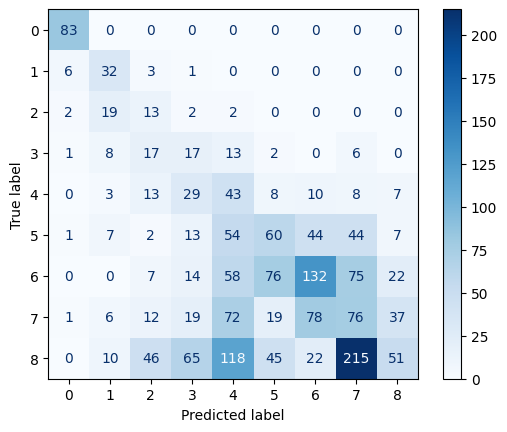

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        83
           1       0.38      0.76      0.50        42
           2       0.12      0.34      0.17        38
           3       0.11      0.27      0.15        64
           4       0.12      0.36      0.18       121
           5       0.29      0.26      0.27       232
           6       0.46      0.34      0.39       384
           7       0.18      0.24      0.20       320
           8       0.41      0.09      0.15       572

    accuracy                           0.27      1856
   macro avg       0.33      0.41      0.33      1856
weighted avg       0.35      0.27      0.27      1856


Mean accuracy of population: 0.2751, Standard deviation of population: 0.0494


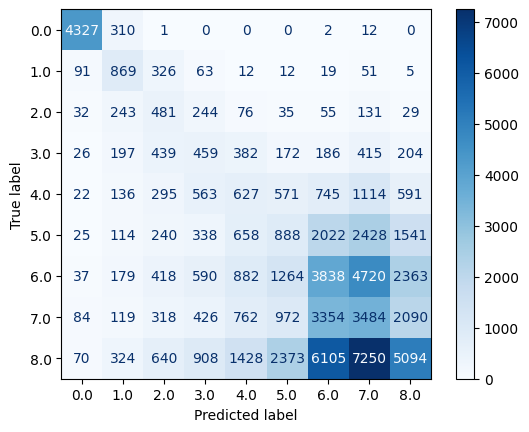

              precision    recall  f1-score   support

         0.0       0.92      0.93      0.92      4652
         1.0       0.35      0.60      0.44      1448
         2.0       0.15      0.36      0.21      1326
         3.0       0.13      0.19      0.15      2480
         4.0       0.13      0.13      0.13      4664
         5.0       0.14      0.11      0.12      8254
         6.0       0.24      0.27      0.25     14291
         7.0       0.18      0.30      0.22     11609
         8.0       0.43      0.21      0.28     24192

    accuracy                           0.28     72916
   macro avg       0.30      0.34      0.30     72916
weighted avg       0.31      0.28      0.28     72916


Mean accuracy of individuum: 0.2698, Standard deviation of individuum: 0.0496


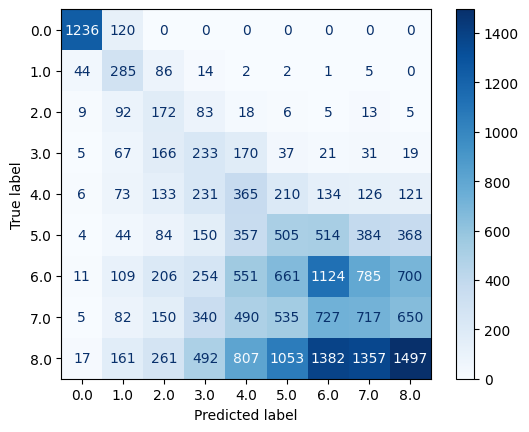

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      1356
         1.0       0.28      0.65      0.39       439
         2.0       0.14      0.43      0.21       403
         3.0       0.13      0.31      0.18       749
         4.0       0.13      0.26      0.18      1399
         5.0       0.17      0.21      0.19      2410
         6.0       0.29      0.26      0.27      4401
         7.0       0.21      0.19      0.20      3696
         8.0       0.45      0.21      0.29      7027

    accuracy                           0.28     21880
   macro avg       0.30      0.38      0.31     21880
weighted avg       0.33      0.28      0.29     21880



In [42]:
seed_value= 42  
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


def resnet_block(inputs, filters, kernel_size, strides):
    x = Conv1D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(filters=filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    shortcut = Conv1D(filters=filters, kernel_size=1, padding='same')(inputs)
    shortcut = BatchNormalization()(shortcut)

    output = Add()([x, shortcut])
    output = Activation('relu')(output)
    
    return x



def ResNet_Model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial Convolutional layer
    x = Conv1D(filters=64, kernel_size=9, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Residual blocks
    x = resnet_block(x, filters=64, kernel_size=7, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=64, kernel_size=5, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=64, kernel_size=3, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)

    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)

    # Output layer
    x = Dense(100, activation='relu')(x)
    outputs = Dense(units=num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile Model for each iteration
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

    
    return model
    




# we need 12 folds as we have 12 patients 
num_folds = 12
# we do not split them randomly so that the data of each subject remains 
kfolds = KFold(n_splits=num_folds, shuffle=False)

# empty list for accuarcy and variables of each fold which are stored
accuracies_CV_All = []
actual_labels_CV_All = []
predicted_labels_CV_All = []


accuracies_CV_indi = []
actual_labels_CV_indi = []
predicted_labels_CV_indi = []
count = 0

# itertate over each fold
for train_idx, test_idx in kfolds.split(X):
    # Split the dataset into training and validation sets for the current fold
    print(train_idx)
    print(test_idx)

    # train fold
    X_train_fold = [X[i] for i in train_idx]
    y_train_fold = [Y[i] for i in train_idx]

    # validation fold
    X_val_fold = [X_val[i] for i in train_idx]
    y_val_fold = [Y_val[i] for i in train_idx]

    # test fold
    X_test_fold = np.array([X[i] for i in test_idx])
    X_test_fold = X_test_fold.reshape(-1,72,4)

    y_test_fold = np.array([Y[i] for i in test_idx])
    y_test_fold = y_test_fold.reshape(-1,1)


    X_train_fold = np.vstack(X_train_fold)
    y_train_fold = np.vstack(y_train_fold)

    X_val_fold = np.vstack(X_val_fold)
    y_val_fold = np.vstack(y_val_fold)


    
    
    # splitting training data into training and validation for optimizing the learning rate
    # during training and early stopping
    X_train_fold, y_train_fold = shuffle(X_train_fold, y_train_fold)
    X_val_fold, y_val_fold = shuffle(X_val_fold, y_val_fold)

    X_train_indiv, X_test_indi,  y_train_indiv, y_test_indi = train_test_split(
    X_test_fold , y_test_fold , test_size=0.30, shuffle = False)

    X_train_indi, X_val_indi,  y_train_indi, y_val_indi = train_test_split(
    X_train_indiv , y_train_indiv, test_size=0.20, shuffle = False)


    # labels for the whole test data 
    actual_labels_CV_All = np.append(actual_labels_CV_All, y_test_fold)
    # labels for the individusal trained model which have less test data
    actual_labels_CV_indi = np.append(actual_labels_CV_indi, y_test_indi)

    # estimating distribution of classes
    labels_df = pd.DataFrame(y_train_fold, columns = ['label'])
    class_occurences = np.bincount(labels_df['label'])
    total = class_occurences.sum()
    number_classes = len(class_occurences)

    # assigning weights for classes, weight for last class stays 1, since its occurance is the highest
    weight_for_0 = (1/class_occurences[0]) * (total/number_classes)
    weight_for_1 = (1/class_occurences[1]) * (total/number_classes)
    weight_for_2 = (1/class_occurences[2]) * (total/number_classes)
    weight_for_3 = (1/class_occurences[3]) * (total/number_classes)
    weight_for_4 = (1/class_occurences[4]) * (total/number_classes)
    weight_for_5= (1/class_occurences[5]) * (total/number_classes)
    weight_for_6 = (1/class_occurences[6]) * (total/number_classes)
    weight_for_7 = (1/class_occurences[7]) * (total/number_classes)
    weight_for_8 = (1/class_occurences[8]) * (total/number_classes)


    class_weights = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4, 5: weight_for_5, 6: weight_for_6,  
                     7: weight_for_7,  8: weight_for_8,  9: 0, 10:0}

    
    # Create a new model for each fold
    model_CV_D = ResNet_Model((X_train_fold.shape[1], X_train_fold.shape[2]), 9)

    # Define the early stopping callback
    early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min', verbose=1, restore_best_weights=True)
    early_stopping_indi = EarlyStopping(patience=20, monitor='val_loss', mode='min', verbose=1, restore_best_weights=True)

    # initialize callbacks 
    reduceLR =ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 
    reduceLR_indi =ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 

    checkpoint = ModelCheckpoint('CustomModel_Res.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 
    checkpoint_indi = ModelCheckpoint('CustomModel_indi_Res.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 

    callbacks= [early_stopping, checkpoint, reduceLR]
    callbacks_indi= [early_stopping_indi, checkpoint_indi, reduceLR_indi]

    # Train the model on the current fold
    model_CV_D.fit(X_train_fold, y_train_fold,
    validation_data=(X_val_fold, y_val_fold),
    epochs=50,
    batch_size=128,
    callbacks=callbacks,
    class_weight = class_weights
    )

    name = "Models/ResNet_Population_%i.hdf5" % (count)
    model_CV_D.save(name)

 
    # Evaluate the model on the validation set
    y_pred_All = model_CV_D.predict(X_test_fold)
    y_pred_CV_All = np.argmax(y_pred_All, axis=1)
    accuracy_CV_All = accuracy_score(y_test_fold, y_pred_CV_All)
    accuracies_CV_All.append(accuracy_CV_All)

    ConfusionMatrixDisplay.from_predictions(y_test_fold, y_pred_CV_All, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/ResNet_Population_%i.png" % (count)
    plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_fold, y_pred_CV_All))

    predicted_labels_CV_All = np.append(predicted_labels_CV_All, y_pred_CV_All)

 
    


    # SECOND PART TRAIN THE MODEL FURTHER WITH 60% OF THE NEW PATIENT
    # Train the model on the current fold
    
    # estimating distribution of classes
    labels_df_indi = pd.DataFrame(y_train_indi, columns = ['label'])
    class_occurences_indi = np.bincount(labels_df_indi['label'])
    total_indi = class_occurences_indi.sum()
    number_classes_indi = len(class_occurences_indi)

    # assigning weights for classes, weight for last class stays 1, since its occurance is the highest
    weight_for_0_indi = (1/class_occurences_indi[0]) * (total_indi/number_classes_indi)
    weight_for_1_indi = (1/class_occurences_indi[1]) * (total_indi/number_classes_indi)
    weight_for_2_indi = (1/class_occurences_indi[2]) * (total_indi/number_classes_indi)
    weight_for_3_indi = (1/class_occurences_indi[3]) * (total_indi/number_classes_indi)
    weight_for_4_indi = (1/class_occurences_indi[4]) * (total_indi/number_classes_indi)
    weight_for_5_indi = (1/class_occurences_indi[5]) * (total_indi/number_classes_indi)
    weight_for_6_indi = (1/class_occurences_indi[6]) * (total_indi/number_classes_indi)
    weight_for_7_indi = (1/class_occurences_indi[7]) * (total_indi/number_classes_indi)
    weight_for_8_indi = (1/class_occurences_indi[8]) * (total_indi/number_classes_indi)


    class_weights_indi = {0: weight_for_0_indi, 1: weight_for_1_indi, 2: weight_for_2_indi, 3: weight_for_3_indi, 4: weight_for_4_indi, 
                     5: weight_for_5_indi, 6: weight_for_6_indi, 7: weight_for_7_indi,  8: weight_for_8_indi,  9: 0, 10:0}

    
    model_CV_D.fit(X_train_indi, y_train_indi,
    validation_data=(X_val_indi, y_val_indi),
    epochs=100,
    batch_size=16,
    callbacks=callbacks_indi,
    class_weight = class_weights_indi
    )

    name = "Models/ResNet_Indi_%i.hdf5" % (count)
    model_CV_D.save(name)

    # Evaluate the model on the validation set
    y_pred_indi = model_CV_D.predict(X_test_indi)
    y_pred_CV_indi = np.argmax(y_pred_indi, axis=1)
    accuracy_CV_indi = accuracy_score(y_test_indi, y_pred_CV_indi)
    accuracies_CV_indi.append(accuracy_CV_indi)

    ConfusionMatrixDisplay.from_predictions(y_test_indi, y_pred_CV_indi, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/ResNet_Indi_%i.png" % (count)
    plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_indi, y_pred_CV_indi))


    predicted_labels_CV_indi = np.append(predicted_labels_CV_indi, y_pred_CV_indi)

 
    
    count = count+1


# POPULATION
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_All = np.mean(accuracies_CV_All)
std_accuracy_CV_All = np.std(accuracies_CV_All)
# Evalaute Model and print Confusion Matrix
print(f"\nMean accuracy of population: {mean_accuracy_CV_All:.4f}, Standard deviation of population: {std_accuracy_CV_All:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_All, predicted_labels_CV_All, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/ResNet_Population_All.png"
plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_All, predicted_labels_CV_All))


# INDIVIDUUM

# Evalaute Model and print Confusion Matrix
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_indi = np.mean(accuracies_CV_indi)
std_accuracy_CV_indi = np.std(accuracies_CV_indi)
print(f"\nMean accuracy of individuum: {mean_accuracy_CV_indi:.4f}, Standard deviation of individuum: {std_accuracy_CV_indi:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_indi, predicted_labels_CV_indi, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/ResNet_Indi_All.png"
plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_indi, predicted_labels_CV_indi))

## Hybrid Model

[ 1  2  3  4  5  6  7  8  9 10 11]
[0]
Epoch 1/50
496/496 [==============================] - ETA: 0s - loss: 1.7472 - sparse_categorical_accuracy: 0.2351
Epoch 1: val_loss improved from inf to 1.87203, saving model to CustomModel_Hyb.weights.hdf5
496/496 [==============================] - 173s 343ms/step - loss: 1.7472 - sparse_categorical_accuracy: 0.2351 - val_loss: 1.8720 - val_sparse_categorical_accuracy: 0.2488 - lr: 0.0010
Epoch 2/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


496/496 [==============================] - ETA: 0s - loss: 1.5768 - sparse_categorical_accuracy: 0.2528
Epoch 2: val_loss improved from 1.87203 to 1.69260, saving model to CustomModel_Hyb.weights.hdf5
496/496 [==============================] - 169s 341ms/step - loss: 1.5768 - sparse_categorical_accuracy: 0.2528 - val_loss: 1.6926 - val_sparse_categorical_accuracy: 0.2372 - lr: 0.0010
Epoch 3/50
496/496 [==============================] - ETA: 0s - loss: 1.5396 - sparse_categorical_accuracy: 0.2638
Epoch 3: val_loss did not improve from 1.69260
496/496 [==============================] - 170s 343ms/step - loss: 1.5396 - sparse_categorical_accuracy: 0.2638 - val_loss: 1.8859 - val_sparse_categorical_accuracy: 0.2077 - lr: 0.0010
Epoch 4/50
496/496 [==============================] - ETA: 0s - loss: 1.5228 - sparse_categorical_accuracy: 0.2524
Epoch 4: val_loss did not improve from 1.69260
496/496 [==============================] - 171s 344ms/step - loss: 1.5228 - sparse_categorical_accuracy

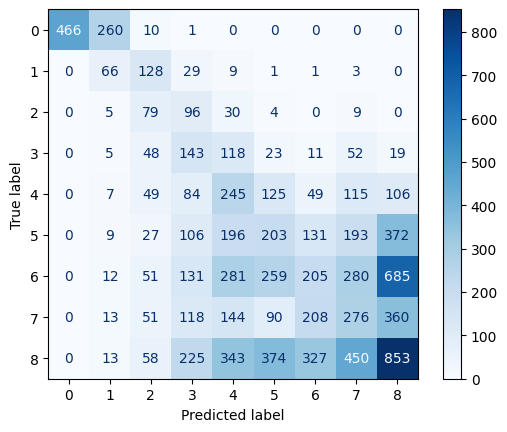

              precision    recall  f1-score   support

           0       1.00      0.63      0.77       737
           1       0.17      0.28      0.21       237
           2       0.16      0.35      0.22       223
           3       0.15      0.34      0.21       419
           4       0.18      0.31      0.23       780
           5       0.19      0.16      0.18      1237
           6       0.22      0.11      0.14      1904
           7       0.20      0.22      0.21      1260
           8       0.36      0.32      0.34      2643

    accuracy                           0.27      9440
   macro avg       0.29      0.30      0.28      9440
weighted avg       0.30      0.27      0.27      9440

Epoch 1/100
330/331 [============================>.] - ETA: 0s - loss: 1.7390 - sparse_categorical_accuracy: 0.2561
Epoch 1: val_loss improved from inf to 1.61415, saving model to CustomModel_indi_Hyb.weights.hdf5
331/331 [==============================] - 21s 58ms/step - loss: 1.7401 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


330/331 [============================>.] - ETA: 0s - loss: 1.6710 - sparse_categorical_accuracy: 0.2617
Epoch 2: val_loss did not improve from 1.61415
331/331 [==============================] - 19s 57ms/step - loss: 1.6726 - sparse_categorical_accuracy: 0.2616 - val_loss: 1.6469 - val_sparse_categorical_accuracy: 0.2973 - lr: 8.0000e-06
Epoch 3/100
330/331 [============================>.] - ETA: 0s - loss: 1.6447 - sparse_categorical_accuracy: 0.2600
Epoch 3: val_loss did not improve from 1.61415
331/331 [==============================] - 19s 57ms/step - loss: 1.6463 - sparse_categorical_accuracy: 0.2599 - val_loss: 1.6369 - val_sparse_categorical_accuracy: 0.2958 - lr: 8.0000e-06
Epoch 4/100
330/331 [============================>.] - ETA: 0s - loss: 1.6280 - sparse_categorical_accuracy: 0.2678
Epoch 4: val_loss did not improve from 1.61415

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
331/331 [==============================] - 19s 57ms/step - loss: 1.62

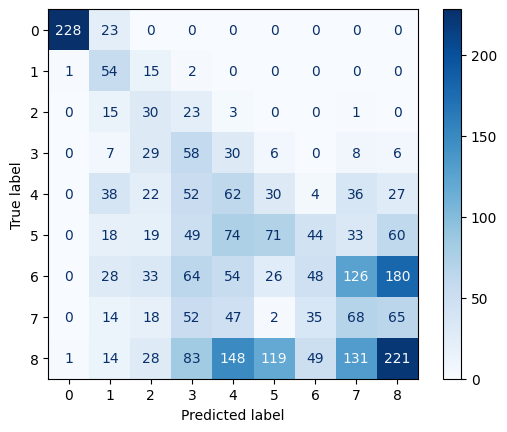

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       251
           1       0.26      0.75      0.38        72
           2       0.15      0.42      0.23        72
           3       0.15      0.40      0.22       144
           4       0.15      0.23      0.18       271
           5       0.28      0.19      0.23       368
           6       0.27      0.09      0.13       559
           7       0.17      0.23      0.19       301
           8       0.40      0.28      0.33       794

    accuracy                           0.30      2832
   macro avg       0.31      0.39      0.31      2832
weighted avg       0.34      0.30      0.30      2832

[ 0  2  3  4  5  6  7  8  9 10 11]
[1]
Epoch 1/50
540/540 [==============================] - ETA: 0s - loss: 1.7456 - sparse_categorical_accuracy: 0.2464
Epoch 1: val_loss improved from inf to 2.09648, saving model to CustomModel_Hyb.weights.hdf5
540/540 [==============================] - 190s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


540/540 [==============================] - ETA: 0s - loss: 1.5809 - sparse_categorical_accuracy: 0.2639
Epoch 2: val_loss improved from 2.09648 to 1.63903, saving model to CustomModel_Hyb.weights.hdf5
540/540 [==============================] - 184s 341ms/step - loss: 1.5809 - sparse_categorical_accuracy: 0.2639 - val_loss: 1.6390 - val_sparse_categorical_accuracy: 0.2351 - lr: 0.0010
Epoch 3/50
540/540 [==============================] - ETA: 0s - loss: 1.5472 - sparse_categorical_accuracy: 0.2664
Epoch 3: val_loss did not improve from 1.63903
540/540 [==============================] - 185s 343ms/step - loss: 1.5472 - sparse_categorical_accuracy: 0.2664 - val_loss: 2.2243 - val_sparse_categorical_accuracy: 0.1162 - lr: 0.0010
Epoch 4/50
540/540 [==============================] - ETA: 0s - loss: 1.5297 - sparse_categorical_accuracy: 0.2623
Epoch 4: val_loss did not improve from 1.63903
540/540 [==============================] - 186s 344ms/step - loss: 1.5297 - sparse_categorical_accuracy

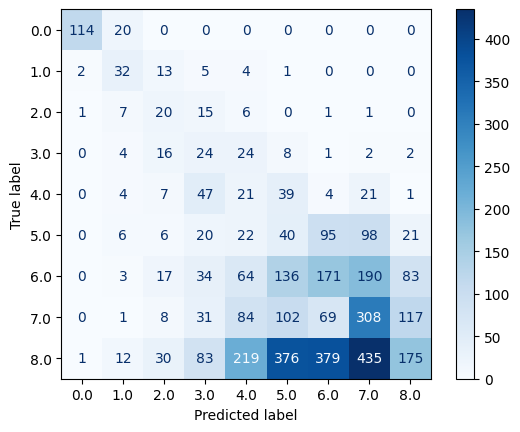

              precision    recall  f1-score   support

         0.0       0.97      0.85      0.90       134
         1.0       0.36      0.56      0.44        57
         2.0       0.17      0.39      0.24        51
         3.0       0.09      0.30      0.14        81
         4.0       0.05      0.15      0.07       144
         5.0       0.06      0.13      0.08       308
         6.0       0.24      0.24      0.24       698
         7.0       0.29      0.43      0.35       720
         8.0       0.44      0.10      0.17      1710

    accuracy                           0.23      3903
   macro avg       0.30      0.35      0.29      3903
weighted avg       0.34      0.23      0.23      3903

Epoch 1/100
136/137 [============================>.] - ETA: 0s - loss: 2.0518 - sparse_categorical_accuracy: 0.2040
Epoch 1: val_loss improved from inf to 1.71727, saving model to CustomModel_indi_Hyb.weights.hdf5
137/137 [==============================] - 8s 57ms/step - loss: 2.0473 - sparse_c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


136/137 [============================>.] - ETA: 0s - loss: 2.0058 - sparse_categorical_accuracy: 0.2169
Epoch 2: val_loss did not improve from 1.71727
137/137 [==============================] - 8s 56ms/step - loss: 2.0130 - sparse_categorical_accuracy: 0.2169 - val_loss: 1.7330 - val_sparse_categorical_accuracy: 0.2633 - lr: 1.6000e-06
Epoch 3/100
136/137 [============================>.] - ETA: 0s - loss: 1.7705 - sparse_categorical_accuracy: 0.2261
Epoch 3: val_loss did not improve from 1.71727
137/137 [==============================] - 8s 56ms/step - loss: 1.7793 - sparse_categorical_accuracy: 0.2261 - val_loss: 1.7342 - val_sparse_categorical_accuracy: 0.2870 - lr: 1.6000e-06
Epoch 4/100
136/137 [============================>.] - ETA: 0s - loss: 1.8049 - sparse_categorical_accuracy: 0.2247
Epoch 4: val_loss improved from 1.71727 to 1.70319, saving model to CustomModel_indi_Hyb.weights.hdf5
137/137 [==============================] - 8s 57ms/step - loss: 1.8019 - sparse_categorical_ac

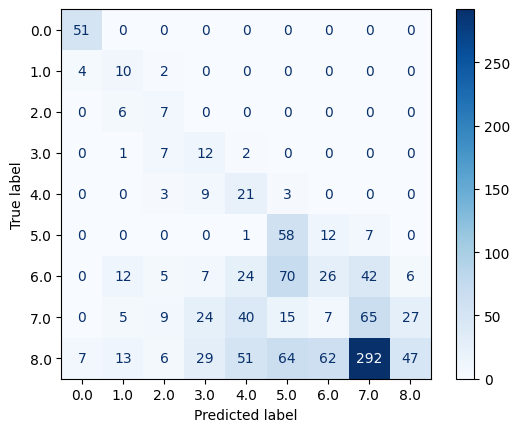

              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90        51
         1.0       0.21      0.62      0.32        16
         2.0       0.18      0.54      0.27        13
         3.0       0.15      0.55      0.23        22
         4.0       0.15      0.58      0.24        36
         5.0       0.28      0.74      0.40        78
         6.0       0.24      0.14      0.17       192
         7.0       0.16      0.34      0.22       192
         8.0       0.59      0.08      0.14       571

    accuracy                           0.25      1171
   macro avg       0.31      0.51      0.32      1171
weighted avg       0.42      0.25      0.22      1171

[ 0  1  3  4  5  6  7  8  9 10 11]
[2]
Epoch 1/50
525/525 [==============================] - ETA: 0s - loss: 1.7739 - sparse_categorical_accuracy: 0.2334
Epoch 1: val_loss improved from inf to 1.88590, saving model to CustomModel_Hyb.weights.hdf5
525/525 [==============================] - 181s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


525/525 [==============================] - ETA: 0s - loss: 1.6067 - sparse_categorical_accuracy: 0.2570
Epoch 2: val_loss did not improve from 1.88590
525/525 [==============================] - 178s 339ms/step - loss: 1.6067 - sparse_categorical_accuracy: 0.2570 - val_loss: 2.4652 - val_sparse_categorical_accuracy: 0.0991 - lr: 0.0010
Epoch 3/50
525/525 [==============================] - ETA: 0s - loss: 1.5660 - sparse_categorical_accuracy: 0.2647
Epoch 3: val_loss improved from 1.88590 to 1.82938, saving model to CustomModel_Hyb.weights.hdf5
525/525 [==============================] - 178s 338ms/step - loss: 1.5660 - sparse_categorical_accuracy: 0.2647 - val_loss: 1.8294 - val_sparse_categorical_accuracy: 0.1993 - lr: 0.0010
Epoch 4/50
525/525 [==============================] - ETA: 0s - loss: 1.5270 - sparse_categorical_accuracy: 0.2621
Epoch 4: val_loss improved from 1.82938 to 1.73625, saving model to CustomModel_Hyb.weights.hdf5
525/525 [==============================] - 179s 342ms

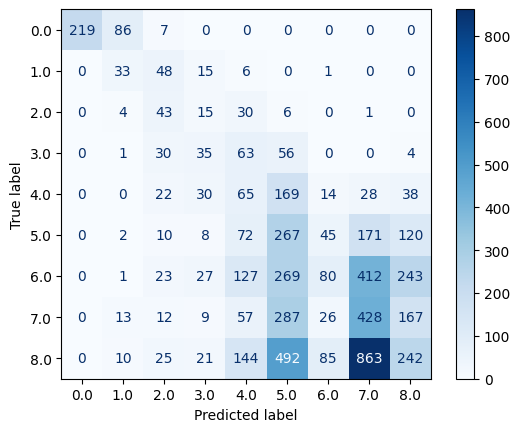

              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82       312
         1.0       0.22      0.32      0.26       103
         2.0       0.20      0.43      0.27        99
         3.0       0.22      0.19      0.20       189
         4.0       0.12      0.18      0.14       366
         5.0       0.17      0.38      0.24       695
         6.0       0.32      0.07      0.11      1182
         7.0       0.22      0.43      0.29       999
         8.0       0.30      0.13      0.18      1882

    accuracy                           0.24      5827
   macro avg       0.31      0.31      0.28      5827
weighted avg       0.29      0.24      0.23      5827

Epoch 1/100
204/204 [==============================] - ETA: 0s - loss: 1.6369 - sparse_categorical_accuracy: 0.2158
Epoch 1: val_loss improved from inf to 1.70625, saving model to CustomModel_indi_Hyb.weights.hdf5
204/204 [==============================] - 12s 59ms/step - loss: 1.6369 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


204/204 [==============================] - ETA: 0s - loss: 1.6014 - sparse_categorical_accuracy: 0.2207
Epoch 2: val_loss did not improve from 1.70625
204/204 [==============================] - 12s 57ms/step - loss: 1.6014 - sparse_categorical_accuracy: 0.2207 - val_loss: 1.7251 - val_sparse_categorical_accuracy: 0.1850 - lr: 8.0000e-06
Epoch 3/100
203/204 [============================>.] - ETA: 0s - loss: 1.5549 - sparse_categorical_accuracy: 0.2309
Epoch 3: val_loss did not improve from 1.70625
204/204 [==============================] - 12s 58ms/step - loss: 1.5540 - sparse_categorical_accuracy: 0.2305 - val_loss: 1.7240 - val_sparse_categorical_accuracy: 0.1863 - lr: 8.0000e-06
Epoch 4/100
204/204 [==============================] - ETA: 0s - loss: 1.5794 - sparse_categorical_accuracy: 0.2443
Epoch 4: val_loss improved from 1.70625 to 1.70124, saving model to CustomModel_indi_Hyb.weights.hdf5
204/204 [==============================] - 12s 59ms/step - loss: 1.5794 - sparse_categorical

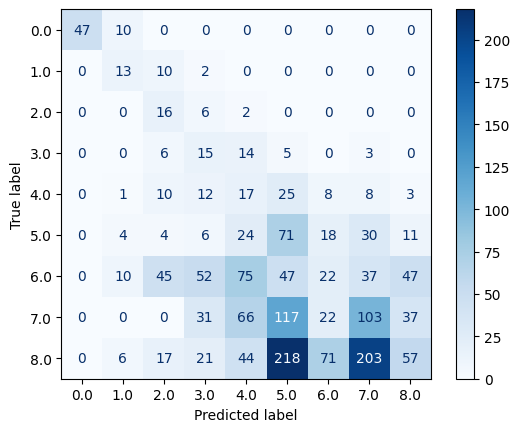

              precision    recall  f1-score   support

         0.0       1.00      0.82      0.90        57
         1.0       0.30      0.52      0.38        25
         2.0       0.15      0.67      0.24        24
         3.0       0.10      0.35      0.16        43
         4.0       0.07      0.20      0.10        84
         5.0       0.15      0.42      0.22       168
         6.0       0.16      0.07      0.09       335
         7.0       0.27      0.27      0.27       376
         8.0       0.37      0.09      0.14       637

    accuracy                           0.21      1749
   macro avg       0.28      0.38      0.28      1749
weighted avg       0.28      0.21      0.20      1749

[ 0  1  2  4  5  6  7  8  9 10 11]
[3]
Epoch 1/50
512/512 [==============================] - ETA: 0s - loss: 1.7625 - sparse_categorical_accuracy: 0.2411
Epoch 1: val_loss improved from inf to 1.71882, saving model to CustomModel_Hyb.weights.hdf5
512/512 [==============================] - 178s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


512/512 [==============================] - ETA: 0s - loss: 1.5826 - sparse_categorical_accuracy: 0.2553
Epoch 2: val_loss improved from 1.71882 to 1.70336, saving model to CustomModel_Hyb.weights.hdf5
512/512 [==============================] - 176s 343ms/step - loss: 1.5826 - sparse_categorical_accuracy: 0.2553 - val_loss: 1.7034 - val_sparse_categorical_accuracy: 0.2218 - lr: 0.0010
Epoch 3/50
512/512 [==============================] - ETA: 0s - loss: 1.5464 - sparse_categorical_accuracy: 0.2487
Epoch 3: val_loss did not improve from 1.70336
512/512 [==============================] - 176s 344ms/step - loss: 1.5464 - sparse_categorical_accuracy: 0.2487 - val_loss: 1.7745 - val_sparse_categorical_accuracy: 0.2318 - lr: 0.0010
Epoch 4/50
512/512 [==============================] - ETA: 0s - loss: 1.5319 - sparse_categorical_accuracy: 0.2598
Epoch 4: val_loss improved from 1.70336 to 1.65019, saving model to CustomModel_Hyb.weights.hdf5
512/512 [==============================] - 177s 345ms

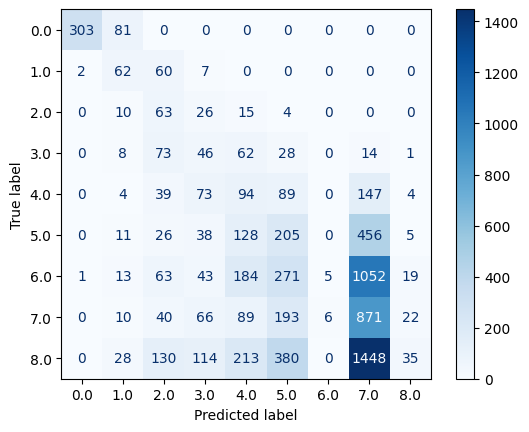

              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88       384
         1.0       0.27      0.47      0.35       131
         2.0       0.13      0.53      0.21       118
         3.0       0.11      0.20      0.14       232
         4.0       0.12      0.21      0.15       450
         5.0       0.18      0.24      0.20       869
         6.0       0.45      0.00      0.01      1651
         7.0       0.22      0.67      0.33      1297
         8.0       0.41      0.01      0.03      2348

    accuracy                           0.23      7480
   macro avg       0.32      0.35      0.25      7480
weighted avg       0.35      0.23      0.16      7480

Epoch 1/100
261/262 [============================>.] - ETA: 0s - loss: 1.6041 - sparse_categorical_accuracy: 0.1810
Epoch 1: val_loss improved from inf to 1.61734, saving model to CustomModel_indi_Hyb.weights.hdf5
262/262 [==============================] - 15s 58ms/step - loss: 1.6028 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


261/262 [============================>.] - ETA: 0s - loss: 1.5953 - sparse_categorical_accuracy: 0.1897
Epoch 2: val_loss improved from 1.61734 to 1.61480, saving model to CustomModel_indi_Hyb.weights.hdf5
262/262 [==============================] - 15s 58ms/step - loss: 1.5951 - sparse_categorical_accuracy: 0.1898 - val_loss: 1.6148 - val_sparse_categorical_accuracy: 0.2347 - lr: 8.0000e-06
Epoch 3/100
261/262 [============================>.] - ETA: 0s - loss: 1.5730 - sparse_categorical_accuracy: 0.1865
Epoch 3: val_loss improved from 1.61480 to 1.60540, saving model to CustomModel_indi_Hyb.weights.hdf5
262/262 [==============================] - 15s 58ms/step - loss: 1.5759 - sparse_categorical_accuracy: 0.1867 - val_loss: 1.6054 - val_sparse_categorical_accuracy: 0.2338 - lr: 8.0000e-06
Epoch 4/100
261/262 [============================>.] - ETA: 0s - loss: 1.5483 - sparse_categorical_accuracy: 0.1937
Epoch 4: val_loss did not improve from 1.60540
262/262 [============================

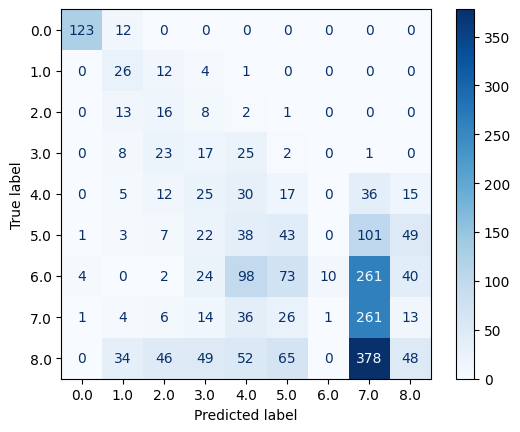

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93       135
         1.0       0.25      0.60      0.35        43
         2.0       0.13      0.40      0.20        40
         3.0       0.10      0.22      0.14        76
         4.0       0.11      0.21      0.14       140
         5.0       0.19      0.16      0.18       264
         6.0       0.91      0.02      0.04       512
         7.0       0.25      0.72      0.37       362
         8.0       0.29      0.07      0.11       672

    accuracy                           0.26      2244
   macro avg       0.35      0.37      0.27      2244
weighted avg       0.43      0.26      0.20      2244

[ 0  1  2  3  5  6  7  8  9 10 11]
[4]
Epoch 1/50
527/527 [==============================] - ETA: 0s - loss: 1.7508 - sparse_categorical_accuracy: 0.2506
Epoch 1: val_loss improved from inf to 1.92033, saving model to CustomModel_Hyb.weights.hdf5
527/527 [==============================] - 186s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


527/527 [==============================] - ETA: 0s - loss: 1.5806 - sparse_categorical_accuracy: 0.2609
Epoch 2: val_loss improved from 1.92033 to 1.77704, saving model to CustomModel_Hyb.weights.hdf5
527/527 [==============================] - 183s 348ms/step - loss: 1.5806 - sparse_categorical_accuracy: 0.2609 - val_loss: 1.7770 - val_sparse_categorical_accuracy: 0.2251 - lr: 0.0010
Epoch 3/50
527/527 [==============================] - ETA: 0s - loss: 1.5328 - sparse_categorical_accuracy: 0.2509
Epoch 3: val_loss improved from 1.77704 to 1.73303, saving model to CustomModel_Hyb.weights.hdf5
527/527 [==============================] - 183s 348ms/step - loss: 1.5328 - sparse_categorical_accuracy: 0.2509 - val_loss: 1.7330 - val_sparse_categorical_accuracy: 0.2309 - lr: 0.0010
Epoch 4/50
527/527 [==============================] - ETA: 0s - loss: 1.5152 - sparse_categorical_accuracy: 0.2562
Epoch 4: val_loss did not improve from 1.73303
527/527 [==============================] - 184s 348ms

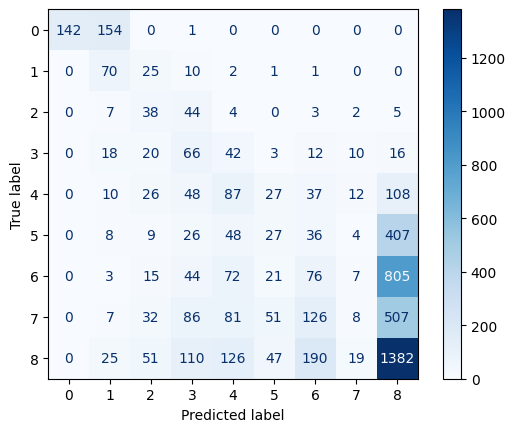

              precision    recall  f1-score   support

           0       1.00      0.48      0.65       297
           1       0.23      0.64      0.34       109
           2       0.18      0.37      0.24       103
           3       0.15      0.35      0.21       187
           4       0.19      0.25      0.21       355
           5       0.15      0.05      0.07       565
           6       0.16      0.07      0.10      1043
           7       0.13      0.01      0.02       898
           8       0.43      0.71      0.53      1950

    accuracy                           0.34      5507
   macro avg       0.29      0.33      0.26      5507
weighted avg       0.30      0.34      0.29      5507

Epoch 1/100
192/193 [============================>.] - ETA: 0s - loss: 1.7349 - sparse_categorical_accuracy: 0.3076
Epoch 1: val_loss improved from inf to 1.70472, saving model to CustomModel_indi_Hyb.weights.hdf5
193/193 [==============================] - 14s 62ms/step - loss: 1.7341 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


192/193 [============================>.] - ETA: 0s - loss: 1.6353 - sparse_categorical_accuracy: 0.3066
Epoch 2: val_loss did not improve from 1.70472
193/193 [==============================] - 11s 59ms/step - loss: 1.6382 - sparse_categorical_accuracy: 0.3072 - val_loss: 1.7309 - val_sparse_categorical_accuracy: 0.3658 - lr: 8.0000e-06
Epoch 3/100
192/193 [============================>.] - ETA: 0s - loss: 1.6004 - sparse_categorical_accuracy: 0.3063
Epoch 3: val_loss did not improve from 1.70472
193/193 [==============================] - 11s 59ms/step - loss: 1.6011 - sparse_categorical_accuracy: 0.3059 - val_loss: 1.7280 - val_sparse_categorical_accuracy: 0.3645 - lr: 8.0000e-06
Epoch 4/100
192/193 [============================>.] - ETA: 0s - loss: 1.5913 - sparse_categorical_accuracy: 0.3037
Epoch 4: val_loss did not improve from 1.70472

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
193/193 [==============================] - 11s 59ms/step - loss: 1.59

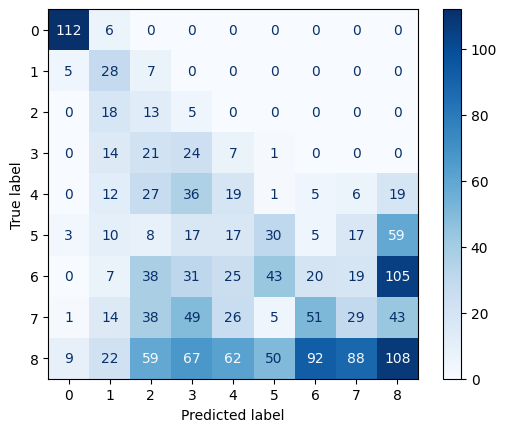

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       118
           1       0.21      0.70      0.33        40
           2       0.06      0.36      0.11        36
           3       0.10      0.36      0.16        67
           4       0.12      0.15      0.14       125
           5       0.23      0.18      0.20       166
           6       0.12      0.07      0.09       288
           7       0.18      0.11      0.14       256
           8       0.32      0.19      0.24       557

    accuracy                           0.23      1653
   macro avg       0.25      0.34      0.26      1653
weighted avg       0.26      0.23      0.23      1653

[ 0  1  2  3  4  6  7  8  9 10 11]
[5]
Epoch 1/50
518/518 [==============================] - ETA: 0s - loss: 1.7956 - sparse_categorical_accuracy: 0.2330
Epoch 1: val_loss improved from inf to 2.00806, saving model to CustomModel_Hyb.weights.hdf5
518/518 [==============================] - 181s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


518/518 [==============================] - ETA: 0s - loss: 1.5982 - sparse_categorical_accuracy: 0.2542
Epoch 2: val_loss improved from 2.00806 to 1.65213, saving model to CustomModel_Hyb.weights.hdf5
518/518 [==============================] - 179s 346ms/step - loss: 1.5982 - sparse_categorical_accuracy: 0.2542 - val_loss: 1.6521 - val_sparse_categorical_accuracy: 0.3301 - lr: 0.0010
Epoch 3/50
518/518 [==============================] - ETA: 0s - loss: 1.5599 - sparse_categorical_accuracy: 0.2583
Epoch 3: val_loss did not improve from 1.65213
518/518 [==============================] - 179s 347ms/step - loss: 1.5599 - sparse_categorical_accuracy: 0.2583 - val_loss: 1.9298 - val_sparse_categorical_accuracy: 0.1962 - lr: 0.0010
Epoch 4/50
518/518 [==============================] - ETA: 0s - loss: 1.5301 - sparse_categorical_accuracy: 0.2571
Epoch 4: val_loss improved from 1.65213 to 1.65193, saving model to CustomModel_Hyb.weights.hdf5
518/518 [==============================] - 179s 345ms

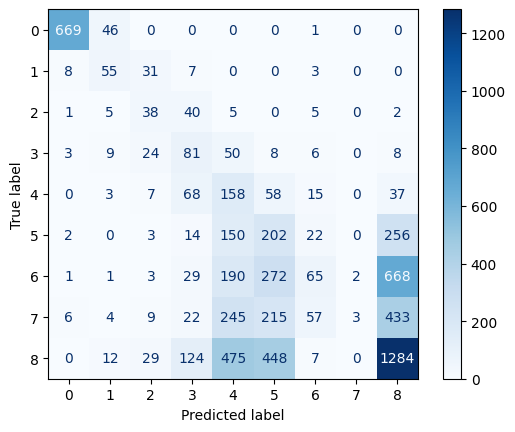

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       716
           1       0.41      0.53      0.46       104
           2       0.26      0.40      0.32        96
           3       0.21      0.43      0.28       189
           4       0.12      0.46      0.20       346
           5       0.17      0.31      0.22       649
           6       0.36      0.05      0.09      1231
           7       0.60      0.00      0.01       994
           8       0.48      0.54      0.51      2379

    accuracy                           0.38      6704
   macro avg       0.40      0.41      0.34      6704
weighted avg       0.47      0.38      0.35      6704

Epoch 1/100
234/235 [============================>.] - ETA: 0s - loss: 1.5991 - sparse_categorical_accuracy: 0.3299
Epoch 1: val_loss improved from inf to 1.56713, saving model to CustomModel_indi_Hyb.weights.hdf5
235/235 [==============================] - 16s 59ms/step - loss: 1.5981 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


234/235 [============================>.] - ETA: 0s - loss: 1.5564 - sparse_categorical_accuracy: 0.3408
Epoch 2: val_loss improved from 1.56713 to 1.55567, saving model to CustomModel_indi_Hyb.weights.hdf5
235/235 [==============================] - 13s 57ms/step - loss: 1.5545 - sparse_categorical_accuracy: 0.3411 - val_loss: 1.5557 - val_sparse_categorical_accuracy: 0.3962 - lr: 8.0000e-06
Epoch 3/100
234/235 [============================>.] - ETA: 0s - loss: 1.5342 - sparse_categorical_accuracy: 0.3494
Epoch 3: val_loss improved from 1.55567 to 1.54406, saving model to CustomModel_indi_Hyb.weights.hdf5
235/235 [==============================] - 14s 58ms/step - loss: 1.5350 - sparse_categorical_accuracy: 0.3488 - val_loss: 1.5441 - val_sparse_categorical_accuracy: 0.3578 - lr: 8.0000e-06
Epoch 4/100
234/235 [============================>.] - ETA: 0s - loss: 1.5154 - sparse_categorical_accuracy: 0.3333
Epoch 4: val_loss did not improve from 1.54406
235/235 [============================

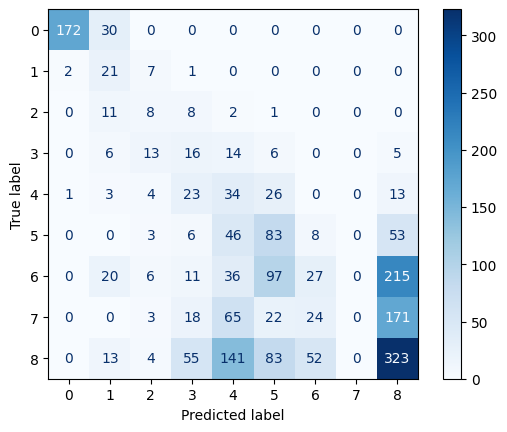

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       202
           1       0.20      0.68      0.31        31
           2       0.17      0.27      0.21        30
           3       0.12      0.27      0.16        60
           4       0.10      0.33      0.15       104
           5       0.26      0.42      0.32       199
           6       0.24      0.07      0.10       412
           7       0.00      0.00      0.00       303
           8       0.41      0.48      0.45       671

    accuracy                           0.34      2012
   macro avg       0.28      0.37      0.29      2012
weighted avg       0.33      0.34      0.31      2012

[ 0  1  2  3  4  5  7  8  9 10 11]
[6]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Epoch 1/50
542/542 [==============================] - ETA: 0s - loss: 1.7649 - sparse_categorical_accuracy: 0.2364
Epoch 1: val_loss improved from inf to 1.82003, saving model to CustomModel_Hyb.weights.hdf5
542/542 [==============================] - 192s 350ms/step - loss: 1.7649 - sparse_categorical_accuracy: 0.2364 - val_loss: 1.8200 - val_sparse_categorical_accuracy: 0.1759 - lr: 0.0010
Epoch 2/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


542/542 [==============================] - ETA: 0s - loss: 1.5917 - sparse_categorical_accuracy: 0.2486
Epoch 2: val_loss did not improve from 1.82003
542/542 [==============================] - 189s 349ms/step - loss: 1.5917 - sparse_categorical_accuracy: 0.2486 - val_loss: 1.8936 - val_sparse_categorical_accuracy: 0.1901 - lr: 0.0010
Epoch 3/50
542/542 [==============================] - ETA: 0s - loss: 1.5504 - sparse_categorical_accuracy: 0.2479
Epoch 3: val_loss did not improve from 1.82003
542/542 [==============================] - 190s 351ms/step - loss: 1.5504 - sparse_categorical_accuracy: 0.2479 - val_loss: 3.0923 - val_sparse_categorical_accuracy: 0.1048 - lr: 0.0010
Epoch 4/50
542/542 [==============================] - ETA: 0s - loss: 1.5219 - sparse_categorical_accuracy: 0.2560
Epoch 4: val_loss improved from 1.82003 to 1.60952, saving model to CustomModel_Hyb.weights.hdf5
542/542 [==============================] - 188s 346ms/step - loss: 1.5219 - sparse_categorical_accuracy

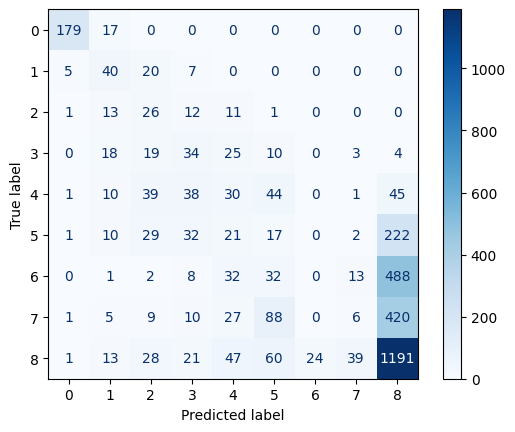

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       196
           1       0.31      0.56      0.40        72
           2       0.15      0.41      0.22        64
           3       0.21      0.30      0.25       113
           4       0.16      0.14      0.15       208
           5       0.07      0.05      0.06       334
           6       0.00      0.00      0.00       576
           7       0.09      0.01      0.02       566
           8       0.50      0.84      0.63      1424

    accuracy                           0.43      3553
   macro avg       0.27      0.36      0.29      3553
weighted avg       0.30      0.43      0.34      3553

Epoch 1/100
124/125 [============================>.] - ETA: 0s - loss: 1.8924 - sparse_categorical_accuracy: 0.4244
Epoch 1: val_loss improved from inf to 1.56468, saving model to CustomModel_indi_Hyb.weights.hdf5
125/125 [==============================] - 9s 62ms/step - loss: 1.8903 - sparse_c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


124/125 [============================>.] - ETA: 0s - loss: 1.7160 - sparse_categorical_accuracy: 0.4274
Epoch 2: val_loss improved from 1.56468 to 1.56437, saving model to CustomModel_indi_Hyb.weights.hdf5
125/125 [==============================] - 7s 57ms/step - loss: 1.7155 - sparse_categorical_accuracy: 0.4274 - val_loss: 1.5644 - val_sparse_categorical_accuracy: 0.4076 - lr: 8.0000e-06
Epoch 3/100
124/125 [============================>.] - ETA: 0s - loss: 1.6227 - sparse_categorical_accuracy: 0.4425
Epoch 3: val_loss improved from 1.56437 to 1.56132, saving model to CustomModel_indi_Hyb.weights.hdf5
125/125 [==============================] - 7s 57ms/step - loss: 1.6220 - sparse_categorical_accuracy: 0.4429 - val_loss: 1.5613 - val_sparse_categorical_accuracy: 0.4277 - lr: 8.0000e-06
Epoch 4/100
124/125 [============================>.] - ETA: 0s - loss: 1.5815 - sparse_categorical_accuracy: 0.4481
Epoch 4: val_loss did not improve from 1.56132
125/125 [==============================

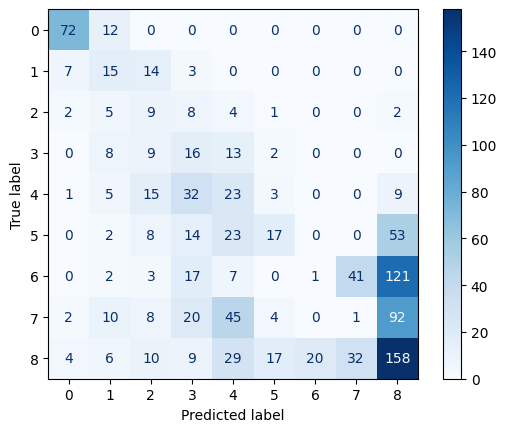

              precision    recall  f1-score   support

           0       0.82      0.86      0.84        84
           1       0.23      0.38      0.29        39
           2       0.12      0.29      0.17        31
           3       0.13      0.33      0.19        48
           4       0.16      0.26      0.20        88
           5       0.39      0.15      0.21       117
           6       0.05      0.01      0.01       192
           7       0.01      0.01      0.01       182
           8       0.36      0.55      0.44       285

    accuracy                           0.29      1066
   macro avg       0.25      0.32      0.26      1066
weighted avg       0.25      0.29      0.25      1066

[ 0  1  2  3  4  5  6  8  9 10 11]
[7]
Epoch 1/50
495/495 [==============================] - ETA: 0s - loss: 1.7685 - sparse_categorical_accuracy: 0.2313
Epoch 1: val_loss improved from inf to 2.05187, saving model to CustomModel_Hyb.weights.hdf5
495/495 [==============================] - 173s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


495/495 [==============================] - ETA: 0s - loss: 1.6100 - sparse_categorical_accuracy: 0.2624
Epoch 2: val_loss did not improve from 2.05187
495/495 [==============================] - 170s 344ms/step - loss: 1.6100 - sparse_categorical_accuracy: 0.2624 - val_loss: 2.4025 - val_sparse_categorical_accuracy: 0.1814 - lr: 0.0010
Epoch 3/50
495/495 [==============================] - ETA: 0s - loss: 1.5560 - sparse_categorical_accuracy: 0.2611
Epoch 3: val_loss improved from 2.05187 to 1.68934, saving model to CustomModel_Hyb.weights.hdf5
495/495 [==============================] - 171s 345ms/step - loss: 1.5560 - sparse_categorical_accuracy: 0.2611 - val_loss: 1.6893 - val_sparse_categorical_accuracy: 0.3315 - lr: 0.0010
Epoch 4/50
495/495 [==============================] - ETA: 0s - loss: 1.5385 - sparse_categorical_accuracy: 0.2511
Epoch 4: val_loss did not improve from 1.68934
495/495 [==============================] - 172s 347ms/step - loss: 1.5385 - sparse_categorical_accuracy

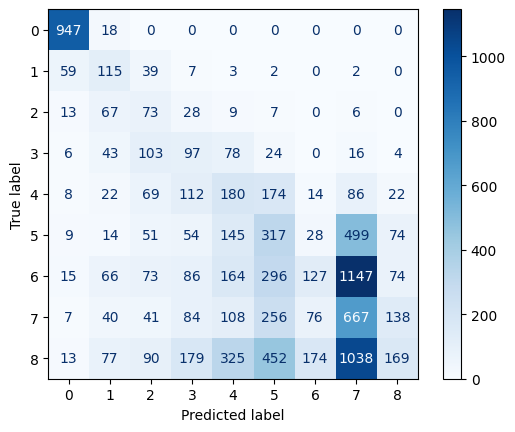

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       965
           1       0.25      0.51      0.33       227
           2       0.14      0.36      0.20       203
           3       0.15      0.26      0.19       371
           4       0.18      0.26      0.21       687
           5       0.21      0.27      0.23      1191
           6       0.30      0.06      0.10      2048
           7       0.19      0.47      0.27      1417
           8       0.35      0.07      0.11      2517

    accuracy                           0.28      9626
   macro avg       0.29      0.36      0.29      9626
weighted avg       0.33      0.28      0.25      9626

Epoch 1/100
337/337 [==============================] - ETA: 0s - loss: 1.8355 - sparse_categorical_accuracy: 0.2221
Epoch 1: val_loss improved from inf to 1.42390, saving model to CustomModel_indi_Hyb.weights.hdf5
337/337 [==============================] - 22s 60ms/step - loss: 1.8355 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


337/337 [==============================] - ETA: 0s - loss: 1.6992 - sparse_categorical_accuracy: 0.2276
Epoch 2: val_loss improved from 1.42390 to 1.39349, saving model to CustomModel_indi_Hyb.weights.hdf5
337/337 [==============================] - 20s 59ms/step - loss: 1.6992 - sparse_categorical_accuracy: 0.2276 - val_loss: 1.3935 - val_sparse_categorical_accuracy: 0.3709 - lr: 8.0000e-06
Epoch 3/100
337/337 [==============================] - ETA: 0s - loss: 1.6313 - sparse_categorical_accuracy: 0.2353
Epoch 3: val_loss improved from 1.39349 to 1.38536, saving model to CustomModel_indi_Hyb.weights.hdf5
337/337 [==============================] - 20s 58ms/step - loss: 1.6313 - sparse_categorical_accuracy: 0.2353 - val_loss: 1.3854 - val_sparse_categorical_accuracy: 0.3813 - lr: 8.0000e-06
Epoch 4/100
337/337 [==============================] - ETA: 0s - loss: 1.6586 - sparse_categorical_accuracy: 0.2436
Epoch 4: val_loss did not improve from 1.38536
337/337 [============================

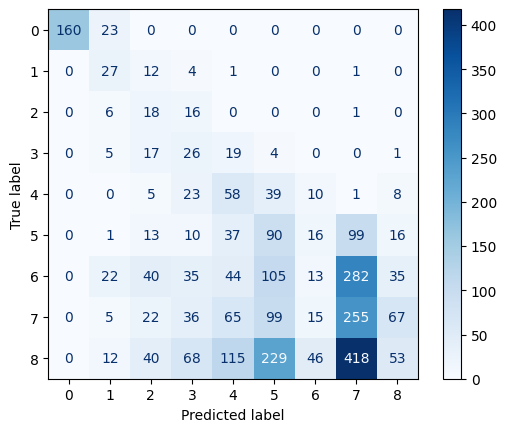

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       183
           1       0.27      0.60      0.37        45
           2       0.11      0.44      0.17        41
           3       0.12      0.36      0.18        72
           4       0.17      0.40      0.24       144
           5       0.16      0.32      0.21       282
           6       0.13      0.02      0.04       576
           7       0.24      0.45      0.31       564
           8       0.29      0.05      0.09       981

    accuracy                           0.24      2888
   macro avg       0.28      0.39      0.28      2888
weighted avg       0.27      0.24      0.20      2888

[ 0  1  2  3  4  5  6  7  9 10 11]
[8]
Epoch 1/50
548/548 [==============================] - ETA: 0s - loss: 1.7529 - sparse_categorical_accuracy: 0.2397
Epoch 1: val_loss improved from inf to 1.72519, saving model to CustomModel_Hyb.weights.hdf5
548/548 [==============================] - 190s 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


548/548 [==============================] - ETA: 0s - loss: 1.5733 - sparse_categorical_accuracy: 0.2582
Epoch 2: val_loss improved from 1.72519 to 1.63409, saving model to CustomModel_Hyb.weights.hdf5
548/548 [==============================] - 188s 343ms/step - loss: 1.5733 - sparse_categorical_accuracy: 0.2582 - val_loss: 1.6341 - val_sparse_categorical_accuracy: 0.2378 - lr: 0.0010
Epoch 3/50
548/548 [==============================] - ETA: 0s - loss: 1.5395 - sparse_categorical_accuracy: 0.2614
Epoch 3: val_loss did not improve from 1.63409
548/548 [==============================] - 189s 344ms/step - loss: 1.5395 - sparse_categorical_accuracy: 0.2614 - val_loss: 1.9419 - val_sparse_categorical_accuracy: 0.2068 - lr: 0.0010
Epoch 4/50
548/548 [==============================] - ETA: 0s - loss: 1.5204 - sparse_categorical_accuracy: 0.2581
Epoch 4: val_loss did not improve from 1.63409
548/548 [==============================] - 188s 344ms/step - loss: 1.5204 - sparse_categorical_accuracy

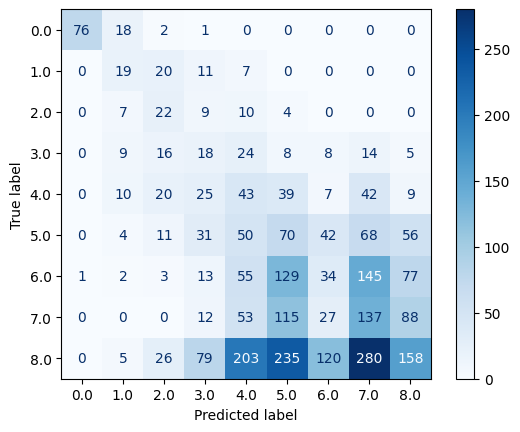

              precision    recall  f1-score   support

         0.0       0.99      0.78      0.87        97
         1.0       0.26      0.33      0.29        57
         2.0       0.18      0.42      0.26        52
         3.0       0.09      0.18      0.12       102
         4.0       0.10      0.22      0.13       195
         5.0       0.12      0.21      0.15       332
         6.0       0.14      0.07      0.10       459
         7.0       0.20      0.32      0.25       432
         8.0       0.40      0.14      0.21      1106

    accuracy                           0.20      2832
   macro avg       0.28      0.30      0.26      2832
weighted avg       0.28      0.20      0.21      2832

Epoch 1/100
 99/100 [============================>.] - ETA: 0s - loss: 1.9877 - sparse_categorical_accuracy: 0.1862
Epoch 1: val_loss improved from inf to 1.83129, saving model to CustomModel_indi_Hyb.weights.hdf5
100/100 [==============================] - 6s 56ms/step - loss: 2.0142 - sparse_c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 99/100 [============================>.] - ETA: 0s - loss: 1.9067 - sparse_categorical_accuracy: 0.1976
Epoch 2: val_loss did not improve from 1.83129
100/100 [==============================] - 6s 56ms/step - loss: 1.9296 - sparse_categorical_accuracy: 0.1975 - val_loss: 1.8482 - val_sparse_categorical_accuracy: 0.2620 - lr: 1.0000e-06
Epoch 3/100
 99/100 [============================>.] - ETA: 0s - loss: 1.9468 - sparse_categorical_accuracy: 0.1856
Epoch 3: val_loss did not improve from 1.83129
100/100 [==============================] - 6s 56ms/step - loss: 1.9458 - sparse_categorical_accuracy: 0.1855 - val_loss: 1.8513 - val_sparse_categorical_accuracy: 0.2872 - lr: 1.0000e-06
Epoch 4/100
 99/100 [============================>.] - ETA: 0s - loss: 1.9707 - sparse_categorical_accuracy: 0.2008
Epoch 4: val_loss did not improve from 1.83129
100/100 [==============================] - 6s 56ms/step - loss: 1.9700 - sparse_categorical_accuracy: 0.2006 - val_loss: 1.8612 - val_sparse_categori

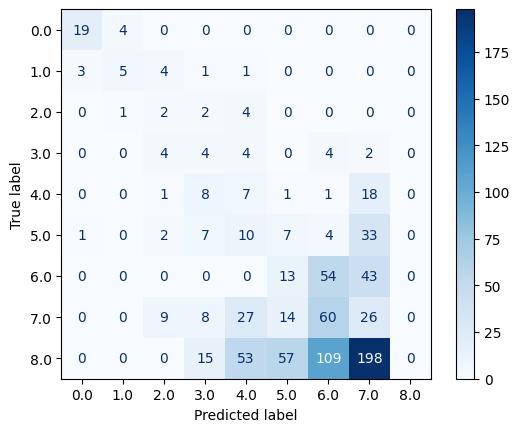

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83        23
         1.0       0.50      0.36      0.42        14
         2.0       0.09      0.22      0.13         9
         3.0       0.09      0.22      0.13        18
         4.0       0.07      0.19      0.10        36
         5.0       0.08      0.11      0.09        64
         6.0       0.23      0.49      0.32       110
         7.0       0.08      0.18      0.11       144
         8.0       0.00      0.00      0.00       432

    accuracy                           0.15       850
   macro avg       0.22      0.29      0.23       850
weighted avg       0.09      0.15      0.10       850

[ 0  1  2  3  4  5  6  7  8 10 11]
[9]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

Epoch 1/50
545/545 [==============================] - ETA: 0s - loss: 1.7511 - sparse_categorical_accuracy: 0.2326
Epoch 1: val_loss improved from inf to 1.77605, saving model to CustomModel_Hyb.weights.hdf5
545/545 [==============================] - 191s 346ms/step - loss: 1.7511 - sparse_categorical_accuracy: 0.2326 - val_loss: 1.7760 - val_sparse_categorical_accuracy: 0.2764 - lr: 0.0010
Epoch 2/50


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


545/545 [==============================] - ETA: 0s - loss: 1.5779 - sparse_categorical_accuracy: 0.2573
Epoch 2: val_loss did not improve from 1.77605
545/545 [==============================] - 188s 344ms/step - loss: 1.5779 - sparse_categorical_accuracy: 0.2573 - val_loss: 1.8484 - val_sparse_categorical_accuracy: 0.1836 - lr: 0.0010
Epoch 3/50
545/545 [==============================] - ETA: 0s - loss: 1.5761 - sparse_categorical_accuracy: 0.2467
Epoch 3: val_loss improved from 1.77605 to 1.65050, saving model to CustomModel_Hyb.weights.hdf5
545/545 [==============================] - 187s 342ms/step - loss: 1.5761 - sparse_categorical_accuracy: 0.2467 - val_loss: 1.6505 - val_sparse_categorical_accuracy: 0.2230 - lr: 0.0010
Epoch 4/50
545/545 [==============================] - ETA: 0s - loss: 1.5171 - sparse_categorical_accuracy: 0.2596
Epoch 4: val_loss did not improve from 1.65050
545/545 [==============================] - 187s 343ms/step - loss: 1.5171 - sparse_categorical_accuracy

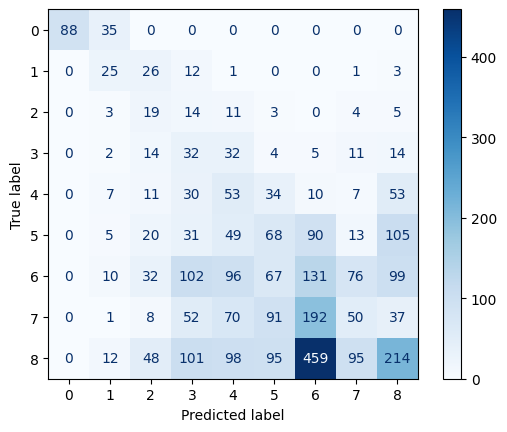

              precision    recall  f1-score   support

           0       1.00      0.72      0.83       123
           1       0.25      0.37      0.30        68
           2       0.11      0.32      0.16        59
           3       0.09      0.28      0.13       114
           4       0.13      0.26      0.17       205
           5       0.19      0.18      0.18       381
           6       0.15      0.21      0.17       613
           7       0.19      0.10      0.13       501
           8       0.40      0.19      0.26      1122

    accuracy                           0.21      3186
   macro avg       0.28      0.29      0.26      3186
weighted avg       0.28      0.21      0.22      3186

Epoch 1/100
111/112 [============================>.] - ETA: 0s - loss: 1.6584 - sparse_categorical_accuracy: 0.1864
Epoch 1: val_loss improved from inf to 2.22145, saving model to CustomModel_indi_Hyb.weights.hdf5
112/112 [==============================] - 9s 61ms/step - loss: 1.6536 - sparse_c

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


111/112 [============================>.] - ETA: 0s - loss: 1.6492 - sparse_categorical_accuracy: 0.2010
Epoch 2: val_loss did not improve from 2.22145
112/112 [==============================] - 6s 56ms/step - loss: 1.6466 - sparse_categorical_accuracy: 0.2007 - val_loss: 2.2521 - val_sparse_categorical_accuracy: 0.1794 - lr: 1.6000e-06
Epoch 3/100
111/112 [============================>.] - ETA: 0s - loss: 1.6398 - sparse_categorical_accuracy: 0.2140
Epoch 3: val_loss did not improve from 2.22145
112/112 [==============================] - 6s 57ms/step - loss: 1.6446 - sparse_categorical_accuracy: 0.2147 - val_loss: 2.2613 - val_sparse_categorical_accuracy: 0.1816 - lr: 1.6000e-06
Epoch 4/100
111/112 [============================>.] - ETA: 0s - loss: 1.5099 - sparse_categorical_accuracy: 0.2275
Epoch 4: val_loss did not improve from 2.22145

Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-06.
112/112 [==============================] - 6s 57ms/step - loss: 1.5102 - sparse_categori

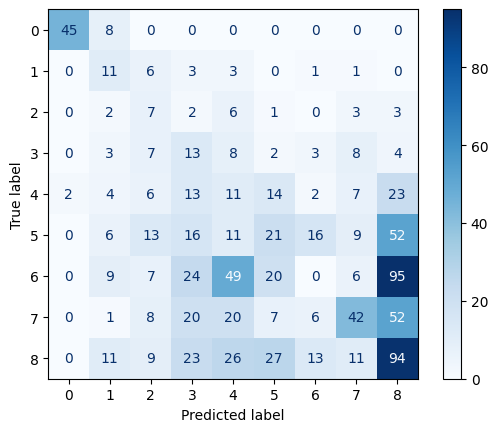

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        53
           1       0.20      0.44      0.28        25
           2       0.11      0.29      0.16        24
           3       0.11      0.27      0.16        48
           4       0.08      0.13      0.10        82
           5       0.23      0.15      0.18       144
           6       0.00      0.00      0.00       210
           7       0.48      0.27      0.35       156
           8       0.29      0.44      0.35       214

    accuracy                           0.26       956
   macro avg       0.27      0.32      0.27       956
weighted avg       0.25      0.26      0.24       956

[ 0  1  2  3  4  5  6  7  8  9 11]
[10]
Epoch 1/50
502/502 [==============================] - ETA: 0s - loss: 1.7701 - sparse_categorical_accuracy: 0.2411
Epoch 1: val_loss improved from inf to 2.08020, saving model to CustomModel_Hyb.weights.hdf5
502/502 [==============================] - 176s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


502/502 [==============================] - ETA: 0s - loss: 1.5797 - sparse_categorical_accuracy: 0.2560
Epoch 2: val_loss did not improve from 2.08020
502/502 [==============================] - 173s 345ms/step - loss: 1.5797 - sparse_categorical_accuracy: 0.2560 - val_loss: 2.1504 - val_sparse_categorical_accuracy: 0.1773 - lr: 0.0010
Epoch 3/50
502/502 [==============================] - ETA: 0s - loss: 1.5493 - sparse_categorical_accuracy: 0.2566
Epoch 3: val_loss improved from 2.08020 to 1.81298, saving model to CustomModel_Hyb.weights.hdf5
502/502 [==============================] - 173s 344ms/step - loss: 1.5493 - sparse_categorical_accuracy: 0.2566 - val_loss: 1.8130 - val_sparse_categorical_accuracy: 0.2083 - lr: 0.0010
Epoch 4/50
502/502 [==============================] - ETA: 0s - loss: 1.5088 - sparse_categorical_accuracy: 0.2568
Epoch 4: val_loss improved from 1.81298 to 1.70121, saving model to CustomModel_Hyb.weights.hdf5
502/502 [==============================] - 172s 343ms

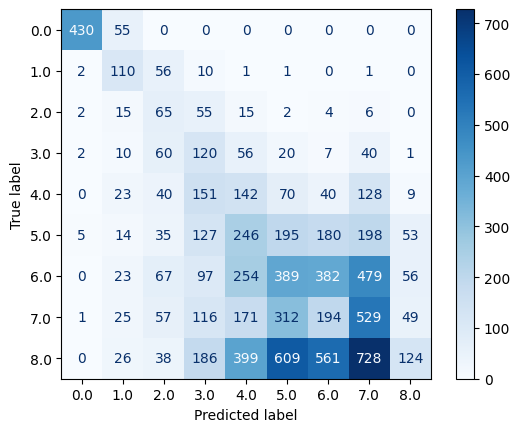

              precision    recall  f1-score   support

         0.0       0.97      0.89      0.93       485
         1.0       0.37      0.61      0.46       181
         2.0       0.16      0.40      0.22       164
         3.0       0.14      0.38      0.20       316
         4.0       0.11      0.24      0.15       603
         5.0       0.12      0.19      0.15      1053
         6.0       0.28      0.22      0.25      1747
         7.0       0.25      0.36      0.30      1454
         8.0       0.42      0.05      0.08      2671

    accuracy                           0.24      8674
   macro avg       0.31      0.37      0.30      8674
weighted avg       0.32      0.24      0.23      8674

Epoch 1/100
303/304 [============================>.] - ETA: 0s - loss: 1.7843 - sparse_categorical_accuracy: 0.2129
Epoch 1: val_loss improved from inf to 1.64389, saving model to CustomModel_indi_Hyb.weights.hdf5
304/304 [==============================] - 17s 57ms/step - loss: 1.7832 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


303/304 [============================>.] - ETA: 0s - loss: 1.7860 - sparse_categorical_accuracy: 0.2057
Epoch 2: val_loss improved from 1.64389 to 1.64189, saving model to CustomModel_indi_Hyb.weights.hdf5
304/304 [==============================] - 17s 56ms/step - loss: 1.7858 - sparse_categorical_accuracy: 0.2057 - val_loss: 1.6419 - val_sparse_categorical_accuracy: 0.2148 - lr: 1.6000e-06
Epoch 3/100
303/304 [============================>.] - ETA: 0s - loss: 1.7572 - sparse_categorical_accuracy: 0.2145
Epoch 3: val_loss improved from 1.64189 to 1.63970, saving model to CustomModel_indi_Hyb.weights.hdf5
304/304 [==============================] - 17s 56ms/step - loss: 1.7570 - sparse_categorical_accuracy: 0.2144 - val_loss: 1.6397 - val_sparse_categorical_accuracy: 0.2173 - lr: 1.6000e-06
Epoch 4/100
303/304 [============================>.] - ETA: 0s - loss: 1.7233 - sparse_categorical_accuracy: 0.2145
Epoch 4: val_loss improved from 1.63970 to 1.63471, saving model to CustomModel_indi

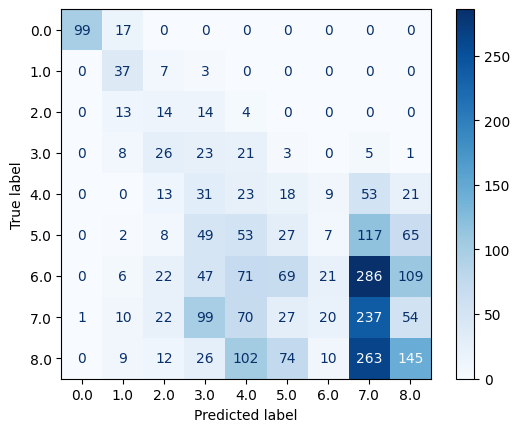

              precision    recall  f1-score   support

         0.0       0.99      0.85      0.92       116
         1.0       0.36      0.79      0.50        47
         2.0       0.11      0.31      0.17        45
         3.0       0.08      0.26      0.12        87
         4.0       0.07      0.14      0.09       168
         5.0       0.12      0.08      0.10       328
         6.0       0.31      0.03      0.06       631
         7.0       0.25      0.44      0.32       540
         8.0       0.37      0.23      0.28       641

    accuracy                           0.24      2603
   macro avg       0.30      0.35      0.28      2603
weighted avg       0.29      0.24      0.22      2603

[ 0  1  2  3  4  5  6  7  8  9 10]
[11]
Epoch 1/50
522/522 [==============================] - ETA: 0s - loss: 1.7622 - sparse_categorical_accuracy: 0.2419
Epoch 1: val_loss improved from inf to 2.30947, saving model to CustomModel_Hyb.weights.hdf5
522/522 [==============================] - 182s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


522/522 [==============================] - ETA: 0s - loss: 1.5919 - sparse_categorical_accuracy: 0.2661
Epoch 2: val_loss improved from 2.30947 to 1.87502, saving model to CustomModel_Hyb.weights.hdf5
522/522 [==============================] - 179s 343ms/step - loss: 1.5919 - sparse_categorical_accuracy: 0.2661 - val_loss: 1.8750 - val_sparse_categorical_accuracy: 0.2330 - lr: 0.0010
Epoch 3/50
522/522 [==============================] - ETA: 0s - loss: 1.5547 - sparse_categorical_accuracy: 0.2591
Epoch 3: val_loss improved from 1.87502 to 1.68851, saving model to CustomModel_Hyb.weights.hdf5
522/522 [==============================] - 179s 343ms/step - loss: 1.5547 - sparse_categorical_accuracy: 0.2591 - val_loss: 1.6885 - val_sparse_categorical_accuracy: 0.2323 - lr: 0.0010
Epoch 4/50
522/522 [==============================] - ETA: 0s - loss: 1.5259 - sparse_categorical_accuracy: 0.2716
Epoch 4: val_loss did not improve from 1.68851
522/522 [==============================] - 179s 343ms

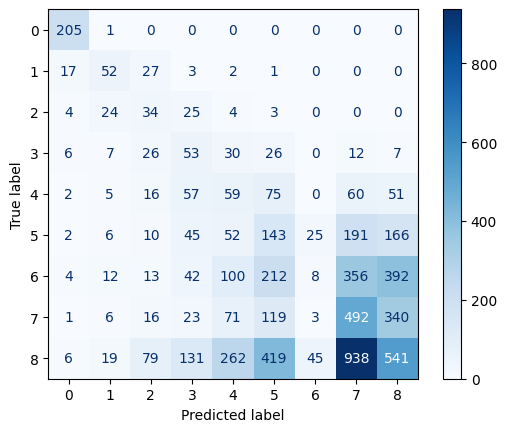

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       206
           1       0.39      0.51      0.44       102
           2       0.15      0.36      0.22        94
           3       0.14      0.32      0.19       167
           4       0.10      0.18      0.13       325
           5       0.14      0.22      0.17       640
           6       0.10      0.01      0.01      1139
           7       0.24      0.46      0.32      1071
           8       0.36      0.22      0.27      2440

    accuracy                           0.26      6184
   macro avg       0.27      0.36      0.30      6184
weighted avg       0.26      0.26      0.24      6184

Epoch 1/100
216/217 [============================>.] - ETA: 0s - loss: 1.7293 - sparse_categorical_accuracy: 0.2358
Epoch 1: val_loss improved from inf to 1.75567, saving model to CustomModel_indi_Hyb.weights.hdf5
217/217 [==============================] - 15s 58ms/step - loss: 1.7283 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


216/217 [============================>.] - ETA: 0s - loss: 1.5744 - sparse_categorical_accuracy: 0.2167
Epoch 2: val_loss did not improve from 1.75567
217/217 [==============================] - 12s 55ms/step - loss: 1.5730 - sparse_categorical_accuracy: 0.2166 - val_loss: 1.7928 - val_sparse_categorical_accuracy: 0.1697 - lr: 8.0000e-06
Epoch 3/100
216/217 [============================>.] - ETA: 0s - loss: 1.5408 - sparse_categorical_accuracy: 0.2054
Epoch 3: val_loss did not improve from 1.75567
217/217 [==============================] - 12s 55ms/step - loss: 1.5410 - sparse_categorical_accuracy: 0.2057 - val_loss: 1.7815 - val_sparse_categorical_accuracy: 0.1755 - lr: 8.0000e-06
Epoch 4/100
216/217 [============================>.] - ETA: 0s - loss: 1.4931 - sparse_categorical_accuracy: 0.2185
Epoch 4: val_loss did not improve from 1.75567

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
217/217 [==============================] - 12s 56ms/step - loss: 1.49

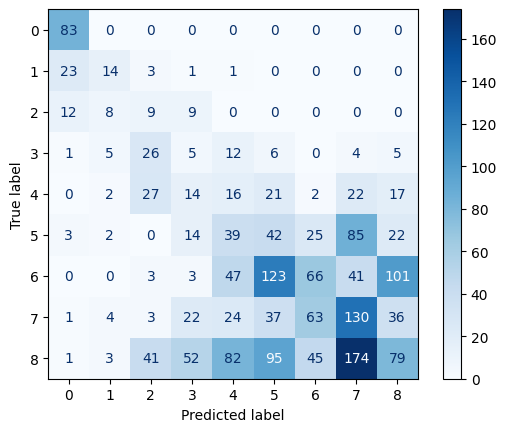

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        83
           1       0.37      0.33      0.35        42
           2       0.08      0.24      0.12        38
           3       0.04      0.08      0.05        64
           4       0.07      0.13      0.09       121
           5       0.13      0.18      0.15       232
           6       0.33      0.17      0.23       384
           7       0.29      0.41      0.34       320
           8       0.30      0.14      0.19       572

    accuracy                           0.24      1856
   macro avg       0.25      0.30      0.26      1856
weighted avg       0.27      0.24      0.24      1856


Mean accuracy of population: 0.2764, Standard deviation of population: 0.0680


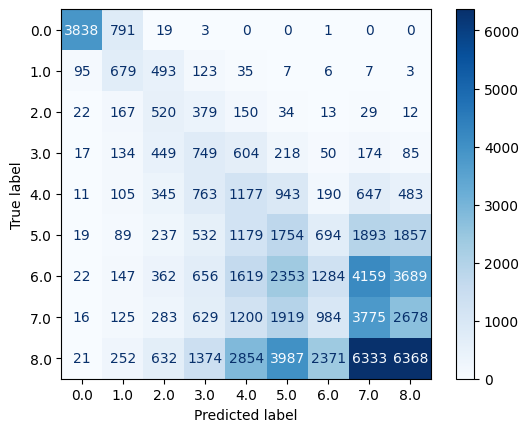

              precision    recall  f1-score   support

         0.0       0.95      0.83      0.88      4652
         1.0       0.27      0.47      0.34      1448
         2.0       0.16      0.39      0.22      1326
         3.0       0.14      0.30      0.19      2480
         4.0       0.13      0.25      0.17      4664
         5.0       0.16      0.21      0.18      8254
         6.0       0.23      0.09      0.13     14291
         7.0       0.22      0.33      0.26     11609
         8.0       0.42      0.26      0.32     24192

    accuracy                           0.28     72916
   macro avg       0.30      0.35      0.30     72916
weighted avg       0.32      0.28      0.28     72916


Mean accuracy of individuum: 0.2500, Standard deviation of individuum: 0.0461


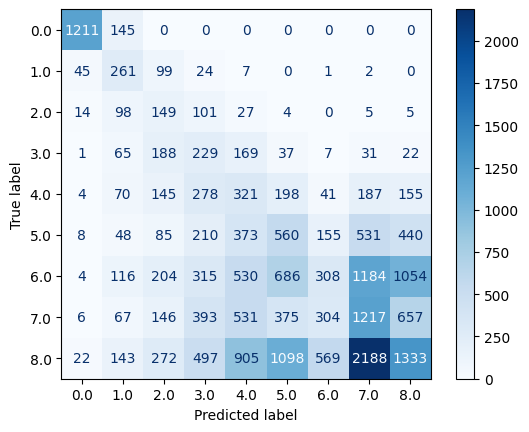

              precision    recall  f1-score   support

         0.0       0.92      0.89      0.91      1356
         1.0       0.26      0.59      0.36       439
         2.0       0.12      0.37      0.18       403
         3.0       0.11      0.31      0.16       749
         4.0       0.11      0.23      0.15      1399
         5.0       0.19      0.23      0.21      2410
         6.0       0.22      0.07      0.11      4401
         7.0       0.23      0.33      0.27      3696
         8.0       0.36      0.19      0.25      7027

    accuracy                           0.26     21880
   macro avg       0.28      0.36      0.29     21880
weighted avg       0.30      0.26      0.25     21880



In [43]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


def resnet_block(inputs, filters, kernel_size, strides):
    x = Conv1D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(filters=filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    shortcut = Conv1D(filters=filters, kernel_size=1, padding='same')(inputs)
    shortcut = BatchNormalization()(shortcut)

    output = Add()([x, shortcut])
    output = Activation('relu')(output)
    
    return x



def ResNetLSTM_Model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial Convolutional layer
    x = Conv1D(filters=64, kernel_size=9, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Residual blocks
    x = resnet_block(x, filters=64, kernel_size=7, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=64, kernel_size=5, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=64, kernel_size=3, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)

    x = tf.keras.layers.AveragePooling1D(pool_size = 2)(x)


    x = (tf.keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True, activation="tanh"))(x)
    x = (tf.keras.layers.LSTM(64, return_sequences=True, activation="tanh"))(x)
    x = (tf.keras.layers.LSTM(32, return_sequences=True, activation="tanh"))(x)

    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)

    # Output layer
    x = Dense(100, activation='relu')(x)
    outputs = Dense(units=num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile Model for each iteration
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

    
    return model
    




# we need 12 folds as we have 12 patients 
num_folds = 12
# we do not split them randomly so that the data of each subject remains 
kfolds = KFold(n_splits=num_folds, shuffle=False)

# empty list for accuarcy and variables of each fold which are stored
accuracies_CV_All = []
actual_labels_CV_All = []
predicted_labels_CV_All = []


accuracies_CV_indi = []
actual_labels_CV_indi = []
predicted_labels_CV_indi = []
count = 0

# itertate over each fold
for train_idx, test_idx in kfolds.split(X):
    # Split the dataset into training and validation sets for the current fold
    print(train_idx)
    print(test_idx)

    # train fold
    X_train_fold = [X[i] for i in train_idx]
    y_train_fold = [Y[i] for i in train_idx]

    # validation fold
    X_val_fold = [X_val[i] for i in train_idx]
    y_val_fold = [Y_val[i] for i in train_idx]

    # test fold
    X_test_fold = np.array([X[i] for i in test_idx])
    X_test_fold = X_test_fold.reshape(-1,72,4)

    y_test_fold = np.array([Y[i] for i in test_idx])
    y_test_fold = y_test_fold.reshape(-1,1)


    X_train_fold = np.vstack(X_train_fold)
    y_train_fold = np.vstack(y_train_fold)

    X_val_fold = np.vstack(X_val_fold)
    y_val_fold = np.vstack(y_val_fold)

    
    
    # splitting training data into training and validation for optimizing the learning rate
    # during training and early stopping
    
    X_train_fold, y_train_fold = shuffle(X_train_fold, y_train_fold)
    X_val_fold, y_val_fold = shuffle(X_val_fold, y_val_fold)

    X_train_indiv, X_test_indi,  y_train_indiv, y_test_indi = train_test_split(
    X_test_fold , y_test_fold , test_size=0.30, shuffle = False)

    X_train_indi, X_val_indi,  y_train_indi, y_val_indi = train_test_split(
    X_train_indiv , y_train_indiv, test_size=0.20, shuffle = False)

    
    # labels for the whole test data 
    actual_labels_CV_All = np.append(actual_labels_CV_All, y_test_fold)
    # labels for the individusal trained model which have less test data
    actual_labels_CV_indi = np.append(actual_labels_CV_indi, y_test_indi)

    # estimating distribution of classes
    labels_df = pd.DataFrame(y_train_fold, columns = ['label'])
    class_occurences = np.bincount(labels_df['label'])
    total = class_occurences.sum()
    number_classes = len(class_occurences)

    # assigning weights for classes, weight for last class stays 1, since its occurance is the highest
    weight_for_0 = (1/class_occurences[0]) * (total/number_classes)
    weight_for_1 = (1/class_occurences[1]) * (total/number_classes)
    weight_for_2 = (1/class_occurences[2]) * (total/number_classes)
    weight_for_3 = (1/class_occurences[3]) * (total/number_classes)
    weight_for_4 = (1/class_occurences[4]) * (total/number_classes)
    weight_for_5= (1/class_occurences[5]) * (total/number_classes)
    weight_for_6 = (1/class_occurences[6]) * (total/number_classes)
    weight_for_7 = (1/class_occurences[7]) * (total/number_classes)
    weight_for_8 = (1/class_occurences[8]) * (total/number_classes)


    class_weights = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4, 5: weight_for_5, 6: weight_for_6,  
                     7: weight_for_7,  8: weight_for_8,  9: 0, 10:0}

    
    # Create a new model for each fold
    model_CV_D = ResNetLSTM_Model((X_train_fold.shape[1], X_train_fold.shape[2]), 9)

    # Define the early stopping callback
    early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min', verbose=1, restore_best_weights=True)
    early_stopping_indi = EarlyStopping(patience=20, monitor='val_loss', mode='min', verbose=1, restore_best_weights=True)

    # initialize callbacks 
    reduceLR =ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 
    reduceLR_indi =ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 

    checkpoint = ModelCheckpoint('CustomModel_Hyb.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 
    checkpoint_indi = ModelCheckpoint('CustomModel_indi_Hyb.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 

    callbacks= [early_stopping, checkpoint, reduceLR]
    callbacks_indi= [early_stopping_indi, checkpoint_indi, reduceLR_indi]
    

    # Train the model on the current fold
    model_CV_D.fit(X_train_fold, y_train_fold,
    validation_data=(X_val_fold, y_val_fold),
    epochs=50,
    batch_size=128,
    callbacks=callbacks,
    class_weight = class_weights
    )

    name = "Models/Hybrid_Population_%i.hdf5" % (count)
    model_CV_D.save(name)
    
    # Evaluate the model on the validation set
    y_pred_All = model_CV_D.predict(X_test_fold)
    y_pred_CV_All = np.argmax(y_pred_All, axis=1)
    accuracy_CV_All = accuracy_score(y_test_fold, y_pred_CV_All)
    accuracies_CV_All.append(accuracy_CV_All)

    ConfusionMatrixDisplay.from_predictions(y_test_fold, y_pred_CV_All, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/Hybrid_Population_%i.png" % (count)
    plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_fold, y_pred_CV_All))

    predicted_labels_CV_All = np.append(predicted_labels_CV_All, y_pred_CV_All)

    


    # SECOND PART TRAIN THE MODEL FURTHER WITH 60% OF THE NEW PATIENT
    # Train the model on the current fold
    
    # estimating distribution of classes
    labels_df_indi = pd.DataFrame(y_train_indi, columns = ['label'])
    class_occurences_indi = np.bincount(labels_df_indi['label'])
    total_indi = class_occurences_indi.sum()
    number_classes_indi = len(class_occurences_indi)

    # assigning weights for classes, weight for last class stays 1, since its occurance is the highest
    weight_for_0_indi = (1/class_occurences_indi[0]) * (total_indi/number_classes_indi)
    weight_for_1_indi = (1/class_occurences_indi[1]) * (total_indi/number_classes_indi)
    weight_for_2_indi = (1/class_occurences_indi[2]) * (total_indi/number_classes_indi)
    weight_for_3_indi = (1/class_occurences_indi[3]) * (total_indi/number_classes_indi)
    weight_for_4_indi = (1/class_occurences_indi[4]) * (total_indi/number_classes_indi)
    weight_for_5_indi = (1/class_occurences_indi[5]) * (total_indi/number_classes_indi)
    weight_for_6_indi = (1/class_occurences_indi[6]) * (total_indi/number_classes_indi)
    weight_for_7_indi = (1/class_occurences_indi[7]) * (total_indi/number_classes_indi)
    weight_for_8_indi = (1/class_occurences_indi[8]) * (total_indi/number_classes_indi)


    class_weights_indi = {0: weight_for_0_indi, 1: weight_for_1_indi, 2: weight_for_2_indi, 3: weight_for_3_indi, 4: weight_for_4_indi, 
                     5: weight_for_5_indi, 6: weight_for_6_indi, 7: weight_for_7_indi,  8: weight_for_8_indi,  9: 0, 10:0}

    
    model_CV_D.fit(X_train_indi, y_train_indi,
    validation_data=(X_val_indi, y_val_indi),
    epochs=100,
    batch_size=16,
    callbacks=callbacks_indi,
    class_weight = class_weights_indi
    )

    name = "Models/Hybrid_Indi_%i.hdf5" % (count)
    model_CV_D.save(name)

    # Evaluate the model on the validation set
    y_pred_indi = model_CV_D.predict(X_test_indi)
    y_pred_CV_indi = np.argmax(y_pred_indi, axis=1)
    accuracy_CV_indi = accuracy_score(y_test_indi, y_pred_CV_indi)
    accuracies_CV_indi.append(accuracy_CV_indi)

    ConfusionMatrixDisplay.from_predictions(y_test_indi, y_pred_CV_indi, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/Hybrid_Indi_%i.png" % (count)
    plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_indi, y_pred_CV_indi))


    predicted_labels_CV_indi = np.append(predicted_labels_CV_indi, y_pred_CV_indi)

    
    count = count+1



# POPULATION
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_All = np.mean(accuracies_CV_All)
std_accuracy_CV_All = np.std(accuracies_CV_All)
# Evalaute Model and print Confusion Matrix
print(f"\nMean accuracy of population: {mean_accuracy_CV_All:.4f}, Standard deviation of population: {std_accuracy_CV_All:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_All, predicted_labels_CV_All, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/Hybrid_Population_All.png" 
plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_All, predicted_labels_CV_All))


# INDIVIDUUM

# Evalaute Model and print Confusion Matrix
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_indi = np.mean(accuracies_CV_indi)
std_accuracy_CV_indi = np.std(accuracies_CV_indi)
print(f"\nMean accuracy of individuum: {mean_accuracy_CV_indi:.4f}, Standard deviation of individuum: {std_accuracy_CV_indi:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_indi, predicted_labels_CV_indi, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/Hybrid_Indi_All.png" 
plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_indi, predicted_labels_CV_indi))

## LSTM Model

In [44]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

X, Y = [], []
X_val, Y_val = [], [] 
subject_IDs = ['540', '544', '552',  '559', '563', '567', '570', '575', '584', '588', '591','596']
path = 'GAPS_DATA/TRAIN/'

## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
for subject_ID in subject_IDs:
    frames  = []
    X_subject, y_subject = [], []
# store all paths of csv files in one folder
    csv_files = glob.glob(path + subject_ID + "/*.csv")

# create list of the csv files
    for file in csv_files:
        df = pd.read_csv(file)
        frames.append(df)
        df = pd.read_csv(file)
        df['glucose'] = df['glucose'].astype(int)
        Xdata, Ydata = create_dataset(df[['glucose', 'basal', 'bolus', 'macc']], df['Class'], time_steps=96, step=1)
        Xdata = Xdata.reshape(-1, 96, 4)
        Ydata = Ydata.reshape(-1, 1)
        X_subject.append(Xdata)
        y_subject.append(Ydata)
    X_subject = np.vstack(X_subject)
    y_subject = np.vstack(y_subject)
    labels_dftest1 = pd.DataFrame(y_subject, columns = ['label'])
    class_occurencestest1 = np.bincount(labels_dftest1['label'])
    print(class_occurencestest1)

    X_s_train,  X_s_val, y_s_train, y_s_val = train_test_split(X_subject , y_subject, test_size=0.20, shuffle = False)
    X.append(X_s_train)
    Y.append(y_s_train)

    X_val.append(X_s_val)
    Y_val.append(y_s_val)



[ 894  291  277  523  933 1521 2418 1640 3086]
[ 184   78   69  110  192  398  842  861 2073]
[ 418  130  125  237  466  908 1520 1176 2154]
[ 441  152  138  268  522 1037 1950 1589 3066]
[ 327  124  118  217  415  685 1283 1114 2577]
[ 932  137  120  226  429  830 1495 1242 2698]
[ 227   87   77  135  238  396  720  686 1804]
[1158  261  236  437  834 1488 2534 1777 3140]
[ 130   70   64  126  236  404  589  528 1370]
[ 138   77   68  132  238  432  757  645 1448]
too short
[ 600  214  197  382  731 1263 2110 1807 3419]
too short
[ 259  136  122  218  425  788 1412 1273 2850]


[ 1  2  3  4  5  6  7  8  9 10 11]
[0]
Epoch 1/50
975/975 [==============================] - ETA: 0s - loss: 1.6116 - sparse_categorical_accuracy: 0.2454
Epoch 1: val_loss improved from inf to 1.71173, saving model to CustomModel_LSTM.weights.hdf5
975/975 [==============================] - 117s 119ms/step - loss: 1.6116 - sparse_categorical_accuracy: 0.2454 - val_loss: 1.7117 - val_sparse_categorical_accuracy: 0.2092 - lr: 0.0010
Epoch 2/50
  1/975 [..............................] - ETA: 1:41 - loss: 1.3668 - sparse_categorical_accuracy: 0.2500

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


975/975 [==============================] - ETA: 0s - loss: 1.4926 - sparse_categorical_accuracy: 0.2703
Epoch 2: val_loss did not improve from 1.71173
975/975 [==============================] - 115s 118ms/step - loss: 1.4926 - sparse_categorical_accuracy: 0.2703 - val_loss: 1.7288 - val_sparse_categorical_accuracy: 0.2672 - lr: 0.0010
Epoch 3/50
975/975 [==============================] - ETA: 0s - loss: 1.4635 - sparse_categorical_accuracy: 0.2773
Epoch 3: val_loss improved from 1.71173 to 1.66338, saving model to CustomModel_LSTM.weights.hdf5
975/975 [==============================] - 115s 118ms/step - loss: 1.4635 - sparse_categorical_accuracy: 0.2773 - val_loss: 1.6634 - val_sparse_categorical_accuracy: 0.2519 - lr: 0.0010
Epoch 4/50
975/975 [==============================] - ETA: 0s - loss: 1.4393 - sparse_categorical_accuracy: 0.2813
Epoch 4: val_loss improved from 1.66338 to 1.64504, saving model to CustomModel_LSTM.weights.hdf5
975/975 [==============================] - 114s 117

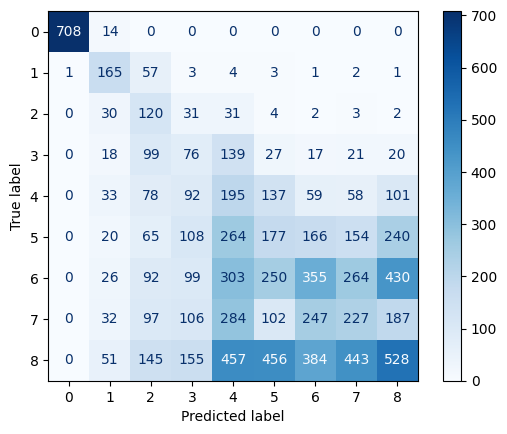

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       722
           1       0.42      0.70      0.53       237
           2       0.16      0.54      0.25       223
           3       0.11      0.18      0.14       417
           4       0.12      0.26      0.16       753
           5       0.15      0.15      0.15      1194
           6       0.29      0.20      0.23      1819
           7       0.19      0.18      0.19      1282
           8       0.35      0.20      0.26      2619

    accuracy                           0.28      9266
   macro avg       0.31      0.38      0.32      9266
weighted avg       0.31      0.28      0.28      9266

Epoch 1/100
325/325 [==============================] - ETA: 0s - loss: 1.5771 - sparse_categorical_accuracy: 0.2575
Epoch 1: val_loss improved from inf to 1.65071, saving model to CustomModel_indi_LSTM.weights.hdf5
325/325 [==============================] - 19s 56ms/step - loss: 1.5771 - sparse

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


324/325 [============================>.] - ETA: 0s - loss: 1.5528 - sparse_categorical_accuracy: 0.2616
Epoch 2: val_loss improved from 1.65071 to 1.64797, saving model to CustomModel_indi_LSTM.weights.hdf5
325/325 [==============================] - 17s 53ms/step - loss: 1.5522 - sparse_categorical_accuracy: 0.2618 - val_loss: 1.6480 - val_sparse_categorical_accuracy: 0.3074 - lr: 1.6000e-06
Epoch 3/100
324/325 [============================>.] - ETA: 0s - loss: 1.5339 - sparse_categorical_accuracy: 0.2631
Epoch 3: val_loss improved from 1.64797 to 1.64518, saving model to CustomModel_indi_LSTM.weights.hdf5
325/325 [==============================] - 17s 54ms/step - loss: 1.5334 - sparse_categorical_accuracy: 0.2631 - val_loss: 1.6452 - val_sparse_categorical_accuracy: 0.3035 - lr: 1.6000e-06
Epoch 4/100
325/325 [==============================] - ETA: 0s - loss: 1.5181 - sparse_categorical_accuracy: 0.2637
Epoch 4: val_loss improved from 1.64518 to 1.64228, saving model to CustomModel_in

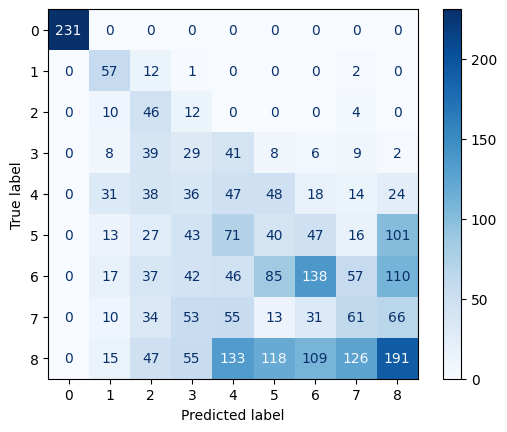

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       0.35      0.79      0.49        72
           2       0.16      0.64      0.26        72
           3       0.11      0.20      0.14       142
           4       0.12      0.18      0.14       256
           5       0.13      0.11      0.12       358
           6       0.40      0.26      0.31       532
           7       0.21      0.19      0.20       323
           8       0.39      0.24      0.30       794

    accuracy                           0.30      2780
   macro avg       0.32      0.40      0.33      2780
weighted avg       0.34      0.30      0.31      2780

[ 0  2  3  4  5  6  7  8  9 10 11]
[1]
Epoch 1/50
1060/1060 [==============================] - ETA: 0s - loss: 1.6130 - sparse_categorical_accuracy: 0.2497
Epoch 1: val_loss improved from inf to 1.58244, saving model to CustomModel_LSTM.weights.hdf5
1060/1060 [==============================] - 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1060/1060 [==============================] - ETA: 0s - loss: 1.4946 - sparse_categorical_accuracy: 0.2812
Epoch 2: val_loss did not improve from 1.58244
1060/1060 [==============================] - 124s 117ms/step - loss: 1.4946 - sparse_categorical_accuracy: 0.2812 - val_loss: 1.6393 - val_sparse_categorical_accuracy: 0.3295 - lr: 0.0010
Epoch 3/50
1060/1060 [==============================] - ETA: 0s - loss: 1.4540 - sparse_categorical_accuracy: 0.2917
Epoch 3: val_loss did not improve from 1.58244
1060/1060 [==============================] - 124s 117ms/step - loss: 1.4540 - sparse_categorical_accuracy: 0.2917 - val_loss: 1.7326 - val_sparse_categorical_accuracy: 0.2934 - lr: 0.0010
Epoch 4/50
1060/1060 [==============================] - ETA: 0s - loss: 1.4391 - sparse_categorical_accuracy: 0.2996
Epoch 4: val_loss did not improve from 1.58244

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1060/1060 [==============================] - 124s 117ms/step - lo

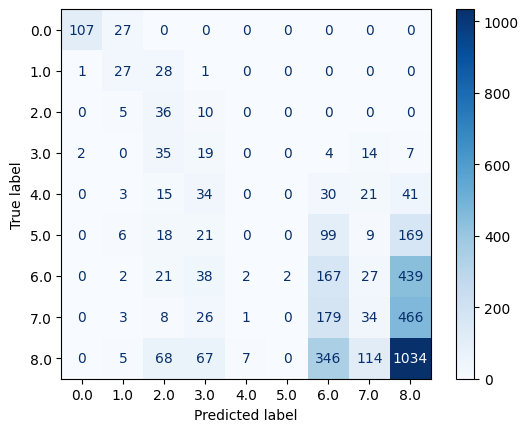

              precision    recall  f1-score   support

         0.0       0.97      0.80      0.88       134
         1.0       0.35      0.47      0.40        57
         2.0       0.16      0.71      0.26        51
         3.0       0.09      0.23      0.13        81
         4.0       0.00      0.00      0.00       144
         5.0       0.00      0.00      0.00       322
         6.0       0.20      0.24      0.22       698
         7.0       0.16      0.05      0.07       717
         8.0       0.48      0.63      0.54      1641

    accuracy                           0.37      3845
   macro avg       0.27      0.35      0.28      3845
weighted avg       0.31      0.37      0.33      3845

Epoch 1/100
135/135 [==============================] - ETA: 0s - loss: 1.4949 - sparse_categorical_accuracy: 0.3453
Epoch 1: val_loss improved from inf to 1.56623, saving model to CustomModel_indi_LSTM.weights.hdf5
135/135 [==============================] - 7s 52ms/step - loss: 1.4949 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


134/135 [============================>.] - ETA: 0s - loss: 1.4649 - sparse_categorical_accuracy: 0.3134
Epoch 2: val_loss did not improve from 1.56623
135/135 [==============================] - 7s 52ms/step - loss: 1.4682 - sparse_categorical_accuracy: 0.3132 - val_loss: 1.5683 - val_sparse_categorical_accuracy: 0.3451 - lr: 8.0000e-06
Epoch 3/100
135/135 [==============================] - ETA: 0s - loss: 1.4602 - sparse_categorical_accuracy: 0.2788
Epoch 3: val_loss did not improve from 1.56623
135/135 [==============================] - 7s 51ms/step - loss: 1.4602 - sparse_categorical_accuracy: 0.2788 - val_loss: 1.5687 - val_sparse_categorical_accuracy: 0.3599 - lr: 8.0000e-06
Epoch 4/100
134/135 [============================>.] - ETA: 0s - loss: 1.4558 - sparse_categorical_accuracy: 0.2663
Epoch 4: val_loss did not improve from 1.56623

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
135/135 [==============================] - 7s 52ms/step - loss: 1.4545 

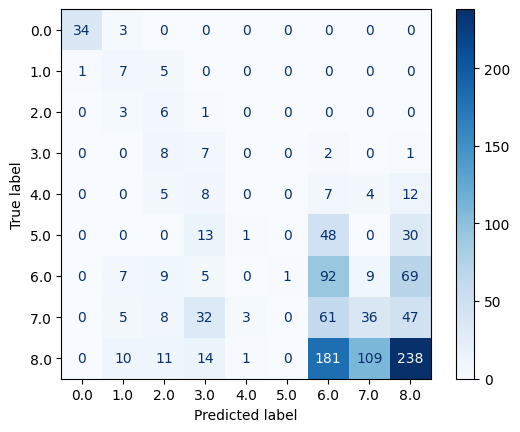

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94        37
         1.0       0.20      0.54      0.29        13
         2.0       0.12      0.60      0.19        10
         3.0       0.09      0.39      0.14        18
         4.0       0.00      0.00      0.00        36
         5.0       0.00      0.00      0.00        92
         6.0       0.24      0.48      0.32       192
         7.0       0.23      0.19      0.21       192
         8.0       0.60      0.42      0.50       564

    accuracy                           0.36      1154
   macro avg       0.27      0.39      0.29      1154
weighted avg       0.41      0.36      0.37      1154

[ 0  1  3  4  5  6  7  8  9 10 11]
[2]
Epoch 1/50
1030/1031 [============================>.] - ETA: 0s - loss: 1.5993 - sparse_categorical_accuracy: 0.2442
Epoch 1: val_loss improved from inf to 1.70877, saving model to CustomModel_LSTM.weights.hdf5
1031/1031 [==============================] - 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1030/1031 [============================>.] - ETA: 0s - loss: 1.4880 - sparse_categorical_accuracy: 0.2827
Epoch 2: val_loss improved from 1.70877 to 1.70494, saving model to CustomModel_LSTM.weights.hdf5
1031/1031 [==============================] - 127s 123ms/step - loss: 1.4880 - sparse_categorical_accuracy: 0.2827 - val_loss: 1.7049 - val_sparse_categorical_accuracy: 0.2344 - lr: 0.0010
Epoch 3/50
1030/1031 [============================>.] - ETA: 0s - loss: 1.4589 - sparse_categorical_accuracy: 0.2888
Epoch 3: val_loss improved from 1.70494 to 1.67834, saving model to CustomModel_LSTM.weights.hdf5
1031/1031 [==============================] - 127s 123ms/step - loss: 1.4589 - sparse_categorical_accuracy: 0.2888 - val_loss: 1.6783 - val_sparse_categorical_accuracy: 0.3189 - lr: 0.0010
Epoch 4/50
1030/1031 [============================>.] - ETA: 0s - loss: 1.4385 - sparse_categorical_accuracy: 0.2928
Epoch 4: val_loss improved from 1.67834 to 1.66962, saving model to CustomModel_LSTM.wei

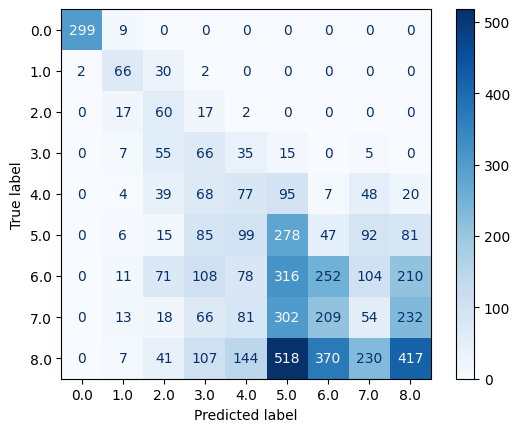

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       308
         1.0       0.47      0.66      0.55       100
         2.0       0.18      0.62      0.28        96
         3.0       0.13      0.36      0.19       183
         4.0       0.15      0.22      0.18       358
         5.0       0.18      0.40      0.25       703
         6.0       0.28      0.22      0.25      1150
         7.0       0.10      0.06      0.07       975
         8.0       0.43      0.23      0.30      1834

    accuracy                           0.27      5707
   macro avg       0.33      0.41      0.34      5707
weighted avg       0.32      0.27      0.27      5707

Epoch 1/100
199/200 [============================>.] - ETA: 0s - loss: 1.3114 - sparse_categorical_accuracy: 0.3119
Epoch 1: val_loss improved from inf to 1.68349, saving model to CustomModel_indi_LSTM.weights.hdf5
200/200 [==============================] - 11s 54ms/step - loss: 1.3112 - sparse

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


200/200 [==============================] - ETA: 0s - loss: 1.2972 - sparse_categorical_accuracy: 0.3277
Epoch 2: val_loss improved from 1.68349 to 1.67940, saving model to CustomModel_indi_LSTM.weights.hdf5
200/200 [==============================] - 11s 53ms/step - loss: 1.2972 - sparse_categorical_accuracy: 0.3277 - val_loss: 1.6794 - val_sparse_categorical_accuracy: 0.2616 - lr: 8.0000e-06
Epoch 3/100
200/200 [==============================] - ETA: 0s - loss: 1.2846 - sparse_categorical_accuracy: 0.3390
Epoch 3: val_loss improved from 1.67940 to 1.67833, saving model to CustomModel_indi_LSTM.weights.hdf5
200/200 [==============================] - 11s 54ms/step - loss: 1.2846 - sparse_categorical_accuracy: 0.3390 - val_loss: 1.6783 - val_sparse_categorical_accuracy: 0.2491 - lr: 8.0000e-06
Epoch 4/100
199/200 [============================>.] - ETA: 0s - loss: 1.2745 - sparse_categorical_accuracy: 0.3467
Epoch 4: val_loss did not improve from 1.67833
200/200 [==========================

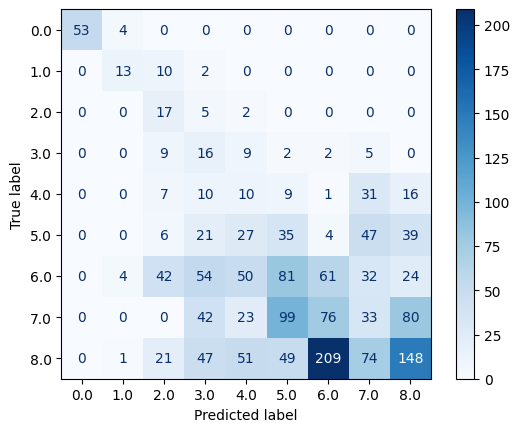

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        57
         1.0       0.59      0.52      0.55        25
         2.0       0.15      0.71      0.25        24
         3.0       0.08      0.37      0.13        43
         4.0       0.06      0.12      0.08        84
         5.0       0.13      0.20      0.15       179
         6.0       0.17      0.18      0.17       348
         7.0       0.15      0.09      0.11       353
         8.0       0.48      0.25      0.33       600

    accuracy                           0.23      1713
   macro avg       0.31      0.37      0.31      1713
weighted avg       0.30      0.23      0.24      1713

[ 0  1  2  4  5  6  7  8  9 10 11]
[3]
Epoch 1/50
1005/1005 [==============================] - ETA: 0s - loss: 1.6075 - sparse_categorical_accuracy: 0.2486
Epoch 1: val_loss improved from inf to 1.66002, saving model to CustomModel_LSTM.weights.hdf5
1005/1005 [==============================] - 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1005/1005 [==============================] - ETA: 0s - loss: 1.5033 - sparse_categorical_accuracy: 0.2701
Epoch 2: val_loss did not improve from 1.66002
1005/1005 [==============================] - 115s 114ms/step - loss: 1.5033 - sparse_categorical_accuracy: 0.2701 - val_loss: 1.6683 - val_sparse_categorical_accuracy: 0.2817 - lr: 0.0010
Epoch 3/50
1005/1005 [==============================] - ETA: 0s - loss: 1.4711 - sparse_categorical_accuracy: 0.2708
Epoch 3: val_loss did not improve from 1.66002
1005/1005 [==============================] - 116s 115ms/step - loss: 1.4711 - sparse_categorical_accuracy: 0.2708 - val_loss: 1.7466 - val_sparse_categorical_accuracy: 0.2183 - lr: 0.0010
Epoch 4/50
1005/1005 [==============================] - ETA: 0s - loss: 1.4555 - sparse_categorical_accuracy: 0.2822
Epoch 4: val_loss did not improve from 1.66002

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
1005/1005 [==============================] - 116s 116ms/step - lo

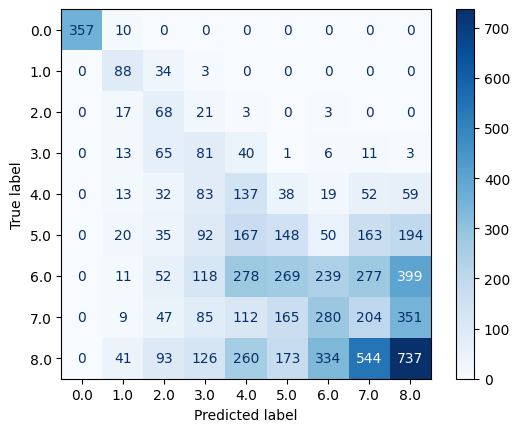

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       367
         1.0       0.40      0.70      0.51       125
         2.0       0.16      0.61      0.25       112
         3.0       0.13      0.37      0.20       220
         4.0       0.14      0.32      0.19       433
         5.0       0.19      0.17      0.18       869
         6.0       0.26      0.15      0.19      1643
         7.0       0.16      0.16      0.16      1253
         8.0       0.42      0.32      0.36      2308

    accuracy                           0.28      7330
   macro avg       0.32      0.42      0.34      7330
weighted avg       0.31      0.28      0.28      7330

Epoch 1/100
256/257 [============================>.] - ETA: 0s - loss: 1.4137 - sparse_categorical_accuracy: 0.2505
Epoch 1: val_loss improved from inf to 1.47557, saving model to CustomModel_indi_LSTM.weights.hdf5
257/257 [==============================] - 13s 52ms/step - loss: 1.4129 - sparse

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


257/257 [==============================] - ETA: 0s - loss: 1.4057 - sparse_categorical_accuracy: 0.2571
Epoch 2: val_loss did not improve from 1.47557
257/257 [==============================] - 13s 51ms/step - loss: 1.4057 - sparse_categorical_accuracy: 0.2571 - val_loss: 1.4757 - val_sparse_categorical_accuracy: 0.3486 - lr: 1.6000e-06
Epoch 3/100
256/257 [============================>.] - ETA: 0s - loss: 1.4015 - sparse_categorical_accuracy: 0.2583
Epoch 3: val_loss improved from 1.47557 to 1.47556, saving model to CustomModel_indi_LSTM.weights.hdf5
257/257 [==============================] - 13s 51ms/step - loss: 1.4011 - sparse_categorical_accuracy: 0.2580 - val_loss: 1.4756 - val_sparse_categorical_accuracy: 0.3418 - lr: 1.6000e-06
Epoch 4/100
256/257 [============================>.] - ETA: 0s - loss: 1.3986 - sparse_categorical_accuracy: 0.2637
Epoch 4: val_loss improved from 1.47556 to 1.47524, saving model to CustomModel_indi_LSTM.weights.hdf5
257/257 [==========================

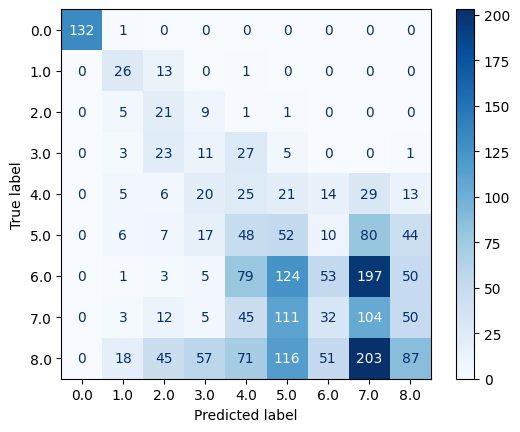

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       133
         1.0       0.38      0.65      0.48        40
         2.0       0.16      0.57      0.25        37
         3.0       0.09      0.16      0.11        70
         4.0       0.08      0.19      0.12       133
         5.0       0.12      0.20      0.15       264
         6.0       0.33      0.10      0.16       512
         7.0       0.17      0.29      0.21       362
         8.0       0.36      0.13      0.19       648

    accuracy                           0.23      2199
   macro avg       0.30      0.36      0.30      2199
weighted avg       0.30      0.23      0.23      2199

[ 0  1  2  3  5  6  7  8  9 10 11]
[4]
Epoch 1/50
1034/1034 [==============================] - ETA: 0s - loss: 1.6120 - sparse_categorical_accuracy: 0.2514
Epoch 1: val_loss improved from inf to 1.90940, saving model to CustomModel_LSTM.weights.hdf5
1034/1034 [==============================] - 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1034/1034 [==============================] - ETA: 0s - loss: 1.4898 - sparse_categorical_accuracy: 0.2720
Epoch 2: val_loss improved from 1.90940 to 1.64129, saving model to CustomModel_LSTM.weights.hdf5
1034/1034 [==============================] - 123s 119ms/step - loss: 1.4898 - sparse_categorical_accuracy: 0.2720 - val_loss: 1.6413 - val_sparse_categorical_accuracy: 0.3289 - lr: 0.0010
Epoch 3/50
1034/1034 [==============================] - ETA: 0s - loss: 1.4598 - sparse_categorical_accuracy: 0.2777
Epoch 3: val_loss did not improve from 1.64129
1034/1034 [==============================] - 124s 120ms/step - loss: 1.4598 - sparse_categorical_accuracy: 0.2777 - val_loss: 1.7402 - val_sparse_categorical_accuracy: 0.2673 - lr: 0.0010
Epoch 4/50
1034/1034 [==============================] - ETA: 0s - loss: 1.4380 - sparse_categorical_accuracy: 0.2833
Epoch 4: val_loss did not improve from 1.64129
1034/1034 [==============================] - 123s 119ms/step - loss: 1.4380 - sparse_categor

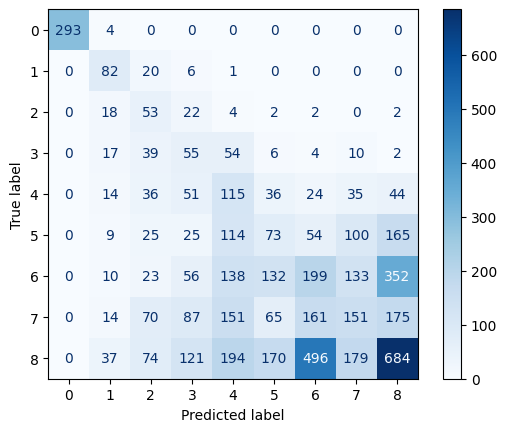

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       297
           1       0.40      0.75      0.52       109
           2       0.16      0.51      0.24       103
           3       0.13      0.29      0.18       187
           4       0.15      0.32      0.20       355
           5       0.15      0.13      0.14       565
           6       0.21      0.19      0.20      1043
           7       0.25      0.17      0.20       874
           8       0.48      0.35      0.40      1955

    accuracy                           0.31      5488
   macro avg       0.33      0.41      0.34      5488
weighted avg       0.35      0.31      0.32      5488

Epoch 1/100
192/192 [==============================] - ETA: 0s - loss: 1.4901 - sparse_categorical_accuracy: 0.3522
Epoch 1: val_loss improved from inf to 1.62888, saving model to CustomModel_indi_LSTM.weights.hdf5
192/192 [==============================] - 10s 49ms/step - loss: 1.4901 - sparse

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


192/192 [==============================] - ETA: 0s - loss: 1.4791 - sparse_categorical_accuracy: 0.3506
Epoch 2: val_loss did not improve from 1.62888
192/192 [==============================] - 9s 46ms/step - loss: 1.4791 - sparse_categorical_accuracy: 0.3506 - val_loss: 1.6389 - val_sparse_categorical_accuracy: 0.2978 - lr: 1.6000e-06
Epoch 3/100
192/192 [==============================] - ETA: 0s - loss: 1.4710 - sparse_categorical_accuracy: 0.3493
Epoch 3: val_loss did not improve from 1.62888
192/192 [==============================] - 9s 45ms/step - loss: 1.4710 - sparse_categorical_accuracy: 0.3493 - val_loss: 1.6469 - val_sparse_categorical_accuracy: 0.2887 - lr: 1.6000e-06
Epoch 4/100
191/192 [============================>.] - ETA: 0s - loss: 1.4643 - sparse_categorical_accuracy: 0.3459
Epoch 4: val_loss did not improve from 1.62888

Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-06.
192/192 [==============================] - 9s 46ms/step - loss: 1.4643 - sparse_categori

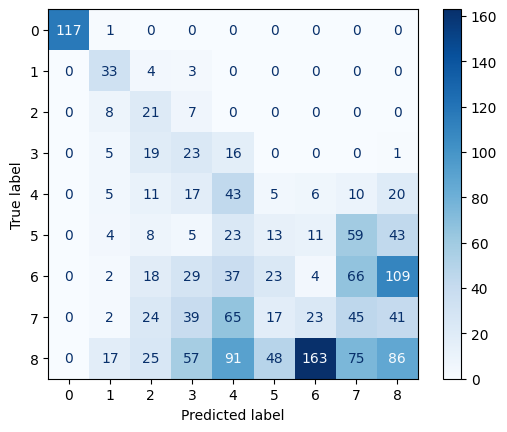

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       118
           1       0.43      0.82      0.56        40
           2       0.16      0.58      0.25        36
           3       0.13      0.36      0.19        64
           4       0.16      0.37      0.22       117
           5       0.12      0.08      0.10       166
           6       0.02      0.01      0.02       288
           7       0.18      0.18      0.18       256
           8       0.29      0.15      0.20       562

    accuracy                           0.23      1647
   macro avg       0.28      0.39      0.30      1647
weighted avg       0.24      0.23      0.22      1647

[ 0  1  2  3  4  6  7  8  9 10 11]
[5]
Epoch 1/50
1018/1018 [==============================] - ETA: 0s - loss: 1.6186 - sparse_categorical_accuracy: 0.2469
Epoch 1: val_loss improved from inf to 1.64724, saving model to CustomModel_LSTM.weights.hdf5
1018/1018 [==============================] - 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1018/1018 [==============================] - ETA: 0s - loss: 1.5137 - sparse_categorical_accuracy: 0.2674
Epoch 2: val_loss did not improve from 1.64724
1018/1018 [==============================] - 121s 119ms/step - loss: 1.5137 - sparse_categorical_accuracy: 0.2674 - val_loss: 1.6654 - val_sparse_categorical_accuracy: 0.3318 - lr: 0.0010
Epoch 3/50
1018/1018 [==============================] - ETA: 0s - loss: 1.4711 - sparse_categorical_accuracy: 0.2808
Epoch 3: val_loss did not improve from 1.64724
1018/1018 [==============================] - 140s 138ms/step - loss: 1.4711 - sparse_categorical_accuracy: 0.2808 - val_loss: 1.6651 - val_sparse_categorical_accuracy: 0.2495 - lr: 0.0010
Epoch 4/50
1018/1018 [==============================] - ETA: 0s - loss: 1.4485 - sparse_categorical_accuracy: 0.2714
Epoch 4: val_loss improved from 1.64724 to 1.64213, saving model to CustomModel_LSTM.weights.hdf5
1018/1018 [==============================] - 123s 121ms/step - loss: 1.4485 - sparse_categor

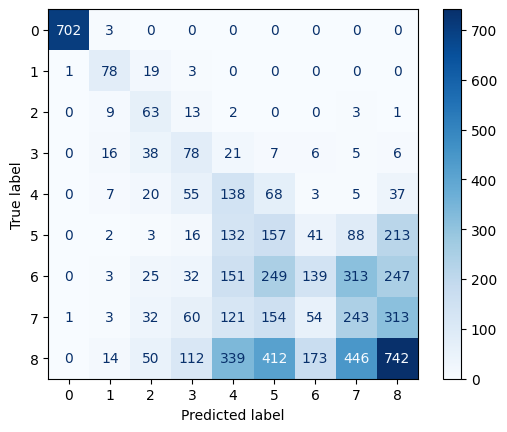

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       705
           1       0.58      0.77      0.66       101
           2       0.25      0.69      0.37        91
           3       0.21      0.44      0.29       177
           4       0.15      0.41      0.22       333
           5       0.15      0.24      0.18       652
           6       0.33      0.12      0.18      1159
           7       0.22      0.25      0.23       981
           8       0.48      0.32      0.39      2288

    accuracy                           0.36      6487
   macro avg       0.37      0.47      0.39      6487
weighted avg       0.41      0.36      0.36      6487

Epoch 1/100
227/227 [==============================] - ETA: 0s - loss: 1.2937 - sparse_categorical_accuracy: 0.3822
Epoch 1: val_loss improved from inf to 1.55521, saving model to CustomModel_indi_LSTM.weights.hdf5
227/227 [==============================] - 12s 48ms/step - loss: 1.2937 - sparse

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


226/227 [============================>.] - ETA: 0s - loss: 1.2883 - sparse_categorical_accuracy: 0.3827
Epoch 2: val_loss improved from 1.55521 to 1.55474, saving model to CustomModel_indi_LSTM.weights.hdf5
227/227 [==============================] - 10s 45ms/step - loss: 1.2895 - sparse_categorical_accuracy: 0.3833 - val_loss: 1.5547 - val_sparse_categorical_accuracy: 0.2522 - lr: 1.6000e-06
Epoch 3/100
227/227 [==============================] - ETA: 0s - loss: 1.2857 - sparse_categorical_accuracy: 0.3835
Epoch 3: val_loss improved from 1.55474 to 1.55433, saving model to CustomModel_indi_LSTM.weights.hdf5
227/227 [==============================] - 10s 45ms/step - loss: 1.2857 - sparse_categorical_accuracy: 0.3835 - val_loss: 1.5543 - val_sparse_categorical_accuracy: 0.2500 - lr: 1.6000e-06
Epoch 4/100
227/227 [==============================] - ETA: 0s - loss: 1.2820 - sparse_categorical_accuracy: 0.3874
Epoch 4: val_loss improved from 1.55433 to 1.55427, saving model to CustomModel_in

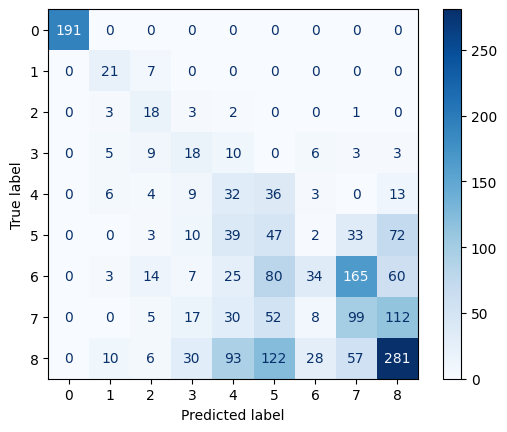

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       191
           1       0.44      0.75      0.55        28
           2       0.27      0.67      0.39        27
           3       0.19      0.33      0.24        54
           4       0.14      0.31      0.19       103
           5       0.14      0.23      0.17       206
           6       0.42      0.09      0.14       388
           7       0.28      0.31      0.29       323
           8       0.52      0.45      0.48       627

    accuracy                           0.38      1947
   macro avg       0.38      0.46      0.38      1947
weighted avg       0.43      0.38      0.38      1947

[ 0  1  2  3  4  5  7  8  9 10 11]
[6]
Epoch 1/50
1065/1065 [==============================] - ETA: 0s - loss: 1.6068 - sparse_categorical_accuracy: 0.2499
Epoch 1: val_loss improved from inf to 1.71944, saving model to CustomModel_LSTM.weights.hdf5
1065/1065 [==============================] - 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1065/1065 [==============================] - ETA: 0s - loss: 1.4961 - sparse_categorical_accuracy: 0.2742
Epoch 2: val_loss improved from 1.71944 to 1.69691, saving model to CustomModel_LSTM.weights.hdf5
1065/1065 [==============================] - 120s 113ms/step - loss: 1.4961 - sparse_categorical_accuracy: 0.2742 - val_loss: 1.6969 - val_sparse_categorical_accuracy: 0.3028 - lr: 0.0010
Epoch 3/50
1065/1065 [==============================] - ETA: 0s - loss: 1.4519 - sparse_categorical_accuracy: 0.2826
Epoch 3: val_loss improved from 1.69691 to 1.62499, saving model to CustomModel_LSTM.weights.hdf5
1065/1065 [==============================] - 120s 112ms/step - loss: 1.4519 - sparse_categorical_accuracy: 0.2826 - val_loss: 1.6250 - val_sparse_categorical_accuracy: 0.2535 - lr: 0.0010
Epoch 4/50
1065/1065 [==============================] - ETA: 0s - loss: 1.4370 - sparse_categorical_accuracy: 0.2801
Epoch 4: val_loss improved from 1.62499 to 1.57437, saving model to CustomModel_LSTM.wei

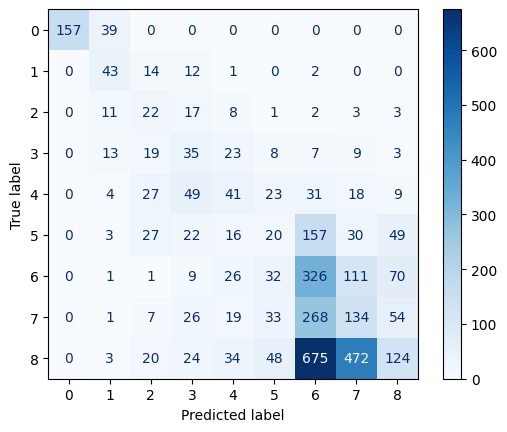

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       196
           1       0.36      0.60      0.45        72
           2       0.16      0.33      0.22        67
           3       0.18      0.30      0.23       117
           4       0.24      0.20      0.22       202
           5       0.12      0.06      0.08       324
           6       0.22      0.57      0.32       576
           7       0.17      0.25      0.20       542
           8       0.40      0.09      0.14      1400

    accuracy                           0.26      3496
   macro avg       0.32      0.35      0.31      3496
weighted avg       0.32      0.26      0.23      3496

Epoch 1/100
122/123 [============================>.] - ETA: 0s - loss: 1.4997 - sparse_categorical_accuracy: 0.2095
Epoch 1: val_loss improved from inf to 1.45410, saving model to CustomModel_indi_LSTM.weights.hdf5
123/123 [==============================] - 8s 55ms/step - loss: 1.4977 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


122/123 [============================>.] - ETA: 0s - loss: 1.4501 - sparse_categorical_accuracy: 0.2300
Epoch 2: val_loss did not improve from 1.45410
123/123 [==============================] - 6s 52ms/step - loss: 1.4555 - sparse_categorical_accuracy: 0.2299 - val_loss: 1.4634 - val_sparse_categorical_accuracy: 0.3163 - lr: 8.0000e-06
Epoch 3/100
122/123 [============================>.] - ETA: 0s - loss: 1.4414 - sparse_categorical_accuracy: 0.2602
Epoch 3: val_loss did not improve from 1.45410
123/123 [==============================] - 6s 51ms/step - loss: 1.4402 - sparse_categorical_accuracy: 0.2601 - val_loss: 1.4717 - val_sparse_categorical_accuracy: 0.3245 - lr: 8.0000e-06
Epoch 4/100
122/123 [============================>.] - ETA: 0s - loss: 1.4301 - sparse_categorical_accuracy: 0.2782
Epoch 4: val_loss did not improve from 1.45410

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
123/123 [==============================] - 6s 51ms/step - loss: 1.4281 

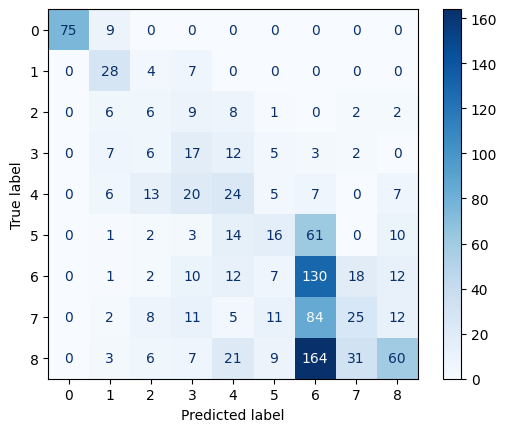

              precision    recall  f1-score   support

           0       1.00      0.89      0.94        84
           1       0.44      0.72      0.55        39
           2       0.13      0.18      0.15        34
           3       0.20      0.33      0.25        52
           4       0.25      0.29      0.27        82
           5       0.30      0.15      0.20       107
           6       0.29      0.68      0.41       192
           7       0.32      0.16      0.21       158
           8       0.58      0.20      0.30       301

    accuracy                           0.36      1049
   macro avg       0.39      0.40      0.36      1049
weighted avg       0.43      0.36      0.35      1049

[ 0  1  2  3  4  5  6  8  9 10 11]
[7]
Epoch 1/50
971/971 [==============================] - ETA: 0s - loss: 1.6063 - sparse_categorical_accuracy: 0.2581
Epoch 1: val_loss improved from inf to 1.73949, saving model to CustomModel_LSTM.weights.hdf5
971/971 [==============================] - 103s

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


971/971 [==============================] - ETA: 0s - loss: 1.5080 - sparse_categorical_accuracy: 0.2767
Epoch 2: val_loss improved from 1.73949 to 1.66702, saving model to CustomModel_LSTM.weights.hdf5
971/971 [==============================] - 105s 108ms/step - loss: 1.5080 - sparse_categorical_accuracy: 0.2767 - val_loss: 1.6670 - val_sparse_categorical_accuracy: 0.2689 - lr: 0.0010
Epoch 3/50
971/971 [==============================] - ETA: 0s - loss: 1.4668 - sparse_categorical_accuracy: 0.2896
Epoch 3: val_loss improved from 1.66702 to 1.62289, saving model to CustomModel_LSTM.weights.hdf5
971/971 [==============================] - 105s 108ms/step - loss: 1.4668 - sparse_categorical_accuracy: 0.2896 - val_loss: 1.6229 - val_sparse_categorical_accuracy: 0.3439 - lr: 0.0010
Epoch 4/50
971/971 [==============================] - ETA: 0s - loss: 1.4494 - sparse_categorical_accuracy: 0.2878
Epoch 4: val_loss did not improve from 1.62289
971/971 [==============================] - 104s 107

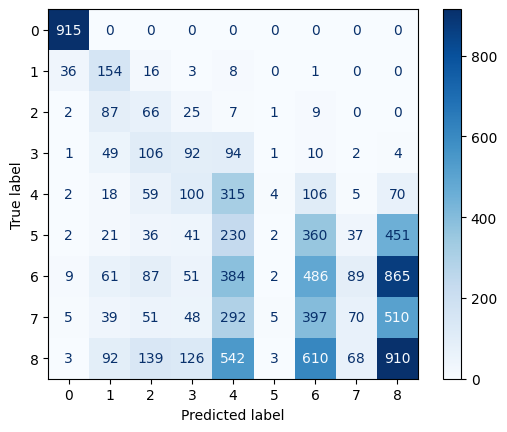

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       915
           1       0.30      0.71      0.42       218
           2       0.12      0.34      0.17       197
           3       0.19      0.26      0.22       359
           4       0.17      0.46      0.25       679
           5       0.11      0.00      0.00      1180
           6       0.25      0.24      0.24      2034
           7       0.26      0.05      0.08      1417
           8       0.32      0.37      0.34      2493

    accuracy                           0.32      9492
   macro avg       0.29      0.38      0.30      9492
weighted avg       0.31      0.32      0.29      9492

Epoch 1/100
333/333 [==============================] - ETA: 0s - loss: 1.4703 - sparse_categorical_accuracy: 0.3336
Epoch 1: val_loss improved from inf to 1.39614, saving model to CustomModel_indi_LSTM.weights.hdf5
333/333 [==============================] - 19s 54ms/step - loss: 1.4703 - sparse

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


333/333 [==============================] - ETA: 0s - loss: 1.4582 - sparse_categorical_accuracy: 0.3437
Epoch 2: val_loss improved from 1.39614 to 1.39289, saving model to CustomModel_indi_LSTM.weights.hdf5
333/333 [==============================] - 17s 51ms/step - loss: 1.4582 - sparse_categorical_accuracy: 0.3437 - val_loss: 1.3929 - val_sparse_categorical_accuracy: 0.3544 - lr: 8.0000e-06
Epoch 3/100
332/333 [============================>.] - ETA: 0s - loss: 1.4513 - sparse_categorical_accuracy: 0.3549
Epoch 3: val_loss improved from 1.39289 to 1.39185, saving model to CustomModel_indi_LSTM.weights.hdf5
333/333 [==============================] - 17s 52ms/step - loss: 1.4510 - sparse_categorical_accuracy: 0.3548 - val_loss: 1.3918 - val_sparse_categorical_accuracy: 0.3499 - lr: 8.0000e-06
Epoch 4/100
333/333 [==============================] - ETA: 0s - loss: 1.4456 - sparse_categorical_accuracy: 0.3611
Epoch 4: val_loss improved from 1.39185 to 1.39124, saving model to CustomModel_in

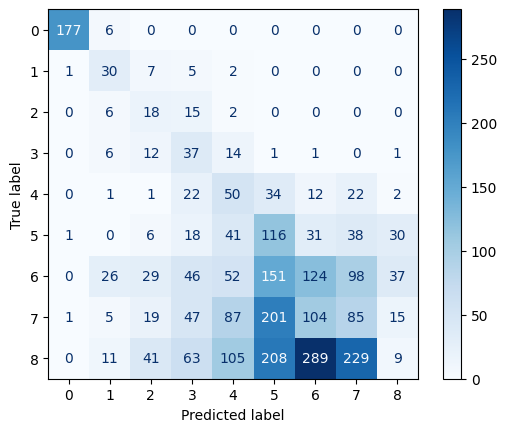

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       183
           1       0.33      0.67      0.44        45
           2       0.14      0.44      0.21        41
           3       0.15      0.51      0.23        72
           4       0.14      0.35      0.20       144
           5       0.16      0.41      0.23       281
           6       0.22      0.22      0.22       563
           7       0.18      0.15      0.16       564
           8       0.10      0.01      0.02       955

    accuracy                           0.23      2848
   macro avg       0.27      0.41      0.30      2848
weighted avg       0.21      0.23      0.19      2848

[ 0  1  2  3  4  5  6  7  9 10 11]
[8]
Epoch 1/50
1076/1076 [==============================] - ETA: 0s - loss: 1.5915 - sparse_categorical_accuracy: 0.2526
Epoch 1: val_loss improved from inf to 1.66674, saving model to CustomModel_LSTM.weights.hdf5
1076/1076 [==============================] - 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1076/1076 [==============================] - ETA: 0s - loss: 1.4839 - sparse_categorical_accuracy: 0.2745
Epoch 2: val_loss did not improve from 1.66674
1076/1076 [==============================] - 125s 116ms/step - loss: 1.4839 - sparse_categorical_accuracy: 0.2745 - val_loss: 1.7306 - val_sparse_categorical_accuracy: 0.2410 - lr: 0.0010
Epoch 3/50
1076/1076 [==============================] - ETA: 0s - loss: 1.4553 - sparse_categorical_accuracy: 0.2780
Epoch 3: val_loss improved from 1.66674 to 1.65544, saving model to CustomModel_LSTM.weights.hdf5
1076/1076 [==============================] - 125s 116ms/step - loss: 1.4553 - sparse_categorical_accuracy: 0.2780 - val_loss: 1.6554 - val_sparse_categorical_accuracy: 0.3237 - lr: 0.0010
Epoch 4/50
1076/1076 [==============================] - ETA: 0s - loss: 1.4369 - sparse_categorical_accuracy: 0.2907
Epoch 4: val_loss did not improve from 1.65544
1076/1076 [==============================] - 125s 116ms/step - loss: 1.4369 - sparse_categor

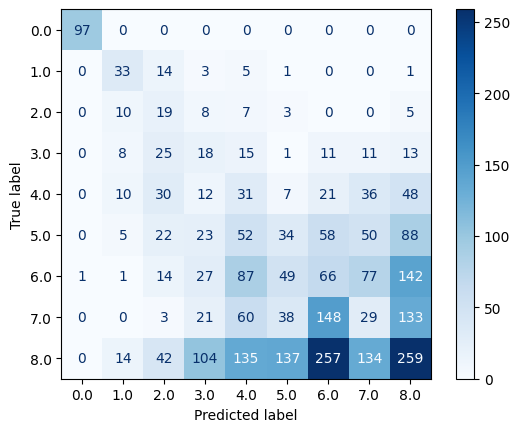

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99        97
         1.0       0.41      0.58      0.48        57
         2.0       0.11      0.37      0.17        52
         3.0       0.08      0.18      0.11       102
         4.0       0.08      0.16      0.11       195
         5.0       0.13      0.10      0.11       332
         6.0       0.12      0.14      0.13       464
         7.0       0.09      0.07      0.08       432
         8.0       0.38      0.24      0.29      1082

    accuracy                           0.21      2813
   macro avg       0.26      0.31      0.27      2813
weighted avg       0.25      0.21      0.22      2813

Epoch 1/100
98/99 [============================>.] - ETA: 0s - loss: 1.8092 - sparse_categorical_accuracy: 0.1467
Epoch 1: val_loss improved from inf to 1.69337, saving model to CustomModel_indi_LSTM.weights.hdf5
99/99 [==============================] - 5s 50ms/step - loss: 1.8063 - sparse_cate

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


99/99 [==============================] - ETA: 0s - loss: 1.7940 - sparse_categorical_accuracy: 0.1473
Epoch 2: val_loss improved from 1.69337 to 1.69336, saving model to CustomModel_indi_LSTM.weights.hdf5
99/99 [==============================] - 5s 49ms/step - loss: 1.7940 - sparse_categorical_accuracy: 0.1473 - val_loss: 1.6934 - val_sparse_categorical_accuracy: 0.4086 - lr: 1.6000e-06
Epoch 3/100
99/99 [==============================] - ETA: 0s - loss: 1.7826 - sparse_categorical_accuracy: 0.1498
Epoch 3: val_loss did not improve from 1.69336
99/99 [==============================] - 5s 49ms/step - loss: 1.7826 - sparse_categorical_accuracy: 0.1498 - val_loss: 1.6950 - val_sparse_categorical_accuracy: 0.4086 - lr: 1.6000e-06
Epoch 4/100
99/99 [==============================] - ETA: 0s - loss: 1.7722 - sparse_categorical_accuracy: 0.1511
Epoch 4: val_loss did not improve from 1.69336

Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-06.
99/99 [==============================] - 5

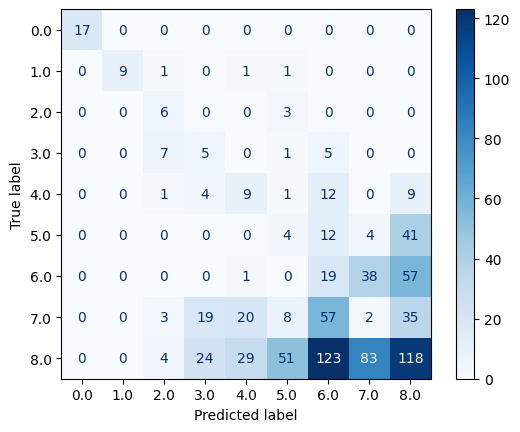

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        17
         1.0       1.00      0.75      0.86        12
         2.0       0.27      0.67      0.39         9
         3.0       0.10      0.28      0.14        18
         4.0       0.15      0.25      0.19        36
         5.0       0.06      0.07      0.06        61
         6.0       0.08      0.17      0.11       115
         7.0       0.02      0.01      0.01       144
         8.0       0.45      0.27      0.34       432

    accuracy                           0.22       844
   macro avg       0.35      0.38      0.34       844
weighted avg       0.30      0.22      0.24       844

[ 0  1  2  3  4  5  6  7  8 10 11]
[9]
Epoch 1/50
1070/1071 [============================>.] - ETA: 0s - loss: 1.5831 - sparse_categorical_accuracy: 0.2553
Epoch 1: val_loss improved from inf to 1.73241, saving model to CustomModel_LSTM.weights.hdf5
1071/1071 [==============================] - 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1070/1071 [============================>.] - ETA: 0s - loss: 1.4770 - sparse_categorical_accuracy: 0.2787
Epoch 2: val_loss improved from 1.73241 to 1.65119, saving model to CustomModel_LSTM.weights.hdf5
1071/1071 [==============================] - 117s 109ms/step - loss: 1.4769 - sparse_categorical_accuracy: 0.2787 - val_loss: 1.6512 - val_sparse_categorical_accuracy: 0.3036 - lr: 0.0010
Epoch 3/50
1070/1071 [============================>.] - ETA: 0s - loss: 1.4502 - sparse_categorical_accuracy: 0.2819
Epoch 3: val_loss did not improve from 1.65119
1071/1071 [==============================] - 117s 109ms/step - loss: 1.4504 - sparse_categorical_accuracy: 0.2819 - val_loss: 1.6941 - val_sparse_categorical_accuracy: 0.2571 - lr: 0.0010
Epoch 4/50
1070/1071 [============================>.] - ETA: 0s - loss: 1.4342 - sparse_categorical_accuracy: 0.2855
Epoch 4: val_loss improved from 1.65119 to 1.63133, saving model to CustomModel_LSTM.weights.hdf5
1071/1071 [==============================

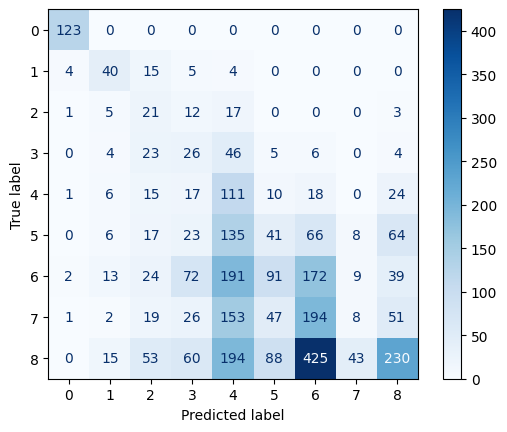

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       123
           1       0.44      0.59      0.50        68
           2       0.11      0.36      0.17        59
           3       0.11      0.23      0.15       114
           4       0.13      0.55      0.21       202
           5       0.15      0.11      0.13       360
           6       0.20      0.28      0.23       613
           7       0.12      0.02      0.03       501
           8       0.55      0.21      0.30      1108

    accuracy                           0.25      3148
   macro avg       0.30      0.37      0.30      3148
weighted avg       0.33      0.25      0.24      3148

Epoch 1/100
110/111 [============================>.] - ETA: 0s - loss: 1.4077 - sparse_categorical_accuracy: 0.2915
Epoch 1: val_loss improved from inf to 2.15506, saving model to CustomModel_indi_LSTM.weights.hdf5
111/111 [==============================] - 7s 56ms/step - loss: 1.4105 - sparse_

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


110/111 [============================>.] - ETA: 0s - loss: 1.3974 - sparse_categorical_accuracy: 0.3074
Epoch 2: val_loss improved from 2.15506 to 2.15257, saving model to CustomModel_indi_LSTM.weights.hdf5
111/111 [==============================] - 6s 51ms/step - loss: 1.3965 - sparse_categorical_accuracy: 0.3076 - val_loss: 2.1526 - val_sparse_categorical_accuracy: 0.1519 - lr: 8.0000e-06
Epoch 3/100
111/111 [==============================] - ETA: 0s - loss: 1.3877 - sparse_categorical_accuracy: 0.3133
Epoch 3: val_loss improved from 2.15257 to 2.15216, saving model to CustomModel_indi_LSTM.weights.hdf5
111/111 [==============================] - 6s 52ms/step - loss: 1.3877 - sparse_categorical_accuracy: 0.3133 - val_loss: 2.1522 - val_sparse_categorical_accuracy: 0.1497 - lr: 8.0000e-06
Epoch 4/100
110/111 [============================>.] - ETA: 0s - loss: 1.3786 - sparse_categorical_accuracy: 0.3307
Epoch 4: val_loss improved from 2.15216 to 2.15215, saving model to CustomModel_indi

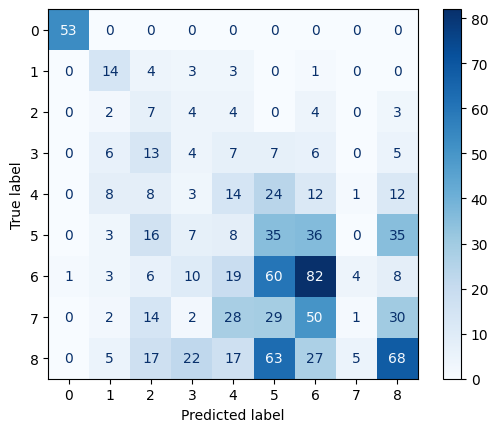

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       0.33      0.56      0.41        25
           2       0.08      0.29      0.13        24
           3       0.07      0.08      0.08        48
           4       0.14      0.17      0.15        82
           5       0.16      0.25      0.20       140
           6       0.38      0.42      0.40       193
           7       0.09      0.01      0.01       156
           8       0.42      0.30      0.35       224

    accuracy                           0.29       945
   macro avg       0.29      0.34      0.30       945
weighted avg       0.30      0.29      0.28       945

[ 0  1  2  3  4  5  6  7  8  9 11]
[10]
Epoch 1/50
986/986 [==============================] - ETA: 0s - loss: 1.6223 - sparse_categorical_accuracy: 0.2401
Epoch 1: val_loss improved from inf to 1.71554, saving model to CustomModel_LSTM.weights.hdf5
986/986 [==============================] - 113

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


986/986 [==============================] - ETA: 0s - loss: 1.4871 - sparse_categorical_accuracy: 0.2704
Epoch 2: val_loss improved from 1.71554 to 1.68481, saving model to CustomModel_LSTM.weights.hdf5
986/986 [==============================] - 111s 112ms/step - loss: 1.4871 - sparse_categorical_accuracy: 0.2704 - val_loss: 1.6848 - val_sparse_categorical_accuracy: 0.2315 - lr: 0.0010
Epoch 3/50
986/986 [==============================] - ETA: 0s - loss: 1.4514 - sparse_categorical_accuracy: 0.2781
Epoch 3: val_loss improved from 1.68481 to 1.58611, saving model to CustomModel_LSTM.weights.hdf5
986/986 [==============================] - 110s 112ms/step - loss: 1.4514 - sparse_categorical_accuracy: 0.2781 - val_loss: 1.5861 - val_sparse_categorical_accuracy: 0.3021 - lr: 0.0010
Epoch 4/50
986/986 [==============================] - ETA: 0s - loss: 1.4372 - sparse_categorical_accuracy: 0.2877
Epoch 4: val_loss did not improve from 1.58611
986/986 [==============================] - 111s 112

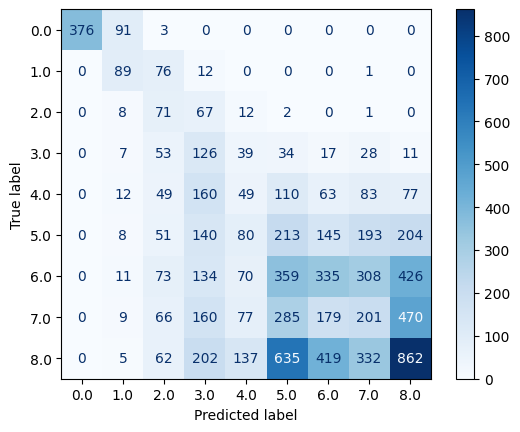

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89       470
         1.0       0.37      0.50      0.43       178
         2.0       0.14      0.44      0.21       161
         3.0       0.13      0.40      0.19       315
         4.0       0.11      0.08      0.09       603
         5.0       0.13      0.21      0.16      1034
         6.0       0.29      0.20      0.23      1716
         7.0       0.18      0.14      0.15      1447
         8.0       0.42      0.32      0.37      2654

    accuracy                           0.27      8578
   macro avg       0.31      0.34      0.30      8578
weighted avg       0.31      0.27      0.28      8578

Epoch 1/100
301/301 [==============================] - ETA: 0s - loss: 1.4941 - sparse_categorical_accuracy: 0.2890
Epoch 1: val_loss improved from inf to 1.60836, saving model to CustomModel_indi_LSTM.weights.hdf5
301/301 [==============================] - 15s 50ms/step - loss: 1.4941 - sparse

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


301/301 [==============================] - ETA: 0s - loss: 1.4732 - sparse_categorical_accuracy: 0.2994
Epoch 2: val_loss improved from 1.60836 to 1.60437, saving model to CustomModel_indi_LSTM.weights.hdf5
301/301 [==============================] - 15s 50ms/step - loss: 1.4732 - sparse_categorical_accuracy: 0.2994 - val_loss: 1.6044 - val_sparse_categorical_accuracy: 0.2606 - lr: 8.0000e-06
Epoch 3/100
301/301 [==============================] - ETA: 0s - loss: 1.4668 - sparse_categorical_accuracy: 0.3052
Epoch 3: val_loss improved from 1.60437 to 1.59987, saving model to CustomModel_indi_LSTM.weights.hdf5
301/301 [==============================] - 15s 50ms/step - loss: 1.4668 - sparse_categorical_accuracy: 0.3052 - val_loss: 1.5999 - val_sparse_categorical_accuracy: 0.2764 - lr: 8.0000e-06
Epoch 4/100
300/301 [============================>.] - ETA: 0s - loss: 1.4617 - sparse_categorical_accuracy: 0.3154
Epoch 4: val_loss improved from 1.59987 to 1.59619, saving model to CustomModel_in

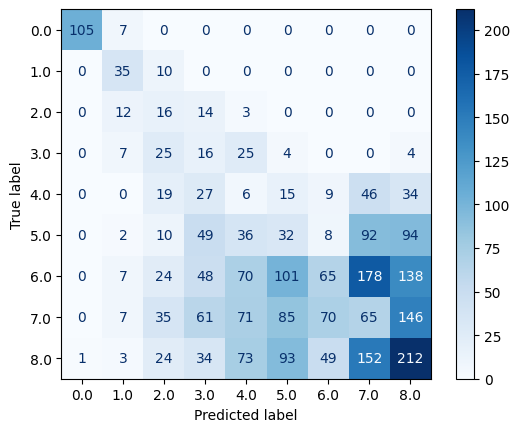

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.96       112
         1.0       0.44      0.78      0.56        45
         2.0       0.10      0.36      0.15        45
         3.0       0.06      0.20      0.10        81
         4.0       0.02      0.04      0.03       156
         5.0       0.10      0.10      0.10       323
         6.0       0.32      0.10      0.16       631
         7.0       0.12      0.12      0.12       540
         8.0       0.34      0.33      0.33       641

    accuracy                           0.21      2574
   macro avg       0.28      0.33      0.28      2574
weighted avg       0.26      0.21      0.22      2574

[ 0  1  2  3  4  5  6  7  8  9 10]
[11]
Epoch 1/50
1026/1026 [==============================] - ETA: 0s - loss: 1.6086 - sparse_categorical_accuracy: 0.2616
Epoch 1: val_loss improved from inf to 1.69681, saving model to CustomModel_LSTM.weights.hdf5
1026/1026 [==============================] -

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1026/1026 [==============================] - ETA: 0s - loss: 1.4908 - sparse_categorical_accuracy: 0.2889
Epoch 2: val_loss improved from 1.69681 to 1.60196, saving model to CustomModel_LSTM.weights.hdf5
1026/1026 [==============================] - 113s 110ms/step - loss: 1.4908 - sparse_categorical_accuracy: 0.2889 - val_loss: 1.6020 - val_sparse_categorical_accuracy: 0.3132 - lr: 0.0010
Epoch 3/50
1026/1026 [==============================] - ETA: 0s - loss: 1.4664 - sparse_categorical_accuracy: 0.2912
Epoch 3: val_loss did not improve from 1.60196
1026/1026 [==============================] - 114s 111ms/step - loss: 1.4664 - sparse_categorical_accuracy: 0.2912 - val_loss: 1.6282 - val_sparse_categorical_accuracy: 0.2692 - lr: 0.0010
Epoch 4/50
1026/1026 [==============================] - ETA: 0s - loss: 1.4422 - sparse_categorical_accuracy: 0.2950
Epoch 4: val_loss improved from 1.60196 to 1.60115, saving model to CustomModel_LSTM.weights.hdf5
1026/1026 [==============================

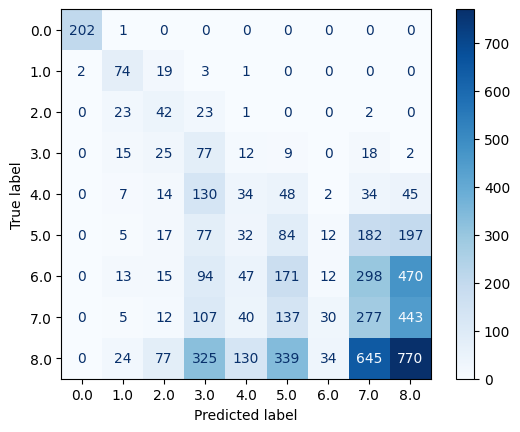

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       203
         1.0       0.44      0.75      0.56        99
         2.0       0.19      0.46      0.27        91
         3.0       0.09      0.49      0.15       158
         4.0       0.11      0.11      0.11       314
         5.0       0.11      0.14      0.12       606
         6.0       0.13      0.01      0.02      1120
         7.0       0.19      0.26      0.22      1051
         8.0       0.40      0.33      0.36      2344

    accuracy                           0.26      5986
   macro avg       0.30      0.39      0.31      5986
weighted avg       0.28      0.26      0.25      5986

Epoch 1/100
209/210 [============================>.] - ETA: 0s - loss: 1.4008 - sparse_categorical_accuracy: 0.2757
Epoch 1: val_loss improved from inf to 1.81090, saving model to CustomModel_indi_LSTM.weights.hdf5
210/210 [==============================] - 10s 49ms/step - loss: 1.4002 - sparse

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


210/210 [==============================] - ETA: 0s - loss: 1.3793 - sparse_categorical_accuracy: 0.2509
Epoch 2: val_loss did not improve from 1.81090
210/210 [==============================] - 10s 49ms/step - loss: 1.3793 - sparse_categorical_accuracy: 0.2509 - val_loss: 1.8350 - val_sparse_categorical_accuracy: 0.1277 - lr: 8.0000e-06
Epoch 3/100
210/210 [==============================] - ETA: 0s - loss: 1.3678 - sparse_categorical_accuracy: 0.2524
Epoch 3: val_loss did not improve from 1.81090
210/210 [==============================] - 10s 49ms/step - loss: 1.3678 - sparse_categorical_accuracy: 0.2524 - val_loss: 1.8567 - val_sparse_categorical_accuracy: 0.1193 - lr: 8.0000e-06
Epoch 4/100
209/210 [============================>.] - ETA: 0s - loss: 1.3575 - sparse_categorical_accuracy: 0.2503
Epoch 4: val_loss did not improve from 1.81090

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
210/210 [==============================] - 10s 49ms/step - loss: 1.35

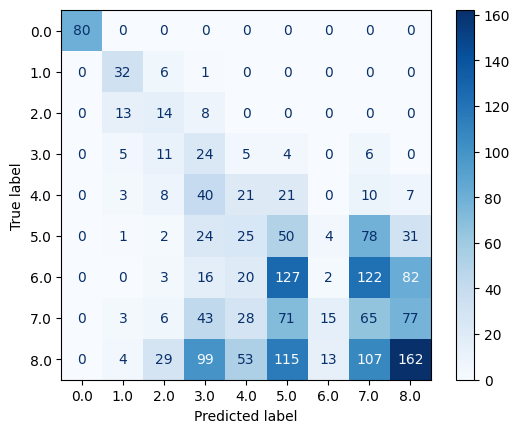

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        80
         1.0       0.52      0.82      0.64        39
         2.0       0.18      0.40      0.25        35
         3.0       0.09      0.44      0.15        55
         4.0       0.14      0.19      0.16       110
         5.0       0.13      0.23      0.17       215
         6.0       0.06      0.01      0.01       372
         7.0       0.17      0.21      0.19       308
         8.0       0.45      0.28      0.34       582

    accuracy                           0.25      1796
   macro avg       0.30      0.40      0.32      1796
weighted avg       0.27      0.25      0.24      1796


Mean accuracy of population: 0.2862, Standard deviation of population: 0.0445


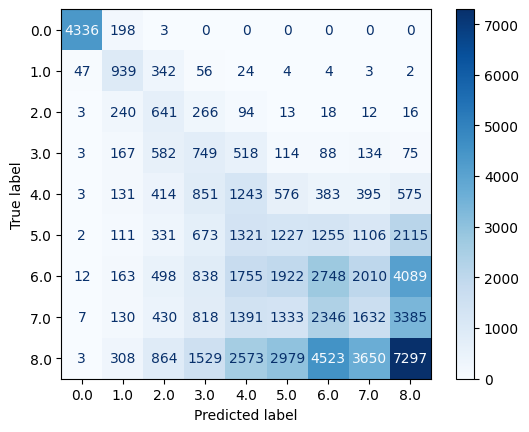

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      4537
         1.0       0.39      0.66      0.49      1421
         2.0       0.16      0.49      0.24      1303
         3.0       0.13      0.31      0.18      2430
         4.0       0.14      0.27      0.18      4571
         5.0       0.15      0.15      0.15      8141
         6.0       0.24      0.20      0.22     14035
         7.0       0.18      0.14      0.16     11472
         8.0       0.42      0.31      0.35     23726

    accuracy                           0.29     71636
   macro avg       0.31      0.39      0.33     71636
weighted avg       0.32      0.29      0.30     71636


Mean accuracy of individuum: 0.2759, Standard deviation of individuum: 0.0599


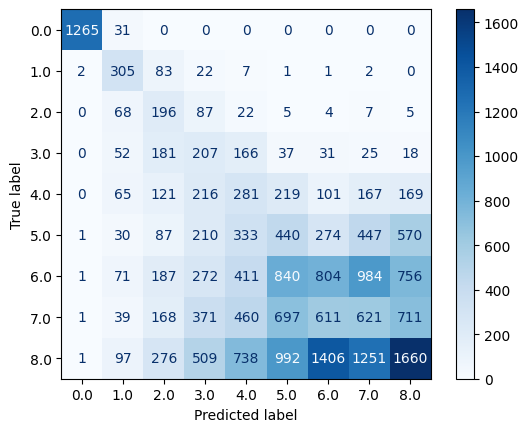

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1296
         1.0       0.40      0.72      0.52       423
         2.0       0.15      0.50      0.23       394
         3.0       0.11      0.29      0.16       717
         4.0       0.12      0.21      0.15      1339
         5.0       0.14      0.18      0.16      2392
         6.0       0.25      0.19      0.21      4326
         7.0       0.18      0.17      0.17      3679
         8.0       0.43      0.24      0.31      6930

    accuracy                           0.27     21496
   macro avg       0.31      0.39      0.32     21496
weighted avg       0.31      0.27      0.28     21496



In [45]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


def LSTM_Model(input_shape, classes):

    model= Sequential()

    model.add(tf.keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True, activation="tanh"))
    model.add(tf.keras.layers.LSTM(64, return_sequences=True, activation="tanh"))
    model.add(tf.keras.layers.LSTM(32, return_sequences=False, activation="tanh"))

    model.add(Dense(100, activation = "tanh"))


    # Output layer with Softmax activation function
    model.add(Dense(units=classes, activation='softmax'))



    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])


    return model








# we need 12 folds as we have 12 patients 
num_folds = 12
# we do not split them randomly so that the data of each subject remains 
kfolds = KFold(n_splits=num_folds, shuffle=False)

# empty list for accuarcy and variables of each fold which are stored
accuracies_CV_All = []
actual_labels_CV_All = []
predicted_labels_CV_All = []


accuracies_CV_indi = []
actual_labels_CV_indi = []
predicted_labels_CV_indi = []
count = 0

# itertate over each fold
for train_idx, test_idx in kfolds.split(X):
    # Split the dataset into training and validation sets for the current fold
    print(train_idx)
    print(test_idx)

    # train fold
    X_train_fold = [X[i] for i in train_idx]
    y_train_fold = [Y[i] for i in train_idx]

    # validation fold
    X_val_fold = [X_val[i] for i in train_idx]
    y_val_fold = [Y_val[i] for i in train_idx]

    # test fold
    X_test_fold = np.array([X[i] for i in test_idx])
    X_test_fold = X_test_fold.reshape(-1,96,4)
    y_test_fold = np.array([Y[i] for i in test_idx])
    y_test_fold = y_test_fold.reshape(-1,1)


    X_train_fold = np.vstack(X_train_fold)
    y_train_fold = np.vstack(y_train_fold)

    X_val_fold = np.vstack(X_val_fold)
    y_val_fold = np.vstack(y_val_fold)


    
    # splitting training data into training and validation for optimizing the learning rate
    # during training and early stopping
    X_train_fold, y_train_fold = shuffle(X_train_fold, y_train_fold)
    X_val_fold, y_val_fold = shuffle(X_val_fold, y_val_fold)

    X_train_indiv, X_test_indi,  y_train_indiv, y_test_indi = train_test_split(
    X_test_fold , y_test_fold , test_size=0.30, shuffle = False)

    X_train_indi, X_val_indi,  y_train_indi, y_val_indi = train_test_split(
    X_train_indiv, y_train_indiv, test_size=0.20, shuffle = False)

    # labels for the whole test data 
    actual_labels_CV_All = np.append(actual_labels_CV_All, y_test_fold)
    # labels for the individusal trained model which have less test data
    actual_labels_CV_indi = np.append(actual_labels_CV_indi, y_test_indi)

    # estimating distribution of classes
    labels_df = pd.DataFrame(y_train_fold, columns = ['label'])
    class_occurences = np.bincount(labels_df['label'])
    total = class_occurences.sum()
    number_classes = len(class_occurences)

    # assigning weights for classes, weight for last class stays 1, since its occurance is the highest
    weight_for_0 = (1/class_occurences[0]) * (total/number_classes)
    weight_for_1 = (1/class_occurences[1]) * (total/number_classes)
    weight_for_2 = (1/class_occurences[2]) * (total/number_classes)
    weight_for_3 = (1/class_occurences[3]) * (total/number_classes)
    weight_for_4 = (1/class_occurences[4]) * (total/number_classes)
    weight_for_5= (1/class_occurences[5]) * (total/number_classes)
    weight_for_6 = (1/class_occurences[6]) * (total/number_classes)
    weight_for_7 = (1/class_occurences[7]) * (total/number_classes)
    weight_for_8 = (1/class_occurences[8]) * (total/number_classes)

    class_weights = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4, 5: weight_for_5, 6: weight_for_6,  
                     7: weight_for_7,  8: weight_for_8,  9: 0, 10:0}

    
    # Create a new model for each fold
    model_CV_D = LSTM_Model((X_train_fold.shape[1], X_train_fold.shape[2]), 9)

    # Define the early stopping callback
    early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min', verbose=1, restore_best_weights=True)
    early_stopping_indi = EarlyStopping(patience=20, monitor='val_loss', mode='min', verbose=1, restore_best_weights=True)

    # initialize callbacks 
    reduceLR =ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 
    reduceLR_indi =ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 

    checkpoint = ModelCheckpoint('CustomModel_LSTM.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 
    checkpoint_indi = ModelCheckpoint('CustomModel_indi_LSTM.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 

    callbacks= [early_stopping, checkpoint, reduceLR]
    callbacks_indi= [early_stopping_indi, checkpoint_indi, reduceLR_indi]


    # Train the model on the current fold
    model_CV_D.fit(X_train_fold, y_train_fold,
    validation_data=(X_val_fold, y_val_fold),
    epochs=50,
    batch_size=64,
    callbacks=callbacks,
    class_weight = class_weights
    )

    name = "Models/LSTM_Population_%i.hdf5" % (count)
    model_CV_D.save(name)
    
    # Evaluate the model on the validation set
    y_pred_All = model_CV_D.predict(X_test_fold)
    y_pred_CV_All = np.argmax(y_pred_All, axis=1)
    accuracy_CV_All = accuracy_score(y_test_fold, y_pred_CV_All)
    accuracies_CV_All.append(accuracy_CV_All)

    ConfusionMatrixDisplay.from_predictions(y_test_fold, y_pred_CV_All, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/LSTM_Population_%i.png" % (count)
    plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_fold, y_pred_CV_All))

    predicted_labels_CV_All = np.append(predicted_labels_CV_All, y_pred_CV_All)

    


    # SECOND PART TRAIN THE MODEL FURTHER WITH 60% OF THE NEW PATIENT
    # Train the model on the current fold
    
    # estimating distribution of classes
    labels_df_indi = pd.DataFrame(y_train_indi, columns = ['label'])
    class_occurences_indi = np.bincount(labels_df_indi['label'])
    total_indi = class_occurences_indi.sum()
    number_classes_indi = len(class_occurences_indi)

    # assigning weights for classes, weight for last class stays 1, since its occurance is the highest
    weight_for_0_indi = (1/class_occurences_indi[0]) * (total_indi/number_classes_indi)
    weight_for_1_indi = (1/class_occurences_indi[1]) * (total_indi/number_classes_indi)
    weight_for_2_indi = (1/class_occurences_indi[2]) * (total_indi/number_classes_indi)
    weight_for_3_indi = (1/class_occurences_indi[3]) * (total_indi/number_classes_indi)
    weight_for_4_indi = (1/class_occurences_indi[4]) * (total_indi/number_classes_indi)
    weight_for_5_indi = (1/class_occurences_indi[5]) * (total_indi/number_classes_indi)
    weight_for_6_indi = (1/class_occurences_indi[6]) * (total_indi/number_classes_indi)
    weight_for_7_indi = (1/class_occurences_indi[7]) * (total_indi/number_classes_indi)
    weight_for_8_indi = (1/class_occurences_indi[8]) * (total_indi/number_classes_indi)


    class_weights_indi = {0: weight_for_0_indi, 1: weight_for_1_indi, 2: weight_for_2_indi, 3: weight_for_3_indi, 4: weight_for_4_indi, 
                     5: weight_for_5_indi, 6: weight_for_6_indi, 7: weight_for_7_indi,  8: weight_for_8_indi,  9: 0, 10:0}

    
    model_CV_D.fit(X_train_indi, y_train_indi,
    validation_data=(X_val_indi, y_val_indi),
    epochs=100,
    batch_size=16,
    callbacks=callbacks_indi,
    class_weight = class_weights_indi
    )

    name = "Models/LSTM_Indi_%i.hdf5" % (count)
    model_CV_D.save(name)

    # Evaluate the model on the validation set
    y_pred_indi = model_CV_D.predict(X_test_indi)
    y_pred_CV_indi = np.argmax(y_pred_indi, axis=1)
    accuracy_CV_indi = accuracy_score(y_test_indi, y_pred_CV_indi)
    accuracies_CV_indi.append(accuracy_CV_indi)

    ConfusionMatrixDisplay.from_predictions(y_test_indi, y_pred_CV_indi, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/LSTM_Indi_%i.png" % (count)
    plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_indi, y_pred_CV_indi))


    predicted_labels_CV_indi = np.append(predicted_labels_CV_indi, y_pred_CV_indi)

    
    count = count+1


# POPULATION
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_All = np.mean(accuracies_CV_All)
std_accuracy_CV_All = np.std(accuracies_CV_All)
# Evalaute Model and print Confusion Matrix
print(f"\nMean accuracy of population: {mean_accuracy_CV_All:.4f}, Standard deviation of population: {std_accuracy_CV_All:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_All, predicted_labels_CV_All, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/LSTM_Population_All.png" 
plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_All, predicted_labels_CV_All))



# INDIVIDUUM

# Evalaute Model and print Confusion Matrix
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_indi = np.mean(accuracies_CV_indi)
std_accuracy_CV_indi = np.std(accuracies_CV_indi)
print(f"\nMean accuracy of individuum: {mean_accuracy_CV_indi:.4f}, Standard deviation of individuum: {std_accuracy_CV_indi:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_indi, predicted_labels_CV_indi, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/LSTM_Indi_All.png" 
plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_indi, predicted_labels_CV_indi))

# Try with 5 classes

In [33]:
def create_dataset(X, y, time_steps=1, step=1):
    Xx, Yy = [], []
    if (len(X) < time_steps):
        print('too short')
    else:
        for i in range(0, len(X) - time_steps, step):
            label = y.iloc[i+time_steps-1]
            data = X.iloc[i:(i + time_steps)].values.astype(float)
            if ((y.iloc[i+time_steps-1] != 10) & (y.iloc[i+time_steps-1] != 9) & (y.iloc[i+time_steps-1] != 8) & (y.iloc[i+time_steps-1] != 7) & (y.iloc[i+time_steps-1] != 6)):
                Yy.append(label)
                Xx.append(data)

    return np.array(Xx).reshape(-1, 4), np.array(Yy).reshape(-1, 1)

In [34]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

X, Y = [], []
X_val, Y_val = [], [] 
subject_IDs = ['540', '544', '552',  '559', '563', '567', '570', '575', '584', '588', '591','596']
path = 'GAPS_DATA/TRAIN/'

## go over each file for each subject since the folder is ordered as 2018/Train or Test/then distriubuted over the subject ids
for subject_ID in subject_IDs:
    frames  = []
    X_subject, y_subject = [], []
# store all paths of csv files in one folder
    csv_files = glob.glob(path + subject_ID + "/*.csv")

# create list of the csv files
    for file in csv_files:
        df = pd.read_csv(file)
        frames.append(df)
        df = pd.read_csv(file)
        df['glucose'] = df['glucose'].astype(int)
        Xdata, Ydata = create_dataset(df[['glucose', 'basal', 'bolus', 'macc']], df['Class'], time_steps=48, step=1)
        Xdata = Xdata.reshape(-1, 48, 4)
        Ydata = Ydata.reshape(-1, 1)
        X_subject.append(Xdata)
        y_subject.append(Ydata)
    X_subject = np.vstack(X_subject)
    y_subject = np.vstack(y_subject)
    labels_dftest1 = pd.DataFrame(y_subject, columns = ['label'])
    class_occurencestest1 = np.bincount(labels_dftest1['label'])
    print(class_occurencestest1)

    X_s_train,  X_s_val, y_s_train, y_s_val = train_test_split(X_subject , y_subject, test_size=0.20, shuffle = False)
    X.append(X_s_train)
    Y.append(y_s_train)

    X_val.append(X_s_val)
    Y_val.append(y_s_val)


[ 939  301  285  536  969 1609]
[184  78  69 110 192 398]
[434 136 131 249 489 931]
[ 508  170  154  294  565 1090]
[327 124 118 217 415 685]
[943 140 125 238 453 867]
[227  87  77 137 250 420]
[1211  276  248  461  877 1532]
[130  70  64 126 236 404]
[138  77  68 132 241 456]
[ 651  223  204  389  739 1282]
[299 147 131 230 444 846]


### ResNet

[ 1  2  3  4  5  6  7  8  9 10 11]
[0]
Epoch 1/50
304/305 [============================>.] - ETA: 0s - loss: 1.2490 - sparse_categorical_accuracy: 0.5301
Epoch 1: val_loss improved from inf to 1.01167, saving model to CustomModel_Res_5.weights.hdf5
305/305 [==============================] - 26s 82ms/step - loss: 1.2489 - sparse_categorical_accuracy: 0.5300 - val_loss: 1.0117 - val_sparse_categorical_accuracy: 0.6084 - lr: 0.0010
Epoch 2/50
  2/305 [..............................] - ETA: 22s - loss: 1.1828 - sparse_categorical_accuracy: 0.5469

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


304/305 [============================>.] - ETA: 0s - loss: 1.1527 - sparse_categorical_accuracy: 0.5474
Epoch 2: val_loss improved from 1.01167 to 0.89939, saving model to CustomModel_Res_5.weights.hdf5
305/305 [==============================] - 25s 81ms/step - loss: 1.1522 - sparse_categorical_accuracy: 0.5476 - val_loss: 0.8994 - val_sparse_categorical_accuracy: 0.6062 - lr: 0.0010
Epoch 3/50
304/305 [============================>.] - ETA: 0s - loss: 1.1178 - sparse_categorical_accuracy: 0.5583
Epoch 3: val_loss did not improve from 0.89939
305/305 [==============================] - 25s 82ms/step - loss: 1.1177 - sparse_categorical_accuracy: 0.5581 - val_loss: 1.1379 - val_sparse_categorical_accuracy: 0.5580 - lr: 0.0010
Epoch 4/50
304/305 [============================>.] - ETA: 0s - loss: 1.0962 - sparse_categorical_accuracy: 0.5620
Epoch 4: val_loss did not improve from 0.89939
305/305 [==============================] - 25s 82ms/step - loss: 1.0964 - sparse_categorical_accuracy: 0.

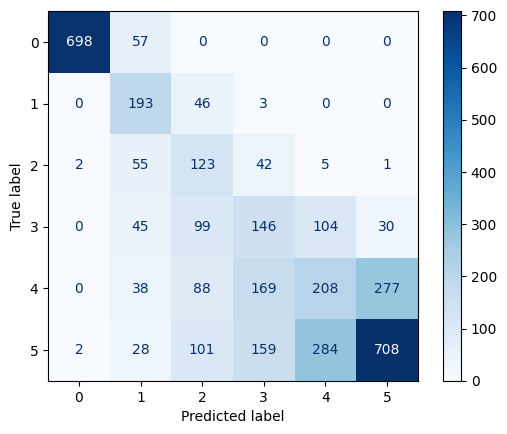

              precision    recall  f1-score   support

           0       0.99      0.92      0.96       755
           1       0.46      0.80      0.59       242
           2       0.27      0.54      0.36       228
           3       0.28      0.34      0.31       424
           4       0.35      0.27      0.30       780
           5       0.70      0.55      0.62      1282

    accuracy                           0.56      3711
   macro avg       0.51      0.57      0.52      3711
weighted avg       0.59      0.56      0.57      3711

Epoch 1/100
130/130 [==============================] - ETA: 0s - loss: 1.3135 - sparse_categorical_accuracy: 0.5026
Epoch 1: val_loss improved from inf to 1.09693, saving model to CustomModel_indi_Res_5.weights.hdf5
130/130 [==============================] - 4s 24ms/step - loss: 1.3135 - sparse_categorical_accuracy: 0.5026 - val_loss: 1.0969 - val_sparse_categorical_accuracy: 0.5058 - lr: 1.6000e-06
Epoch 2/100
  7/130 [>.............................] -

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


130/130 [==============================] - ETA: 0s - loss: 1.2473 - sparse_categorical_accuracy: 0.5104
Epoch 2: val_loss did not improve from 1.09693
130/130 [==============================] - 3s 23ms/step - loss: 1.2473 - sparse_categorical_accuracy: 0.5104 - val_loss: 1.0990 - val_sparse_categorical_accuracy: 0.4942 - lr: 1.6000e-06
Epoch 3/100
130/130 [==============================] - ETA: 0s - loss: 1.2773 - sparse_categorical_accuracy: 0.5036
Epoch 3: val_loss improved from 1.09693 to 1.09630, saving model to CustomModel_indi_Res_5.weights.hdf5
130/130 [==============================] - 3s 23ms/step - loss: 1.2773 - sparse_categorical_accuracy: 0.5036 - val_loss: 1.0963 - val_sparse_categorical_accuracy: 0.4885 - lr: 1.6000e-06
Epoch 4/100
130/130 [==============================] - ETA: 0s - loss: 1.2774 - sparse_categorical_accuracy: 0.5055
Epoch 4: val_loss improved from 1.09630 to 1.09274, saving model to CustomModel_indi_Res_5.weights.hdf5
130/130 [==========================

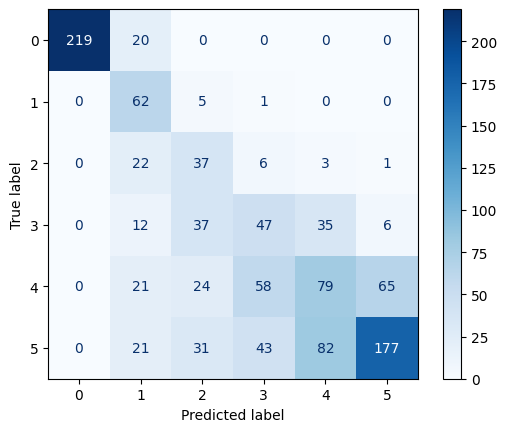

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       239
           1       0.39      0.91      0.55        68
           2       0.28      0.54      0.36        69
           3       0.30      0.34      0.32       137
           4       0.40      0.32      0.35       247
           5       0.71      0.50      0.59       354

    accuracy                           0.56      1114
   macro avg       0.51      0.59      0.52      1114
weighted avg       0.61      0.56      0.57      1114

[ 0  2  3  4  5  6  7  8  9 10 11]
[1]
Epoch 1/50
349/350 [============================>.] - ETA: 0s - loss: 1.2508 - sparse_categorical_accuracy: 0.5100
Epoch 1: val_loss improved from inf to 1.16301, saving model to CustomModel_Res_5.weights.hdf5
350/350 [==============================] - 30s 83ms/step - loss: 1.2504 - sparse_categorical_accuracy: 0.5102 - val_loss: 1.1630 - val_sparse_categorical_accuracy: 0.5912 - lr: 0.0010
Epoch 2/50
  2/350 [....

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


349/350 [============================>.] - ETA: 0s - loss: 1.1377 - sparse_categorical_accuracy: 0.5482
Epoch 2: val_loss did not improve from 1.16301
350/350 [==============================] - 29s 82ms/step - loss: 1.1373 - sparse_categorical_accuracy: 0.5483 - val_loss: 3.1472 - val_sparse_categorical_accuracy: 0.3176 - lr: 0.0010
Epoch 3/50
349/350 [============================>.] - ETA: 0s - loss: 1.1229 - sparse_categorical_accuracy: 0.5461
Epoch 3: val_loss improved from 1.16301 to 0.92379, saving model to CustomModel_Res_5.weights.hdf5
350/350 [==============================] - 29s 82ms/step - loss: 1.1226 - sparse_categorical_accuracy: 0.5462 - val_loss: 0.9238 - val_sparse_categorical_accuracy: 0.5876 - lr: 0.0010
Epoch 4/50
349/350 [============================>.] - ETA: 0s - loss: 1.0881 - sparse_categorical_accuracy: 0.5607
Epoch 4: val_loss did not improve from 0.92379
350/350 [==============================] - 28s 80ms/step - loss: 1.0879 - sparse_categorical_accuracy: 0.

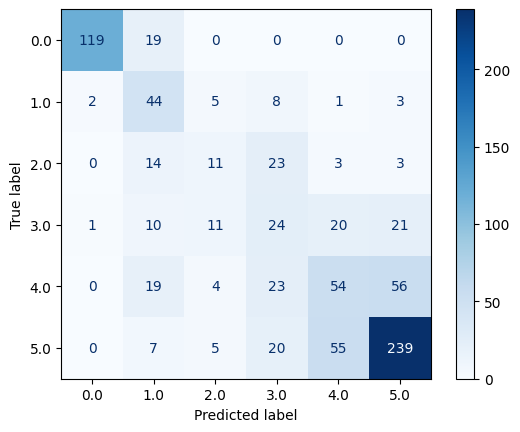

              precision    recall  f1-score   support

         0.0       0.98      0.86      0.92       138
         1.0       0.39      0.70      0.50        63
         2.0       0.31      0.20      0.24        54
         3.0       0.24      0.28      0.26        87
         4.0       0.41      0.35      0.37       156
         5.0       0.74      0.73      0.74       326

    accuracy                           0.60       824
   macro avg       0.51      0.52      0.51       824
weighted avg       0.61      0.60      0.60       824

Epoch 1/100
28/29 [===========================>..] - ETA: 0s - loss: 1.2884 - sparse_categorical_accuracy: 0.4821
Epoch 1: val_loss improved from inf to 0.91481, saving model to CustomModel_indi_Res_5.weights.hdf5
29/29 [==============================] - 1s 24ms/step - loss: 1.2788 - sparse_categorical_accuracy: 0.4826 - val_loss: 0.9148 - val_sparse_categorical_accuracy: 0.5259 - lr: 1.6000e-06
Epoch 2/100
 7/29 [======>.......................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/29 [===========================>..] - ETA: 0s - loss: 1.3705 - sparse_categorical_accuracy: 0.4643
Epoch 2: val_loss improved from 0.91481 to 0.89252, saving model to CustomModel_indi_Res_5.weights.hdf5
29/29 [==============================] - 1s 24ms/step - loss: 1.3614 - sparse_categorical_accuracy: 0.4587 - val_loss: 0.8925 - val_sparse_categorical_accuracy: 0.5690 - lr: 1.6000e-06
Epoch 3/100
28/29 [===========================>..] - ETA: 0s - loss: 1.2798 - sparse_categorical_accuracy: 0.4911
Epoch 3: val_loss did not improve from 0.89252
29/29 [==============================] - 1s 22ms/step - loss: 1.2813 - sparse_categorical_accuracy: 0.4891 - val_loss: 0.9030 - val_sparse_categorical_accuracy: 0.5862 - lr: 1.6000e-06
Epoch 4/100
28/29 [===========================>..] - ETA: 0s - loss: 1.2816 - sparse_categorical_accuracy: 0.4732
Epoch 4: val_loss did not improve from 0.89252
29/29 [==============================] - 1s 23ms/step - loss: 1.2684 - sparse_categorical_accuracy: 0.

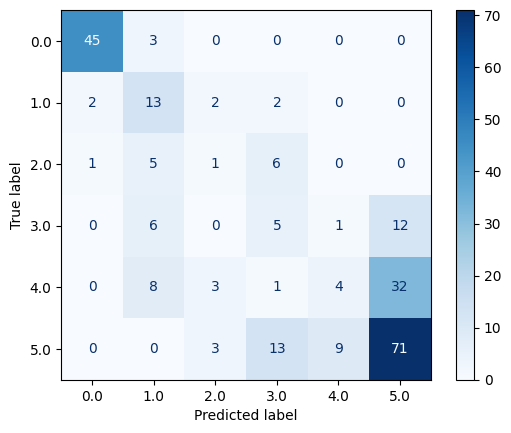

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        48
         1.0       0.37      0.68      0.48        19
         2.0       0.11      0.08      0.09        13
         3.0       0.19      0.21      0.20        24
         4.0       0.29      0.08      0.13        48
         5.0       0.62      0.74      0.67        96

    accuracy                           0.56       248
   macro avg       0.42      0.45      0.42       248
weighted avg       0.53      0.56      0.53       248

[ 0  1  3  4  5  6  7  8  9 10 11]
[2]
Epoch 1/50
333/333 [==============================] - ETA: 0s - loss: 1.2455 - sparse_categorical_accuracy: 0.5206
Epoch 1: val_loss improved from inf to 1.03486, saving model to CustomModel_Res_5.weights.hdf5
333/333 [==============================] - 28s 82ms/step - loss: 1.2455 - sparse_categorical_accuracy: 0.5206 - val_loss: 1.0349 - val_sparse_categorical_accuracy: 0.5722 - lr: 0.0010
Epoch 2/50
  2/333 [....

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


333/333 [==============================] - ETA: 0s - loss: 1.1403 - sparse_categorical_accuracy: 0.5460
Epoch 2: val_loss did not improve from 1.03486
333/333 [==============================] - 27s 80ms/step - loss: 1.1403 - sparse_categorical_accuracy: 0.5460 - val_loss: 1.1412 - val_sparse_categorical_accuracy: 0.5131 - lr: 0.0010
Epoch 3/50
333/333 [==============================] - ETA: 0s - loss: 1.1196 - sparse_categorical_accuracy: 0.5522
Epoch 3: val_loss did not improve from 1.03486
333/333 [==============================] - 27s 80ms/step - loss: 1.1196 - sparse_categorical_accuracy: 0.5522 - val_loss: 1.0680 - val_sparse_categorical_accuracy: 0.5617 - lr: 0.0010
Epoch 4/50
333/333 [==============================] - ETA: 0s - loss: 1.1040 - sparse_categorical_accuracy: 0.5588
Epoch 4: val_loss did not improve from 1.03486

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
333/333 [==============================] - 27s 80ms/step - loss: 1.1040 - spars

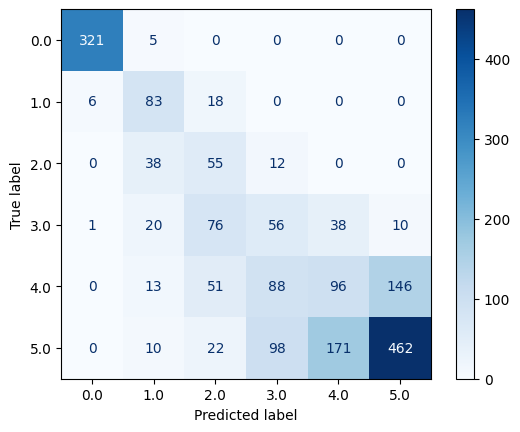

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       326
         1.0       0.49      0.78      0.60       107
         2.0       0.25      0.52      0.34       105
         3.0       0.22      0.28      0.25       201
         4.0       0.31      0.24      0.27       394
         5.0       0.75      0.61      0.67       763

    accuracy                           0.57      1896
   macro avg       0.50      0.57      0.52      1896
weighted avg       0.60      0.57      0.57      1896

Epoch 1/100
64/67 [===========================>..] - ETA: 0s - loss: 1.2104 - sparse_categorical_accuracy: 0.5234
Epoch 1: val_loss improved from inf to 0.97861, saving model to CustomModel_indi_Res_5.weights.hdf5
67/67 [==============================] - 2s 23ms/step - loss: 1.2224 - sparse_categorical_accuracy: 0.5184 - val_loss: 0.9786 - val_sparse_categorical_accuracy: 0.5414 - lr: 1.6000e-06
Epoch 2/100
 7/67 [==>...........................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


64/67 [===========================>..] - ETA: 0s - loss: 1.2630 - sparse_categorical_accuracy: 0.5264
Epoch 2: val_loss improved from 0.97861 to 0.97687, saving model to CustomModel_indi_Res_5.weights.hdf5
67/67 [==============================] - 2s 23ms/step - loss: 1.2491 - sparse_categorical_accuracy: 0.5287 - val_loss: 0.9769 - val_sparse_categorical_accuracy: 0.5338 - lr: 1.6000e-06
Epoch 3/100
64/67 [===========================>..] - ETA: 0s - loss: 1.2136 - sparse_categorical_accuracy: 0.5137
Epoch 3: val_loss improved from 0.97687 to 0.96780, saving model to CustomModel_indi_Res_5.weights.hdf5
67/67 [==============================] - 2s 22ms/step - loss: 1.2502 - sparse_categorical_accuracy: 0.5137 - val_loss: 0.9678 - val_sparse_categorical_accuracy: 0.5301 - lr: 1.6000e-06
Epoch 4/100
64/67 [===========================>..] - ETA: 0s - loss: 1.2886 - sparse_categorical_accuracy: 0.5225
Epoch 4: val_loss improved from 0.96780 to 0.95968, saving model to CustomModel_indi_Res_5.w

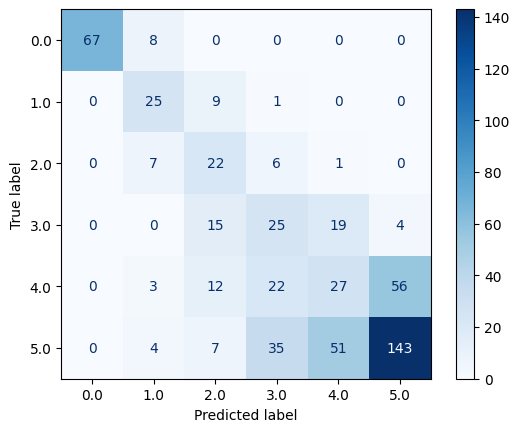

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94        75
         1.0       0.53      0.71      0.61        35
         2.0       0.34      0.61      0.44        36
         3.0       0.28      0.40      0.33        63
         4.0       0.28      0.23      0.25       120
         5.0       0.70      0.60      0.65       240

    accuracy                           0.54       569
   macro avg       0.52      0.57      0.54       569
weighted avg       0.57      0.54      0.55       569

[ 0  1  2  4  5  6  7  8  9 10 11]
[3]
Epoch 1/50
328/328 [==============================] - ETA: 0s - loss: 1.2422 - sparse_categorical_accuracy: 0.5167
Epoch 1: val_loss improved from inf to 1.87215, saving model to CustomModel_Res_5.weights.hdf5
328/328 [==============================] - 29s 84ms/step - loss: 1.2422 - sparse_categorical_accuracy: 0.5167 - val_loss: 1.8722 - val_sparse_categorical_accuracy: 0.4700 - lr: 0.0010
Epoch 2/50
  2/328 [....

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


328/328 [==============================] - ETA: 0s - loss: 1.1373 - sparse_categorical_accuracy: 0.5474
Epoch 2: val_loss improved from 1.87215 to 0.98984, saving model to CustomModel_Res_5.weights.hdf5
328/328 [==============================] - 27s 83ms/step - loss: 1.1373 - sparse_categorical_accuracy: 0.5474 - val_loss: 0.9898 - val_sparse_categorical_accuracy: 0.5870 - lr: 0.0010
Epoch 3/50
328/328 [==============================] - ETA: 0s - loss: 1.1244 - sparse_categorical_accuracy: 0.5513
Epoch 3: val_loss improved from 0.98984 to 0.97372, saving model to CustomModel_Res_5.weights.hdf5
328/328 [==============================] - 27s 83ms/step - loss: 1.1244 - sparse_categorical_accuracy: 0.5513 - val_loss: 0.9737 - val_sparse_categorical_accuracy: 0.5820 - lr: 0.0010
Epoch 4/50
328/328 [==============================] - ETA: 0s - loss: 1.1148 - sparse_categorical_accuracy: 0.5531
Epoch 4: val_loss did not improve from 0.97372
328/328 [==============================] - 27s 83ms/s

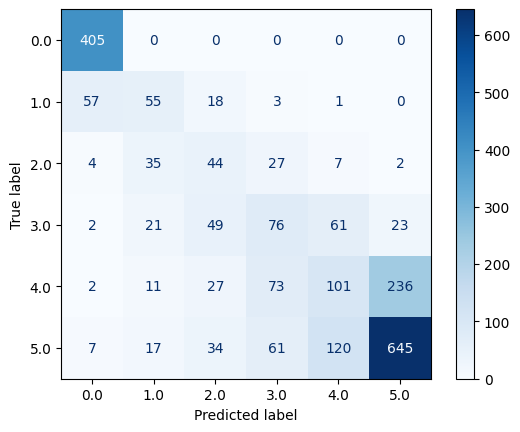

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       405
         1.0       0.40      0.41      0.40       134
         2.0       0.26      0.37      0.30       119
         3.0       0.32      0.33      0.32       232
         4.0       0.35      0.22      0.27       450
         5.0       0.71      0.73      0.72       884

    accuracy                           0.60      2224
   macro avg       0.48      0.51      0.49      2224
weighted avg       0.58      0.60      0.58      2224

Epoch 1/100
76/78 [============================>.] - ETA: 0s - loss: 1.4507 - sparse_categorical_accuracy: 0.5016
Epoch 1: val_loss improved from inf to 0.96114, saving model to CustomModel_indi_Res_5.weights.hdf5
78/78 [==============================] - 2s 24ms/step - loss: 1.4551 - sparse_categorical_accuracy: 0.5024 - val_loss: 0.9611 - val_sparse_categorical_accuracy: 0.6218 - lr: 8.0000e-06
Epoch 2/100
 7/78 [=>............................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


76/78 [============================>.] - ETA: 0s - loss: 1.3647 - sparse_categorical_accuracy: 0.5090
Epoch 2: val_loss did not improve from 0.96114
78/78 [==============================] - 2s 23ms/step - loss: 1.3531 - sparse_categorical_accuracy: 0.5105 - val_loss: 0.9834 - val_sparse_categorical_accuracy: 0.6218 - lr: 8.0000e-06
Epoch 3/100
76/78 [============================>.] - ETA: 0s - loss: 1.2095 - sparse_categorical_accuracy: 0.5370
Epoch 3: val_loss did not improve from 0.96114
78/78 [==============================] - 2s 23ms/step - loss: 1.2006 - sparse_categorical_accuracy: 0.5402 - val_loss: 0.9836 - val_sparse_categorical_accuracy: 0.6186 - lr: 8.0000e-06
Epoch 4/100
76/78 [============================>.] - ETA: 0s - loss: 1.3667 - sparse_categorical_accuracy: 0.5099
Epoch 4: val_loss did not improve from 0.96114

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
78/78 [==============================] - 2s 23ms/step - loss: 1.3565 - sparse_cat

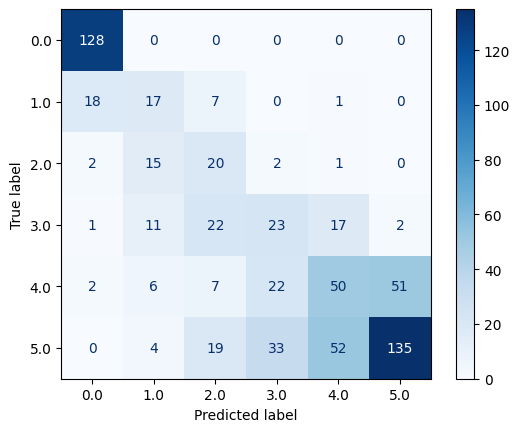

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       128
         1.0       0.32      0.40      0.35        43
         2.0       0.27      0.50      0.35        40
         3.0       0.29      0.30      0.29        76
         4.0       0.41      0.36      0.39       138
         5.0       0.72      0.56      0.63       243

    accuracy                           0.56       668
   macro avg       0.48      0.52      0.49       668
weighted avg       0.58      0.56      0.56       668

[ 0  1  2  3  5  6  7  8  9 10 11]
[4]
Epoch 1/50
339/339 [==============================] - ETA: 0s - loss: 1.2417 - sparse_categorical_accuracy: 0.5188
Epoch 1: val_loss improved from inf to 1.64394, saving model to CustomModel_Res_5.weights.hdf5
339/339 [==============================] - 30s 84ms/step - loss: 1.2417 - sparse_categorical_accuracy: 0.5188 - val_loss: 1.6439 - val_sparse_categorical_accuracy: 0.5510 - lr: 0.0010
Epoch 2/50
  2/339 [....

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


339/339 [==============================] - ETA: 0s - loss: 1.1568 - sparse_categorical_accuracy: 0.5402
Epoch 2: val_loss improved from 1.64394 to 1.05448, saving model to CustomModel_Res_5.weights.hdf5
339/339 [==============================] - 28s 83ms/step - loss: 1.1568 - sparse_categorical_accuracy: 0.5402 - val_loss: 1.0545 - val_sparse_categorical_accuracy: 0.5984 - lr: 0.0010
Epoch 3/50
339/339 [==============================] - ETA: 0s - loss: 1.1069 - sparse_categorical_accuracy: 0.5491
Epoch 3: val_loss improved from 1.05448 to 0.92649, saving model to CustomModel_Res_5.weights.hdf5
339/339 [==============================] - 28s 83ms/step - loss: 1.1069 - sparse_categorical_accuracy: 0.5491 - val_loss: 0.9265 - val_sparse_categorical_accuracy: 0.5879 - lr: 0.0010
Epoch 4/50
339/339 [==============================] - ETA: 0s - loss: 1.1052 - sparse_categorical_accuracy: 0.5531
Epoch 4: val_loss improved from 0.92649 to 0.87928, saving model to CustomModel_Res_5.weights.hdf5
3

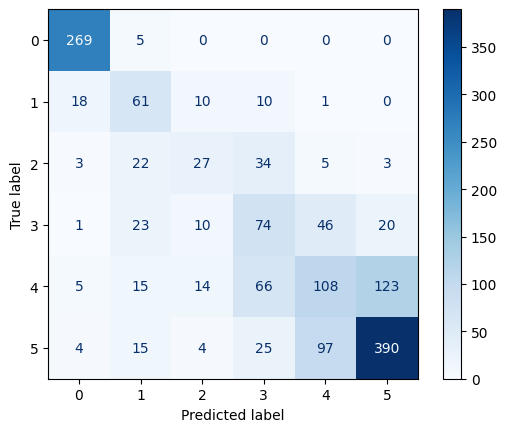

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       274
           1       0.43      0.61      0.51       100
           2       0.42      0.29      0.34        94
           3       0.35      0.43      0.39       174
           4       0.42      0.33      0.37       331
           5       0.73      0.73      0.73       535

    accuracy                           0.62      1508
   macro avg       0.54      0.56      0.54      1508
weighted avg       0.61      0.62      0.61      1508

Epoch 1/100
52/53 [============================>.] - ETA: 0s - loss: 1.2661 - sparse_categorical_accuracy: 0.5685
Epoch 1: val_loss improved from inf to 0.82492, saving model to CustomModel_indi_Res_5.weights.hdf5
53/53 [==============================] - 2s 28ms/step - loss: 1.2675 - sparse_categorical_accuracy: 0.5675 - val_loss: 0.8249 - val_sparse_categorical_accuracy: 0.6540 - lr: 8.0000e-06
Epoch 2/100
 7/53 [==>...........................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


52/53 [============================>.] - ETA: 0s - loss: 1.2767 - sparse_categorical_accuracy: 0.5361
Epoch 2: val_loss did not improve from 0.82492
53/53 [==============================] - 1s 24ms/step - loss: 1.2715 - sparse_categorical_accuracy: 0.5391 - val_loss: 0.8528 - val_sparse_categorical_accuracy: 0.5924 - lr: 8.0000e-06
Epoch 3/100
52/53 [============================>.] - ETA: 0s - loss: 1.2874 - sparse_categorical_accuracy: 0.5409
Epoch 3: val_loss did not improve from 0.82492
53/53 [==============================] - 1s 23ms/step - loss: 1.2866 - sparse_categorical_accuracy: 0.5403 - val_loss: 0.8760 - val_sparse_categorical_accuracy: 0.5640 - lr: 8.0000e-06
Epoch 4/100
52/53 [============================>.] - ETA: 0s - loss: 1.2011 - sparse_categorical_accuracy: 0.5721
Epoch 4: val_loss did not improve from 0.82492

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
53/53 [==============================] - 1s 23ms/step - loss: 1.1996 - sparse_cat

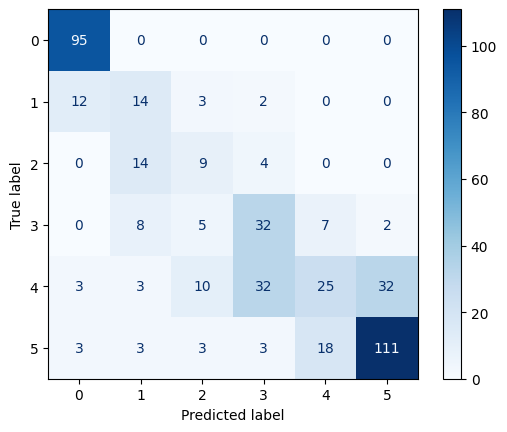

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        95
           1       0.33      0.45      0.38        31
           2       0.30      0.33      0.32        27
           3       0.44      0.59      0.50        54
           4       0.50      0.24      0.32       105
           5       0.77      0.79      0.78       141

    accuracy                           0.63       453
   macro avg       0.53      0.57      0.54       453
weighted avg       0.62      0.63      0.61       453

[ 0  1  2  3  4  6  7  8  9 10 11]
[5]
Epoch 1/50
328/328 [==============================] - ETA: 0s - loss: 1.2528 - sparse_categorical_accuracy: 0.5035
Epoch 1: val_loss improved from inf to 1.50939, saving model to CustomModel_Res_5.weights.hdf5
328/328 [==============================] - 29s 84ms/step - loss: 1.2528 - sparse_categorical_accuracy: 0.5035 - val_loss: 1.5094 - val_sparse_categorical_accuracy: 0.5655 - lr: 0.0010
Epoch 2/50
  2/328 [....

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


328/328 [==============================] - ETA: 0s - loss: 1.1631 - sparse_categorical_accuracy: 0.5323
Epoch 2: val_loss improved from 1.50939 to 1.05830, saving model to CustomModel_Res_5.weights.hdf5
328/328 [==============================] - 27s 83ms/step - loss: 1.1631 - sparse_categorical_accuracy: 0.5323 - val_loss: 1.0583 - val_sparse_categorical_accuracy: 0.5741 - lr: 0.0010
Epoch 3/50
328/328 [==============================] - ETA: 0s - loss: 1.1412 - sparse_categorical_accuracy: 0.5355
Epoch 3: val_loss did not improve from 1.05830
328/328 [==============================] - 27s 83ms/step - loss: 1.1412 - sparse_categorical_accuracy: 0.5355 - val_loss: 1.0610 - val_sparse_categorical_accuracy: 0.5710 - lr: 0.0010
Epoch 4/50
328/328 [==============================] - ETA: 0s - loss: 1.1164 - sparse_categorical_accuracy: 0.5381
Epoch 4: val_loss improved from 1.05830 to 0.92021, saving model to CustomModel_Res_5.weights.hdf5
328/328 [==============================] - 27s 83ms/s

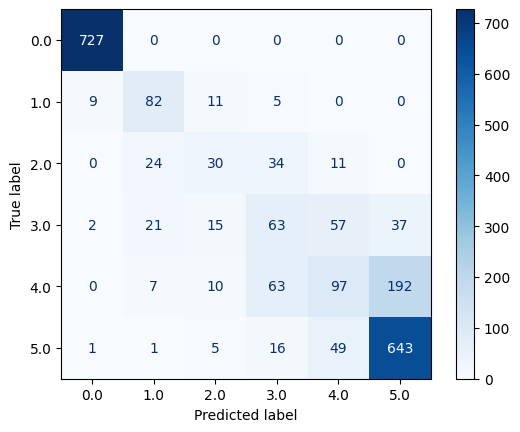

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       727
         1.0       0.61      0.77      0.68       107
         2.0       0.42      0.30      0.35        99
         3.0       0.35      0.32      0.34       195
         4.0       0.45      0.26      0.33       369
         5.0       0.74      0.90      0.81       715

    accuracy                           0.74      2212
   macro avg       0.59      0.59      0.58      2212
weighted avg       0.72      0.74      0.72      2212

Epoch 1/100
76/78 [============================>.] - ETA: 0s - loss: 1.2925 - sparse_categorical_accuracy: 0.5740
Epoch 1: val_loss improved from inf to 0.74954, saving model to CustomModel_indi_Res_5.weights.hdf5
78/78 [==============================] - 2s 23ms/step - loss: 1.2835 - sparse_categorical_accuracy: 0.5775 - val_loss: 0.7495 - val_sparse_categorical_accuracy: 0.7000 - lr: 8.0000e-06
Epoch 2/100
 7/78 [=>............................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


76/78 [============================>.] - ETA: 0s - loss: 1.1626 - sparse_categorical_accuracy: 0.5970
Epoch 2: val_loss improved from 0.74954 to 0.72231, saving model to CustomModel_indi_Res_5.weights.hdf5
78/78 [==============================] - 2s 23ms/step - loss: 1.1797 - sparse_categorical_accuracy: 0.5961 - val_loss: 0.7223 - val_sparse_categorical_accuracy: 0.7387 - lr: 8.0000e-06
Epoch 3/100
76/78 [============================>.] - ETA: 0s - loss: 1.1151 - sparse_categorical_accuracy: 0.6135
Epoch 3: val_loss did not improve from 0.72231
78/78 [==============================] - 2s 22ms/step - loss: 1.1190 - sparse_categorical_accuracy: 0.6107 - val_loss: 0.7390 - val_sparse_categorical_accuracy: 0.7032 - lr: 8.0000e-06
Epoch 4/100
76/78 [============================>.] - ETA: 0s - loss: 1.1805 - sparse_categorical_accuracy: 0.5905
Epoch 4: val_loss did not improve from 0.72231
78/78 [==============================] - 2s 23ms/step - loss: 1.1712 - sparse_categorical_accuracy: 0.

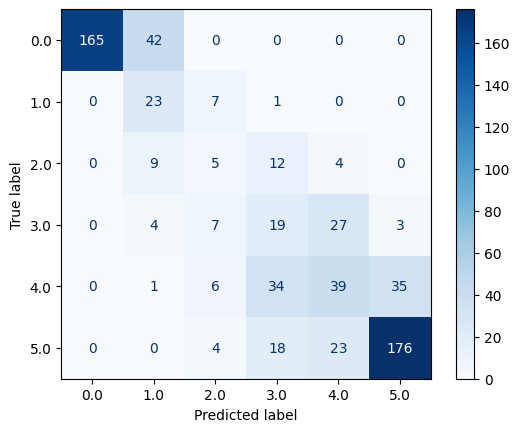

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89       207
         1.0       0.29      0.74      0.42        31
         2.0       0.17      0.17      0.17        30
         3.0       0.23      0.32      0.26        60
         4.0       0.42      0.34      0.38       115
         5.0       0.82      0.80      0.81       221

    accuracy                           0.64       664
   macro avg       0.49      0.53      0.49       664
weighted avg       0.70      0.64      0.66       664

[ 0  1  2  3  4  5  7  8  9 10 11]
[6]
Epoch 1/50
347/348 [============================>.] - ETA: 0s - loss: 1.2408 - sparse_categorical_accuracy: 0.5132
Epoch 1: val_loss improved from inf to 1.14755, saving model to CustomModel_Res_5.weights.hdf5
348/348 [==============================] - 30s 84ms/step - loss: 1.2405 - sparse_categorical_accuracy: 0.5131 - val_loss: 1.1475 - val_sparse_categorical_accuracy: 0.5738 - lr: 0.0010
Epoch 2/50
  2/348 [....

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


347/348 [============================>.] - ETA: 0s - loss: 1.1302 - sparse_categorical_accuracy: 0.5464
Epoch 2: val_loss improved from 1.14755 to 0.89869, saving model to CustomModel_Res_5.weights.hdf5
348/348 [==============================] - 29s 83ms/step - loss: 1.1311 - sparse_categorical_accuracy: 0.5463 - val_loss: 0.8987 - val_sparse_categorical_accuracy: 0.6277 - lr: 0.0010
Epoch 3/50
347/348 [============================>.] - ETA: 0s - loss: 1.1302 - sparse_categorical_accuracy: 0.5426
Epoch 3: val_loss did not improve from 0.89869
348/348 [==============================] - 29s 83ms/step - loss: 1.1299 - sparse_categorical_accuracy: 0.5427 - val_loss: 1.2503 - val_sparse_categorical_accuracy: 0.5208 - lr: 0.0010
Epoch 4/50
347/348 [============================>.] - ETA: 0s - loss: 1.1071 - sparse_categorical_accuracy: 0.5564
Epoch 4: val_loss did not improve from 0.89869
348/348 [==============================] - 29s 83ms/step - loss: 1.1069 - sparse_categorical_accuracy: 0.

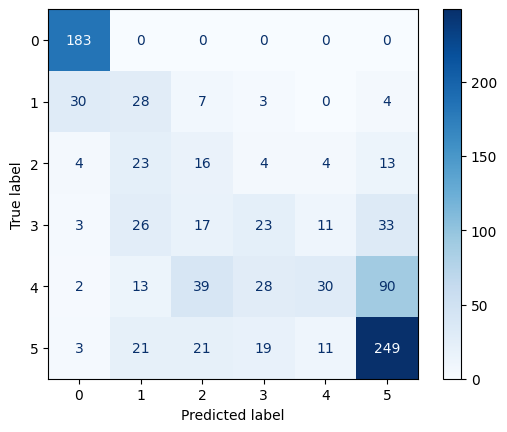

              precision    recall  f1-score   support

           0       0.81      1.00      0.90       183
           1       0.25      0.39      0.31        72
           2       0.16      0.25      0.20        64
           3       0.30      0.20      0.24       113
           4       0.54      0.15      0.23       202
           5       0.64      0.77      0.70       324

    accuracy                           0.55       958
   macro avg       0.45      0.46      0.43       958
weighted avg       0.55      0.55      0.52       958

Epoch 1/100
34/34 [==============================] - ETA: 0s - loss: 1.3543 - sparse_categorical_accuracy: 0.5149
Epoch 1: val_loss improved from inf to 0.83133, saving model to CustomModel_indi_Res_5.weights.hdf5
34/34 [==============================] - 2s 29ms/step - loss: 1.3543 - sparse_categorical_accuracy: 0.5149 - val_loss: 0.8313 - val_sparse_categorical_accuracy: 0.5896 - lr: 8.0000e-06
Epoch 2/100
 7/34 [=====>........................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


34/34 [==============================] - ETA: 0s - loss: 1.3151 - sparse_categorical_accuracy: 0.5149
Epoch 2: val_loss improved from 0.83133 to 0.82805, saving model to CustomModel_indi_Res_5.weights.hdf5
34/34 [==============================] - 1s 25ms/step - loss: 1.3151 - sparse_categorical_accuracy: 0.5149 - val_loss: 0.8281 - val_sparse_categorical_accuracy: 0.5970 - lr: 8.0000e-06
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 1.2772 - sparse_categorical_accuracy: 0.5037
Epoch 3: val_loss improved from 0.82805 to 0.82579, saving model to CustomModel_indi_Res_5.weights.hdf5
34/34 [==============================] - 1s 24ms/step - loss: 1.2772 - sparse_categorical_accuracy: 0.5037 - val_loss: 0.8258 - val_sparse_categorical_accuracy: 0.6269 - lr: 8.0000e-06
Epoch 4/100
34/34 [==============================] - ETA: 0s - loss: 1.2590 - sparse_categorical_accuracy: 0.5373
Epoch 4: val_loss improved from 0.82579 to 0.82472, saving model to CustomModel_indi_Res_5.w

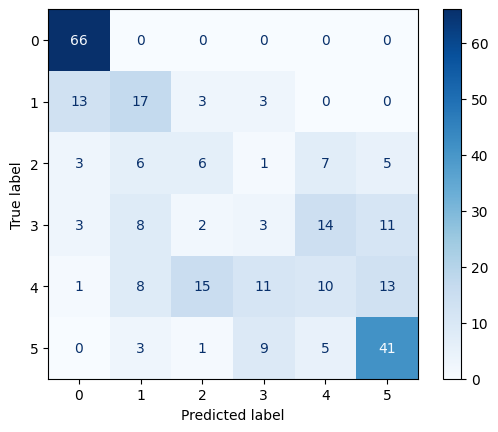

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        66
           1       0.40      0.47      0.44        36
           2       0.22      0.21      0.22        28
           3       0.11      0.07      0.09        41
           4       0.28      0.17      0.21        58
           5       0.59      0.69      0.64        59

    accuracy                           0.50       288
   macro avg       0.39      0.44      0.41       288
weighted avg       0.44      0.50      0.46       288

[ 0  1  2  3  4  5  6  8  9 10 11]
[7]
Epoch 1/50
305/305 [==============================] - ETA: 0s - loss: 1.2381 - sparse_categorical_accuracy: 0.5176
Epoch 1: val_loss improved from inf to 1.06764, saving model to CustomModel_Res_5.weights.hdf5
305/305 [==============================] - 26s 83ms/step - loss: 1.2381 - sparse_categorical_accuracy: 0.5176 - val_loss: 1.0676 - val_sparse_categorical_accuracy: 0.5777 - lr: 0.0010
Epoch 2/50
  2/305 [....

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


305/305 [==============================] - ETA: 0s - loss: 1.1566 - sparse_categorical_accuracy: 0.5316
Epoch 2: val_loss improved from 1.06764 to 0.93925, saving model to CustomModel_Res_5.weights.hdf5
305/305 [==============================] - 25s 82ms/step - loss: 1.1566 - sparse_categorical_accuracy: 0.5316 - val_loss: 0.9392 - val_sparse_categorical_accuracy: 0.6192 - lr: 0.0010
Epoch 3/50
305/305 [==============================] - ETA: 0s - loss: 1.1345 - sparse_categorical_accuracy: 0.5378
Epoch 3: val_loss did not improve from 0.93925
305/305 [==============================] - 25s 82ms/step - loss: 1.1345 - sparse_categorical_accuracy: 0.5378 - val_loss: 1.2366 - val_sparse_categorical_accuracy: 0.3920 - lr: 0.0010
Epoch 4/50
305/305 [==============================] - ETA: 0s - loss: 1.0998 - sparse_categorical_accuracy: 0.5512
Epoch 4: val_loss did not improve from 0.93925
305/305 [==============================] - 25s 82ms/step - loss: 1.0998 - sparse_categorical_accuracy: 0.

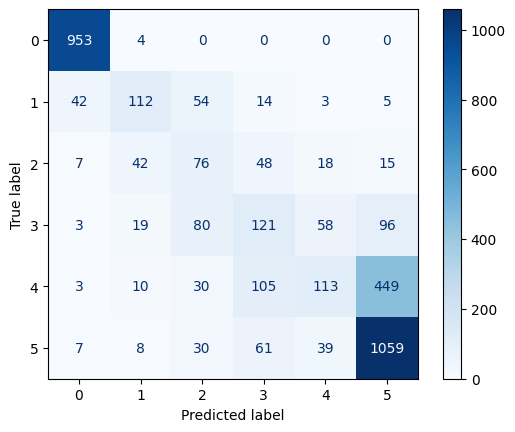

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       957
           1       0.57      0.49      0.53       230
           2       0.28      0.37      0.32       206
           3       0.35      0.32      0.33       377
           4       0.49      0.16      0.24       710
           5       0.65      0.88      0.75      1204

    accuracy                           0.66      3684
   macro avg       0.55      0.54      0.52      3684
weighted avg       0.64      0.66      0.63      3684

Epoch 1/100
127/129 [============================>.] - ETA: 0s - loss: 1.3631 - sparse_categorical_accuracy: 0.5325
Epoch 1: val_loss improved from inf to 0.72666, saving model to CustomModel_indi_Res_5.weights.hdf5
129/129 [==============================] - 4s 24ms/step - loss: 1.3599 - sparse_categorical_accuracy: 0.5320 - val_loss: 0.7267 - val_sparse_categorical_accuracy: 0.6938 - lr: 8.0000e-06
Epoch 2/100
  7/129 [>.............................] -

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


127/129 [============================>.] - ETA: 0s - loss: 1.2091 - sparse_categorical_accuracy: 0.5551
Epoch 2: val_loss did not improve from 0.72666
129/129 [==============================] - 3s 22ms/step - loss: 1.2316 - sparse_categorical_accuracy: 0.5514 - val_loss: 0.7427 - val_sparse_categorical_accuracy: 0.7035 - lr: 8.0000e-06
Epoch 3/100
127/129 [============================>.] - ETA: 0s - loss: 1.2947 - sparse_categorical_accuracy: 0.5236
Epoch 3: val_loss did not improve from 0.72666
129/129 [==============================] - 3s 22ms/step - loss: 1.2894 - sparse_categorical_accuracy: 0.5252 - val_loss: 0.7453 - val_sparse_categorical_accuracy: 0.6996 - lr: 8.0000e-06
Epoch 4/100
127/129 [============================>.] - ETA: 0s - loss: 1.2771 - sparse_categorical_accuracy: 0.5295
Epoch 4: val_loss did not improve from 0.72666

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
129/129 [==============================] - 3s 22ms/step - loss: 1.2763 

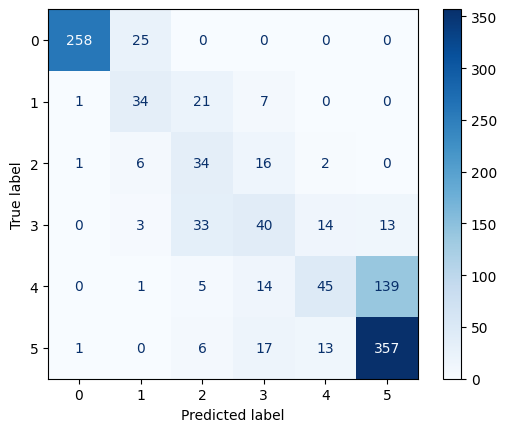

              precision    recall  f1-score   support

           0       0.99      0.91      0.95       283
           1       0.49      0.54      0.52        63
           2       0.34      0.58      0.43        59
           3       0.43      0.39      0.41       103
           4       0.61      0.22      0.32       204
           5       0.70      0.91      0.79       394

    accuracy                           0.69      1106
   macro avg       0.59      0.59      0.57      1106
weighted avg       0.70      0.69      0.67      1106

[ 0  1  2  3  4  5  6  7  9 10 11]
[8]
Epoch 1/50
349/350 [============================>.] - ETA: 0s - loss: 1.2393 - sparse_categorical_accuracy: 0.5217
Epoch 1: val_loss improved from inf to 1.33958, saving model to CustomModel_Res_5.weights.hdf5
350/350 [==============================] - 30s 82ms/step - loss: 1.2389 - sparse_categorical_accuracy: 0.5219 - val_loss: 1.3396 - val_sparse_categorical_accuracy: 0.5855 - lr: 0.0010
Epoch 2/50
  2/350 [....

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


349/350 [============================>.] - ETA: 0s - loss: 1.1279 - sparse_categorical_accuracy: 0.5489
Epoch 2: val_loss did not improve from 1.33958
350/350 [==============================] - 29s 82ms/step - loss: 1.1277 - sparse_categorical_accuracy: 0.5489 - val_loss: 1.4109 - val_sparse_categorical_accuracy: 0.3671 - lr: 0.0010
Epoch 3/50
349/350 [============================>.] - ETA: 0s - loss: 1.1102 - sparse_categorical_accuracy: 0.5549
Epoch 3: val_loss improved from 1.33958 to 0.89475, saving model to CustomModel_Res_5.weights.hdf5
350/350 [==============================] - 28s 81ms/step - loss: 1.1105 - sparse_categorical_accuracy: 0.5549 - val_loss: 0.8948 - val_sparse_categorical_accuracy: 0.6348 - lr: 0.0010
Epoch 4/50
349/350 [============================>.] - ETA: 0s - loss: 1.0880 - sparse_categorical_accuracy: 0.5627
Epoch 4: val_loss improved from 0.89475 to 0.85577, saving model to CustomModel_Res_5.weights.hdf5
350/350 [==============================] - 29s 82ms/s

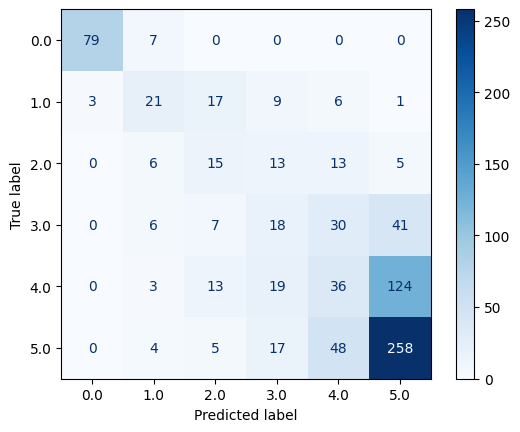

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94        86
         1.0       0.45      0.37      0.40        57
         2.0       0.26      0.29      0.28        52
         3.0       0.24      0.18      0.20       102
         4.0       0.27      0.18      0.22       195
         5.0       0.60      0.78      0.68       332

    accuracy                           0.52       824
   macro avg       0.46      0.45      0.45       824
weighted avg       0.48      0.52      0.49       824

Epoch 1/100
28/29 [===========================>..] - ETA: 0s - loss: 1.6996 - sparse_categorical_accuracy: 0.4107
Epoch 1: val_loss improved from inf to 1.00023, saving model to CustomModel_indi_Res_5.weights.hdf5
29/29 [==============================] - 1s 24ms/step - loss: 1.6754 - sparse_categorical_accuracy: 0.4152 - val_loss: 1.0002 - val_sparse_categorical_accuracy: 0.5431 - lr: 8.0000e-06
Epoch 2/100
 7/29 [======>.......................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/29 [===========================>..] - ETA: 0s - loss: 1.5693 - sparse_categorical_accuracy: 0.4062
Epoch 2: val_loss improved from 1.00023 to 0.95848, saving model to CustomModel_indi_Res_5.weights.hdf5
29/29 [==============================] - 1s 24ms/step - loss: 1.5505 - sparse_categorical_accuracy: 0.4065 - val_loss: 0.9585 - val_sparse_categorical_accuracy: 0.5517 - lr: 8.0000e-06
Epoch 3/100
28/29 [===========================>..] - ETA: 0s - loss: 1.5157 - sparse_categorical_accuracy: 0.4174
Epoch 3: val_loss improved from 0.95848 to 0.94151, saving model to CustomModel_indi_Res_5.weights.hdf5
29/29 [==============================] - 1s 23ms/step - loss: 1.5065 - sparse_categorical_accuracy: 0.4196 - val_loss: 0.9415 - val_sparse_categorical_accuracy: 0.5603 - lr: 8.0000e-06
Epoch 4/100
28/29 [===========================>..] - ETA: 0s - loss: 1.5013 - sparse_categorical_accuracy: 0.4174
Epoch 4: val_loss improved from 0.94151 to 0.92589, saving model to CustomModel_indi_Res_5.w

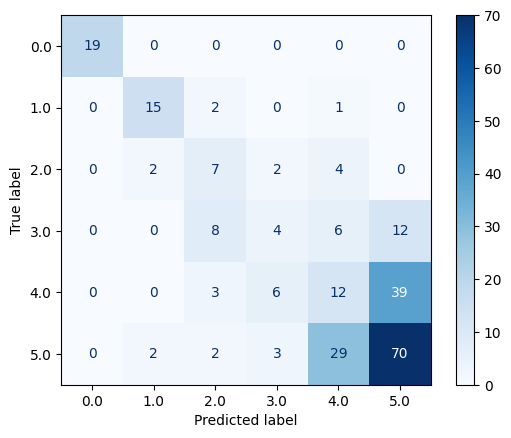

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.79      0.83      0.81        18
         2.0       0.32      0.47      0.38        15
         3.0       0.27      0.13      0.18        30
         4.0       0.23      0.20      0.21        60
         5.0       0.58      0.66      0.62       106

    accuracy                           0.51       248
   macro avg       0.53      0.55      0.53       248
weighted avg       0.49      0.51      0.50       248

[ 0  1  2  3  4  5  6  7  8 10 11]
[9]
Epoch 1/50
348/349 [============================>.] - ETA: 0s - loss: 1.2528 - sparse_categorical_accuracy: 0.5133
Epoch 1: val_loss improved from inf to 1.14348, saving model to CustomModel_Res_5.weights.hdf5
349/349 [==============================] - 30s 83ms/step - loss: 1.2522 - sparse_categorical_accuracy: 0.5133 - val_loss: 1.1435 - val_sparse_categorical_accuracy: 0.6000 - lr: 0.0010
Epoch 2/50
  2/349 [....

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


348/349 [============================>.] - ETA: 0s - loss: 1.1346 - sparse_categorical_accuracy: 0.5458
Epoch 2: val_loss did not improve from 1.14348
349/349 [==============================] - 29s 82ms/step - loss: 1.1357 - sparse_categorical_accuracy: 0.5456 - val_loss: 3.2776 - val_sparse_categorical_accuracy: 0.4050 - lr: 0.0010
Epoch 3/50
348/349 [============================>.] - ETA: 0s - loss: 1.1120 - sparse_categorical_accuracy: 0.5534
Epoch 3: val_loss did not improve from 1.14348
349/349 [==============================] - 28s 82ms/step - loss: 1.1116 - sparse_categorical_accuracy: 0.5536 - val_loss: 1.3647 - val_sparse_categorical_accuracy: 0.4700 - lr: 0.0010
Epoch 4/50
348/349 [============================>.] - ETA: 0s - loss: 1.0987 - sparse_categorical_accuracy: 0.5588
Epoch 4: val_loss improved from 1.14348 to 0.85158, saving model to CustomModel_Res_5.weights.hdf5
349/349 [==============================] - 29s 82ms/step - loss: 1.0990 - sparse_categorical_accuracy: 0.

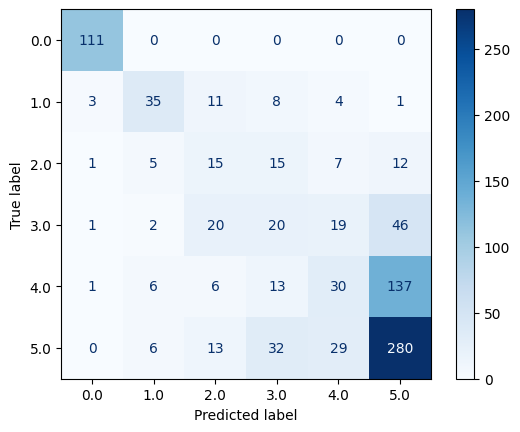

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97       111
         1.0       0.65      0.56      0.60        62
         2.0       0.23      0.27      0.25        55
         3.0       0.23      0.19      0.20       108
         4.0       0.34      0.16      0.21       193
         5.0       0.59      0.78      0.67       360

    accuracy                           0.55       889
   macro avg       0.50      0.49      0.49       889
weighted avg       0.52      0.55      0.52       889

Epoch 1/100
31/32 [============================>.] - ETA: 0s - loss: 1.4673 - sparse_categorical_accuracy: 0.5081
Epoch 1: val_loss improved from inf to 1.54799, saving model to CustomModel_indi_Res_5.weights.hdf5
32/32 [==============================] - 1s 23ms/step - loss: 1.4756 - sparse_categorical_accuracy: 0.5070 - val_loss: 1.5480 - val_sparse_categorical_accuracy: 0.4080 - lr: 8.0000e-06
Epoch 2/100
 7/32 [=====>........................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


31/32 [============================>.] - ETA: 0s - loss: 1.3702 - sparse_categorical_accuracy: 0.5423
Epoch 2: val_loss improved from 1.54799 to 1.54358, saving model to CustomModel_indi_Res_5.weights.hdf5
32/32 [==============================] - 1s 23ms/step - loss: 1.3687 - sparse_categorical_accuracy: 0.5412 - val_loss: 1.5436 - val_sparse_categorical_accuracy: 0.4080 - lr: 8.0000e-06
Epoch 3/100
31/32 [============================>.] - ETA: 0s - loss: 1.3832 - sparse_categorical_accuracy: 0.5524
Epoch 3: val_loss improved from 1.54358 to 1.54198, saving model to CustomModel_indi_Res_5.weights.hdf5
32/32 [==============================] - 1s 23ms/step - loss: 1.3816 - sparse_categorical_accuracy: 0.5513 - val_loss: 1.5420 - val_sparse_categorical_accuracy: 0.4080 - lr: 8.0000e-06
Epoch 4/100
31/32 [============================>.] - ETA: 0s - loss: 1.3749 - sparse_categorical_accuracy: 0.5262
Epoch 4: val_loss improved from 1.54198 to 1.53621, saving model to CustomModel_indi_Res_5.w

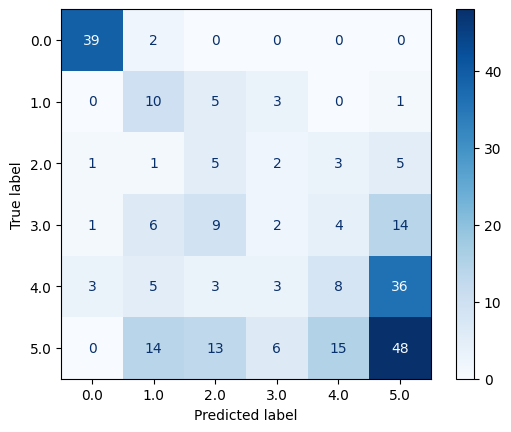

              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92        41
         1.0       0.26      0.53      0.35        19
         2.0       0.14      0.29      0.19        17
         3.0       0.12      0.06      0.08        36
         4.0       0.27      0.14      0.18        58
         5.0       0.46      0.50      0.48        96

    accuracy                           0.42       267
   macro avg       0.36      0.41      0.37       267
weighted avg       0.40      0.42      0.40       267

[ 0  1  2  3  4  5  6  7  8  9 11]
[10]
Epoch 1/50
319/319 [==============================] - ETA: 0s - loss: 1.2506 - sparse_categorical_accuracy: 0.5177
Epoch 1: val_loss improved from inf to 1.98447, saving model to CustomModel_Res_5.weights.hdf5
319/319 [==============================] - 27s 83ms/step - loss: 1.2506 - sparse_categorical_accuracy: 0.5177 - val_loss: 1.9845 - val_sparse_categorical_accuracy: 0.5368 - lr: 0.0010
Epoch 2/50
  2/319 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


319/319 [==============================] - ETA: 0s - loss: 1.1457 - sparse_categorical_accuracy: 0.5469
Epoch 2: val_loss improved from 1.98447 to 1.35975, saving model to CustomModel_Res_5.weights.hdf5
319/319 [==============================] - 26s 81ms/step - loss: 1.1457 - sparse_categorical_accuracy: 0.5469 - val_loss: 1.3598 - val_sparse_categorical_accuracy: 0.5509 - lr: 0.0010
Epoch 3/50
319/319 [==============================] - ETA: 0s - loss: 1.1215 - sparse_categorical_accuracy: 0.5584
Epoch 3: val_loss did not improve from 1.35975
319/319 [==============================] - 26s 82ms/step - loss: 1.1215 - sparse_categorical_accuracy: 0.5584 - val_loss: 1.7840 - val_sparse_categorical_accuracy: 0.4830 - lr: 0.0010
Epoch 4/50
319/319 [==============================] - ETA: 0s - loss: 1.1008 - sparse_categorical_accuracy: 0.5631
Epoch 4: val_loss improved from 1.35975 to 0.86538, saving model to CustomModel_Res_5.weights.hdf5
319/319 [==============================] - 26s 82ms/s

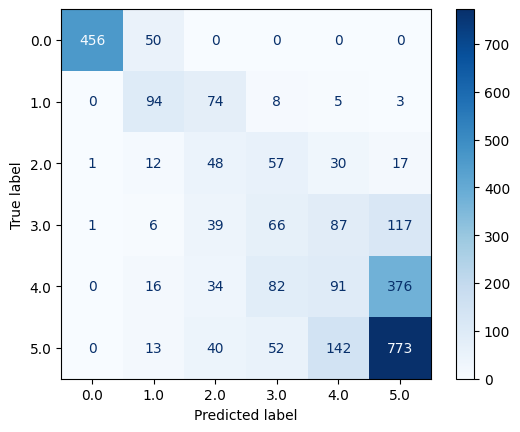

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95       506
         1.0       0.49      0.51      0.50       184
         2.0       0.20      0.29      0.24       165
         3.0       0.25      0.21      0.23       316
         4.0       0.26      0.15      0.19       599
         5.0       0.60      0.76      0.67      1020

    accuracy                           0.55      2790
   macro avg       0.47      0.47      0.46      2790
weighted avg       0.53      0.55      0.53      2790

Epoch 1/100
97/98 [============================>.] - ETA: 0s - loss: 1.3728 - sparse_categorical_accuracy: 0.4878
Epoch 1: val_loss improved from inf to 0.96264, saving model to CustomModel_indi_Res_5.weights.hdf5
98/98 [==============================] - 2s 23ms/step - loss: 1.3705 - sparse_categorical_accuracy: 0.4885 - val_loss: 0.9626 - val_sparse_categorical_accuracy: 0.5499 - lr: 8.0000e-06
Epoch 2/100
 7/98 [=>............................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/98 [============================>.] - ETA: 0s - loss: 1.3588 - sparse_categorical_accuracy: 0.4714
Epoch 2: val_loss did not improve from 0.96264
98/98 [==============================] - 2s 23ms/step - loss: 1.3546 - sparse_categorical_accuracy: 0.4744 - val_loss: 0.9785 - val_sparse_categorical_accuracy: 0.5473 - lr: 8.0000e-06
Epoch 3/100
97/98 [============================>.] - ETA: 0s - loss: 1.3155 - sparse_categorical_accuracy: 0.4845
Epoch 3: val_loss did not improve from 0.96264
98/98 [==============================] - 2s 22ms/step - loss: 1.3185 - sparse_categorical_accuracy: 0.4840 - val_loss: 0.9990 - val_sparse_categorical_accuracy: 0.5473 - lr: 8.0000e-06
Epoch 4/100
97/98 [============================>.] - ETA: 0s - loss: 1.3048 - sparse_categorical_accuracy: 0.4755
Epoch 4: val_loss did not improve from 0.96264

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
98/98 [==============================] - 2s 23ms/step - loss: 1.3052 - sparse_cat

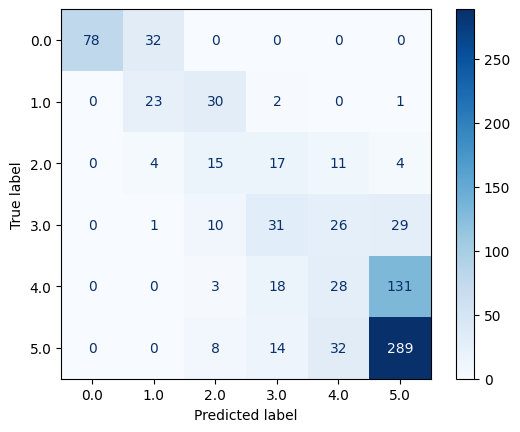

              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83       110
         1.0       0.38      0.41      0.40        56
         2.0       0.23      0.29      0.26        51
         3.0       0.38      0.32      0.35        97
         4.0       0.29      0.16      0.20       180
         5.0       0.64      0.84      0.73       343

    accuracy                           0.55       837
   macro avg       0.49      0.46      0.46       837
weighted avg       0.54      0.55      0.53       837

[ 0  1  2  3  4  5  6  7  8  9 10]
[11]
Epoch 1/50
336/337 [============================>.] - ETA: 0s - loss: 1.2364 - sparse_categorical_accuracy: 0.5154
Epoch 1: val_loss improved from inf to 1.02491, saving model to CustomModel_Res_5.weights.hdf5
337/337 [==============================] - 29s 83ms/step - loss: 1.2367 - sparse_categorical_accuracy: 0.5154 - val_loss: 1.0249 - val_sparse_categorical_accuracy: 0.6075 - lr: 0.0010
Epoch 2/50
  2/337 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


336/337 [============================>.] - ETA: 0s - loss: 1.1406 - sparse_categorical_accuracy: 0.5433
Epoch 2: val_loss did not improve from 1.02491
337/337 [==============================] - 28s 82ms/step - loss: 1.1405 - sparse_categorical_accuracy: 0.5434 - val_loss: 1.0373 - val_sparse_categorical_accuracy: 0.6056 - lr: 0.0010
Epoch 3/50
336/337 [============================>.] - ETA: 0s - loss: 1.1163 - sparse_categorical_accuracy: 0.5513
Epoch 3: val_loss improved from 1.02491 to 0.94563, saving model to CustomModel_Res_5.weights.hdf5
337/337 [==============================] - 28s 82ms/step - loss: 1.1168 - sparse_categorical_accuracy: 0.5513 - val_loss: 0.9456 - val_sparse_categorical_accuracy: 0.5936 - lr: 0.0010
Epoch 4/50
336/337 [============================>.] - ETA: 0s - loss: 1.0988 - sparse_categorical_accuracy: 0.5564
Epoch 4: val_loss did not improve from 0.94563
337/337 [==============================] - 28s 82ms/step - loss: 1.0987 - sparse_categorical_accuracy: 0.

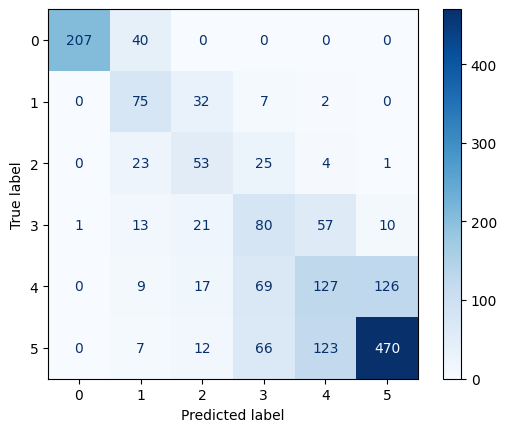

              precision    recall  f1-score   support

           0       1.00      0.84      0.91       247
           1       0.45      0.65      0.53       116
           2       0.39      0.50      0.44       106
           3       0.32      0.44      0.37       182
           4       0.41      0.36      0.38       348
           5       0.77      0.69      0.73       678

    accuracy                           0.60      1677
   macro avg       0.56      0.58      0.56      1677
weighted avg       0.63      0.60      0.61      1677

Epoch 1/100
58/59 [============================>.] - ETA: 0s - loss: 1.3080 - sparse_categorical_accuracy: 0.5065
Epoch 1: val_loss improved from inf to 1.06418, saving model to CustomModel_indi_Res_5.weights.hdf5
59/59 [==============================] - 2s 26ms/step - loss: 1.3089 - sparse_categorical_accuracy: 0.5064 - val_loss: 1.0642 - val_sparse_categorical_accuracy: 0.5787 - lr: 8.0000e-06
Epoch 2/100
 7/59 [==>...........................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


58/59 [============================>.] - ETA: 0s - loss: 1.2013 - sparse_categorical_accuracy: 0.5022
Epoch 2: val_loss did not improve from 1.06418
59/59 [==============================] - 1s 23ms/step - loss: 1.1979 - sparse_categorical_accuracy: 0.5032 - val_loss: 1.1057 - val_sparse_categorical_accuracy: 0.5660 - lr: 8.0000e-06
Epoch 3/100
58/59 [============================>.] - ETA: 0s - loss: 1.1526 - sparse_categorical_accuracy: 0.5388
Epoch 3: val_loss did not improve from 1.06418
59/59 [==============================] - 1s 23ms/step - loss: 1.1489 - sparse_categorical_accuracy: 0.5394 - val_loss: 1.1381 - val_sparse_categorical_accuracy: 0.5404 - lr: 8.0000e-06
Epoch 4/100
58/59 [============================>.] - ETA: 0s - loss: 1.2018 - sparse_categorical_accuracy: 0.5463
Epoch 4: val_loss did not improve from 1.06418

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
59/59 [==============================] - 1s 23ms/step - loss: 1.1989 - sparse_cat

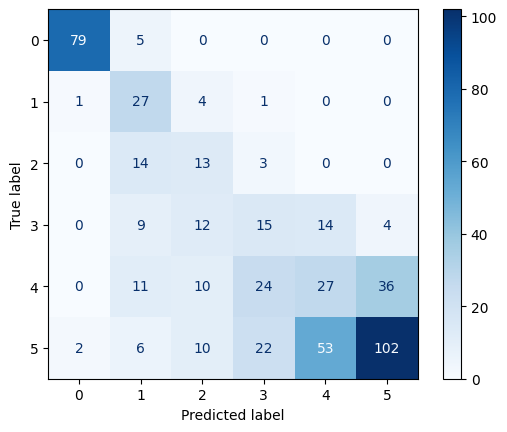

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        84
           1       0.38      0.82      0.51        33
           2       0.27      0.43      0.33        30
           3       0.23      0.28      0.25        54
           4       0.29      0.25      0.27       108
           5       0.72      0.52      0.61       195

    accuracy                           0.52       504
   macro avg       0.47      0.54      0.49       504
weighted avg       0.57      0.52      0.53       504


Mean accuracy of population: 0.5925, Standard deviation of population: 0.0580


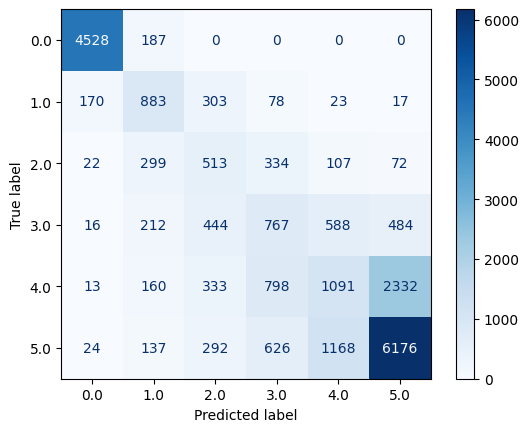

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.95      4715
         1.0       0.47      0.60      0.53      1474
         2.0       0.27      0.38      0.32      1347
         3.0       0.29      0.31      0.30      2511
         4.0       0.37      0.23      0.28      4727
         5.0       0.68      0.73      0.71      8423

    accuracy                           0.60     23197
   macro avg       0.51      0.53      0.51     23197
weighted avg       0.59      0.60      0.59     23197


Mean accuracy of individuum: 0.5577, Standard deviation of individuum: 0.0694


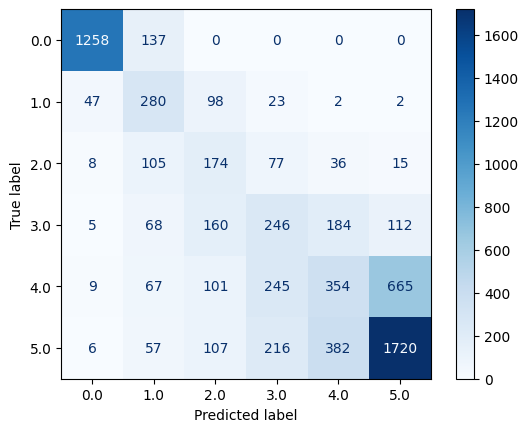

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92      1395
         1.0       0.39      0.62      0.48       452
         2.0       0.27      0.42      0.33       415
         3.0       0.30      0.32      0.31       775
         4.0       0.37      0.25      0.30      1441
         5.0       0.68      0.69      0.69      2488

    accuracy                           0.58      6966
   macro avg       0.49      0.53      0.50      6966
weighted avg       0.59      0.58      0.58      6966



In [35]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


def resnet_block(inputs, filters, kernel_size, strides):
    x = Conv1D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(filters=filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    shortcut = Conv1D(filters=filters, kernel_size=1, padding='same')(inputs)
    shortcut = BatchNormalization()(shortcut)

    output = Add()([x, shortcut])
    output = Activation('relu')(output)
    
    return x



def ResNet_5_Model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial Convolutional layer
    x = Conv1D(filters=64, kernel_size=9, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Residual blocks
    x = resnet_block(x, filters=64, kernel_size=7, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=64, kernel_size=5, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=64, kernel_size=3, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)

    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)

    # Output layer
    x = Dense(100, activation='relu')(x)
    outputs = Dense(units=num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile Model for each iteration
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

    
    return model
    





# we need 12 folds as we have 12 patients 
num_folds = 12
# we do not split them randomly so that the data of each subject remains 
kfolds = KFold(n_splits=num_folds, shuffle=False)

# empty list for accuarcy and variables of each fold which are stored
accuracies_CV_All = []
actual_labels_CV_All = []
predicted_labels_CV_All = []


accuracies_CV_indi = []
actual_labels_CV_indi = []
predicted_labels_CV_indi = []
count = 0

# itertate over each fold
for train_idx, test_idx in kfolds.split(X):
    # Split the dataset into training and validation sets for the current fold
    print(train_idx)
    print(test_idx)

    # train fold
    X_train_fold = [X[i] for i in train_idx]
    y_train_fold = [Y[i] for i in train_idx]

    # validation fold
    X_val_fold = [X_val[i] for i in train_idx]
    y_val_fold = [Y_val[i] for i in train_idx]

    # test fold
    X_test_fold = np.array([X[i] for i in test_idx])
    X_test_fold = X_test_fold.reshape(-1,48,4)

    y_test_fold = np.array([Y[i] for i in test_idx])
    y_test_fold = y_test_fold.reshape(-1,1)


    X_train_fold = np.vstack(X_train_fold)
    y_train_fold = np.vstack(y_train_fold)

    X_val_fold = np.vstack(X_val_fold)
    y_val_fold = np.vstack(y_val_fold)


    
    
    # splitting training data into training and validation for optimizing the learning rate
    # during training and early stopping
    X_train_fold, y_train_fold = shuffle(X_train_fold, y_train_fold)
    X_val_fold, y_val_fold = shuffle(X_val_fold, y_val_fold)


    X_train_indiv, X_test_indi,  y_train_indiv, y_test_indi = train_test_split(
    X_test_fold , y_test_fold , test_size=0.30, shuffle = False)

    X_train_indi, X_val_indi,  y_train_indi, y_val_indi = train_test_split(
    X_train_indiv, y_train_indiv, test_size=0.20, shuffle = False)

    # labels for the whole test data 
    actual_labels_CV_All = np.append(actual_labels_CV_All, y_test_fold)
    # labels for the individusal trained model which have less test data
    actual_labels_CV_indi = np.append(actual_labels_CV_indi, y_test_indi)

    # estimating distribution of classes
    labels_df = pd.DataFrame(y_train_fold, columns = ['label'])
    class_occurences = np.bincount(labels_df['label'])
    total = class_occurences.sum()
    number_classes = len(class_occurences)

    # assigning weights for classes, weight for last class stays 1, since its occurance is the highest
    weight_for_0 = (1/class_occurences[0]) * (total/number_classes)
    weight_for_1 = (1/class_occurences[1]) * (total/number_classes)
    weight_for_2 = (1/class_occurences[2]) * (total/number_classes)
    weight_for_3 = (1/class_occurences[3]) * (total/number_classes)
    weight_for_4 = (1/class_occurences[4]) * (total/number_classes)
    weight_for_5= (1/class_occurences[5]) * (total/number_classes)


    class_weights = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4, 5: weight_for_5}

    
    # Create a new model for each fold
    model_CV_D = ResNet_5_Model((X_train_fold.shape[1], X_train_fold.shape[2]), 6)


    # callbacks
    # Define the early stopping callback
    early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min', verbose=1, restore_best_weights=True)
    early_stopping_indi = EarlyStopping(patience=20, monitor='val_loss', mode='min', verbose=1, restore_best_weights=True)

    # initialize callbacks 
    reduceLR =ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 
    reduceLR_indi =ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 

    checkpoint = ModelCheckpoint('CustomModel_Res_5.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 
    checkpoint_indi = ModelCheckpoint('CustomModel_indi_Res_5.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 

    callbacks= [early_stopping, checkpoint, reduceLR]
    callbacks_indi= [early_stopping_indi, checkpoint_indi, reduceLR_indi]



    # Train the model on the current fold
    model_CV_D.fit(X_train_fold, y_train_fold,
    validation_data=(X_val_fold, y_val_fold),
    epochs=50,
    batch_size=64,
    callbacks=callbacks,
    class_weight = class_weights
    )

    name = "Models/ResNet_5_Population_%i.hdf5" % (count)
    model_CV_D.save(name)
    
    # Evaluate the model on the validation set
    y_pred_All = model_CV_D.predict(X_test_fold)
    y_pred_CV_All = np.argmax(y_pred_All, axis=1)
    accuracy_CV_All = accuracy_score(y_test_fold, y_pred_CV_All)
    accuracies_CV_All.append(accuracy_CV_All)

    ConfusionMatrixDisplay.from_predictions(y_test_fold, y_pred_CV_All, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/ResNet_5_Population_%i.png" % (count)
    plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_fold, y_pred_CV_All))

    predicted_labels_CV_All = np.append(predicted_labels_CV_All, y_pred_CV_All)

    

    # SECOND PART TRAIN THE MODEL FURTHER WITH 60% OF THE NEW PATIENT
    # Train the model on the current fold
    
    # estimating distribution of classes
    labels_df_indi = pd.DataFrame(y_train_indi, columns = ['label'])
    class_occurences_indi = np.bincount(labels_df_indi['label'])
    total_indi = class_occurences_indi.sum()
    number_classes_indi = len(class_occurences_indi)

    # assigning weights for classes, weight for last class stays 1, since its occurance is the highest
    weight_for_0_indi = (1/class_occurences_indi[0]) * (total_indi/number_classes_indi)
    weight_for_1_indi = (1/class_occurences_indi[1]) * (total_indi/number_classes_indi)
    weight_for_2_indi = (1/class_occurences_indi[2]) * (total_indi/number_classes_indi)
    weight_for_3_indi = (1/class_occurences_indi[3]) * (total_indi/number_classes_indi)
    weight_for_4_indi = (1/class_occurences_indi[4]) * (total_indi/number_classes_indi)
    weight_for_5_indi = (1/class_occurences_indi[5]) * (total_indi/number_classes_indi)

    class_weights_indi = {0: weight_for_0_indi, 1: weight_for_1_indi, 2: weight_for_2_indi, 3: weight_for_3_indi, 4: weight_for_4_indi, 
                     5: weight_for_5_indi}


    model_CV_D.fit(X_train_indi, y_train_indi,
    validation_data=(X_val_indi, y_val_indi),
    epochs=100,
    batch_size=16,
    callbacks=callbacks_indi,
    class_weight = class_weights_indi
    )

    name = "Models/ResNet_5_Indi_%i.hdf5" % (count)
    model_CV_D.save(name)

    # Evaluate the model on the validation set
    y_pred_indi = model_CV_D.predict(X_test_indi)
    y_pred_CV_indi = np.argmax(y_pred_indi, axis=1)
    accuracy_CV_indi = accuracy_score(y_test_indi, y_pred_CV_indi)
    accuracies_CV_indi.append(accuracy_CV_indi)

    ConfusionMatrixDisplay.from_predictions(y_test_indi, y_pred_CV_indi, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/ResNet_5_Indi_%i.png" % (count)
    plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_indi, y_pred_CV_indi))


    predicted_labels_CV_indi = np.append(predicted_labels_CV_indi, y_pred_CV_indi)

    
    count = count+1




# POPULATION
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_All = np.mean(accuracies_CV_All)
std_accuracy_CV_All = np.std(accuracies_CV_All)
# Evalaute Model and print Confusion Matrix
print(f"\nMean accuracy of population: {mean_accuracy_CV_All:.4f}, Standard deviation of population: {std_accuracy_CV_All:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_All, predicted_labels_CV_All, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/ResNet_5_Population_All.png" 
plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_All, predicted_labels_CV_All))


# INDIVIDUUM

# Evalaute Model and print Confusion Matrix
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_indi = np.mean(accuracies_CV_indi)
std_accuracy_CV_indi = np.std(accuracies_CV_indi)
print(f"\nMean accuracy of individuum: {mean_accuracy_CV_indi:.4f}, Standard deviation of individuum: {std_accuracy_CV_indi:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_indi, predicted_labels_CV_indi,  cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/ResNet_5_All_indi.png" 
plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_indi, predicted_labels_CV_indi))

### LSTM

[ 1  2  3  4  5  6  7  8  9 10 11]
[0]
Epoch 1/50
609/609 [==============================] - ETA: 0s - loss: 1.1882 - sparse_categorical_accuracy: 0.5369
Epoch 1: val_loss improved from inf to 0.95272, saving model to CustomModel_LSTM_5.weights.hdf5
609/609 [==============================] - 24s 37ms/step - loss: 1.1882 - sparse_categorical_accuracy: 0.5369 - val_loss: 0.9527 - val_sparse_categorical_accuracy: 0.5873 - lr: 0.0010
Epoch 2/50
  5/609 [..............................] - ETA: 19s - loss: 1.1764 - sparse_categorical_accuracy: 0.5188

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


609/609 [==============================] - ETA: 0s - loss: 1.0499 - sparse_categorical_accuracy: 0.5771
Epoch 2: val_loss improved from 0.95272 to 0.85753, saving model to CustomModel_LSTM_5.weights.hdf5
609/609 [==============================] - 22s 36ms/step - loss: 1.0499 - sparse_categorical_accuracy: 0.5771 - val_loss: 0.8575 - val_sparse_categorical_accuracy: 0.6398 - lr: 0.0010
Epoch 3/50
608/609 [============================>.] - ETA: 0s - loss: 1.0139 - sparse_categorical_accuracy: 0.5970
Epoch 3: val_loss did not improve from 0.85753
609/609 [==============================] - 22s 36ms/step - loss: 1.0134 - sparse_categorical_accuracy: 0.5971 - val_loss: 0.9017 - val_sparse_categorical_accuracy: 0.6031 - lr: 0.0010
Epoch 4/50
609/609 [==============================] - ETA: 0s - loss: 1.0023 - sparse_categorical_accuracy: 0.6023
Epoch 4: val_loss did not improve from 0.85753
609/609 [==============================] - 22s 36ms/step - loss: 1.0023 - sparse_categorical_accuracy: 0

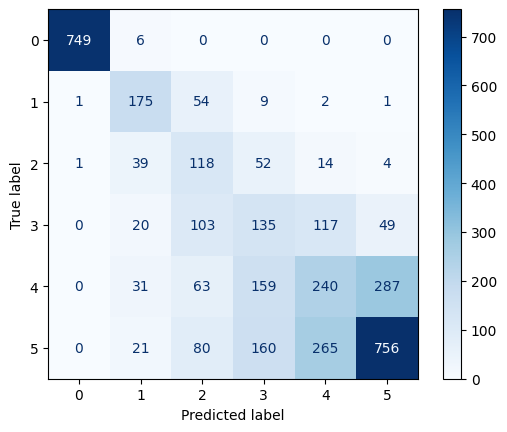

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       755
           1       0.60      0.72      0.66       242
           2       0.28      0.52      0.37       228
           3       0.26      0.32      0.29       424
           4       0.38      0.31      0.34       780
           5       0.69      0.59      0.64      1282

    accuracy                           0.59      3711
   macro avg       0.53      0.57      0.55      3711
weighted avg       0.61      0.59      0.59      3711

Epoch 1/100
129/130 [============================>.] - ETA: 0s - loss: 0.9686 - sparse_categorical_accuracy: 0.5891
Epoch 1: val_loss improved from inf to 1.04606, saving model to CustomModel_indi_LSTM_5.weights.hdf5
130/130 [==============================] - 5s 30ms/step - loss: 0.9732 - sparse_categorical_accuracy: 0.5874 - val_loss: 1.0461 - val_sparse_categorical_accuracy: 0.5750 - lr: 1.0000e-06
Epoch 2/100
  5/130 [>.............................] 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


128/130 [============================>.] - ETA: 0s - loss: 0.9664 - sparse_categorical_accuracy: 0.5840
Epoch 2: val_loss did not improve from 1.04606
130/130 [==============================] - 3s 27ms/step - loss: 0.9703 - sparse_categorical_accuracy: 0.5864 - val_loss: 1.0468 - val_sparse_categorical_accuracy: 0.5712 - lr: 1.0000e-06
Epoch 3/100
128/130 [============================>.] - ETA: 0s - loss: 0.9698 - sparse_categorical_accuracy: 0.5864
Epoch 3: val_loss did not improve from 1.04606
130/130 [==============================] - 3s 27ms/step - loss: 0.9684 - sparse_categorical_accuracy: 0.5859 - val_loss: 1.0476 - val_sparse_categorical_accuracy: 0.5673 - lr: 1.0000e-06
Epoch 4/100
128/130 [============================>.] - ETA: 0s - loss: 0.9665 - sparse_categorical_accuracy: 0.5835
Epoch 4: val_loss did not improve from 1.04606
130/130 [==============================] - 3s 27ms/step - loss: 0.9667 - sparse_categorical_accuracy: 0.5855 - val_loss: 1.0479 - val_sparse_categori

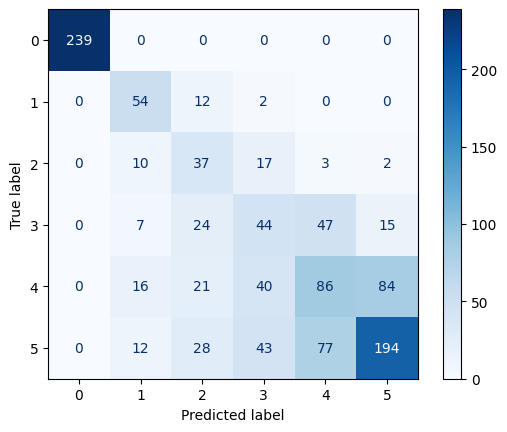

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       239
           1       0.55      0.79      0.65        68
           2       0.30      0.54      0.39        69
           3       0.30      0.32      0.31       137
           4       0.40      0.35      0.37       247
           5       0.66      0.55      0.60       354

    accuracy                           0.59      1114
   macro avg       0.54      0.59      0.55      1114
weighted avg       0.60      0.59      0.59      1114

[ 0  2  3  4  5  6  7  8  9 10 11]
[1]
Epoch 1/50
699/700 [============================>.] - ETA: 0s - loss: 1.1688 - sparse_categorical_accuracy: 0.5361
Epoch 1: val_loss improved from inf to 0.95587, saving model to CustomModel_LSTM_5.weights.hdf5
700/700 [==============================] - 28s 37ms/step - loss: 1.1687 - sparse_categorical_accuracy: 0.5360 - val_loss: 0.9559 - val_sparse_categorical_accuracy: 0.5930 - lr: 0.0010
Epoch 2/50
  5/700 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


699/700 [============================>.] - ETA: 0s - loss: 1.0394 - sparse_categorical_accuracy: 0.5743
Epoch 2: val_loss improved from 0.95587 to 0.93245, saving model to CustomModel_LSTM_5.weights.hdf5
700/700 [==============================] - 26s 36ms/step - loss: 1.0394 - sparse_categorical_accuracy: 0.5743 - val_loss: 0.9324 - val_sparse_categorical_accuracy: 0.6062 - lr: 0.0010
Epoch 3/50
699/700 [============================>.] - ETA: 0s - loss: 1.0131 - sparse_categorical_accuracy: 0.5866
Epoch 3: val_loss did not improve from 0.93245
700/700 [==============================] - 26s 37ms/step - loss: 1.0134 - sparse_categorical_accuracy: 0.5865 - val_loss: 0.9596 - val_sparse_categorical_accuracy: 0.6033 - lr: 0.0010
Epoch 4/50
699/700 [============================>.] - ETA: 0s - loss: 0.9994 - sparse_categorical_accuracy: 0.5942
Epoch 4: val_loss improved from 0.93245 to 0.86135, saving model to CustomModel_LSTM_5.weights.hdf5
700/700 [==============================] - 26s 37ms

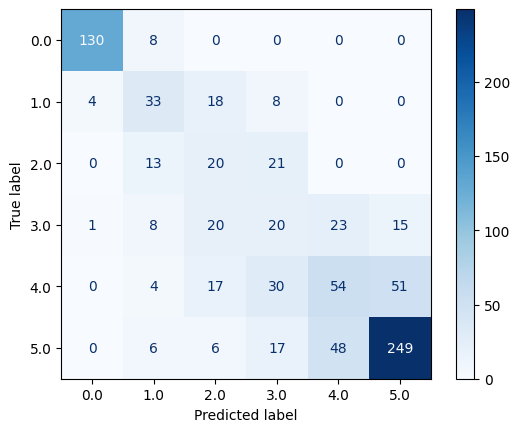

              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95       138
         1.0       0.46      0.52      0.49        63
         2.0       0.25      0.37      0.30        54
         3.0       0.21      0.23      0.22        87
         4.0       0.43      0.35      0.38       156
         5.0       0.79      0.76      0.78       326

    accuracy                           0.61       824
   macro avg       0.52      0.53      0.52       824
weighted avg       0.63      0.61      0.62       824

Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 1.0219 - sparse_categorical_accuracy: 0.6304
Epoch 1: val_loss improved from inf to 0.91394, saving model to CustomModel_indi_LSTM_5.weights.hdf5
29/29 [==============================] - 1s 28ms/step - loss: 1.0219 - sparse_categorical_accuracy: 0.6304 - val_loss: 0.9139 - val_sparse_categorical_accuracy: 0.4914 - lr: 8.0000e-06
Epoch 2/100
 7/29 [======>.......................] - ETA:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/29 [==========================>...] - ETA: 0s - loss: 0.9976 - sparse_categorical_accuracy: 0.6435
Epoch 2: val_loss did not improve from 0.91394
29/29 [==============================] - 1s 27ms/step - loss: 1.0123 - sparse_categorical_accuracy: 0.6283 - val_loss: 0.9185 - val_sparse_categorical_accuracy: 0.4914 - lr: 8.0000e-06
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 1.0059 - sparse_categorical_accuracy: 0.6283
Epoch 3: val_loss did not improve from 0.91394
29/29 [==============================] - 1s 27ms/step - loss: 1.0059 - sparse_categorical_accuracy: 0.6283 - val_loss: 0.9227 - val_sparse_categorical_accuracy: 0.4914 - lr: 8.0000e-06
Epoch 4/100
28/29 [===========================>..] - ETA: 0s - loss: 1.0112 - sparse_categorical_accuracy: 0.6250
Epoch 4: val_loss did not improve from 0.91394

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
29/29 [==============================] - 1s 27ms/step - loss: 0.9983 - sparse_cat

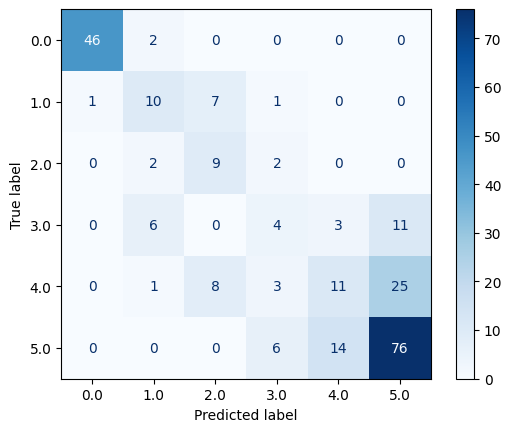

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97        48
         1.0       0.48      0.53      0.50        19
         2.0       0.38      0.69      0.49        13
         3.0       0.25      0.17      0.20        24
         4.0       0.39      0.23      0.29        48
         5.0       0.68      0.79      0.73        96

    accuracy                           0.63       248
   macro avg       0.53      0.56      0.53       248
weighted avg       0.61      0.63      0.61       248

[ 0  1  3  4  5  6  7  8  9 10 11]
[2]
Epoch 1/50
665/666 [============================>.] - ETA: 0s - loss: 1.1747 - sparse_categorical_accuracy: 0.5379
Epoch 1: val_loss improved from inf to 1.04539, saving model to CustomModel_LSTM_5.weights.hdf5
666/666 [==============================] - 27s 37ms/step - loss: 1.1750 - sparse_categorical_accuracy: 0.5378 - val_loss: 1.0454 - val_sparse_categorical_accuracy: 0.5628 - lr: 0.0010
Epoch 2/50
  5/666 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


665/666 [============================>.] - ETA: 0s - loss: 1.0430 - sparse_categorical_accuracy: 0.5789
Epoch 2: val_loss improved from 1.04539 to 0.92488, saving model to CustomModel_LSTM_5.weights.hdf5
666/666 [==============================] - 24s 37ms/step - loss: 1.0429 - sparse_categorical_accuracy: 0.5789 - val_loss: 0.9249 - val_sparse_categorical_accuracy: 0.6118 - lr: 0.0010
Epoch 3/50
665/666 [============================>.] - ETA: 0s - loss: 1.0153 - sparse_categorical_accuracy: 0.5866
Epoch 3: val_loss improved from 0.92488 to 0.88989, saving model to CustomModel_LSTM_5.weights.hdf5
666/666 [==============================] - 24s 37ms/step - loss: 1.0150 - sparse_categorical_accuracy: 0.5868 - val_loss: 0.8899 - val_sparse_categorical_accuracy: 0.6240 - lr: 0.0010
Epoch 4/50
665/666 [============================>.] - ETA: 0s - loss: 1.0041 - sparse_categorical_accuracy: 0.5910
Epoch 4: val_loss improved from 0.88989 to 0.85834, saving model to CustomModel_LSTM_5.weights.hdf

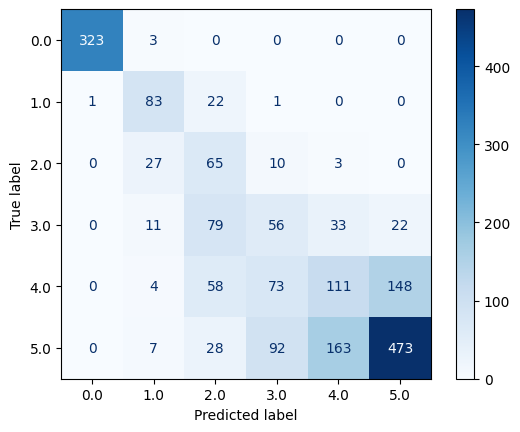

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       326
         1.0       0.61      0.78      0.69       107
         2.0       0.26      0.62      0.36       105
         3.0       0.24      0.28      0.26       201
         4.0       0.36      0.28      0.32       394
         5.0       0.74      0.62      0.67       763

    accuracy                           0.59      1896
   macro avg       0.53      0.59      0.55      1896
weighted avg       0.62      0.59      0.59      1896

Epoch 1/100
67/67 [==============================] - ETA: 0s - loss: 0.8769 - sparse_categorical_accuracy: 0.6164
Epoch 1: val_loss improved from inf to 0.99156, saving model to CustomModel_indi_LSTM_5.weights.hdf5
67/67 [==============================] - 2s 27ms/step - loss: 0.8769 - sparse_categorical_accuracy: 0.6164 - val_loss: 0.9916 - val_sparse_categorical_accuracy: 0.5075 - lr: 1.0000e-06
Epoch 2/100
 7/67 [==>...........................] - ETA:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - ETA: 0s - loss: 0.8732 - sparse_categorical_accuracy: 0.6221
Epoch 2: val_loss did not improve from 0.99156
67/67 [==============================] - 2s 26ms/step - loss: 0.8732 - sparse_categorical_accuracy: 0.6221 - val_loss: 0.9918 - val_sparse_categorical_accuracy: 0.5075 - lr: 1.0000e-06
Epoch 3/100
65/67 [============================>.] - ETA: 0s - loss: 0.8765 - sparse_categorical_accuracy: 0.6202
Epoch 3: val_loss did not improve from 0.99156
67/67 [==============================] - 2s 26ms/step - loss: 0.8701 - sparse_categorical_accuracy: 0.6239 - val_loss: 0.9919 - val_sparse_categorical_accuracy: 0.5038 - lr: 1.0000e-06
Epoch 4/100
66/67 [============================>.] - ETA: 0s - loss: 0.8629 - sparse_categorical_accuracy: 0.6250
Epoch 4: val_loss did not improve from 0.99156
67/67 [==============================] - 2s 26ms/step - loss: 0.8675 - sparse_categorical_accuracy: 0.6230 - val_loss: 0.9922 - val_sparse_categorical_accuracy

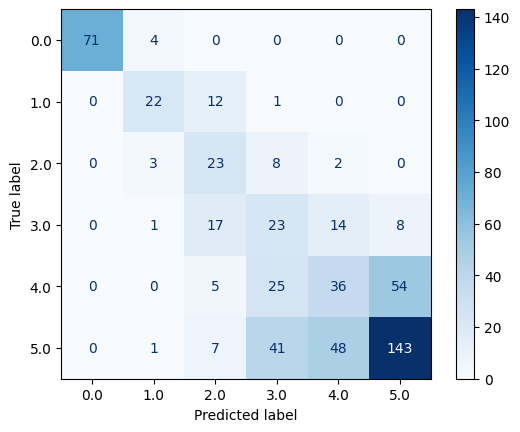

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97        75
         1.0       0.71      0.63      0.67        35
         2.0       0.36      0.64      0.46        36
         3.0       0.23      0.37      0.29        63
         4.0       0.36      0.30      0.33       120
         5.0       0.70      0.60      0.64       240

    accuracy                           0.56       569
   macro avg       0.56      0.58      0.56       569
weighted avg       0.59      0.56      0.57       569

[ 0  1  2  4  5  6  7  8  9 10 11]
[3]
Epoch 1/50
655/656 [============================>.] - ETA: 0s - loss: 1.1887 - sparse_categorical_accuracy: 0.5270
Epoch 1: val_loss improved from inf to 0.87848, saving model to CustomModel_LSTM_5.weights.hdf5
656/656 [==============================] - 26s 37ms/step - loss: 1.1885 - sparse_categorical_accuracy: 0.5270 - val_loss: 0.8785 - val_sparse_categorical_accuracy: 0.6325 - lr: 0.0010
Epoch 2/50
  5/656 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


655/656 [============================>.] - ETA: 0s - loss: 1.0574 - sparse_categorical_accuracy: 0.5677
Epoch 2: val_loss did not improve from 0.87848
656/656 [==============================] - 24s 37ms/step - loss: 1.0578 - sparse_categorical_accuracy: 0.5677 - val_loss: 1.0817 - val_sparse_categorical_accuracy: 0.5472 - lr: 0.0010
Epoch 3/50
655/656 [============================>.] - ETA: 0s - loss: 1.0463 - sparse_categorical_accuracy: 0.5755
Epoch 3: val_loss did not improve from 0.87848
656/656 [==============================] - 24s 37ms/step - loss: 1.0466 - sparse_categorical_accuracy: 0.5755 - val_loss: 0.9360 - val_sparse_categorical_accuracy: 0.6135 - lr: 0.0010
Epoch 4/50
655/656 [============================>.] - ETA: 0s - loss: 1.0229 - sparse_categorical_accuracy: 0.5882
Epoch 4: val_loss did not improve from 0.87848

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
656/656 [==============================] - 24s 37ms/step - loss: 1.0232 - spars

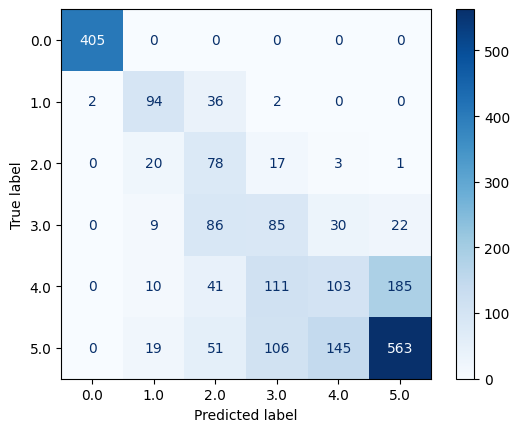

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       405
         1.0       0.62      0.70      0.66       134
         2.0       0.27      0.66      0.38       119
         3.0       0.26      0.37      0.31       232
         4.0       0.37      0.23      0.28       450
         5.0       0.73      0.64      0.68       884

    accuracy                           0.60      2224
   macro avg       0.54      0.60      0.55      2224
weighted avg       0.62      0.60      0.60      2224

Epoch 1/100
76/78 [============================>.] - ETA: 0s - loss: 0.9247 - sparse_categorical_accuracy: 0.6020
Epoch 1: val_loss improved from inf to 0.96304, saving model to CustomModel_indi_LSTM_5.weights.hdf5
78/78 [==============================] - 2s 26ms/step - loss: 0.9342 - sparse_categorical_accuracy: 0.6013 - val_loss: 0.9630 - val_sparse_categorical_accuracy: 0.6378 - lr: 1.0000e-06
Epoch 2/100
 7/78 [=>............................] - ETA:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


76/78 [============================>.] - ETA: 0s - loss: 0.9380 - sparse_categorical_accuracy: 0.6028
Epoch 2: val_loss improved from 0.96304 to 0.96166, saving model to CustomModel_indi_LSTM_5.weights.hdf5
78/78 [==============================] - 2s 25ms/step - loss: 0.9327 - sparse_categorical_accuracy: 0.6013 - val_loss: 0.9617 - val_sparse_categorical_accuracy: 0.6410 - lr: 1.0000e-06
Epoch 3/100
77/78 [============================>.] - ETA: 0s - loss: 0.9323 - sparse_categorical_accuracy: 0.5990
Epoch 3: val_loss improved from 0.96166 to 0.96060, saving model to CustomModel_indi_LSTM_5.weights.hdf5
78/78 [==============================] - 2s 26ms/step - loss: 0.9313 - sparse_categorical_accuracy: 0.6013 - val_loss: 0.9606 - val_sparse_categorical_accuracy: 0.6474 - lr: 1.0000e-06
Epoch 4/100
76/78 [============================>.] - ETA: 0s - loss: 0.9369 - sparse_categorical_accuracy: 0.5962
Epoch 4: val_loss improved from 0.96060 to 0.95965, saving model to CustomModel_indi_LSTM_

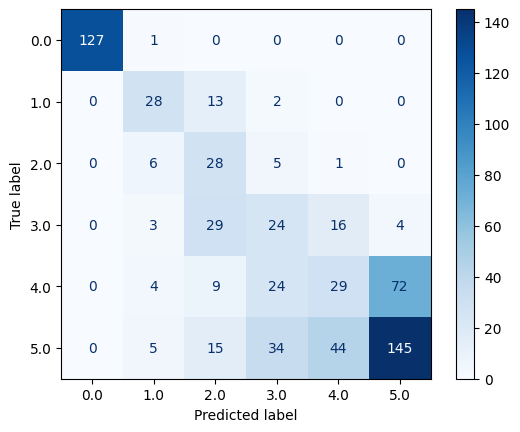

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       128
         1.0       0.60      0.65      0.62        43
         2.0       0.30      0.70      0.42        40
         3.0       0.27      0.32      0.29        76
         4.0       0.32      0.21      0.25       138
         5.0       0.66      0.60      0.62       243

    accuracy                           0.57       668
   macro avg       0.52      0.58      0.53       668
weighted avg       0.58      0.57      0.57       668

[ 0  1  2  3  5  6  7  8  9 10 11]
[4]
Epoch 1/50
677/678 [============================>.] - ETA: 0s - loss: 1.1710 - sparse_categorical_accuracy: 0.5358
Epoch 1: val_loss improved from inf to 0.96337, saving model to CustomModel_LSTM_5.weights.hdf5
678/678 [==============================] - 26s 35ms/step - loss: 1.1719 - sparse_categorical_accuracy: 0.5357 - val_loss: 0.9634 - val_sparse_categorical_accuracy: 0.5908 - lr: 0.0010
Epoch 2/50
  5/678 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


677/678 [============================>.] - ETA: 0s - loss: 1.0500 - sparse_categorical_accuracy: 0.5763
Epoch 2: val_loss improved from 0.96337 to 0.86201, saving model to CustomModel_LSTM_5.weights.hdf5
678/678 [==============================] - 23s 34ms/step - loss: 1.0507 - sparse_categorical_accuracy: 0.5762 - val_loss: 0.8620 - val_sparse_categorical_accuracy: 0.6374 - lr: 0.0010
Epoch 3/50
677/678 [============================>.] - ETA: 0s - loss: 1.0117 - sparse_categorical_accuracy: 0.5854
Epoch 3: val_loss did not improve from 0.86201
678/678 [==============================] - 23s 34ms/step - loss: 1.0114 - sparse_categorical_accuracy: 0.5856 - val_loss: 0.9174 - val_sparse_categorical_accuracy: 0.6177 - lr: 0.0010
Epoch 4/50
677/678 [============================>.] - ETA: 0s - loss: 1.0071 - sparse_categorical_accuracy: 0.5898
Epoch 4: val_loss did not improve from 0.86201
678/678 [==============================] - 23s 34ms/step - loss: 1.0069 - sparse_categorical_accuracy: 0

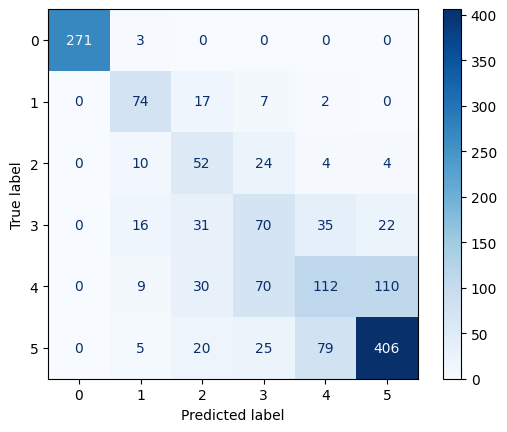

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       274
           1       0.63      0.74      0.68       100
           2       0.35      0.55      0.43        94
           3       0.36      0.40      0.38       174
           4       0.48      0.34      0.40       331
           5       0.75      0.76      0.75       535

    accuracy                           0.65      1508
   macro avg       0.59      0.63      0.61      1508
weighted avg       0.66      0.65      0.65      1508

Epoch 1/100
51/53 [===========================>..] - ETA: 0s - loss: 1.0397 - sparse_categorical_accuracy: 0.6275
Epoch 1: val_loss improved from inf to 0.78186, saving model to CustomModel_indi_LSTM_5.weights.hdf5
53/53 [==============================] - 3s 35ms/step - loss: 1.0435 - sparse_categorical_accuracy: 0.6244 - val_loss: 0.7819 - val_sparse_categorical_accuracy: 0.6825 - lr: 1.0000e-06
Epoch 2/100
 7/53 [==>...........................] - ETA:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - ETA: 0s - loss: 1.0394 - sparse_categorical_accuracy: 0.6303
Epoch 2: val_loss did not improve from 0.78186
53/53 [==============================] - 1s 26ms/step - loss: 1.0394 - sparse_categorical_accuracy: 0.6303 - val_loss: 0.7820 - val_sparse_categorical_accuracy: 0.6825 - lr: 1.0000e-06
Epoch 3/100
53/53 [==============================] - ETA: 0s - loss: 1.0357 - sparse_categorical_accuracy: 0.6339
Epoch 3: val_loss did not improve from 0.78186
53/53 [==============================] - 1s 26ms/step - loss: 1.0357 - sparse_categorical_accuracy: 0.6339 - val_loss: 0.7821 - val_sparse_categorical_accuracy: 0.6825 - lr: 1.0000e-06
Epoch 4/100
51/53 [===========================>..] - ETA: 0s - loss: 1.0378 - sparse_categorical_accuracy: 0.6336
Epoch 4: val_loss did not improve from 0.78186
53/53 [==============================] - 1s 27ms/step - loss: 1.0326 - sparse_categorical_accuracy: 0.6315 - val_loss: 0.7823 - val_sparse_categorical_accuracy

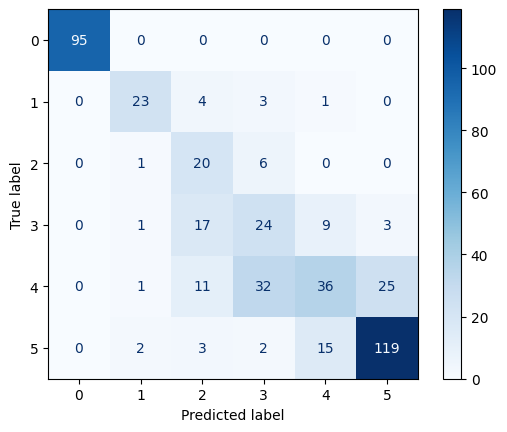

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       0.82      0.74      0.78        31
           2       0.36      0.74      0.49        27
           3       0.36      0.44      0.40        54
           4       0.59      0.34      0.43       105
           5       0.81      0.84      0.83       141

    accuracy                           0.70       453
   macro avg       0.66      0.69      0.65       453
weighted avg       0.72      0.70      0.70       453

[ 0  1  2  3  4  6  7  8  9 10 11]
[5]
Epoch 1/50
655/656 [============================>.] - ETA: 0s - loss: 1.1814 - sparse_categorical_accuracy: 0.5155
Epoch 1: val_loss improved from inf to 1.06635, saving model to CustomModel_LSTM_5.weights.hdf5
656/656 [==============================] - 25s 35ms/step - loss: 1.1815 - sparse_categorical_accuracy: 0.5154 - val_loss: 1.0663 - val_sparse_categorical_accuracy: 0.4804 - lr: 0.0010
Epoch 2/50
  5/656 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


655/656 [============================>.] - ETA: 0s - loss: 1.0557 - sparse_categorical_accuracy: 0.5614
Epoch 2: val_loss improved from 1.06635 to 0.88008, saving model to CustomModel_LSTM_5.weights.hdf5
656/656 [==============================] - 23s 35ms/step - loss: 1.0553 - sparse_categorical_accuracy: 0.5614 - val_loss: 0.8801 - val_sparse_categorical_accuracy: 0.6291 - lr: 0.0010
Epoch 3/50
655/656 [============================>.] - ETA: 0s - loss: 1.0220 - sparse_categorical_accuracy: 0.5754
Epoch 3: val_loss did not improve from 0.88008
656/656 [==============================] - 23s 35ms/step - loss: 1.0219 - sparse_categorical_accuracy: 0.5755 - val_loss: 0.9134 - val_sparse_categorical_accuracy: 0.6179 - lr: 0.0010
Epoch 4/50
655/656 [============================>.] - ETA: 0s - loss: 1.0111 - sparse_categorical_accuracy: 0.5812
Epoch 4: val_loss did not improve from 0.88008
656/656 [==============================] - 23s 35ms/step - loss: 1.0116 - sparse_categorical_accuracy: 0

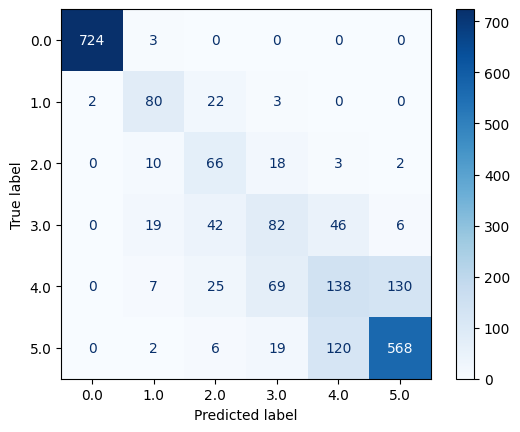

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       727
         1.0       0.66      0.75      0.70       107
         2.0       0.41      0.67      0.51        99
         3.0       0.43      0.42      0.42       195
         4.0       0.45      0.37      0.41       369
         5.0       0.80      0.79      0.80       715

    accuracy                           0.75      2212
   macro avg       0.63      0.67      0.64      2212
weighted avg       0.75      0.75      0.75      2212

Epoch 1/100
76/78 [============================>.] - ETA: 0s - loss: 0.7893 - sparse_categorical_accuracy: 0.7599
Epoch 1: val_loss improved from inf to 0.58651, saving model to CustomModel_indi_LSTM_5.weights.hdf5
78/78 [==============================] - 2s 25ms/step - loss: 0.7879 - sparse_categorical_accuracy: 0.7617 - val_loss: 0.5865 - val_sparse_categorical_accuracy: 0.7774 - lr: 1.6000e-06
Epoch 2/100
 7/78 [=>............................] - ETA:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


78/78 [==============================] - ETA: 0s - loss: 0.7860 - sparse_categorical_accuracy: 0.7617
Epoch 2: val_loss improved from 0.58651 to 0.58531, saving model to CustomModel_indi_LSTM_5.weights.hdf5
78/78 [==============================] - 2s 25ms/step - loss: 0.7860 - sparse_categorical_accuracy: 0.7617 - val_loss: 0.5853 - val_sparse_categorical_accuracy: 0.7742 - lr: 1.6000e-06
Epoch 3/100
76/78 [============================>.] - ETA: 0s - loss: 0.7936 - sparse_categorical_accuracy: 0.7590
Epoch 3: val_loss improved from 0.58531 to 0.58415, saving model to CustomModel_indi_LSTM_5.weights.hdf5
78/78 [==============================] - 2s 25ms/step - loss: 0.7841 - sparse_categorical_accuracy: 0.7633 - val_loss: 0.5841 - val_sparse_categorical_accuracy: 0.7677 - lr: 1.6000e-06
Epoch 4/100
77/78 [============================>.] - ETA: 0s - loss: 0.7840 - sparse_categorical_accuracy: 0.7646
Epoch 4: val_loss improved from 0.58415 to 0.58361, saving model to CustomModel_indi_LSTM_

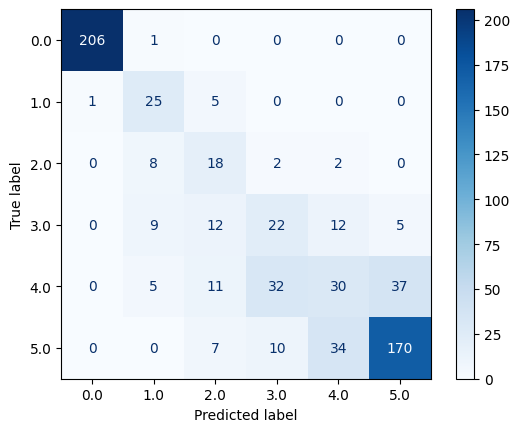

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       207
         1.0       0.52      0.81      0.63        31
         2.0       0.34      0.60      0.43        30
         3.0       0.33      0.37      0.35        60
         4.0       0.38      0.26      0.31       115
         5.0       0.80      0.77      0.79       221

    accuracy                           0.71       664
   macro avg       0.56      0.63      0.58       664
weighted avg       0.71      0.71      0.71       664

[ 0  1  2  3  4  5  7  8  9 10 11]
[6]
Epoch 1/50
694/695 [============================>.] - ETA: 0s - loss: 1.1815 - sparse_categorical_accuracy: 0.5240
Epoch 1: val_loss improved from inf to 0.92379, saving model to CustomModel_LSTM_5.weights.hdf5
695/695 [==============================] - 26s 36ms/step - loss: 1.1810 - sparse_categorical_accuracy: 0.5239 - val_loss: 0.9238 - val_sparse_categorical_accuracy: 0.6067 - lr: 0.0010
Epoch 2/50
  5/695 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


695/695 [==============================] - ETA: 0s - loss: 1.0420 - sparse_categorical_accuracy: 0.5750
Epoch 2: val_loss improved from 0.92379 to 0.89932, saving model to CustomModel_LSTM_5.weights.hdf5
695/695 [==============================] - 24s 35ms/step - loss: 1.0420 - sparse_categorical_accuracy: 0.5750 - val_loss: 0.8993 - val_sparse_categorical_accuracy: 0.6356 - lr: 0.0010
Epoch 3/50
695/695 [==============================] - ETA: 0s - loss: 1.0097 - sparse_categorical_accuracy: 0.5900
Epoch 3: val_loss improved from 0.89932 to 0.88726, saving model to CustomModel_LSTM_5.weights.hdf5
695/695 [==============================] - 24s 35ms/step - loss: 1.0097 - sparse_categorical_accuracy: 0.5900 - val_loss: 0.8873 - val_sparse_categorical_accuracy: 0.6155 - lr: 0.0010
Epoch 4/50
695/695 [==============================] - ETA: 0s - loss: 0.9878 - sparse_categorical_accuracy: 0.5942
Epoch 4: val_loss did not improve from 0.88726
695/695 [==============================] - 24s 35ms

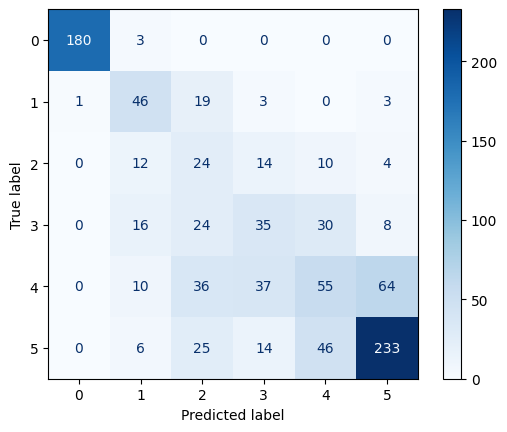

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       183
           1       0.49      0.64      0.56        72
           2       0.19      0.38      0.25        64
           3       0.34      0.31      0.32       113
           4       0.39      0.27      0.32       202
           5       0.75      0.72      0.73       324

    accuracy                           0.60       958
   macro avg       0.53      0.55      0.53       958
weighted avg       0.61      0.60      0.60       958

Epoch 1/100
33/34 [============================>.] - ETA: 0s - loss: 1.0950 - sparse_categorical_accuracy: 0.5947
Epoch 1: val_loss improved from inf to 0.78011, saving model to CustomModel_indi_LSTM_5.weights.hdf5
34/34 [==============================] - 2s 39ms/step - loss: 1.0953 - sparse_categorical_accuracy: 0.5951 - val_loss: 0.7801 - val_sparse_categorical_accuracy: 0.6493 - lr: 1.0000e-06
Epoch 2/100
 7/34 [=====>........................] - ETA:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


34/34 [==============================] - ETA: 0s - loss: 1.0937 - sparse_categorical_accuracy: 0.5951
Epoch 2: val_loss did not improve from 0.78011
34/34 [==============================] - 1s 26ms/step - loss: 1.0937 - sparse_categorical_accuracy: 0.5951 - val_loss: 0.7806 - val_sparse_categorical_accuracy: 0.6493 - lr: 1.0000e-06
Epoch 3/100
34/34 [==============================] - ETA: 0s - loss: 1.0919 - sparse_categorical_accuracy: 0.5989
Epoch 3: val_loss did not improve from 0.78011
34/34 [==============================] - 1s 26ms/step - loss: 1.0919 - sparse_categorical_accuracy: 0.5989 - val_loss: 0.7812 - val_sparse_categorical_accuracy: 0.6493 - lr: 1.0000e-06
Epoch 4/100
32/34 [===========================>..] - ETA: 0s - loss: 1.0821 - sparse_categorical_accuracy: 0.6016
Epoch 4: val_loss did not improve from 0.78011
34/34 [==============================] - 1s 27ms/step - loss: 1.0903 - sparse_categorical_accuracy: 0.6007 - val_loss: 0.7819 - val_sparse_categorical_accuracy

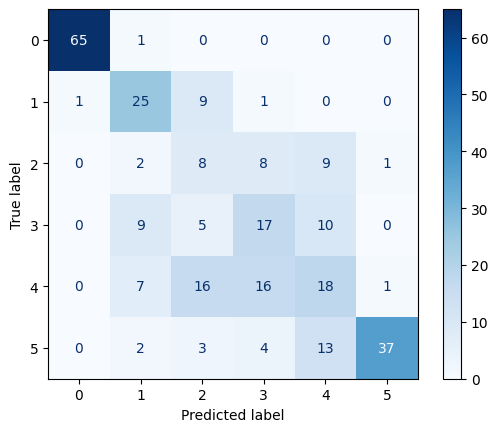

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        66
           1       0.54      0.69      0.61        36
           2       0.20      0.29      0.23        28
           3       0.37      0.41      0.39        41
           4       0.36      0.31      0.33        58
           5       0.95      0.63      0.76        59

    accuracy                           0.59       288
   macro avg       0.57      0.55      0.55       288
weighted avg       0.63      0.59      0.60       288

[ 0  1  2  3  4  5  6  8  9 10 11]
[7]
Epoch 1/50
609/610 [============================>.] - ETA: 0s - loss: 1.1884 - sparse_categorical_accuracy: 0.5258
Epoch 1: val_loss improved from inf to 0.95310, saving model to CustomModel_LSTM_5.weights.hdf5
610/610 [==============================] - 24s 35ms/step - loss: 1.1879 - sparse_categorical_accuracy: 0.5259 - val_loss: 0.9531 - val_sparse_categorical_accuracy: 0.6039 - lr: 0.0010
Epoch 2/50
  4/610 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


610/610 [==============================] - ETA: 0s - loss: 1.0536 - sparse_categorical_accuracy: 0.5646
Epoch 2: val_loss did not improve from 0.95310
610/610 [==============================] - 21s 35ms/step - loss: 1.0536 - sparse_categorical_accuracy: 0.5646 - val_loss: 0.9612 - val_sparse_categorical_accuracy: 0.6012 - lr: 0.0010
Epoch 3/50
609/610 [============================>.] - ETA: 0s - loss: 1.0268 - sparse_categorical_accuracy: 0.5797
Epoch 3: val_loss did not improve from 0.95310
610/610 [==============================] - 21s 35ms/step - loss: 1.0269 - sparse_categorical_accuracy: 0.5799 - val_loss: 0.9975 - val_sparse_categorical_accuracy: 0.5785 - lr: 0.0010
Epoch 4/50
609/610 [============================>.] - ETA: 0s - loss: 1.0092 - sparse_categorical_accuracy: 0.5822
Epoch 4: val_loss did not improve from 0.95310

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
610/610 [==============================] - 21s 35ms/step - loss: 1.0092 - spars

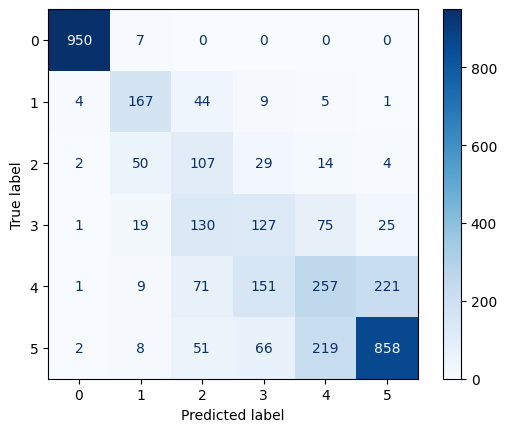

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       957
           1       0.64      0.73      0.68       230
           2       0.27      0.52      0.35       206
           3       0.33      0.34      0.33       377
           4       0.45      0.36      0.40       710
           5       0.77      0.71      0.74      1204

    accuracy                           0.67      3684
   macro avg       0.58      0.61      0.58      3684
weighted avg       0.69      0.67      0.67      3684

Epoch 1/100
128/129 [============================>.] - ETA: 0s - loss: 0.9809 - sparse_categorical_accuracy: 0.6489
Epoch 1: val_loss improved from inf to 0.73472, saving model to CustomModel_indi_LSTM_5.weights.hdf5
129/129 [==============================] - 5s 29ms/step - loss: 0.9871 - sparse_categorical_accuracy: 0.6479 - val_loss: 0.7347 - val_sparse_categorical_accuracy: 0.7171 - lr: 1.6000e-06
Epoch 2/100
  7/129 [>.............................] 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


128/129 [============================>.] - ETA: 0s - loss: 0.9867 - sparse_categorical_accuracy: 0.6460
Epoch 2: val_loss improved from 0.73472 to 0.73466, saving model to CustomModel_indi_LSTM_5.weights.hdf5
129/129 [==============================] - 3s 26ms/step - loss: 0.9851 - sparse_categorical_accuracy: 0.6474 - val_loss: 0.7347 - val_sparse_categorical_accuracy: 0.7171 - lr: 1.6000e-06
Epoch 3/100
128/129 [============================>.] - ETA: 0s - loss: 0.9864 - sparse_categorical_accuracy: 0.6455
Epoch 3: val_loss improved from 0.73466 to 0.73446, saving model to CustomModel_indi_LSTM_5.weights.hdf5
129/129 [==============================] - 3s 26ms/step - loss: 0.9838 - sparse_categorical_accuracy: 0.6469 - val_loss: 0.7345 - val_sparse_categorical_accuracy: 0.7151 - lr: 1.6000e-06
Epoch 4/100
129/129 [==============================] - ETA: 0s - loss: 0.9829 - sparse_categorical_accuracy: 0.6445
Epoch 4: val_loss improved from 0.73446 to 0.73433, saving model to CustomModel_

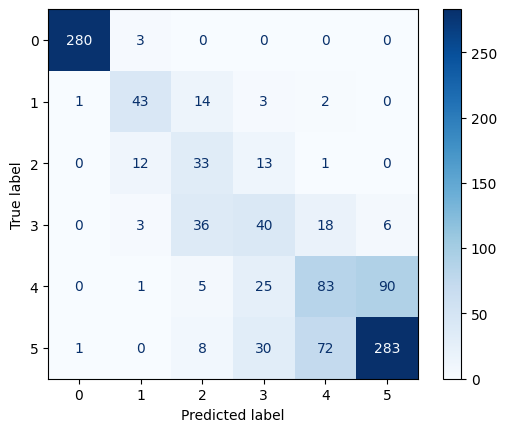

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       283
           1       0.69      0.68      0.69        63
           2       0.34      0.56      0.43        59
           3       0.36      0.39      0.37       103
           4       0.47      0.41      0.44       204
           5       0.75      0.72      0.73       394

    accuracy                           0.69      1106
   macro avg       0.60      0.62      0.61      1106
weighted avg       0.70      0.69      0.69      1106

[ 0  1  2  3  4  5  6  7  9 10 11]
[8]
Epoch 1/50
699/700 [============================>.] - ETA: 0s - loss: 1.1767 - sparse_categorical_accuracy: 0.5386
Epoch 1: val_loss improved from inf to 0.88954, saving model to CustomModel_LSTM_5.weights.hdf5
700/700 [==============================] - 27s 36ms/step - loss: 1.1767 - sparse_categorical_accuracy: 0.5386 - val_loss: 0.8895 - val_sparse_categorical_accuracy: 0.6316 - lr: 0.0010
Epoch 2/50
  5/700 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


699/700 [============================>.] - ETA: 0s - loss: 1.0397 - sparse_categorical_accuracy: 0.5764
Epoch 2: val_loss did not improve from 0.88954
700/700 [==============================] - 25s 36ms/step - loss: 1.0397 - sparse_categorical_accuracy: 0.5764 - val_loss: 0.9866 - val_sparse_categorical_accuracy: 0.5577 - lr: 0.0010
Epoch 3/50
699/700 [============================>.] - ETA: 0s - loss: 1.0189 - sparse_categorical_accuracy: 0.5872
Epoch 3: val_loss improved from 0.88954 to 0.84652, saving model to CustomModel_LSTM_5.weights.hdf5
700/700 [==============================] - 25s 36ms/step - loss: 1.0191 - sparse_categorical_accuracy: 0.5872 - val_loss: 0.8465 - val_sparse_categorical_accuracy: 0.6546 - lr: 0.0010
Epoch 4/50
699/700 [============================>.] - ETA: 0s - loss: 0.9923 - sparse_categorical_accuracy: 0.5987
Epoch 4: val_loss did not improve from 0.84652
700/700 [==============================] - 25s 36ms/step - loss: 0.9921 - sparse_categorical_accuracy: 0

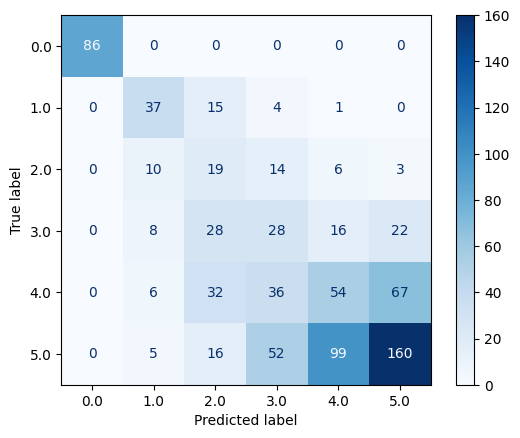

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        86
         1.0       0.56      0.65      0.60        57
         2.0       0.17      0.37      0.23        52
         3.0       0.21      0.27      0.24       102
         4.0       0.31      0.28      0.29       195
         5.0       0.63      0.48      0.55       332

    accuracy                           0.47       824
   macro avg       0.48      0.51      0.49       824
weighted avg       0.51      0.47      0.48       824

Epoch 1/100
27/29 [==========================>...] - ETA: 0s - loss: 1.2893 - sparse_categorical_accuracy: 0.4236
Epoch 1: val_loss improved from inf to 0.97066, saving model to CustomModel_indi_LSTM_5.weights.hdf5
29/29 [==============================] - 1s 42ms/step - loss: 1.2676 - sparse_categorical_accuracy: 0.4174 - val_loss: 0.9707 - val_sparse_categorical_accuracy: 0.5690 - lr: 1.0000e-06
Epoch 2/100
 5/29 [====>.........................] - ETA:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/29 [==========================>...] - ETA: 0s - loss: 1.2647 - sparse_categorical_accuracy: 0.4213
Epoch 2: val_loss did not improve from 0.97066
29/29 [==============================] - 1s 27ms/step - loss: 1.2652 - sparse_categorical_accuracy: 0.4174 - val_loss: 0.9713 - val_sparse_categorical_accuracy: 0.5690 - lr: 1.0000e-06
Epoch 3/100
27/29 [==========================>...] - ETA: 0s - loss: 1.2802 - sparse_categorical_accuracy: 0.4282
Epoch 3: val_loss did not improve from 0.97066
29/29 [==============================] - 1s 27ms/step - loss: 1.2627 - sparse_categorical_accuracy: 0.4174 - val_loss: 0.9716 - val_sparse_categorical_accuracy: 0.5690 - lr: 1.0000e-06
Epoch 4/100
28/29 [===========================>..] - ETA: 0s - loss: 1.2688 - sparse_categorical_accuracy: 0.4196
Epoch 4: val_loss did not improve from 0.97066
29/29 [==============================] - 1s 27ms/step - loss: 1.2604 - sparse_categorical_accuracy: 0.4174 - val_loss: 0.9723 - val_sparse_categorical_accuracy

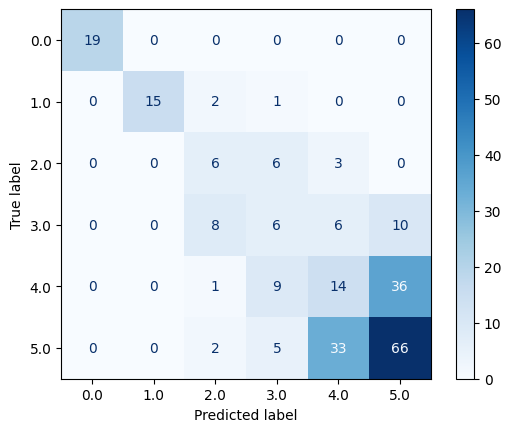

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       1.00      0.83      0.91        18
         2.0       0.32      0.40      0.35        15
         3.0       0.22      0.20      0.21        30
         4.0       0.25      0.23      0.24        60
         5.0       0.59      0.62      0.61       106

    accuracy                           0.51       248
   macro avg       0.56      0.55      0.55       248
weighted avg       0.51      0.51      0.51       248

[ 0  1  2  3  4  5  6  7  8 10 11]
[9]
Epoch 1/50
697/698 [============================>.] - ETA: 0s - loss: 1.1917 - sparse_categorical_accuracy: 0.5281
Epoch 1: val_loss improved from inf to 1.06350, saving model to CustomModel_LSTM_5.weights.hdf5
698/698 [==============================] - 28s 37ms/step - loss: 1.1917 - sparse_categorical_accuracy: 0.5280 - val_loss: 1.0635 - val_sparse_categorical_accuracy: 0.5196 - lr: 0.0010
Epoch 2/50
  5/698 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


697/698 [============================>.] - ETA: 0s - loss: 1.0432 - sparse_categorical_accuracy: 0.5742
Epoch 2: val_loss improved from 1.06350 to 0.97215, saving model to CustomModel_LSTM_5.weights.hdf5
698/698 [==============================] - 25s 36ms/step - loss: 1.0434 - sparse_categorical_accuracy: 0.5742 - val_loss: 0.9722 - val_sparse_categorical_accuracy: 0.5793 - lr: 0.0010
Epoch 3/50
698/698 [==============================] - ETA: 0s - loss: 1.0084 - sparse_categorical_accuracy: 0.5854
Epoch 3: val_loss improved from 0.97215 to 0.85847, saving model to CustomModel_LSTM_5.weights.hdf5
698/698 [==============================] - 25s 36ms/step - loss: 1.0084 - sparse_categorical_accuracy: 0.5854 - val_loss: 0.8585 - val_sparse_categorical_accuracy: 0.6351 - lr: 0.0010
Epoch 4/50
698/698 [==============================] - ETA: 0s - loss: 0.9927 - sparse_categorical_accuracy: 0.5979
Epoch 4: val_loss did not improve from 0.85847
698/698 [==============================] - 25s 36ms

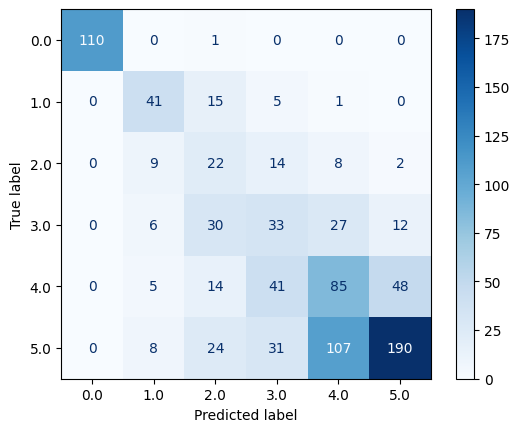

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       111
         1.0       0.59      0.66      0.63        62
         2.0       0.21      0.40      0.27        55
         3.0       0.27      0.31      0.28       108
         4.0       0.37      0.44      0.40       193
         5.0       0.75      0.53      0.62       360

    accuracy                           0.54       889
   macro avg       0.53      0.55      0.53       889
weighted avg       0.60      0.54      0.56       889

Epoch 1/100
30/32 [===========================>..] - ETA: 0s - loss: 0.8383 - sparse_categorical_accuracy: 0.6333
Epoch 1: val_loss improved from inf to 1.68561, saving model to CustomModel_indi_LSTM_5.weights.hdf5
32/32 [==============================] - 1s 28ms/step - loss: 0.8525 - sparse_categorical_accuracy: 0.6338 - val_loss: 1.6856 - val_sparse_categorical_accuracy: 0.2640 - lr: 1.0000e-06
Epoch 2/100
 7/32 [=====>........................] - ETA:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - ETA: 0s - loss: 0.8514 - sparse_categorical_accuracy: 0.6338
Epoch 2: val_loss improved from 1.68561 to 1.68524, saving model to CustomModel_indi_LSTM_5.weights.hdf5
32/32 [==============================] - 1s 28ms/step - loss: 0.8514 - sparse_categorical_accuracy: 0.6338 - val_loss: 1.6852 - val_sparse_categorical_accuracy: 0.2640 - lr: 1.0000e-06
Epoch 3/100
31/32 [============================>.] - ETA: 0s - loss: 0.8516 - sparse_categorical_accuracy: 0.6331
Epoch 3: val_loss did not improve from 1.68524
32/32 [==============================] - 1s 28ms/step - loss: 0.8502 - sparse_categorical_accuracy: 0.6338 - val_loss: 1.6854 - val_sparse_categorical_accuracy: 0.2640 - lr: 1.0000e-06
Epoch 4/100
30/32 [===========================>..] - ETA: 0s - loss: 0.8491 - sparse_categorical_accuracy: 0.6417
Epoch 4: val_loss did not improve from 1.68524
32/32 [==============================] - 1s 28ms/step - loss: 0.8489 - sparse_categorical_accuracy: 0

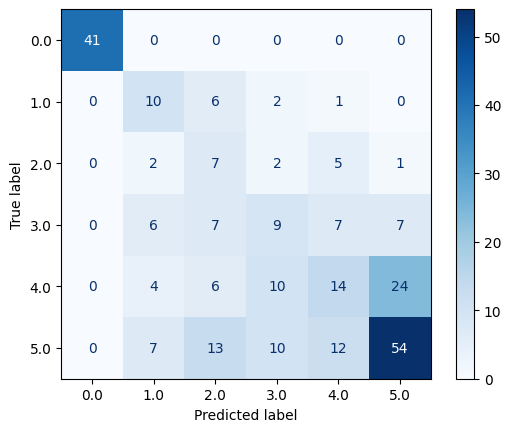

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        41
         1.0       0.34      0.53      0.42        19
         2.0       0.18      0.41      0.25        17
         3.0       0.27      0.25      0.26        36
         4.0       0.36      0.24      0.29        58
         5.0       0.63      0.56      0.59        96

    accuracy                           0.51       267
   macro avg       0.46      0.50      0.47       267
weighted avg       0.53      0.51      0.51       267

[ 0  1  2  3  4  5  6  7  8  9 11]
[10]
Epoch 1/50
638/638 [==============================] - ETA: 0s - loss: 1.1836 - sparse_categorical_accuracy: 0.5333
Epoch 1: val_loss improved from inf to 0.95443, saving model to CustomModel_LSTM_5.weights.hdf5
638/638 [==============================] - 26s 38ms/step - loss: 1.1836 - sparse_categorical_accuracy: 0.5333 - val_loss: 0.9544 - val_sparse_categorical_accuracy: 0.6022 - lr: 0.0010
Epoch 2/50
  5/638 [..

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


637/638 [============================>.] - ETA: 0s - loss: 1.0393 - sparse_categorical_accuracy: 0.5818
Epoch 2: val_loss improved from 0.95443 to 0.87214, saving model to CustomModel_LSTM_5.weights.hdf5
638/638 [==============================] - 23s 36ms/step - loss: 1.0389 - sparse_categorical_accuracy: 0.5822 - val_loss: 0.8721 - val_sparse_categorical_accuracy: 0.6278 - lr: 0.0010
Epoch 3/50
637/638 [============================>.] - ETA: 0s - loss: 1.0206 - sparse_categorical_accuracy: 0.5916
Epoch 3: val_loss did not improve from 0.87214
638/638 [==============================] - 23s 36ms/step - loss: 1.0206 - sparse_categorical_accuracy: 0.5916 - val_loss: 0.9144 - val_sparse_categorical_accuracy: 0.6112 - lr: 0.0010
Epoch 4/50
637/638 [============================>.] - ETA: 0s - loss: 1.0021 - sparse_categorical_accuracy: 0.5958
Epoch 4: val_loss did not improve from 0.87214
638/638 [==============================] - 23s 36ms/step - loss: 1.0019 - sparse_categorical_accuracy: 0

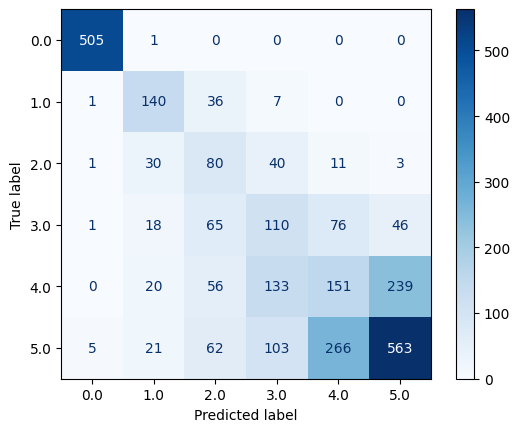

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       506
         1.0       0.61      0.76      0.68       184
         2.0       0.27      0.48      0.34       165
         3.0       0.28      0.35      0.31       316
         4.0       0.30      0.25      0.27       599
         5.0       0.66      0.55      0.60      1020

    accuracy                           0.56      2790
   macro avg       0.52      0.57      0.53      2790
weighted avg       0.57      0.56      0.56      2790

Epoch 1/100
98/98 [==============================] - ETA: 0s - loss: 1.0561 - sparse_categorical_accuracy: 0.5538
Epoch 1: val_loss improved from inf to 1.00377, saving model to CustomModel_indi_LSTM_5.weights.hdf5
98/98 [==============================] - 3s 26ms/step - loss: 1.0561 - sparse_categorical_accuracy: 0.5538 - val_loss: 1.0038 - val_sparse_categorical_accuracy: 0.5064 - lr: 1.6000e-06
Epoch 2/100
 7/98 [=>............................] - ETA:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


97/98 [============================>.] - ETA: 0s - loss: 1.0522 - sparse_categorical_accuracy: 0.5541
Epoch 2: val_loss improved from 1.00377 to 1.00273, saving model to CustomModel_indi_LSTM_5.weights.hdf5
98/98 [==============================] - 3s 26ms/step - loss: 1.0538 - sparse_categorical_accuracy: 0.5544 - val_loss: 1.0027 - val_sparse_categorical_accuracy: 0.5038 - lr: 1.6000e-06
Epoch 3/100
98/98 [==============================] - ETA: 0s - loss: 1.0520 - sparse_categorical_accuracy: 0.5544
Epoch 3: val_loss did not improve from 1.00273
98/98 [==============================] - 3s 26ms/step - loss: 1.0520 - sparse_categorical_accuracy: 0.5544 - val_loss: 1.0036 - val_sparse_categorical_accuracy: 0.5090 - lr: 1.6000e-06
Epoch 4/100
96/98 [============================>.] - ETA: 0s - loss: 1.0533 - sparse_categorical_accuracy: 0.5534
Epoch 4: val_loss did not improve from 1.00273
98/98 [==============================] - 3s 26ms/step - loss: 1.0503 - sparse_categorical_accuracy: 0

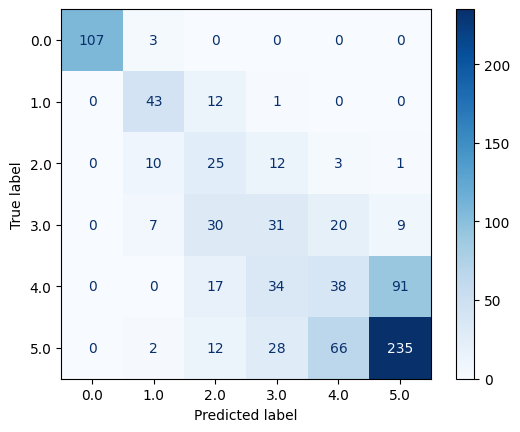

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       110
         1.0       0.66      0.77      0.71        56
         2.0       0.26      0.49      0.34        51
         3.0       0.29      0.32      0.31        97
         4.0       0.30      0.21      0.25       180
         5.0       0.70      0.69      0.69       343

    accuracy                           0.57       837
   macro avg       0.54      0.57      0.55       837
weighted avg       0.58      0.57      0.57       837

[ 0  1  2  3  4  5  6  7  8  9 10]
[11]
Epoch 1/50
672/673 [============================>.] - ETA: 0s - loss: 1.1978 - sparse_categorical_accuracy: 0.5259
Epoch 1: val_loss improved from inf to 0.89660, saving model to CustomModel_LSTM_5.weights.hdf5
673/673 [==============================] - 27s 38ms/step - loss: 1.1983 - sparse_categorical_accuracy: 0.5260 - val_loss: 0.8966 - val_sparse_categorical_accuracy: 0.6487 - lr: 0.0010
Epoch 2/50
  5/673 [..

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


672/673 [============================>.] - ETA: 0s - loss: 1.0392 - sparse_categorical_accuracy: 0.5798
Epoch 2: val_loss did not improve from 0.89660
673/673 [==============================] - 24s 36ms/step - loss: 1.0391 - sparse_categorical_accuracy: 0.5799 - val_loss: 0.9064 - val_sparse_categorical_accuracy: 0.6151 - lr: 0.0010
Epoch 3/50
673/673 [==============================] - ETA: 0s - loss: 1.0220 - sparse_categorical_accuracy: 0.5921
Epoch 3: val_loss improved from 0.89660 to 0.87433, saving model to CustomModel_LSTM_5.weights.hdf5
673/673 [==============================] - 24s 36ms/step - loss: 1.0220 - sparse_categorical_accuracy: 0.5921 - val_loss: 0.8743 - val_sparse_categorical_accuracy: 0.6444 - lr: 0.0010
Epoch 4/50
673/673 [==============================] - ETA: 0s - loss: 0.9992 - sparse_categorical_accuracy: 0.6014
Epoch 4: val_loss improved from 0.87433 to 0.83982, saving model to CustomModel_LSTM_5.weights.hdf5
673/673 [==============================] - 24s 36ms

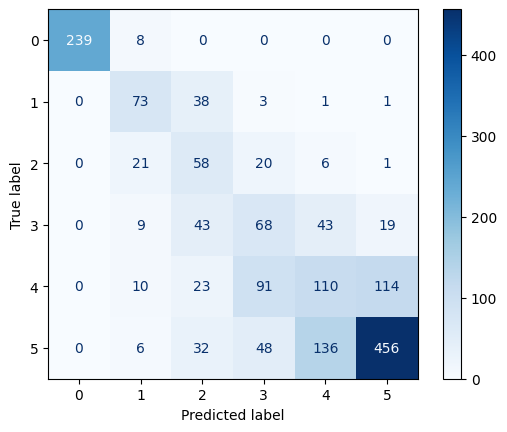

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       247
           1       0.57      0.63      0.60       116
           2       0.30      0.55      0.39       106
           3       0.30      0.37      0.33       182
           4       0.37      0.32      0.34       348
           5       0.77      0.67      0.72       678

    accuracy                           0.60      1677
   macro avg       0.55      0.58      0.56      1677
weighted avg       0.63      0.60      0.61      1677

Epoch 1/100
57/59 [===========================>..] - ETA: 0s - loss: 0.9193 - sparse_categorical_accuracy: 0.6272
Epoch 1: val_loss improved from inf to 0.99546, saving model to CustomModel_indi_LSTM_5.weights.hdf5
59/59 [==============================] - 3s 34ms/step - loss: 0.9168 - sparse_categorical_accuracy: 0.6269 - val_loss: 0.9955 - val_sparse_categorical_accuracy: 0.5702 - lr: 1.6000e-06
Epoch 2/100
 7/59 [==>...........................] - ETA:

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


58/59 [============================>.] - ETA: 0s - loss: 0.9087 - sparse_categorical_accuracy: 0.6250
Epoch 2: val_loss did not improve from 0.99546
59/59 [==============================] - 2s 27ms/step - loss: 0.9056 - sparse_categorical_accuracy: 0.6269 - val_loss: 0.9975 - val_sparse_categorical_accuracy: 0.5617 - lr: 1.6000e-06
Epoch 3/100
58/59 [============================>.] - ETA: 0s - loss: 0.9022 - sparse_categorical_accuracy: 0.6293
Epoch 3: val_loss did not improve from 0.99546
59/59 [==============================] - 2s 27ms/step - loss: 0.8982 - sparse_categorical_accuracy: 0.6301 - val_loss: 1.0003 - val_sparse_categorical_accuracy: 0.5660 - lr: 1.6000e-06
Epoch 4/100
58/59 [============================>.] - ETA: 0s - loss: 0.8923 - sparse_categorical_accuracy: 0.6261
Epoch 4: val_loss did not improve from 0.99546

Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-06.
59/59 [==============================] - 2s 27ms/step - loss: 0.8933 - sparse_categorical_accuracy

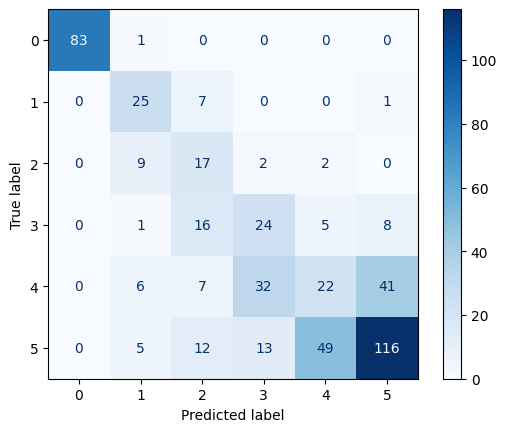

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        84
           1       0.53      0.76      0.62        33
           2       0.29      0.57      0.38        30
           3       0.34      0.44      0.38        54
           4       0.28      0.20      0.24       108
           5       0.70      0.59      0.64       195

    accuracy                           0.57       504
   macro avg       0.52      0.59      0.54       504
weighted avg       0.59      0.57      0.57       504


Mean accuracy of population: 0.6012, Standard deviation of population: 0.0671


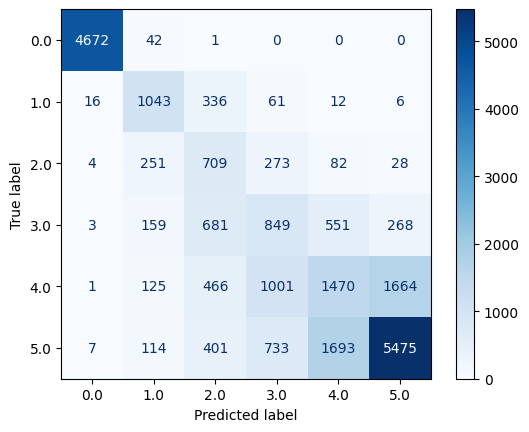

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4715
         1.0       0.60      0.71      0.65      1474
         2.0       0.27      0.53      0.36      1347
         3.0       0.29      0.34      0.31      2511
         4.0       0.39      0.31      0.34      4727
         5.0       0.74      0.65      0.69      8423

    accuracy                           0.61     23197
   macro avg       0.55      0.59      0.56     23197
weighted avg       0.63      0.61      0.62     23197


Mean accuracy of individuum: 0.5991, Standard deviation of individuum: 0.0662


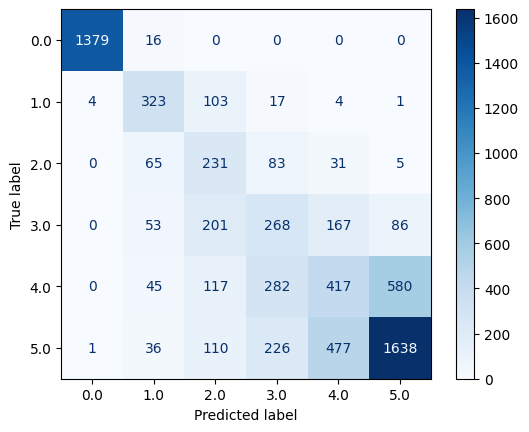

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1395
         1.0       0.60      0.71      0.65       452
         2.0       0.30      0.56      0.39       415
         3.0       0.31      0.35      0.32       775
         4.0       0.38      0.29      0.33      1441
         5.0       0.71      0.66      0.68      2488

    accuracy                           0.61      6966
   macro avg       0.55      0.59      0.56      6966
weighted avg       0.62      0.61      0.61      6966



In [36]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


def LSTM_5_Model(input_shape, classes):

    model= Sequential()

    model.add(tf.keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True, activation="tanh"))
    model.add(tf.keras.layers.LSTM(64, return_sequences=True, activation="tanh"))
    model.add(tf.keras.layers.LSTM(32, return_sequences=False, activation="tanh"))

    model.add(Dense(100, activation = "tanh"))


    # Output layer with Softmax activation function
    model.add(Dense(units=classes, activation='softmax'))



    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])


    return model




# we need 12 folds as we have 12 patients 
num_folds = 12
# we do not split them randomly so that the data of each subject remains 
kfolds = KFold(n_splits=num_folds, shuffle=False)

# empty list for accuarcy and variables of each fold which are stored
accuracies_CV_All = []
actual_labels_CV_All = []
predicted_labels_CV_All = []


accuracies_CV_indi = []
actual_labels_CV_indi = []
predicted_labels_CV_indi = []
count = 0

# itertate over each fold
for train_idx, test_idx in kfolds.split(X):
    # Split the dataset into training and validation sets for the current fold
    print(train_idx)
    print(test_idx)

    # train fold
    X_train_fold = [X[i] for i in train_idx]
    y_train_fold = [Y[i] for i in train_idx]

    # validation fold
    X_val_fold = [X_val[i] for i in train_idx]
    y_val_fold = [Y_val[i] for i in train_idx]

    # test fold
    X_test_fold = np.array([X[i] for i in test_idx])
    X_test_fold = X_test_fold.reshape(-1,48,4)
    y_test_fold = np.array([Y[i] for i in test_idx])
    y_test_fold = y_test_fold.reshape(-1,1)


    X_train_fold = np.vstack(X_train_fold)
    y_train_fold = np.vstack(y_train_fold)

    X_val_fold = np.vstack(X_val_fold)
    y_val_fold = np.vstack(y_val_fold)
    
    # splitting training data into training and validation for optimizing the learning rate
    # during training and early stopping
    X_train_fold, y_train_fold = shuffle(X_train_fold, y_train_fold)
    X_val_fold, y_val_fold = shuffle(X_val_fold, y_val_fold)


    X_train_indiv, X_test_indi,  y_train_indiv, y_test_indi = train_test_split(
    X_test_fold , y_test_fold , test_size=0.30, shuffle = False)

    X_train_indi, X_val_indi,  y_train_indi, y_val_indi = train_test_split(
    X_train_indiv, y_train_indiv, test_size=0.20, shuffle = False)

    # labels for the whole test data 
    actual_labels_CV_All = np.append(actual_labels_CV_All, y_test_fold)
    # labels for the individusal trained model which have less test data
    actual_labels_CV_indi = np.append(actual_labels_CV_indi, y_test_indi)

    # estimating distribution of classes
    labels_df = pd.DataFrame(y_train_fold, columns = ['label'])
    class_occurences = np.bincount(labels_df['label'])
    total = class_occurences.sum()
    number_classes = len(class_occurences)

    # assigning weights for classes, weight for last class stays 1, since its occurance is the highest
    weight_for_0 = (1/class_occurences[0]) * (total/number_classes)
    weight_for_1 = (1/class_occurences[1]) * (total/number_classes)
    weight_for_2 = (1/class_occurences[2]) * (total/number_classes)
    weight_for_3 = (1/class_occurences[3]) * (total/number_classes)
    weight_for_4 = (1/class_occurences[4]) * (total/number_classes)
    weight_for_5= (1/class_occurences[5]) * (total/number_classes)

    class_weights = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4, 5: weight_for_5}

    
    # Create a new model for each fold
    model_CV_D = LSTM_5_Model((X_train_fold.shape[1], X_train_fold.shape[2]), 6)

    # callbacks
    # Define the early stopping callback
    early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min', verbose=1, restore_best_weights=True)
    early_stopping_indi = EarlyStopping(patience=20, monitor='val_loss', mode='min', verbose=1, restore_best_weights=True)

    # initialize callbacks 
    reduceLR =ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 
    reduceLR_indi =ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 

    checkpoint = ModelCheckpoint('CustomModel_LSTM_5.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 
    checkpoint_indi = ModelCheckpoint('CustomModel_indi_LSTM_5.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 

    callbacks= [early_stopping, checkpoint, reduceLR]
    callbacks_indi= [early_stopping_indi, checkpoint_indi, reduceLR_indi]
    

    # Train the model on the current fold
    model_CV_D.fit(X_train_fold, y_train_fold,
    validation_data=(X_val_fold, y_val_fold),
    epochs=50,
    batch_size=32,
    callbacks=callbacks,
    class_weight = class_weights
    )

    name = "Models/LSTM_5_Population_%i.hdf5" % (count)
    model_CV_D.save(name)
    
    # Evaluate the model on the validation set
    y_pred_All = model_CV_D.predict(X_test_fold)
    y_pred_CV_All = np.argmax(y_pred_All, axis=1)
    accuracy_CV_All = accuracy_score(y_test_fold, y_pred_CV_All)
    accuracies_CV_All.append(accuracy_CV_All)

    ConfusionMatrixDisplay.from_predictions(y_test_fold, y_pred_CV_All, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/LSTM_5_Population_%i.png" % (count)
    plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_fold, y_pred_CV_All))

    predicted_labels_CV_All = np.append(predicted_labels_CV_All, y_pred_CV_All)

    


    # SECOND PART TRAIN THE MODEL FURTHER WITH 60% OF THE NEW PATIENT
    # Train the model on the current fold
    
    # estimating distribution of classes
    labels_df_indi = pd.DataFrame(y_train_indi, columns = ['label'])
    class_occurences_indi = np.bincount(labels_df_indi['label'])
    total_indi = class_occurences_indi.sum()
    number_classes_indi = len(class_occurences_indi)

    # assigning weights for classes, weight for last class stays 1, since its occurance is the highest
    # assigning weights for classes, weight for last class stays 1, since its occurance is the highest
    weight_for_0_indi = (1/class_occurences_indi[0]) * (total_indi/number_classes_indi)
    weight_for_1_indi = (1/class_occurences_indi[1]) * (total_indi/number_classes_indi)
    weight_for_2_indi = (1/class_occurences_indi[2]) * (total_indi/number_classes_indi)
    weight_for_3_indi = (1/class_occurences_indi[3]) * (total_indi/number_classes_indi)
    weight_for_4_indi = (1/class_occurences_indi[4]) * (total_indi/number_classes_indi)
    weight_for_5_indi = (1/class_occurences_indi[5]) * (total_indi/number_classes_indi)


    class_weights_indi = {0: weight_for_0_indi, 1: weight_for_1_indi, 2: weight_for_2_indi, 3: weight_for_3_indi, 4: weight_for_4_indi, 
                     5: weight_for_5_indi}

    
    model_CV_D.fit(X_train_indi, y_train_indi,
    validation_data=(X_val_indi, y_val_indi),
    epochs=100,
    batch_size=16,
    callbacks=callbacks_indi,
    class_weight = class_weights_indi
    )

    name = "Models/LSTM_5_Indi_%i.hdf5" % (count)
    model_CV_D.save(name)

    # Evaluate the model on the validation set
    y_pred_indi = model_CV_D.predict(X_test_indi)
    y_pred_CV_indi = np.argmax(y_pred_indi, axis=1)
    accuracy_CV_indi = accuracy_score(y_test_indi, y_pred_CV_indi)
    accuracies_CV_indi.append(accuracy_CV_indi)

    ConfusionMatrixDisplay.from_predictions(y_test_indi, y_pred_CV_indi, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/LSTM_5_Indi_%i.png" % (count)
    plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_indi, y_pred_CV_indi))


    predicted_labels_CV_indi = np.append(predicted_labels_CV_indi, y_pred_CV_indi)

    
    count = count+1


# POPULATION
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_All = np.mean(accuracies_CV_All)
std_accuracy_CV_All = np.std(accuracies_CV_All)
# Evalaute Model and print Confusion Matrix
print(f"\nMean accuracy of population: {mean_accuracy_CV_All:.4f}, Standard deviation of population: {std_accuracy_CV_All:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_All, predicted_labels_CV_All, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/LSTM_5_Population_All.png" 
plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_All, predicted_labels_CV_All))


# INDIVIDUUM

# Evalaute Model and print Confusion Matrix
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_indi = np.mean(accuracies_CV_indi)
std_accuracy_CV_indi = np.std(accuracies_CV_indi)
print(f"\nMean accuracy of individuum: {mean_accuracy_CV_indi:.4f}, Standard deviation of individuum: {std_accuracy_CV_indi:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_indi, predicted_labels_CV_indi, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/LSTM_5_Indi_All.png" 
plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_indi, predicted_labels_CV_indi))

### Hybrid

[ 1  2  3  4  5  6  7  8  9 10 11]
[0]
Epoch 1/50
305/305 [==============================] - ETA: 0s - loss: 1.3588 - sparse_categorical_accuracy: 0.5039
Epoch 1: val_loss improved from inf to 1.55312, saving model to CustomModel_Hyb_5.weights.hdf5
305/305 [==============================] - 39s 120ms/step - loss: 1.3588 - sparse_categorical_accuracy: 0.5039 - val_loss: 1.5531 - val_sparse_categorical_accuracy: 0.4822 - lr: 0.0010
Epoch 2/50
305/305 [==============================] - ETA: 0s - loss: 1.1859 - sparse_categorical_accuracy: 0.5419
Epoch 2: val_loss improved from 1.55312 to 1.16274, saving model to CustomModel_Hyb_5.weights.hdf5
305/305 [==============================] - 36s 117ms/step - loss: 1.1859 - sparse_categorical_accuracy: 0.5419 - val_loss: 1.1627 - val_sparse_categorical_accuracy: 0.5517 - lr: 0.0010
Epoch 3/50
305/305 [==============================] - ETA: 0s - loss: 1.1344 - sparse_categorical_accuracy: 0.5619
Epoch 3: val_loss did not improve from 1.16274
305/3

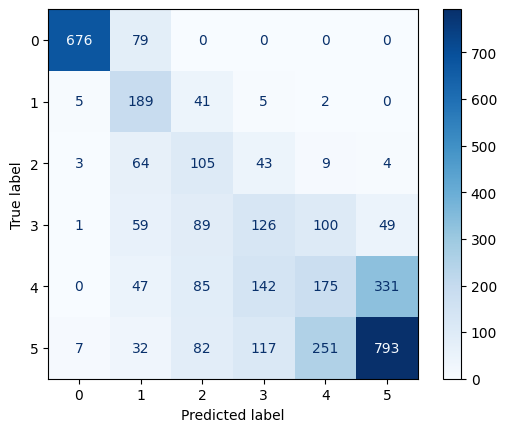

              precision    recall  f1-score   support

           0       0.98      0.90      0.93       755
           1       0.40      0.78      0.53       242
           2       0.26      0.46      0.33       228
           3       0.29      0.30      0.29       424
           4       0.33      0.22      0.27       780
           5       0.67      0.62      0.64      1282

    accuracy                           0.56      3711
   macro avg       0.49      0.55      0.50      3711
weighted avg       0.58      0.56      0.56      3711

Epoch 1/100
129/130 [============================>.] - ETA: 0s - loss: 1.2478 - sparse_categorical_accuracy: 0.5228
Epoch 1: val_loss improved from inf to 1.14352, saving model to CustomModel_indi_Hyb_5.weights.hdf5
130/130 [==============================] - 8s 45ms/step - loss: 1.2510 - sparse_categorical_accuracy: 0.5209 - val_loss: 1.1435 - val_sparse_categorical_accuracy: 0.4923 - lr: 1.6000e-06
Epoch 2/100
  3/130 [..............................] -

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


129/130 [============================>.] - ETA: 0s - loss: 1.2052 - sparse_categorical_accuracy: 0.5315
Epoch 2: val_loss improved from 1.14352 to 1.14011, saving model to CustomModel_indi_Hyb_5.weights.hdf5
130/130 [==============================] - 5s 40ms/step - loss: 1.2113 - sparse_categorical_accuracy: 0.5315 - val_loss: 1.1401 - val_sparse_categorical_accuracy: 0.4962 - lr: 1.6000e-06
Epoch 3/100
129/130 [============================>.] - ETA: 0s - loss: 1.2566 - sparse_categorical_accuracy: 0.5141
Epoch 3: val_loss did not improve from 1.14011
130/130 [==============================] - 5s 40ms/step - loss: 1.2629 - sparse_categorical_accuracy: 0.5132 - val_loss: 1.1426 - val_sparse_categorical_accuracy: 0.4942 - lr: 1.6000e-06
Epoch 4/100
129/130 [============================>.] - ETA: 0s - loss: 1.2687 - sparse_categorical_accuracy: 0.4966
Epoch 4: val_loss did not improve from 1.14011
130/130 [==============================] - 5s 40ms/step - loss: 1.2659 - sparse_categorical_

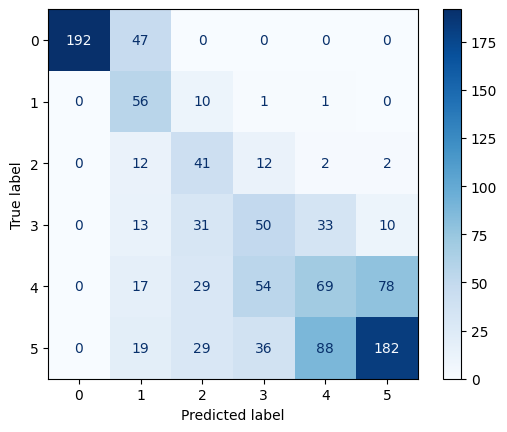

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       239
           1       0.34      0.82      0.48        68
           2       0.29      0.59      0.39        69
           3       0.33      0.36      0.34       137
           4       0.36      0.28      0.31       247
           5       0.67      0.51      0.58       354

    accuracy                           0.53      1114
   macro avg       0.50      0.56      0.50      1114
weighted avg       0.59      0.53      0.54      1114

[ 0  2  3  4  5  6  7  8  9 10 11]
[1]
Epoch 1/50
350/350 [==============================] - ETA: 0s - loss: 1.3635 - sparse_categorical_accuracy: 0.4941
Epoch 1: val_loss improved from inf to 1.84996, saving model to CustomModel_Hyb_5.weights.hdf5
350/350 [==============================] - 46s 123ms/step - loss: 1.3635 - sparse_categorical_accuracy: 0.4941 - val_loss: 1.8500 - val_sparse_categorical_accuracy: 0.4590 - lr: 0.0010
Epoch 2/50
  1/350 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


350/350 [==============================] - ETA: 0s - loss: 1.1727 - sparse_categorical_accuracy: 0.5473
Epoch 2: val_loss improved from 1.84996 to 1.00516, saving model to CustomModel_Hyb_5.weights.hdf5
350/350 [==============================] - 42s 121ms/step - loss: 1.1727 - sparse_categorical_accuracy: 0.5473 - val_loss: 1.0052 - val_sparse_categorical_accuracy: 0.5826 - lr: 0.0010
Epoch 3/50
350/350 [==============================] - ETA: 0s - loss: 1.1573 - sparse_categorical_accuracy: 0.5468
Epoch 3: val_loss did not improve from 1.00516
350/350 [==============================] - 42s 121ms/step - loss: 1.1573 - sparse_categorical_accuracy: 0.5468 - val_loss: 1.1704 - val_sparse_categorical_accuracy: 0.4988 - lr: 0.0010
Epoch 4/50
350/350 [==============================] - ETA: 0s - loss: 1.1215 - sparse_categorical_accuracy: 0.5563
Epoch 4: val_loss did not improve from 1.00516
350/350 [==============================] - 42s 121ms/step - loss: 1.1215 - sparse_categorical_accuracy:

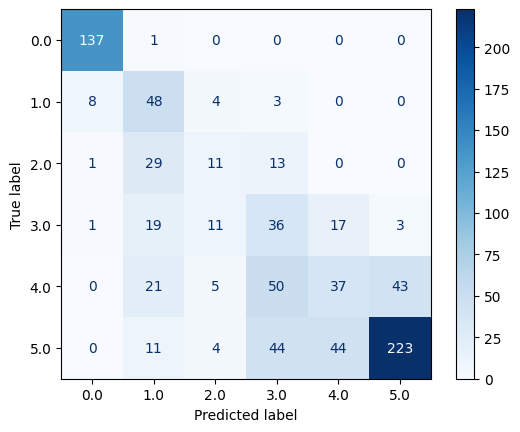

              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96       138
         1.0       0.37      0.76      0.50        63
         2.0       0.31      0.20      0.25        54
         3.0       0.25      0.41      0.31        87
         4.0       0.38      0.24      0.29       156
         5.0       0.83      0.68      0.75       326

    accuracy                           0.60       824
   macro avg       0.51      0.55      0.51       824
weighted avg       0.63      0.60      0.60       824

Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 1.2926 - sparse_categorical_accuracy: 0.5239
Epoch 1: val_loss improved from inf to 0.99408, saving model to CustomModel_indi_Hyb_5.weights.hdf5
29/29 [==============================] - 1s 41ms/step - loss: 1.2926 - sparse_categorical_accuracy: 0.5239 - val_loss: 0.9941 - val_sparse_categorical_accuracy: 0.5517 - lr: 1.6000e-06
Epoch 2/100
 3/29 [==>...........................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - ETA: 0s - loss: 1.3505 - sparse_categorical_accuracy: 0.5109
Epoch 2: val_loss improved from 0.99408 to 0.99313, saving model to CustomModel_indi_Hyb_5.weights.hdf5
29/29 [==============================] - 1s 41ms/step - loss: 1.3505 - sparse_categorical_accuracy: 0.5109 - val_loss: 0.9931 - val_sparse_categorical_accuracy: 0.5603 - lr: 1.6000e-06
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 1.3769 - sparse_categorical_accuracy: 0.5130
Epoch 3: val_loss did not improve from 0.99313
29/29 [==============================] - 1s 39ms/step - loss: 1.3769 - sparse_categorical_accuracy: 0.5130 - val_loss: 0.9972 - val_sparse_categorical_accuracy: 0.5517 - lr: 1.6000e-06
Epoch 4/100
29/29 [==============================] - ETA: 0s - loss: 1.2749 - sparse_categorical_accuracy: 0.5196
Epoch 4: val_loss did not improve from 0.99313
29/29 [==============================] - 1s 40ms/step - loss: 1.2749 - sparse_categorical_accuracy: 0.

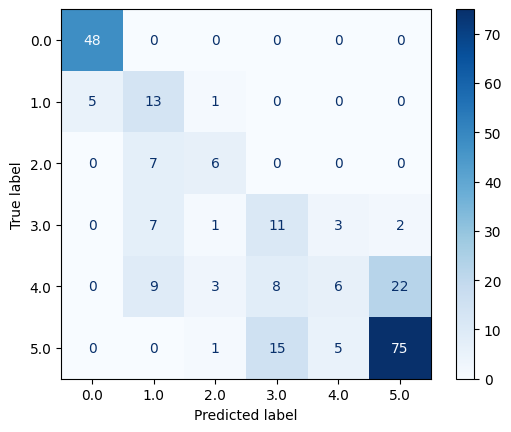

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95        48
         1.0       0.36      0.68      0.47        19
         2.0       0.50      0.46      0.48        13
         3.0       0.32      0.46      0.38        24
         4.0       0.43      0.12      0.19        48
         5.0       0.76      0.78      0.77        96

    accuracy                           0.64       248
   macro avg       0.55      0.59      0.54       248
weighted avg       0.64      0.64      0.62       248

[ 0  1  3  4  5  6  7  8  9 10 11]
[2]
Epoch 1/50
333/333 [==============================] - ETA: 0s - loss: 1.3362 - sparse_categorical_accuracy: 0.5033
Epoch 1: val_loss improved from inf to 1.66472, saving model to CustomModel_Hyb_5.weights.hdf5
333/333 [==============================] - 43s 121ms/step - loss: 1.3362 - sparse_categorical_accuracy: 0.5033 - val_loss: 1.6647 - val_sparse_categorical_accuracy: 0.4327 - lr: 0.0010
Epoch 2/50
  1/333 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


333/333 [==============================] - ETA: 0s - loss: 1.1925 - sparse_categorical_accuracy: 0.5355
Epoch 2: val_loss improved from 1.66472 to 1.11646, saving model to CustomModel_Hyb_5.weights.hdf5
333/333 [==============================] - 40s 119ms/step - loss: 1.1925 - sparse_categorical_accuracy: 0.5355 - val_loss: 1.1165 - val_sparse_categorical_accuracy: 0.5431 - lr: 0.0010
Epoch 3/50
333/333 [==============================] - ETA: 0s - loss: 1.1430 - sparse_categorical_accuracy: 0.5511
Epoch 3: val_loss improved from 1.11646 to 0.94093, saving model to CustomModel_Hyb_5.weights.hdf5
333/333 [==============================] - 40s 120ms/step - loss: 1.1430 - sparse_categorical_accuracy: 0.5511 - val_loss: 0.9409 - val_sparse_categorical_accuracy: 0.6088 - lr: 0.0010
Epoch 4/50
333/333 [==============================] - ETA: 0s - loss: 1.1174 - sparse_categorical_accuracy: 0.5598
Epoch 4: val_loss improved from 0.94093 to 0.92499, saving model to CustomModel_Hyb_5.weights.hdf5

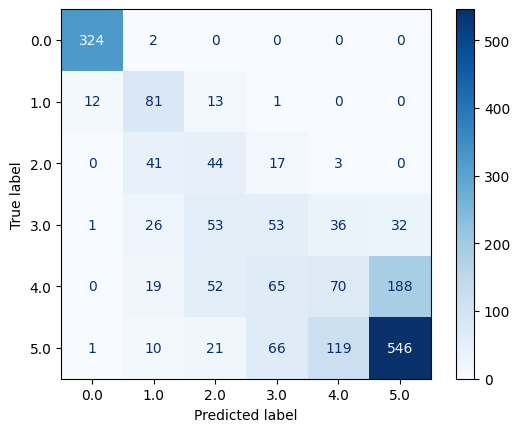

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       326
         1.0       0.45      0.76      0.57       107
         2.0       0.24      0.42      0.31       105
         3.0       0.26      0.26      0.26       201
         4.0       0.31      0.18      0.23       394
         5.0       0.71      0.72      0.71       763

    accuracy                           0.59      1896
   macro avg       0.49      0.55      0.51      1896
weighted avg       0.58      0.59      0.58      1896

Epoch 1/100
67/67 [==============================] - ETA: 0s - loss: 1.1946 - sparse_categorical_accuracy: 0.5033
Epoch 1: val_loss improved from inf to 0.96374, saving model to CustomModel_indi_Hyb_5.weights.hdf5
67/67 [==============================] - 3s 40ms/step - loss: 1.1946 - sparse_categorical_accuracy: 0.5033 - val_loss: 0.9637 - val_sparse_categorical_accuracy: 0.5489 - lr: 8.0000e-06
Epoch 2/100
 3/67 [>.............................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


67/67 [==============================] - ETA: 0s - loss: 1.1471 - sparse_categorical_accuracy: 0.5410
Epoch 2: val_loss did not improve from 0.96374
67/67 [==============================] - 3s 39ms/step - loss: 1.1471 - sparse_categorical_accuracy: 0.5410 - val_loss: 0.9767 - val_sparse_categorical_accuracy: 0.5150 - lr: 8.0000e-06
Epoch 3/100
67/67 [==============================] - ETA: 0s - loss: 1.1528 - sparse_categorical_accuracy: 0.5212
Epoch 3: val_loss did not improve from 0.96374
67/67 [==============================] - 3s 39ms/step - loss: 1.1528 - sparse_categorical_accuracy: 0.5212 - val_loss: 0.9729 - val_sparse_categorical_accuracy: 0.5113 - lr: 8.0000e-06
Epoch 4/100
67/67 [==============================] - ETA: 0s - loss: 1.1813 - sparse_categorical_accuracy: 0.5212
Epoch 4: val_loss improved from 0.96374 to 0.95752, saving model to CustomModel_indi_Hyb_5.weights.hdf5
67/67 [==============================] - 3s 39ms/step - loss: 1.1813 - sparse_categorical_accuracy: 0.

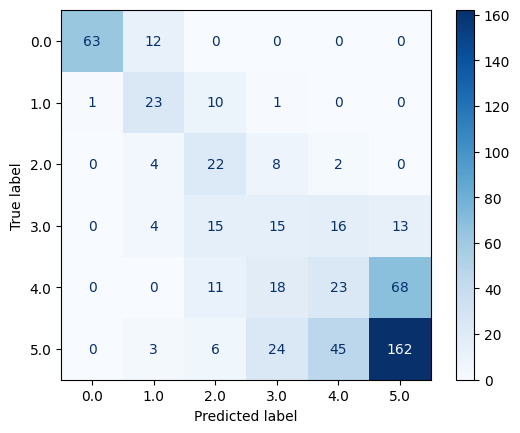

              precision    recall  f1-score   support

         0.0       0.98      0.84      0.91        75
         1.0       0.50      0.66      0.57        35
         2.0       0.34      0.61      0.44        36
         3.0       0.23      0.24      0.23        63
         4.0       0.27      0.19      0.22       120
         5.0       0.67      0.68      0.67       240

    accuracy                           0.54       569
   macro avg       0.50      0.54      0.51       569
weighted avg       0.55      0.54      0.54       569

[ 0  1  2  4  5  6  7  8  9 10 11]
[3]
Epoch 1/50
328/328 [==============================] - ETA: 0s - loss: 1.3391 - sparse_categorical_accuracy: 0.4944
Epoch 1: val_loss improved from inf to 1.21410, saving model to CustomModel_Hyb_5.weights.hdf5
328/328 [==============================] - 42s 120ms/step - loss: 1.3391 - sparse_categorical_accuracy: 0.4944 - val_loss: 1.2141 - val_sparse_categorical_accuracy: 0.5614 - lr: 0.0010
Epoch 2/50
  1/328 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


328/328 [==============================] - ETA: 0s - loss: 1.1777 - sparse_categorical_accuracy: 0.5430
Epoch 2: val_loss did not improve from 1.21410
328/328 [==============================] - 39s 118ms/step - loss: 1.1777 - sparse_categorical_accuracy: 0.5430 - val_loss: 1.4848 - val_sparse_categorical_accuracy: 0.4835 - lr: 0.0010
Epoch 3/50
328/328 [==============================] - ETA: 0s - loss: 1.1505 - sparse_categorical_accuracy: 0.5426
Epoch 3: val_loss improved from 1.21410 to 0.99278, saving model to CustomModel_Hyb_5.weights.hdf5
328/328 [==============================] - 39s 118ms/step - loss: 1.1505 - sparse_categorical_accuracy: 0.5426 - val_loss: 0.9928 - val_sparse_categorical_accuracy: 0.5782 - lr: 0.0010
Epoch 4/50
328/328 [==============================] - ETA: 0s - loss: 1.1320 - sparse_categorical_accuracy: 0.5494
Epoch 4: val_loss did not improve from 0.99278
328/328 [==============================] - 39s 118ms/step - loss: 1.1320 - sparse_categorical_accuracy:

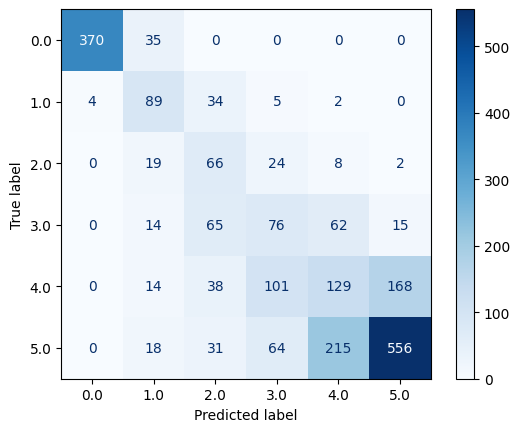

              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95       405
         1.0       0.47      0.66      0.55       134
         2.0       0.28      0.55      0.37       119
         3.0       0.28      0.33      0.30       232
         4.0       0.31      0.29      0.30       450
         5.0       0.75      0.63      0.68       884

    accuracy                           0.58      2224
   macro avg       0.51      0.56      0.53      2224
weighted avg       0.61      0.58      0.59      2224

Epoch 1/100
77/78 [============================>.] - ETA: 0s - loss: 1.4890 - sparse_categorical_accuracy: 0.5024
Epoch 1: val_loss improved from inf to 1.06374, saving model to CustomModel_indi_Hyb_5.weights.hdf5
78/78 [==============================] - 3s 40ms/step - loss: 1.4975 - sparse_categorical_accuracy: 0.5008 - val_loss: 1.0637 - val_sparse_categorical_accuracy: 0.5865 - lr: 1.6000e-06
Epoch 2/100
 3/78 [>.............................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/78 [============================>.] - ETA: 0s - loss: 1.4195 - sparse_categorical_accuracy: 0.4903
Epoch 2: val_loss did not improve from 1.06374
78/78 [==============================] - 3s 39ms/step - loss: 1.4189 - sparse_categorical_accuracy: 0.4895 - val_loss: 1.0864 - val_sparse_categorical_accuracy: 0.5769 - lr: 1.6000e-06
Epoch 3/100
77/78 [============================>.] - ETA: 0s - loss: 1.3671 - sparse_categorical_accuracy: 0.5097
Epoch 3: val_loss did not improve from 1.06374
78/78 [==============================] - 3s 39ms/step - loss: 1.3627 - sparse_categorical_accuracy: 0.5105 - val_loss: 1.0854 - val_sparse_categorical_accuracy: 0.5737 - lr: 1.6000e-06
Epoch 4/100
77/78 [============================>.] - ETA: 0s - loss: 1.4915 - sparse_categorical_accuracy: 0.4870
Epoch 4: val_loss did not improve from 1.06374

Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-06.
78/78 [==============================] - 3s 39ms/step - loss: 1.4872 - sparse_categorical_accuracy

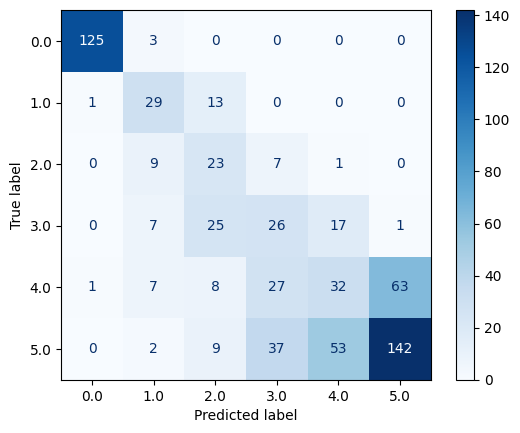

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98       128
         1.0       0.51      0.67      0.58        43
         2.0       0.29      0.57      0.39        40
         3.0       0.27      0.34      0.30        76
         4.0       0.31      0.23      0.27       138
         5.0       0.69      0.58      0.63       243

    accuracy                           0.56       668
   macro avg       0.51      0.56      0.52       668
weighted avg       0.58      0.56      0.57       668

[ 0  1  2  3  5  6  7  8  9 10 11]
[4]
Epoch 1/50
339/339 [==============================] - ETA: 0s - loss: 1.3298 - sparse_categorical_accuracy: 0.5024
Epoch 1: val_loss improved from inf to 1.22164, saving model to CustomModel_Hyb_5.weights.hdf5
339/339 [==============================] - 43s 119ms/step - loss: 1.3298 - sparse_categorical_accuracy: 0.5024 - val_loss: 1.2216 - val_sparse_categorical_accuracy: 0.5453 - lr: 0.0010
Epoch 2/50
  1/339 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


339/339 [==============================] - ETA: 0s - loss: 1.2035 - sparse_categorical_accuracy: 0.5314
Epoch 2: val_loss improved from 1.22164 to 0.89209, saving model to CustomModel_Hyb_5.weights.hdf5
339/339 [==============================] - 40s 117ms/step - loss: 1.2035 - sparse_categorical_accuracy: 0.5314 - val_loss: 0.8921 - val_sparse_categorical_accuracy: 0.6240 - lr: 0.0010
Epoch 3/50
339/339 [==============================] - ETA: 0s - loss: 1.1522 - sparse_categorical_accuracy: 0.5419
Epoch 3: val_loss did not improve from 0.89209
339/339 [==============================] - 40s 117ms/step - loss: 1.1522 - sparse_categorical_accuracy: 0.5419 - val_loss: 1.0630 - val_sparse_categorical_accuracy: 0.5481 - lr: 0.0010
Epoch 4/50
339/339 [==============================] - ETA: 0s - loss: 1.1287 - sparse_categorical_accuracy: 0.5453
Epoch 4: val_loss did not improve from 0.89209
339/339 [==============================] - 40s 117ms/step - loss: 1.1287 - sparse_categorical_accuracy:

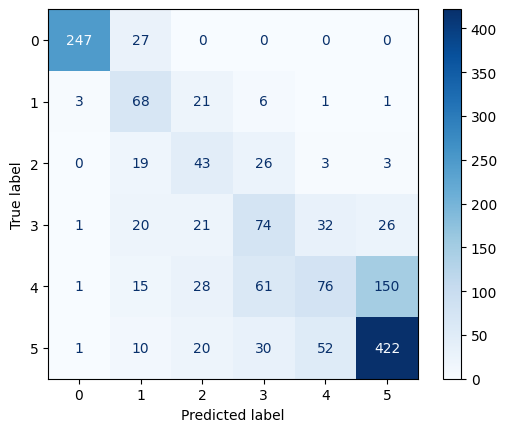

              precision    recall  f1-score   support

           0       0.98      0.90      0.94       274
           1       0.43      0.68      0.53       100
           2       0.32      0.46      0.38        94
           3       0.38      0.43      0.40       174
           4       0.46      0.23      0.31       331
           5       0.70      0.79      0.74       535

    accuracy                           0.62      1508
   macro avg       0.54      0.58      0.55      1508
weighted avg       0.62      0.62      0.61      1508

Epoch 1/100
53/53 [==============================] - ETA: 0s - loss: 1.3550 - sparse_categorical_accuracy: 0.5498
Epoch 1: val_loss improved from inf to 0.87380, saving model to CustomModel_indi_Hyb_5.weights.hdf5
53/53 [==============================] - 5s 51ms/step - loss: 1.3550 - sparse_categorical_accuracy: 0.5498 - val_loss: 0.8738 - val_sparse_categorical_accuracy: 0.5782 - lr: 1.6000e-06
Epoch 2/100
 3/53 [>.............................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


53/53 [==============================] - ETA: 0s - loss: 1.3380 - sparse_categorical_accuracy: 0.5391
Epoch 2: val_loss did not improve from 0.87380
53/53 [==============================] - 2s 40ms/step - loss: 1.3380 - sparse_categorical_accuracy: 0.5391 - val_loss: 0.9485 - val_sparse_categorical_accuracy: 0.5261 - lr: 1.6000e-06
Epoch 3/100
53/53 [==============================] - ETA: 0s - loss: 1.3950 - sparse_categorical_accuracy: 0.5355
Epoch 3: val_loss did not improve from 0.87380
53/53 [==============================] - 2s 39ms/step - loss: 1.3950 - sparse_categorical_accuracy: 0.5355 - val_loss: 0.9828 - val_sparse_categorical_accuracy: 0.4976 - lr: 1.6000e-06
Epoch 4/100
53/53 [==============================] - ETA: 0s - loss: 1.2890 - sparse_categorical_accuracy: 0.5462
Epoch 4: val_loss did not improve from 0.87380

Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-06.
53/53 [==============================] - 2s 40ms/step - loss: 1.2890 - sparse_categorical_accuracy

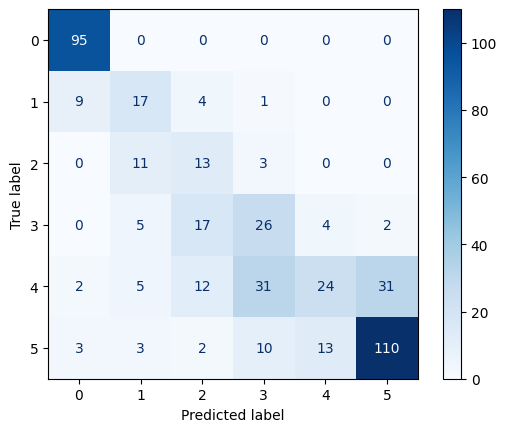

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        95
           1       0.41      0.55      0.47        31
           2       0.27      0.48      0.35        27
           3       0.37      0.48      0.42        54
           4       0.59      0.23      0.33       105
           5       0.77      0.78      0.77       141

    accuracy                           0.63       453
   macro avg       0.55      0.59      0.54       453
weighted avg       0.65      0.63      0.62       453

[ 0  1  2  3  4  6  7  8  9 10 11]
[5]
Epoch 1/50
328/328 [==============================] - ETA: 0s - loss: 1.3539 - sparse_categorical_accuracy: 0.4945
Epoch 1: val_loss improved from inf to 2.16095, saving model to CustomModel_Hyb_5.weights.hdf5
328/328 [==============================] - 42s 120ms/step - loss: 1.3539 - sparse_categorical_accuracy: 0.4945 - val_loss: 2.1609 - val_sparse_categorical_accuracy: 0.2157 - lr: 0.0010
Epoch 2/50
  1/328 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


328/328 [==============================] - ETA: 0s - loss: 1.1975 - sparse_categorical_accuracy: 0.5293
Epoch 2: val_loss improved from 2.16095 to 1.37184, saving model to CustomModel_Hyb_5.weights.hdf5
328/328 [==============================] - 39s 119ms/step - loss: 1.1975 - sparse_categorical_accuracy: 0.5293 - val_loss: 1.3718 - val_sparse_categorical_accuracy: 0.5202 - lr: 0.0010
Epoch 3/50
328/328 [==============================] - ETA: 0s - loss: 1.1656 - sparse_categorical_accuracy: 0.5354
Epoch 3: val_loss did not improve from 1.37184
328/328 [==============================] - 39s 119ms/step - loss: 1.1656 - sparse_categorical_accuracy: 0.5354 - val_loss: 1.5101 - val_sparse_categorical_accuracy: 0.4709 - lr: 0.0010
Epoch 4/50
328/328 [==============================] - ETA: 0s - loss: 1.1330 - sparse_categorical_accuracy: 0.5442
Epoch 4: val_loss improved from 1.37184 to 0.95763, saving model to CustomModel_Hyb_5.weights.hdf5
328/328 [==============================] - 39s 119m

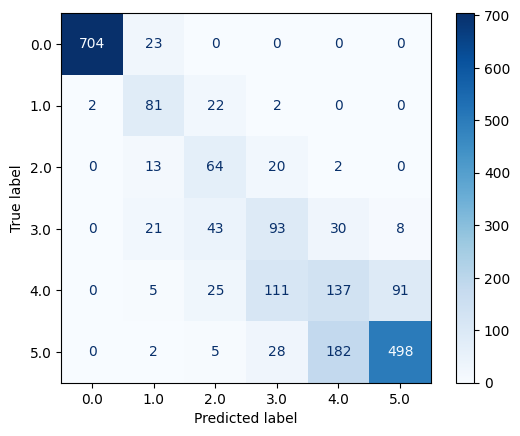

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98       727
         1.0       0.56      0.76      0.64       107
         2.0       0.40      0.65      0.50        99
         3.0       0.37      0.48      0.41       195
         4.0       0.39      0.37      0.38       369
         5.0       0.83      0.70      0.76       715

    accuracy                           0.71      2212
   macro avg       0.59      0.65      0.61      2212
weighted avg       0.74      0.71      0.72      2212

Epoch 1/100
77/78 [============================>.] - ETA: 0s - loss: 1.2870 - sparse_categorical_accuracy: 0.6006
Epoch 1: val_loss improved from inf to 0.72557, saving model to CustomModel_indi_Hyb_5.weights.hdf5
78/78 [==============================] - 3s 40ms/step - loss: 1.2820 - sparse_categorical_accuracy: 0.6018 - val_loss: 0.7256 - val_sparse_categorical_accuracy: 0.7129 - lr: 1.6000e-06
Epoch 2/100
 3/78 [>.............................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


77/78 [============================>.] - ETA: 0s - loss: 1.2449 - sparse_categorical_accuracy: 0.6120
Epoch 2: val_loss did not improve from 0.72557
78/78 [==============================] - 3s 39ms/step - loss: 1.2505 - sparse_categorical_accuracy: 0.6099 - val_loss: 0.7428 - val_sparse_categorical_accuracy: 0.7129 - lr: 1.6000e-06
Epoch 3/100
77/78 [============================>.] - ETA: 0s - loss: 1.2147 - sparse_categorical_accuracy: 0.6047
Epoch 3: val_loss did not improve from 0.72557
78/78 [==============================] - 3s 39ms/step - loss: 1.2124 - sparse_categorical_accuracy: 0.6058 - val_loss: 0.7810 - val_sparse_categorical_accuracy: 0.6968 - lr: 1.6000e-06
Epoch 4/100
77/78 [============================>.] - ETA: 0s - loss: 1.2763 - sparse_categorical_accuracy: 0.5869
Epoch 4: val_loss did not improve from 0.72557

Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-06.
78/78 [==============================] - 3s 39ms/step - loss: 1.2783 - sparse_categorical_accuracy

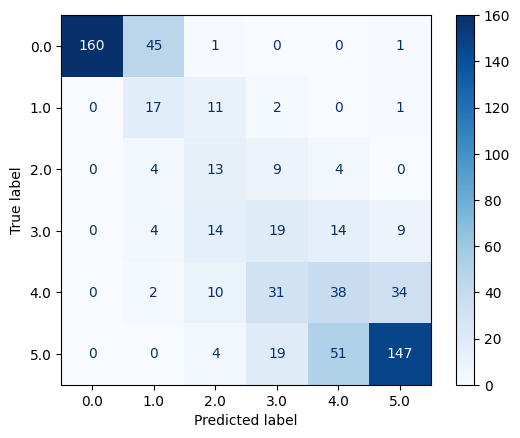

              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87       207
         1.0       0.24      0.55      0.33        31
         2.0       0.25      0.43      0.31        30
         3.0       0.24      0.32      0.27        60
         4.0       0.36      0.33      0.34       115
         5.0       0.77      0.67      0.71       221

    accuracy                           0.59       664
   macro avg       0.47      0.51      0.47       664
weighted avg       0.67      0.59      0.62       664

[ 0  1  2  3  4  5  7  8  9 10 11]
[6]
Epoch 1/50
348/348 [==============================] - ETA: 0s - loss: 1.3394 - sparse_categorical_accuracy: 0.4978
Epoch 1: val_loss improved from inf to 0.99668, saving model to CustomModel_Hyb_5.weights.hdf5
348/348 [==============================] - 44s 120ms/step - loss: 1.3394 - sparse_categorical_accuracy: 0.4978 - val_loss: 0.9967 - val_sparse_categorical_accuracy: 0.6080 - lr: 0.0010
Epoch 2/50
  1/348 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


348/348 [==============================] - ETA: 0s - loss: 1.1732 - sparse_categorical_accuracy: 0.5440
Epoch 2: val_loss did not improve from 0.99668
348/348 [==============================] - 41s 117ms/step - loss: 1.1732 - sparse_categorical_accuracy: 0.5440 - val_loss: 1.0488 - val_sparse_categorical_accuracy: 0.5464 - lr: 0.0010
Epoch 3/50
348/348 [==============================] - ETA: 0s - loss: 1.1555 - sparse_categorical_accuracy: 0.5497
Epoch 3: val_loss did not improve from 0.99668
348/348 [==============================] - 41s 117ms/step - loss: 1.1555 - sparse_categorical_accuracy: 0.5497 - val_loss: 1.0425 - val_sparse_categorical_accuracy: 0.5674 - lr: 0.0010
Epoch 4/50
348/348 [==============================] - ETA: 0s - loss: 1.1173 - sparse_categorical_accuracy: 0.5592
Epoch 4: val_loss did not improve from 0.99668

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
348/348 [==============================] - 41s 117ms/step - loss: 1.1173 - sp

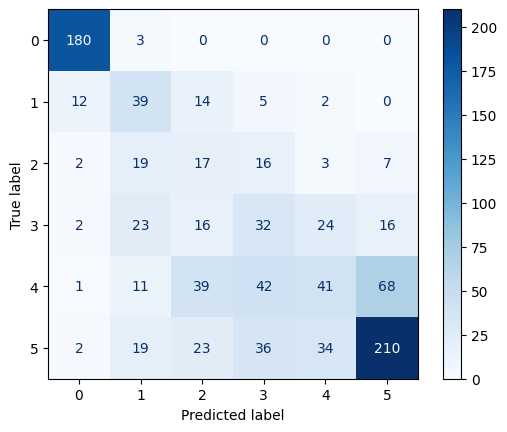

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       183
           1       0.34      0.54      0.42        72
           2       0.16      0.27      0.20        64
           3       0.24      0.28      0.26       113
           4       0.39      0.20      0.27       202
           5       0.70      0.65      0.67       324

    accuracy                           0.54       958
   macro avg       0.46      0.49      0.46       958
weighted avg       0.56      0.54      0.54       958

Epoch 1/100
33/34 [============================>.] - ETA: 0s - loss: 1.4111 - sparse_categorical_accuracy: 0.5549
Epoch 1: val_loss improved from inf to 0.90990, saving model to CustomModel_indi_Hyb_5.weights.hdf5
34/34 [==============================] - 4s 57ms/step - loss: 1.4357 - sparse_categorical_accuracy: 0.5541 - val_loss: 0.9099 - val_sparse_categorical_accuracy: 0.5448 - lr: 1.6000e-06
Epoch 2/100
 3/34 [=>............................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


33/34 [============================>.] - ETA: 0s - loss: 1.4014 - sparse_categorical_accuracy: 0.5587
Epoch 2: val_loss did not improve from 0.90990
34/34 [==============================] - 1s 39ms/step - loss: 1.3958 - sparse_categorical_accuracy: 0.5578 - val_loss: 0.9109 - val_sparse_categorical_accuracy: 0.5672 - lr: 1.6000e-06
Epoch 3/100
33/34 [============================>.] - ETA: 0s - loss: 1.3546 - sparse_categorical_accuracy: 0.5398
Epoch 3: val_loss did not improve from 0.90990
34/34 [==============================] - 1s 39ms/step - loss: 1.3845 - sparse_categorical_accuracy: 0.5354 - val_loss: 0.9113 - val_sparse_categorical_accuracy: 0.5746 - lr: 1.6000e-06
Epoch 4/100
33/34 [============================>.] - ETA: 0s - loss: 1.3235 - sparse_categorical_accuracy: 0.5625
Epoch 4: val_loss did not improve from 0.90990

Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-06.
34/34 [==============================] - 1s 39ms/step - loss: 1.3182 - sparse_categorical_accuracy

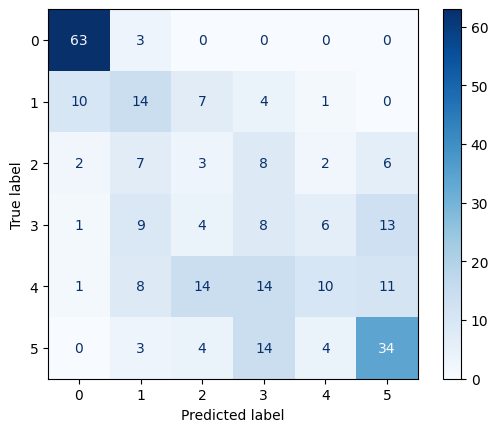

              precision    recall  f1-score   support

           0       0.82      0.95      0.88        66
           1       0.32      0.39      0.35        36
           2       0.09      0.11      0.10        28
           3       0.17      0.20      0.18        41
           4       0.43      0.17      0.25        58
           5       0.53      0.58      0.55        59

    accuracy                           0.46       288
   macro avg       0.39      0.40      0.39       288
weighted avg       0.46      0.46      0.44       288

[ 0  1  2  3  4  5  6  8  9 10 11]
[7]
Epoch 1/50
305/305 [==============================] - ETA: 0s - loss: 1.3453 - sparse_categorical_accuracy: 0.4948
Epoch 1: val_loss improved from inf to 1.73217, saving model to CustomModel_Hyb_5.weights.hdf5
305/305 [==============================] - 39s 119ms/step - loss: 1.3453 - sparse_categorical_accuracy: 0.4948 - val_loss: 1.7322 - val_sparse_categorical_accuracy: 0.4694 - lr: 0.0010
Epoch 2/50
  1/305 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


305/305 [==============================] - ETA: 0s - loss: 1.2013 - sparse_categorical_accuracy: 0.5303
Epoch 2: val_loss improved from 1.73217 to 0.95015, saving model to CustomModel_Hyb_5.weights.hdf5
305/305 [==============================] - 36s 117ms/step - loss: 1.2013 - sparse_categorical_accuracy: 0.5303 - val_loss: 0.9502 - val_sparse_categorical_accuracy: 0.6131 - lr: 0.0010
Epoch 3/50
305/305 [==============================] - ETA: 0s - loss: 1.1530 - sparse_categorical_accuracy: 0.5454
Epoch 3: val_loss did not improve from 0.95015
305/305 [==============================] - 36s 117ms/step - loss: 1.1530 - sparse_categorical_accuracy: 0.5454 - val_loss: 1.5321 - val_sparse_categorical_accuracy: 0.4514 - lr: 0.0010
Epoch 4/50
305/305 [==============================] - ETA: 0s - loss: 1.1214 - sparse_categorical_accuracy: 0.5442
Epoch 4: val_loss did not improve from 0.95015
305/305 [==============================] - 36s 117ms/step - loss: 1.1214 - sparse_categorical_accuracy:

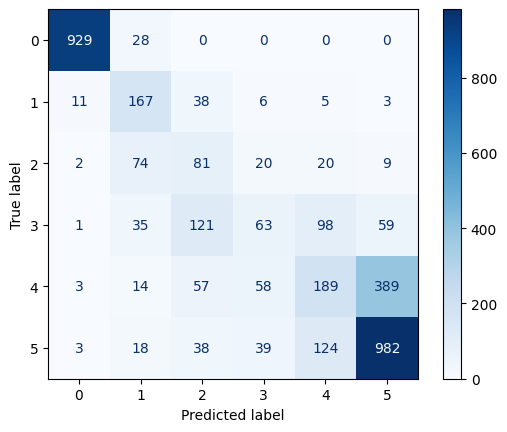

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       957
           1       0.50      0.73      0.59       230
           2       0.24      0.39      0.30       206
           3       0.34      0.17      0.22       377
           4       0.43      0.27      0.33       710
           5       0.68      0.82      0.74      1204

    accuracy                           0.65      3684
   macro avg       0.53      0.56      0.53      3684
weighted avg       0.64      0.65      0.64      3684

Epoch 1/100
129/129 [==============================] - ETA: 0s - loss: 1.2453 - sparse_categorical_accuracy: 0.5364
Epoch 1: val_loss improved from inf to 0.76540, saving model to CustomModel_indi_Hyb_5.weights.hdf5
129/129 [==============================] - 7s 43ms/step - loss: 1.2453 - sparse_categorical_accuracy: 0.5364 - val_loss: 0.7654 - val_sparse_categorical_accuracy: 0.6899 - lr: 8.0000e-06
Epoch 2/100
  3/129 [..............................] -

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


129/129 [==============================] - ETA: 0s - loss: 1.1701 - sparse_categorical_accuracy: 0.5548
Epoch 2: val_loss did not improve from 0.76540
129/129 [==============================] - 5s 39ms/step - loss: 1.1701 - sparse_categorical_accuracy: 0.5548 - val_loss: 0.7715 - val_sparse_categorical_accuracy: 0.6860 - lr: 8.0000e-06
Epoch 3/100
129/129 [==============================] - ETA: 0s - loss: 1.2401 - sparse_categorical_accuracy: 0.5330
Epoch 3: val_loss did not improve from 0.76540
129/129 [==============================] - 5s 39ms/step - loss: 1.2401 - sparse_categorical_accuracy: 0.5330 - val_loss: 0.7802 - val_sparse_categorical_accuracy: 0.6860 - lr: 8.0000e-06
Epoch 4/100
129/129 [==============================] - ETA: 0s - loss: 1.2197 - sparse_categorical_accuracy: 0.5504
Epoch 4: val_loss did not improve from 0.76540

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
129/129 [==============================] - 5s 39ms/step - loss: 1.2197 

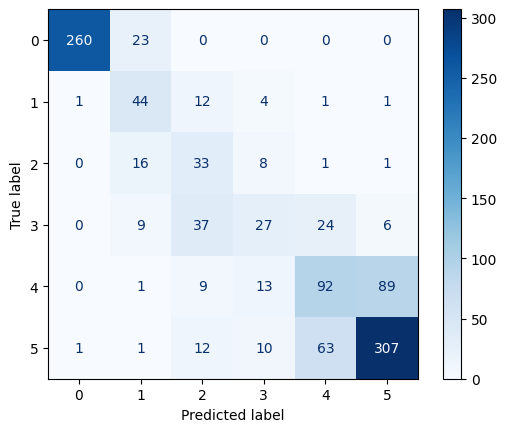

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       283
           1       0.47      0.70      0.56        63
           2       0.32      0.56      0.41        59
           3       0.44      0.26      0.33       103
           4       0.51      0.45      0.48       204
           5       0.76      0.78      0.77       394

    accuracy                           0.69      1106
   macro avg       0.58      0.61      0.58      1106
weighted avg       0.70      0.69      0.69      1106

[ 0  1  2  3  4  5  6  7  9 10 11]
[8]
Epoch 1/50
350/350 [==============================] - ETA: 0s - loss: 1.3321 - sparse_categorical_accuracy: 0.5012
Epoch 1: val_loss improved from inf to 1.05904, saving model to CustomModel_Hyb_5.weights.hdf5
350/350 [==============================] - 45s 121ms/step - loss: 1.3321 - sparse_categorical_accuracy: 0.5012 - val_loss: 1.0590 - val_sparse_categorical_accuracy: 0.5452 - lr: 0.0010
Epoch 2/50
  1/350 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


350/350 [==============================] - ETA: 0s - loss: 1.1687 - sparse_categorical_accuracy: 0.5491
Epoch 2: val_loss improved from 1.05904 to 0.88363, saving model to CustomModel_Hyb_5.weights.hdf5
350/350 [==============================] - 42s 119ms/step - loss: 1.1687 - sparse_categorical_accuracy: 0.5491 - val_loss: 0.8836 - val_sparse_categorical_accuracy: 0.6429 - lr: 0.0010
Epoch 3/50
350/350 [==============================] - ETA: 0s - loss: 1.1365 - sparse_categorical_accuracy: 0.5543
Epoch 3: val_loss did not improve from 0.88363
350/350 [==============================] - 42s 119ms/step - loss: 1.1365 - sparse_categorical_accuracy: 0.5543 - val_loss: 1.1266 - val_sparse_categorical_accuracy: 0.5657 - lr: 0.0010
Epoch 4/50
350/350 [==============================] - ETA: 0s - loss: 1.1165 - sparse_categorical_accuracy: 0.5602
Epoch 4: val_loss did not improve from 0.88363
350/350 [==============================] - 42s 119ms/step - loss: 1.1165 - sparse_categorical_accuracy:

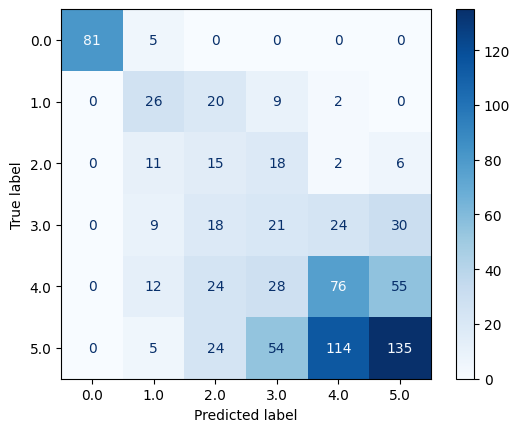

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97        86
         1.0       0.38      0.46      0.42        57
         2.0       0.15      0.29      0.20        52
         3.0       0.16      0.21      0.18       102
         4.0       0.35      0.39      0.37       195
         5.0       0.60      0.41      0.48       332

    accuracy                           0.43       824
   macro avg       0.44      0.45      0.44       824
weighted avg       0.48      0.43      0.45       824

Epoch 1/100
29/29 [==============================] - ETA: 0s - loss: 1.7606 - sparse_categorical_accuracy: 0.3435
Epoch 1: val_loss improved from inf to 0.92850, saving model to CustomModel_indi_Hyb_5.weights.hdf5
29/29 [==============================] - 1s 41ms/step - loss: 1.7606 - sparse_categorical_accuracy: 0.3435 - val_loss: 0.9285 - val_sparse_categorical_accuracy: 0.5862 - lr: 1.6000e-06
Epoch 2/100
 3/29 [==>...........................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - ETA: 0s - loss: 1.6931 - sparse_categorical_accuracy: 0.3196
Epoch 2: val_loss improved from 0.92850 to 0.91539, saving model to CustomModel_indi_Hyb_5.weights.hdf5
29/29 [==============================] - 1s 41ms/step - loss: 1.6931 - sparse_categorical_accuracy: 0.3196 - val_loss: 0.9154 - val_sparse_categorical_accuracy: 0.6034 - lr: 1.6000e-06
Epoch 3/100
29/29 [==============================] - ETA: 0s - loss: 1.6926 - sparse_categorical_accuracy: 0.3196
Epoch 3: val_loss improved from 0.91539 to 0.90803, saving model to CustomModel_indi_Hyb_5.weights.hdf5
29/29 [==============================] - 1s 41ms/step - loss: 1.6926 - sparse_categorical_accuracy: 0.3196 - val_loss: 0.9080 - val_sparse_categorical_accuracy: 0.6207 - lr: 1.6000e-06
Epoch 4/100
29/29 [==============================] - ETA: 0s - loss: 1.6379 - sparse_categorical_accuracy: 0.3391
Epoch 4: val_loss improved from 0.90803 to 0.90165, saving model to CustomModel_indi_Hyb_5.w

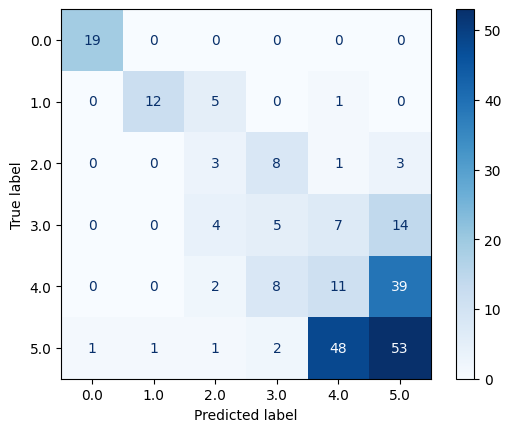

              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97        19
         1.0       0.92      0.67      0.77        18
         2.0       0.20      0.20      0.20        15
         3.0       0.22      0.17      0.19        30
         4.0       0.16      0.18      0.17        60
         5.0       0.49      0.50      0.49       106

    accuracy                           0.42       248
   macro avg       0.49      0.45      0.47       248
weighted avg       0.43      0.42      0.42       248

[ 0  1  2  3  4  5  6  7  8 10 11]
[9]
Epoch 1/50
349/349 [==============================] - ETA: 0s - loss: 1.3345 - sparse_categorical_accuracy: 0.5018
Epoch 1: val_loss improved from inf to 1.04381, saving model to CustomModel_Hyb_5.weights.hdf5
349/349 [==============================] - 44s 120ms/step - loss: 1.3345 - sparse_categorical_accuracy: 0.5018 - val_loss: 1.0438 - val_sparse_categorical_accuracy: 0.5492 - lr: 0.0010
Epoch 2/50
  1/349 [...

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


349/349 [==============================] - ETA: 0s - loss: 1.1720 - sparse_categorical_accuracy: 0.5407
Epoch 2: val_loss did not improve from 1.04381
349/349 [==============================] - 41s 119ms/step - loss: 1.1720 - sparse_categorical_accuracy: 0.5407 - val_loss: 1.1782 - val_sparse_categorical_accuracy: 0.5590 - lr: 0.0010
Epoch 3/50
349/349 [==============================] - ETA: 0s - loss: 1.1417 - sparse_categorical_accuracy: 0.5463
Epoch 3: val_loss did not improve from 1.04381
349/349 [==============================] - 41s 119ms/step - loss: 1.1417 - sparse_categorical_accuracy: 0.5463 - val_loss: 1.3561 - val_sparse_categorical_accuracy: 0.4695 - lr: 0.0010
Epoch 4/50
349/349 [==============================] - ETA: 0s - loss: 1.1203 - sparse_categorical_accuracy: 0.5574
Epoch 4: val_loss improved from 1.04381 to 0.99315, saving model to CustomModel_Hyb_5.weights.hdf5
349/349 [==============================] - 41s 119ms/step - loss: 1.1203 - sparse_categorical_accuracy:

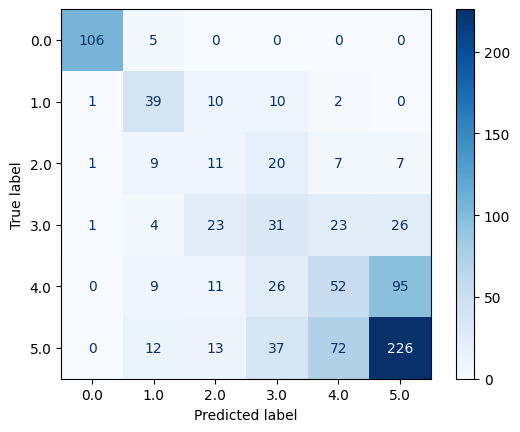

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96       111
         1.0       0.50      0.63      0.56        62
         2.0       0.16      0.20      0.18        55
         3.0       0.25      0.29      0.27       108
         4.0       0.33      0.27      0.30       193
         5.0       0.64      0.63      0.63       360

    accuracy                           0.52       889
   macro avg       0.48      0.49      0.48       889
weighted avg       0.53      0.52      0.52       889

Epoch 1/100
31/32 [============================>.] - ETA: 0s - loss: 1.4486 - sparse_categorical_accuracy: 0.4819
Epoch 1: val_loss improved from inf to 1.72643, saving model to CustomModel_indi_Hyb_5.weights.hdf5
32/32 [==============================] - 1s 41ms/step - loss: 1.4487 - sparse_categorical_accuracy: 0.4829 - val_loss: 1.7264 - val_sparse_categorical_accuracy: 0.2960 - lr: 8.0000e-06
Epoch 2/100
 3/32 [=>............................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


31/32 [============================>.] - ETA: 0s - loss: 1.2632 - sparse_categorical_accuracy: 0.5323
Epoch 2: val_loss did not improve from 1.72643
32/32 [==============================] - 1s 39ms/step - loss: 1.2640 - sparse_categorical_accuracy: 0.5312 - val_loss: 1.7308 - val_sparse_categorical_accuracy: 0.2800 - lr: 8.0000e-06
Epoch 3/100
31/32 [============================>.] - ETA: 0s - loss: 1.2815 - sparse_categorical_accuracy: 0.5363
Epoch 3: val_loss did not improve from 1.72643
32/32 [==============================] - 1s 40ms/step - loss: 1.2810 - sparse_categorical_accuracy: 0.5352 - val_loss: 1.7593 - val_sparse_categorical_accuracy: 0.2800 - lr: 8.0000e-06
Epoch 4/100
31/32 [============================>.] - ETA: 0s - loss: 1.2669 - sparse_categorical_accuracy: 0.4819
Epoch 4: val_loss did not improve from 1.72643

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
32/32 [==============================] - 1s 39ms/step - loss: 1.2657 - sparse_cat

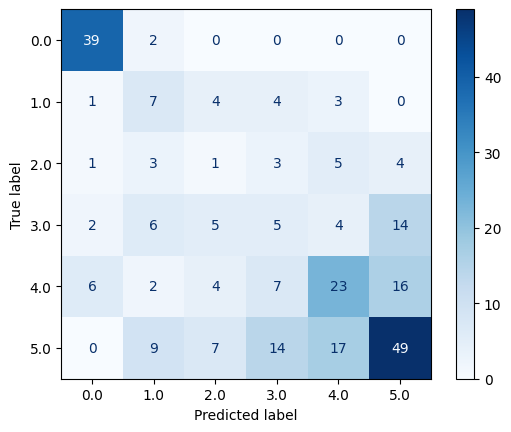

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87        41
         1.0       0.24      0.37      0.29        19
         2.0       0.05      0.06      0.05        17
         3.0       0.15      0.14      0.14        36
         4.0       0.44      0.40      0.42        58
         5.0       0.59      0.51      0.55        96

    accuracy                           0.46       267
   macro avg       0.38      0.40      0.39       267
weighted avg       0.47      0.46      0.46       267

[ 0  1  2  3  4  5  6  7  8  9 11]
[10]
Epoch 1/50
319/319 [==============================] - ETA: 0s - loss: 1.3299 - sparse_categorical_accuracy: 0.5105
Epoch 1: val_loss improved from inf to 1.38027, saving model to CustomModel_Hyb_5.weights.hdf5
319/319 [==============================] - 41s 120ms/step - loss: 1.3299 - sparse_categorical_accuracy: 0.5105 - val_loss: 1.3803 - val_sparse_categorical_accuracy: 0.5067 - lr: 0.0010
Epoch 2/50
  1/319 [..

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


319/319 [==============================] - ETA: 0s - loss: 1.1774 - sparse_categorical_accuracy: 0.5523
Epoch 2: val_loss improved from 1.38027 to 1.30007, saving model to CustomModel_Hyb_5.weights.hdf5
319/319 [==============================] - 38s 119ms/step - loss: 1.1774 - sparse_categorical_accuracy: 0.5523 - val_loss: 1.3001 - val_sparse_categorical_accuracy: 0.5311 - lr: 0.0010
Epoch 3/50
319/319 [==============================] - ETA: 0s - loss: 1.1519 - sparse_categorical_accuracy: 0.5556
Epoch 3: val_loss improved from 1.30007 to 1.26129, saving model to CustomModel_Hyb_5.weights.hdf5
319/319 [==============================] - 38s 119ms/step - loss: 1.1519 - sparse_categorical_accuracy: 0.5556 - val_loss: 1.2613 - val_sparse_categorical_accuracy: 0.4708 - lr: 0.0010
Epoch 4/50
319/319 [==============================] - ETA: 0s - loss: 1.1154 - sparse_categorical_accuracy: 0.5607
Epoch 4: val_loss improved from 1.26129 to 0.91642, saving model to CustomModel_Hyb_5.weights.hdf5

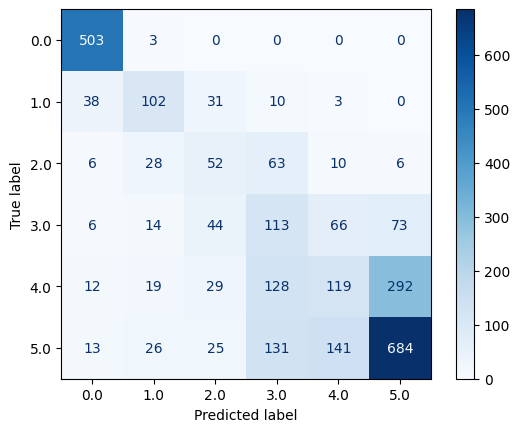

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       506
         1.0       0.53      0.55      0.54       184
         2.0       0.29      0.32      0.30       165
         3.0       0.25      0.36      0.30       316
         4.0       0.35      0.20      0.25       599
         5.0       0.65      0.67      0.66      1020

    accuracy                           0.56      2790
   macro avg       0.49      0.52      0.50      2790
weighted avg       0.55      0.56      0.55      2790

Epoch 1/100
98/98 [==============================] - ETA: 0s - loss: 1.3932 - sparse_categorical_accuracy: 0.4558
Epoch 1: val_loss improved from inf to 0.94164, saving model to CustomModel_indi_Hyb_5.weights.hdf5
98/98 [==============================] - 4s 40ms/step - loss: 1.3932 - sparse_categorical_accuracy: 0.4558 - val_loss: 0.9416 - val_sparse_categorical_accuracy: 0.5985 - lr: 8.0000e-06
Epoch 2/100
 3/98 [..............................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


97/98 [============================>.] - ETA: 0s - loss: 1.2989 - sparse_categorical_accuracy: 0.4659
Epoch 2: val_loss did not improve from 0.94164
98/98 [==============================] - 4s 40ms/step - loss: 1.3010 - sparse_categorical_accuracy: 0.4667 - val_loss: 0.9609 - val_sparse_categorical_accuracy: 0.5678 - lr: 8.0000e-06
Epoch 3/100
97/98 [============================>.] - ETA: 0s - loss: 1.2778 - sparse_categorical_accuracy: 0.4671
Epoch 3: val_loss did not improve from 0.94164
98/98 [==============================] - 4s 40ms/step - loss: 1.2802 - sparse_categorical_accuracy: 0.4667 - val_loss: 0.9654 - val_sparse_categorical_accuracy: 0.5780 - lr: 8.0000e-06
Epoch 4/100
97/98 [============================>.] - ETA: 0s - loss: 1.2626 - sparse_categorical_accuracy: 0.4485
Epoch 4: val_loss did not improve from 0.94164

Epoch 4: ReduceLROnPlateau reducing learning rate to 1.6000001778593287e-06.
98/98 [==============================] - 4s 40ms/step - loss: 1.2610 - sparse_cat

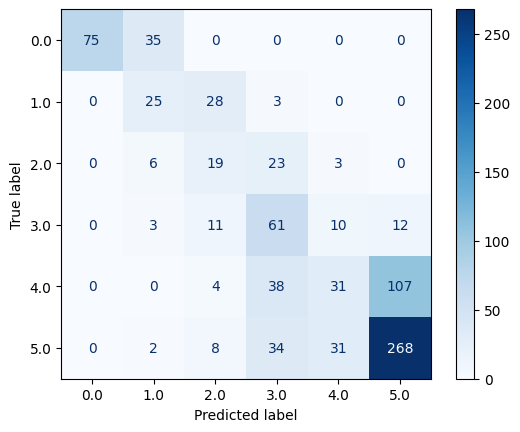

              precision    recall  f1-score   support

         0.0       1.00      0.68      0.81       110
         1.0       0.35      0.45      0.39        56
         2.0       0.27      0.37      0.31        51
         3.0       0.38      0.63      0.48        97
         4.0       0.41      0.17      0.24       180
         5.0       0.69      0.78      0.73       343

    accuracy                           0.57       837
   macro avg       0.52      0.51      0.50       837
weighted avg       0.59      0.57      0.56       837

[ 0  1  2  3  4  5  6  7  8  9 10]
[11]
Epoch 1/50
336/337 [============================>.] - ETA: 0s - loss: 1.3489 - sparse_categorical_accuracy: 0.5031
Epoch 1: val_loss improved from inf to 1.61697, saving model to CustomModel_Hyb_5.weights.hdf5
337/337 [==============================] - 43s 121ms/step - loss: 1.3494 - sparse_categorical_accuracy: 0.5029 - val_loss: 1.6170 - val_sparse_categorical_accuracy: 0.4294 - lr: 0.0010
Epoch 2/50
  1/337 [..

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


336/337 [============================>.] - ETA: 0s - loss: 1.1777 - sparse_categorical_accuracy: 0.5434
Epoch 2: val_loss improved from 1.61697 to 1.09214, saving model to CustomModel_Hyb_5.weights.hdf5
337/337 [==============================] - 40s 120ms/step - loss: 1.1776 - sparse_categorical_accuracy: 0.5436 - val_loss: 1.0921 - val_sparse_categorical_accuracy: 0.5819 - lr: 0.0010
Epoch 3/50
336/337 [============================>.] - ETA: 0s - loss: 1.1620 - sparse_categorical_accuracy: 0.5432
Epoch 3: val_loss did not improve from 1.09214
337/337 [==============================] - 40s 120ms/step - loss: 1.1625 - sparse_categorical_accuracy: 0.5432 - val_loss: 1.3430 - val_sparse_categorical_accuracy: 0.5507 - lr: 0.0010
Epoch 4/50
336/337 [============================>.] - ETA: 0s - loss: 1.1189 - sparse_categorical_accuracy: 0.5581
Epoch 4: val_loss improved from 1.09214 to 0.95026, saving model to CustomModel_Hyb_5.weights.hdf5
337/337 [==============================] - 41s 120m

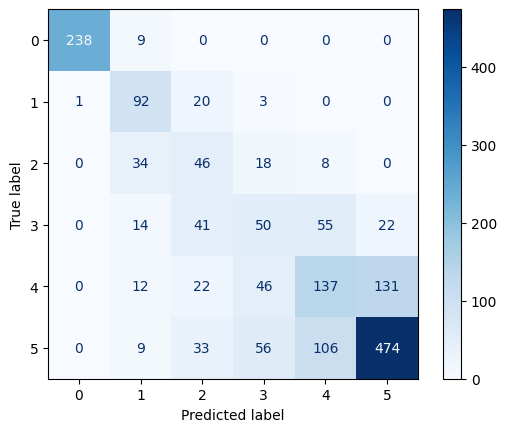

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       247
           1       0.54      0.79      0.64       116
           2       0.28      0.43      0.34       106
           3       0.29      0.27      0.28       182
           4       0.45      0.39      0.42       348
           5       0.76      0.70      0.73       678

    accuracy                           0.62      1677
   macro avg       0.55      0.59      0.57      1677
weighted avg       0.63      0.62      0.62      1677

Epoch 1/100
59/59 [==============================] - ETA: 0s - loss: 1.3013 - sparse_categorical_accuracy: 0.5384
Epoch 1: val_loss improved from inf to 1.09234, saving model to CustomModel_indi_Hyb_5.weights.hdf5
59/59 [==============================] - 5s 49ms/step - loss: 1.3013 - sparse_categorical_accuracy: 0.5384 - val_loss: 1.0923 - val_sparse_categorical_accuracy: 0.5872 - lr: 1.6000e-06
Epoch 2/100
 3/59 [>.............................] - ETA: 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


59/59 [==============================] - ETA: 0s - loss: 1.2654 - sparse_categorical_accuracy: 0.5299
Epoch 2: val_loss did not improve from 1.09234
59/59 [==============================] - 2s 39ms/step - loss: 1.2654 - sparse_categorical_accuracy: 0.5299 - val_loss: 1.1445 - val_sparse_categorical_accuracy: 0.5489 - lr: 1.6000e-06
Epoch 3/100
59/59 [==============================] - ETA: 0s - loss: 1.2264 - sparse_categorical_accuracy: 0.5554
Epoch 3: val_loss did not improve from 1.09234
59/59 [==============================] - 2s 39ms/step - loss: 1.2264 - sparse_categorical_accuracy: 0.5554 - val_loss: 1.1903 - val_sparse_categorical_accuracy: 0.5277 - lr: 1.6000e-06
Epoch 4/100
59/59 [==============================] - ETA: 0s - loss: 1.2405 - sparse_categorical_accuracy: 0.5437
Epoch 4: val_loss did not improve from 1.09234

Epoch 4: ReduceLROnPlateau reducing learning rate to 1e-06.
59/59 [==============================] - 2s 39ms/step - loss: 1.2405 - sparse_categorical_accuracy

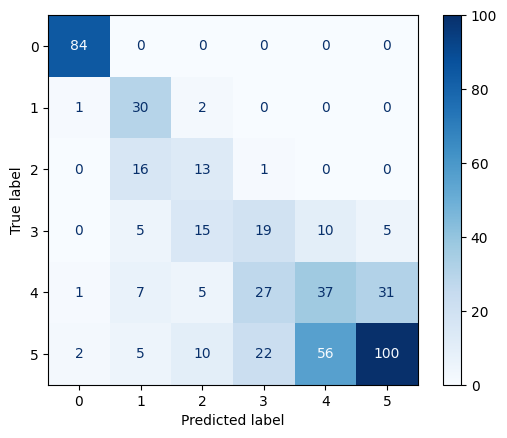

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        84
           1       0.48      0.91      0.62        33
           2       0.29      0.43      0.35        30
           3       0.28      0.35      0.31        54
           4       0.36      0.34      0.35       108
           5       0.74      0.51      0.60       195

    accuracy                           0.56       504
   macro avg       0.51      0.59      0.54       504
weighted avg       0.60      0.56      0.57       504


Mean accuracy of population: 0.5818, Standard deviation of population: 0.0674


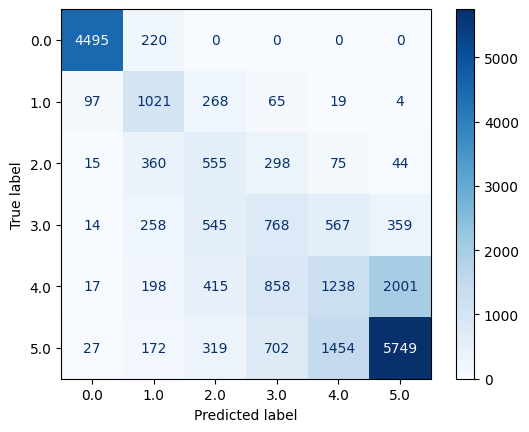

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      4715
         1.0       0.46      0.69      0.55      1474
         2.0       0.26      0.41      0.32      1347
         3.0       0.29      0.31      0.30      2511
         4.0       0.37      0.26      0.31      4727
         5.0       0.70      0.68      0.69      8423

    accuracy                           0.60     23197
   macro avg       0.51      0.55      0.52     23197
weighted avg       0.60      0.60      0.59     23197


Mean accuracy of individuum: 0.5551, Standard deviation of individuum: 0.0769


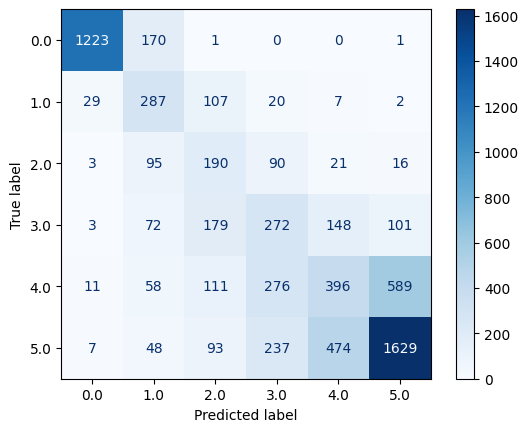

              precision    recall  f1-score   support

         0.0       0.96      0.88      0.92      1395
         1.0       0.39      0.63      0.49       452
         2.0       0.28      0.46      0.35       415
         3.0       0.30      0.35      0.33       775
         4.0       0.38      0.27      0.32      1441
         5.0       0.70      0.65      0.68      2488

    accuracy                           0.57      6966
   macro avg       0.50      0.54      0.51      6966
weighted avg       0.60      0.57      0.58      6966



In [38]:
seed_value= 42  ## validation 10 
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.compat.v1.set_random_seed(seed_value)
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)


def resnet_block(inputs, filters, kernel_size, strides):
    x = Conv1D(filters=filters, kernel_size=kernel_size, strides=strides, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv1D(filters=filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    shortcut = Conv1D(filters=filters, kernel_size=1, padding='same')(inputs)
    shortcut = BatchNormalization()(shortcut)

    output = Add()([x, shortcut])
    output = Activation('relu')(output)
    
    return x



def ResNetLSTM_5_Model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Initial Convolutional layer
    x = Conv1D(filters=64, kernel_size=9, strides=1, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Residual blocks
    x = resnet_block(x, filters=64, kernel_size=7, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=64, kernel_size=5, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=64, kernel_size=3, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)
    x = Dropout(0.2)(x)
    x = resnet_block(x, filters=128, kernel_size=3, strides=1)

    x = tf.keras.layers.AveragePooling1D(pool_size = 2)(x)


    x = (tf.keras.layers.LSTM(128, input_shape=input_shape, return_sequences=True, activation="tanh"))(x)
    x = (tf.keras.layers.LSTM(64, return_sequences=True, activation="tanh"))(x)
    x = (tf.keras.layers.LSTM(32, return_sequences=True, activation="tanh"))(x)

    # Global Average Pooling
    x = GlobalAveragePooling1D()(x)

    # Output layer
    x = Dense(100, activation='relu')(x)
    outputs = Dense(units=num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)

    # Compile Model for each iteration
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['sparse_categorical_accuracy'])

    
    return model

    





# we need 12 folds as we have 12 patients 
num_folds = 12
# we do not split them randomly so that the data of each subject remains 
kfolds = KFold(n_splits=num_folds, shuffle=False)

# empty list for accuarcy and variables of each fold which are stored
accuracies_CV_All = []
actual_labels_CV_All = []
predicted_labels_CV_All = []


accuracies_CV_indi = []
actual_labels_CV_indi = []
predicted_labels_CV_indi = []
count = 0

# itertate over each fold
for train_idx, test_idx in kfolds.split(X):
    # Split the dataset into training and validation sets for the current fold
    print(train_idx)
    print(test_idx)

    # train fold
    X_train_fold = [X[i] for i in train_idx]
    y_train_fold = [Y[i] for i in train_idx]

    # validation fold
    X_val_fold = [X_val[i] for i in train_idx]
    y_val_fold = [Y_val[i] for i in train_idx]

    # test fold
    X_test_fold = np.array([X[i] for i in test_idx])
    X_test_fold = X_test_fold.reshape(-1,48,4)

    y_test_fold = np.array([Y[i] for i in test_idx])
    y_test_fold = y_test_fold.reshape(-1,1)


    X_train_fold = np.vstack(X_train_fold)
    y_train_fold = np.vstack(y_train_fold)
    
    X_val_fold = np.vstack(X_val_fold)
    y_val_fold = np.vstack(y_val_fold)
    
    
    # splitting training data into training and validation for optimizing the learning rate
    # during training and early stopping
    X_train_fold, y_train_fold = shuffle(X_train_fold, y_train_fold)
    X_val_fold, y_val_fold = shuffle(X_val_fold, y_val_fold)

    X_train_indiv, X_test_indi,  y_train_indiv, y_test_indi = train_test_split(
    X_test_fold , y_test_fold , test_size=0.30, shuffle = False)

    X_train_indi, X_val_indi,  y_train_indi, y_val_indi = train_test_split(
    X_train_indiv, y_train_indiv, test_size=0.20, shuffle = False)

    # labels for the whole test data 
    actual_labels_CV_All = np.append(actual_labels_CV_All, y_test_fold)
    # labels for the individusal trained model which have less test data
    actual_labels_CV_indi = np.append(actual_labels_CV_indi, y_test_indi)

    # estimating distribution of classes
    labels_df = pd.DataFrame(y_train_fold, columns = ['label'])
    class_occurences = np.bincount(labels_df['label'])
    total = class_occurences.sum()
    number_classes = len(class_occurences)

    # assigning weights for classes, weight for last class stays 1, since its occurance is the highest
    weight_for_0 = (1/class_occurences[0]) * (total/number_classes)
    weight_for_1 = (1/class_occurences[1]) * (total/number_classes)
    weight_for_2 = (1/class_occurences[2]) * (total/number_classes)
    weight_for_3 = (1/class_occurences[3]) * (total/number_classes)
    weight_for_4 = (1/class_occurences[4]) * (total/number_classes)
    weight_for_5= (1/class_occurences[5]) * (total/number_classes)


    class_weights = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2, 3: weight_for_3, 4: weight_for_4, 5: weight_for_5}

    
    # Create a new model for each fold
    model_CV_D = ResNetLSTM_5_Model((X_train_fold.shape[1], X_train_fold.shape[2]), 6)

    # Define the early stopping callback
    early_stopping = EarlyStopping(patience=10, monitor='val_loss', mode='min', verbose=1, restore_best_weights=True)
    early_stopping_indi = EarlyStopping(patience=20, monitor='val_loss', mode='min', verbose=1, restore_best_weights=True)

    # initialize callbacks 
    reduceLR =ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 
    reduceLR_indi =ReduceLROnPlateau(monitor='val_loss', patience= 3, verbose= 1, mode='min', factor=  0.2, min_lr = 1e-6) 

    checkpoint = ModelCheckpoint('CustomModel_Hyb_5.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 
    checkpoint_indi = ModelCheckpoint('CustomModel_indi_Hyb_5.weights.hdf5', monitor='val_loss', verbose=1,save_best_only=True, mode= 'min') 

    callbacks= [early_stopping, checkpoint, reduceLR]
    callbacks_indi= [early_stopping_indi, checkpoint_indi, reduceLR_indi]


    # Train the model on the current fold
    model_CV_D.fit(X_train_fold, y_train_fold,
    validation_data=(X_val_fold, y_val_fold),
    epochs=50,
    batch_size=64,
    callbacks=callbacks,
    class_weight = class_weights
    )

    name = "Models/Hybrid_5_Population_%i.hdf5" % (count)
    model_CV_D.save(name)
    
    # Evaluate the model on the validation set
    y_pred_All = model_CV_D.predict(X_test_fold)
    y_pred_CV_All = np.argmax(y_pred_All, axis=1)
    accuracy_CV_All = accuracy_score(y_test_fold, y_pred_CV_All)
    accuracies_CV_All.append(accuracy_CV_All)

    ConfusionMatrixDisplay.from_predictions(y_test_fold, y_pred_CV_All, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/Hybrid_5_Population_%i.png" % (count)
    plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_fold, y_pred_CV_All))

    predicted_labels_CV_All = np.append(predicted_labels_CV_All, y_pred_CV_All)

    


    # SECOND PART TRAIN THE MODEL FURTHER WITH 60% OF THE NEW PATIENT
    # Train the model on the current fold
    
    # estimating distribution of classes
    labels_df_indi = pd.DataFrame(y_train_indi, columns = ['label'])
    class_occurences_indi = np.bincount(labels_df_indi['label'])
    total_indi = class_occurences_indi.sum()
    number_classes_indi = len(class_occurences_indi)

    # assigning weights for classes, weight for last class stays 1, since its occurance is the highest
    weight_for_0_indi = (1/class_occurences_indi[0]) * (total_indi/number_classes_indi)
    weight_for_1_indi = (1/class_occurences_indi[1]) * (total_indi/number_classes_indi)
    weight_for_2_indi = (1/class_occurences_indi[2]) * (total_indi/number_classes_indi)
    weight_for_3_indi = (1/class_occurences_indi[3]) * (total_indi/number_classes_indi)
    weight_for_4_indi = (1/class_occurences_indi[4]) * (total_indi/number_classes_indi)
    weight_for_5_indi = (1/class_occurences_indi[5]) * (total_indi/number_classes_indi)


    class_weights_indi = {0: weight_for_0_indi, 1: weight_for_1_indi, 2: weight_for_2_indi, 3: weight_for_3_indi, 4: weight_for_4_indi, 
                     5: weight_for_5_indi}

    
    model_CV_D.fit(X_train_indi, y_train_indi,
    validation_data=(X_val_indi, y_val_indi),
    epochs=100,
    batch_size=16,
    callbacks=callbacks_indi,
    class_weight = class_weights_indi
    )

    name = "Models/Hybrid_5_Indi_%i.hdf5" % (count)
    model_CV_D.save(name)

    # Evaluate the model on the validation set
    y_pred_indi = model_CV_D.predict(X_test_indi)
    y_pred_CV_indi = np.argmax(y_pred_indi, axis=1)
    accuracy_CV_indi = accuracy_score(y_test_indi, y_pred_CV_indi)
    accuracies_CV_indi.append(accuracy_CV_indi)

    ConfusionMatrixDisplay.from_predictions(y_test_indi, y_pred_CV_indi, cmap=plt.cm.Blues)
    name_img_test = "Confusion_Matrices/Hybrid_5_Indi_%i.png" % (count)
    plt.savefig(name_img_test)
    plt.show()
    print(classification_report(y_test_indi, y_pred_CV_indi))


    predicted_labels_CV_indi = np.append(predicted_labels_CV_indi, y_pred_CV_indi)

    
    count = count+1


# POPULATION
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_All = np.mean(accuracies_CV_All)
std_accuracy_CV_All = np.std(accuracies_CV_All)
# Evalaute Model and print Confusion Matrix
print(f"\nMean accuracy of population: {mean_accuracy_CV_All:.4f}, Standard deviation of population: {std_accuracy_CV_All:.4f}")

ConfusionMatrixDisplay.from_predictions(actual_labels_CV_All, predicted_labels_CV_All, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/Hybrid_5_Population_All.png" 
plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_All, predicted_labels_CV_All))


# INDIVIDUUM

# Evalaute Model and print Confusion Matrix
# Calculate and print mean and standard deviation of evaluation metrics
mean_accuracy_CV_indi = np.mean(accuracies_CV_indi)
std_accuracy_CV_indi = np.std(accuracies_CV_indi)
print(f"\nMean accuracy of individuum: {mean_accuracy_CV_indi:.4f}, Standard deviation of individuum: {std_accuracy_CV_indi:.4f}")
ConfusionMatrixDisplay.from_predictions(actual_labels_CV_indi, predicted_labels_CV_indi, cmap=plt.cm.Blues)
name_img_test = "Confusion_Matrices/Hybrid_5_Indi_All.png"
plt.savefig(name_img_test)
plt.show()

# calculating metric
print(classification_report(actual_labels_CV_indi, predicted_labels_CV_indi))